# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Ваш код здесь
adver_data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [4]:
# Ваш код здесь
adver_data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data.iloc[:,:3]
y = adver_data.Sales

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
# Ваш код здесь
means, stds = X.mean(axis=0), X.std(axis=0)
print('means:')
print(means)
print('\nstds:')
print(stds)

means:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64

stds:
TV           85.854236
Radio        14.846809
Newspaper    21.778621
dtype: float64


In [7]:
# Ваш код здесь
X = (X - means) / stds
X.head()

TV     Radio  Newspaper
1  0.967425  0.979066   1.774493
2 -1.194379  1.080097   0.667903
3 -1.512360  1.524637   1.779084
4  0.051919  1.214806   1.283185
5  0.393196 -0.839507   1.278593

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
# Ваш код здесь
X['Ones'] = np.ones(len(adver_data.index))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
def mserror(y, y_pred):
    # Ваш код здесь
    return np.sum((y - y_pred) ** 2) / len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [10]:
# Ваш код здесь
answer1 = mserror(y, y.median(axis=0))
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X, y):
    return np.linalg.inv(np.matrix.transpose(X).dot(X)).dot(np.matrix.transpose(X)).dot(y)  # Ваш код здесь

In [12]:
norm_eq_weights = np.matrix.transpose(normal_equation(np.array(X), np.array(y)))
print(norm_eq_weights)

[ 3.92908869  2.79906919 -0.02259517 14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [13]:
# Ваш код здесь
answer2 = norm_eq_weights[3]
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.022500000000004


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [14]:
# Ваш код здесь
def linear_prediction(X, w):
    y_pred = []
    for row_idx in range(len(y)):
        features = np.array(X.iloc[row_idx,:])
        y_pred.append(np.sum(features*w))

    return y_pred

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [15]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [16]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
#     print(w, 'idx=', train_ind)
    l = len(y)
    x = np.array(X.iloc[train_ind,:])
    grad = (2 / l) * (x.dot(w) - np.array(y)[train_ind])
    grad0 = x[0] * grad
    grad1 = x[1] * grad
    grad2 = x[2] * grad
    grad3 = x[3] * grad
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [17]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # Ваш код здесь
        new_w = stochastic_gradient_step(X, y, w, random_ind)
        weight_dist = np.linalg.norm(np.array(w) - np.array(new_w))
        w = new_w
        current_err = mserror(y, linear_prediction(X, w))
        print(iter_num, 'err=', current_err, ', diff=', weight_dist)
        errors.append(current_err)
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [18]:
%%time
# Ваш код здесь
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [0,0,0,0], max_iter=100000, verbose=True)

0 err= 223.66543574426956 , diff= 0.0030932850505041845
1 err= 223.6364198444953 , diff= 0.001867790779170307
2 err= 223.5550606299942 , diff= 0.0038105613455862086
3 err= 223.4810173606797 , diff= 0.0029213289950541853
4 err= 223.47275933766977 , diff= 0.0013860590341623626
5 err= 223.4467037906299 , diff= 0.0015457879911709611
6 err= 223.39195410652653 , diff= 0.003738758131329607
7 err= 223.32175411026003 , diff= 0.003052347710146171
8 err= 223.27109425007322 , diff= 0.003088128373717172
9 err= 223.2588856769861 , diff= 0.0014126383605813338
10 err= 223.20298662221728 , diff= 0.0025459001910209627
11 err= 223.1468345641527 , diff= 0.00349950783349917
12 err= 223.11866657328858 , diff= 0.001454212199113317
13 err= 223.05684508675574 , diff= 0.003004494137451025
14 err= 223.01568163548603 , diff= 0.001931072830472789
15 err= 222.99076199111494 , diff= 0.0019334115876394897
16 err= 222.98781814155817 , diff= 0.00039589074160422777
17 err= 222.9693726269303 , diff= 0.0016454146917818737

163 err= 216.33952423090625 , diff= 0.0024679538060307102
164 err= 216.32865810195034 , diff= 0.001972927364410613
165 err= 216.28030383408478 , diff= 0.0034597671768163973
166 err= 216.2648298752867 , diff= 0.0015354813921476626
167 err= 216.14994852993624 , diff= 0.005681595152654852
168 err= 216.08666395483516 , diff= 0.002766394905536971
169 err= 216.01003013748857 , diff= 0.003125150073795946
170 err= 215.95882680203076 , diff= 0.0024648681215177167
171 err= 215.9076484155559 , diff= 0.002464253427428537
172 err= 215.89689920695366 , diff= 0.0017069487819408482
173 err= 215.86299209425087 , diff= 0.002010124978183184
174 err= 215.8240203280168 , diff= 0.0026513533407996836
175 err= 215.80473734431854 , diff= 0.001550721453819712
176 err= 215.79776799480948 , diff= 0.0013091803388308814
177 err= 215.74357627147438 , diff= 0.0025064463282343037
178 err= 215.7348805891686 , diff= 0.00195505888917371
179 err= 215.7289342289737 , diff= 0.0016250804875240518
180 err= 215.72198773077005 

308 err= 209.6704980379676 , diff= 0.006165541710225738
309 err= 209.6220490466724 , diff= 0.002224473002580491
310 err= 209.54636675813381 , diff= 0.0036774058484359442
311 err= 209.5301745901308 , diff= 0.0020250107039823757
312 err= 209.52156990465622 , diff= 0.0019436492440870524
313 err= 209.45286438093046 , diff= 0.0038223611380176097
314 err= 209.41883847662524 , diff= 0.0023378421860203824
315 err= 209.355259383481 , diff= 0.003887339639074871
316 err= 209.26900882313467 , diff= 0.0046846093943413184
317 err= 209.22807898571853 , diff= 0.001708544689992258
318 err= 209.17703829584974 , diff= 0.003598095024742523
319 err= 209.1173493556511 , diff= 0.002937328318676478
320 err= 209.07909515497872 , diff= 0.001531826759111693
321 err= 209.05174382887185 , diff= 0.0019482267637001983
322 err= 209.03846013111854 , diff= 0.0017537544745540228
323 err= 208.9632583317421 , diff= 0.0046241789990548576
324 err= 208.89804344993624 , diff= 0.0029423862385973693
325 err= 208.80528238026676 

454 err= 203.51508540883398 , diff= 0.002287403971498623
455 err= 203.4694215745243 , diff= 0.002917069674340389
456 err= 203.46353044984127 , diff= 0.0016542356406102662
457 err= 203.44465905952214 , diff= 0.0021621356472087453
458 err= 203.44174882758688 , diff= 0.0012619400182737248
459 err= 203.40937208236508 , diff= 0.002197974547727944
460 err= 203.31403812266907 , diff= 0.005552297690989572
461 err= 203.29663197743474 , diff= 0.0015525579250703367
462 err= 203.17879494881876 , diff= 0.006067682065799072
463 err= 203.1062807823612 , diff= 0.0035491271221443203
464 err= 203.0783763092025 , diff= 0.0020809639929774983
465 err= 203.06314295443863 , diff= 0.001984724101142618
466 err= 203.04648437318087 , diff= 0.001637200182922368
467 err= 203.02586812136363 , diff= 0.0021843896104735212
468 err= 202.9814456236326 , diff= 0.0023437709781360676
469 err= 202.94203409490765 , diff= 0.0022313111241036763
470 err= 202.8734110484449 , diff= 0.004148684097932416
471 err= 202.8560436012098 

613 err= 196.82475991016221 , diff= 0.005417117223595837
614 err= 196.78931502482232 , diff= 0.0025256069711388157
615 err= 196.70881599866897 , diff= 0.0037215585173185025
616 err= 196.66356488494893 , diff= 0.002833686324480112
617 err= 196.64708764687464 , diff= 0.0016688626934862217
618 err= 196.630156865901 , diff= 0.0017078071121786821
619 err= 196.61155927726017 , diff= 0.0015864888980858809
620 err= 196.54201173729166 , diff= 0.003184461273219915
621 err= 196.48787586914352 , diff= 0.002815159372722519
622 err= 196.42063671845665 , diff= 0.004306098278202869
623 err= 196.37300762426537 , diff= 0.0034650528582765923
624 err= 196.34072069618324 , diff= 0.002552117410735328
625 err= 196.31840033668067 , diff= 0.0027922941815197166
626 err= 196.31676947632033 , diff= 0.0012963219662484404
627 err= 196.20084433350294 , diff= 0.006656590874810799
628 err= 196.15464861359644 , diff= 0.0023365755489226053
629 err= 196.1463766968743 , diff= 0.0019069008518689658
630 err= 196.13155371081

766 err= 191.59986802310195 , diff= 0.002167847025693696
767 err= 191.55304107066596 , diff= 0.0018319469798248652
768 err= 191.54115271165318 , diff= 0.0017890433019074382
769 err= 191.50264307702528 , diff= 0.0021357731582525106
770 err= 191.48192249142085 , diff= 0.0022915990657449395
771 err= 191.4614964790401 , diff= 0.0014367264501921196
772 err= 191.4265433089165 , diff= 0.0014646238376096704
773 err= 191.3830646939208 , diff= 0.0028542624075480645
774 err= 191.36719902714896 , diff= 0.0016414511884728824
775 err= 191.32847837926593 , diff= 0.001449009572433157
776 err= 191.31851483236255 , diff= 0.0019370646321721558
777 err= 191.25072723468907 , diff= 0.0029407682955233864
778 err= 191.22011597409016 , diff= 0.00220586519710011
779 err= 191.18098693330737 , diff= 0.002755722098729775
780 err= 191.1697278365787 , diff= 0.001819417273034559
781 err= 191.15337537681185 , diff= 0.001509466516847642
782 err= 191.10923046575033 , diff= 0.002124554175316498
783 err= 191.0509421942491

915 err= 186.2598998739361 , diff= 0.0016011177594207472
916 err= 186.2498974024578 , diff= 0.0012701432415386296
917 err= 186.22629029040115 , diff= 0.0018469878479910043
918 err= 186.19593972980795 , diff= 0.0024694589788758353
919 err= 186.13802838567287 , diff= 0.0027712865459673048
920 err= 186.10719685237567 , diff= 0.0021744076746589105
921 err= 186.1019163591033 , diff= 0.0015522035041294663
922 err= 186.06119701696403 , diff= 0.0031494141392197045
923 err= 186.05445631494032 , diff= 0.0015982145288840149
924 err= 186.0255474798427 , diff= 0.002147284795149984
925 err= 186.004984415344 , diff= 0.0021429392799873588
926 err= 185.9256694691391 , diff= 0.0038883041000845283
927 err= 185.84165413533643 , diff= 0.0049594824411589855
928 err= 185.83534190956513 , diff= 0.0011769136429962076
929 err= 185.78908465495857 , diff= 0.0028051931023190483
930 err= 185.738470060706 , diff= 0.003339173668386027
931 err= 185.70093523857963 , diff= 0.0014264079772794613
932 err= 185.651171725603

1059 err= 180.89262646301557 , diff= 0.002663162582098403
1060 err= 180.88405420027345 , diff= 0.001864127935135153
1061 err= 180.86009936783856 , diff= 0.0018297863008967393
1062 err= 180.84293075386225 , diff= 0.0015289781198737854
1063 err= 180.81068114461405 , diff= 0.0014936160561363353
1064 err= 180.78230193853554 , diff= 0.00223607951992888
1065 err= 180.71975065609564 , diff= 0.004161497209810691
1066 err= 180.70425158518754 , diff= 0.00147187612979733
1067 err= 180.62303168827057 , diff= 0.0048801968132503575
1068 err= 180.57402095526422 , diff= 0.0032871932500643736
1069 err= 180.5097144712829 , diff= 0.004281424433396703
1070 err= 180.48194444394795 , diff= 0.0020127646140435523
1071 err= 180.44279961745454 , diff= 0.0030153997318990993
1072 err= 180.34970805936595 , diff= 0.005766809524480994
1073 err= 180.33457621765862 , diff= 0.0014143764506544913
1074 err= 180.32026662236436 , diff= 0.0014307615498700894
1075 err= 180.27063975607507 , diff= 0.002697127781127646
1076 err

1207 err= 175.99731577730793 , diff= 0.002516879857545831
1208 err= 175.9891829147408 , diff= 0.0013010013344429252
1209 err= 175.97643508157728 , diff= 0.0014957606739067371
1210 err= 175.94073589915507 , diff= 0.002057103755834908
1211 err= 175.92358516775755 , diff= 0.001614731852770605
1212 err= 175.88763872385454 , diff= 0.002642225091050112
1213 err= 175.84071483297572 , diff= 0.002800277064046687
1214 err= 175.8101908443172 , diff= 0.0027742794299668314
1215 err= 175.78324359893864 , diff= 0.0022438300987837477
1216 err= 175.71700130370547 , diff= 0.004399960825418059
1217 err= 175.68345632427747 , diff= 0.0018194540983269315
1218 err= 175.62945184584495 , diff= 0.0029089042740615845
1219 err= 175.53136566194712 , diff= 0.005401095618270847
1220 err= 175.52256111155614 , diff= 0.0014280060549629284
1221 err= 175.50575058583544 , diff= 0.001533000636546251
1222 err= 175.47326608920673 , diff= 0.0017144737192593166
1223 err= 175.43524345655402 , diff= 0.002970934223815004
1224 err

1363 err= 170.44702260834586 , diff= 0.001985033573916517
1364 err= 170.4135590678601 , diff= 0.0020592573342549155
1365 err= 170.3934148273315 , diff= 0.001580555474124902
1366 err= 170.33246974488574 , diff= 0.0032545433133731308
1367 err= 170.31138217548687 , diff= 0.0012520600224568616
1368 err= 170.28999069165042 , diff= 0.0014918519487091507
1369 err= 170.26808996496177 , diff= 0.002305839993379554
1370 err= 170.20734750636976 , diff= 0.0032958786232524526
1371 err= 170.18461714889557 , diff= 0.0016260321666918217
1372 err= 170.13717822011338 , diff= 0.002645668931494771
1373 err= 170.1302633973847 , diff= 0.0008832410409626121
1374 err= 170.1190848760104 , diff= 0.0018165605362419298
1375 err= 170.10463476146694 , diff= 0.0015790907115101386
1376 err= 170.08445224365656 , diff= 0.0013728280134763368
1377 err= 170.0144984215539 , diff= 0.004236141196214914
1378 err= 170.00333269408264 , diff= 0.0018155974511817959
1379 err= 169.98210101554847 , diff= 0.0017432229474783748
1380 er

1520 err= 164.9731309476923 , diff= 0.0011713316224865524
1521 err= 164.97067896568493 , diff= 0.001170372867583834
1522 err= 164.91783596147698 , diff= 0.0025464280158018207
1523 err= 164.86661593936253 , diff= 0.0035074538650393277
1524 err= 164.85402963209873 , diff= 0.0014290796425831462
1525 err= 164.78793289865797 , diff= 0.0031286104221441807
1526 err= 164.75804871605058 , diff= 0.004269214461642046
1527 err= 164.67889819328593 , diff= 0.005451886344381805
1528 err= 164.67264053513355 , diff= 0.0015430109809096704
1529 err= 164.6642483439213 , diff= 0.0013324142428841807
1530 err= 164.63370566892928 , diff= 0.0016618690576699797
1531 err= 164.5891222918586 , diff= 0.001916863317310896
1532 err= 164.57826314558318 , diff= 0.001445217044919817
1533 err= 164.563222838902 , diff= 0.001394505490788057
1534 err= 164.5542564067678 , diff= 0.00184075737395813
1535 err= 164.55372194104623 , diff= 8.205994242534155e-05
1536 err= 164.5452458883098 , diff= 0.0015291072034002108
1537 err= 16

1662 err= 160.51783047047712 , diff= 0.0017898751558337194
1663 err= 160.5055661900173 , diff= 0.001409247901900038
1664 err= 160.44841901893437 , diff= 0.0025858800233195148
1665 err= 160.41325254944616 , diff= 0.002065996074323456
1666 err= 160.37934245464666 , diff= 0.0016561641082720123
1667 err= 160.3399114692001 , diff= 0.002942150304887788
1668 err= 160.33496895202018 , diff= 0.0015306557953431016
1669 err= 160.27884856392913 , diff= 0.003951927586000006
1670 err= 160.2651285407782 , diff= 0.0015387204989420716
1671 err= 160.1816601021855 , diff= 0.005479359756393101
1672 err= 160.17555003414088 , diff= 0.0015274241407555859
1673 err= 160.16736157173048 , diff= 0.0013170146425162993
1674 err= 160.1358626476138 , diff= 0.0019983002835012413
1675 err= 160.11469607279392 , diff= 0.001964499141662585
1676 err= 160.10005134270392 , diff= 0.0013762708413725315
1677 err= 160.0008293266687 , diff= 0.006665189017812333
1678 err= 159.96422622438308 , diff= 0.0020420862271699415
1679 err= 

1810 err= 155.63511106281194 , diff= 0.0019262538653452483
1811 err= 155.59270239933414 , diff= 0.002498039201567051
1812 err= 155.57458290680438 , diff= 0.0016699694885749395
1813 err= 155.57066688193615 , diff= 0.0014421162816024798
1814 err= 155.53123856940175 , diff= 0.0025901339418783124
1815 err= 155.51700663106385 , diff= 0.0013570174421297656
1816 err= 155.46843027439317 , diff= 0.003420164230072259
1817 err= 155.45367291024854 , diff= 0.0018222150726933653
1818 err= 155.4223920025337 , diff= 0.0013009789012398793
1819 err= 155.39056800266272 , diff= 0.001941484811040776
1820 err= 155.3656074104967 , diff= 0.002095015230084901
1821 err= 155.3383461353273 , diff= 0.0040691169294853535
1822 err= 155.30937481621174 , diff= 0.0016178113987460115
1823 err= 155.27709530410905 , diff= 0.0015194475503513317
1824 err= 155.23702514738608 , diff= 0.0019030089392862643
1825 err= 155.226717315906 , diff= 0.001667443243766969
1826 err= 155.1889253317295 , diff= 0.0028825930911282713
1827 err

1961 err= 151.08322750695882 , diff= 0.002464447354049395
1962 err= 151.0026894008411 , diff= 0.004889544036453992
1963 err= 150.97882432994547 , diff= 0.0018707856316074213
1964 err= 150.95564867263104 , diff= 0.0018861890242845196
1965 err= 150.90533888128797 , diff= 0.003275389396877555
1966 err= 150.89006348124008 , diff= 0.0015245650440077966
1967 err= 150.86625516453392 , diff= 0.0027797223573887164
1968 err= 150.8475408223326 , diff= 0.0011807920756644497
1969 err= 150.83958105949014 , diff= 0.0013593752511381787
1970 err= 150.82897012474547 , diff= 0.0012650239338198332
1971 err= 150.81900873797156 , diff= 0.0015359638946748815
1972 err= 150.73647996175868 , diff= 0.00738259169174574
1973 err= 150.69503523058657 , diff= 0.0024437421480379283
1974 err= 150.67473901414928 , diff= 0.0022826108267882837
1975 err= 150.66677878900268 , diff= 0.0013590314592175448
1976 err= 150.64413933774605 , diff= 0.0020529361068467996
1977 err= 150.60768067509227 , diff= 0.002832639298402025
1978 

2160 err= 145.04652291940903 , diff= 0.003527729578368755
2161 err= 145.0347066737897 , diff= 0.0012980837839154636
2162 err= 145.01885016508515 , diff= 0.0015318722493677715
2163 err= 144.98298221558426 , diff= 0.002469093067020965
2164 err= 144.9753393355204 , diff= 0.0017618115725097
2165 err= 144.96513353782706 , diff= 0.001562698011460755
2166 err= 144.9514873604487 , diff= 0.0014080072128468727
2167 err= 144.90107842504622 , diff= 0.003007464592268189
2168 err= 144.8852595150339 , diff= 0.0015299879168086553
2169 err= 144.871613707341 , diff= 0.002076250662194066
2170 err= 144.80639941559662 , diff= 0.004616463946049514
2171 err= 144.7537270295237 , diff= 0.0033970396863567814
2172 err= 144.6906502958032 , diff= 0.004328717426210016
2173 err= 144.6854721720205 , diff= 0.001035061110274595
2174 err= 144.65920407726497 , diff= 0.0013502125317588817
2175 err= 144.63918126528046 , diff= 0.0015281052357634286
2176 err= 144.631426577395 , diff= 0.0012784132718398511
2177 err= 144.56840

2336 err= 139.70922192156416 , diff= 0.0006043209204439769
2337 err= 139.69115130670022 , diff= 0.001163503598779115
2338 err= 139.6468836722078 , diff= 0.002340814133877947
2339 err= 139.61386463026648 , diff= 0.0018396236561970824
2340 err= 139.5779403484702 , diff= 0.002472215971406305
2341 err= 139.57283058992118 , diff= 0.0010245026431407926
2342 err= 139.5098750693423 , diff= 0.0037304717214484704
2343 err= 139.43654732891198 , diff= 0.005160625141353403
2344 err= 139.41502563999 , diff= 0.0015792015460585943
2345 err= 139.3701905952919 , diff= 0.002287478101722004
2346 err= 139.3174879605931 , diff= 0.003914620628309909
2347 err= 139.2315004308857 , diff= 0.00549598431001277
2348 err= 139.21441433097732 , diff= 0.001456816524906117
2349 err= 139.15526740199934 , diff= 0.0033852006513734882
2350 err= 139.12734694276688 , diff= 0.0012283757316681318
2351 err= 139.11956322479912 , diff= 0.0014595570747303558
2352 err= 139.10162603511802 , diff= 0.0018155930058041635
2353 err= 139.0

2497 err= 135.40665221490383 , diff= 7.402058676625394e-05
2498 err= 135.39619179002156 , diff= 0.001291898388033595
2499 err= 135.37794069864168 , diff= 0.0021541664024804117
2500 err= 135.36157308224344 , diff= 0.0019132005314748998
2501 err= 135.34420294187777 , diff= 0.0017837327490474006
2502 err= 135.2865273823016 , diff= 0.0033446240390726757
2503 err= 135.2499637746056 , diff= 0.002294901929144392
2504 err= 135.24520032340826 , diff= 0.0014869790227853461
2505 err= 135.2329603856842 , diff= 0.0016458006048382762
2506 err= 135.20429707479832 , diff= 0.001852400676609834
2507 err= 135.16512380164437 , diff= 0.00238213838187609
2508 err= 135.15497634662083 , diff= 0.0013488433389443435
2509 err= 135.1198824893768 , diff= 0.0017828901951880128
2510 err= 135.09873111498422 , diff= 0.00178897528586992
2511 err= 135.0729279211727 , diff= 0.0014278192483235896
2512 err= 135.04654732423646 , diff= 0.0016141289783020397
2513 err= 135.02692882039156 , diff= 0.0010926819576381494
2514 err=

2659 err= 131.74211260799774 , diff= 0.0014010907001554761
2660 err= 131.7302985191081 , diff= 0.0014277771185111652
2661 err= 131.67532980449158 , diff= 0.003356132500885226
2662 err= 131.65279400988055 , diff= 0.0014931962939598276
2663 err= 131.6288686735242 , diff= 0.001290074673391167
2664 err= 131.6180132116408 , diff= 0.0016544632399241935
2665 err= 131.57986021796435 , diff= 0.0023517884332886333
2666 err= 131.56525235713812 , diff= 0.0019029487812602303
2667 err= 131.51968661549444 , diff= 0.0024196283785478715
2668 err= 131.5006732260462 , diff= 0.001076117641795257
2669 err= 131.45513548653628 , diff= 0.0028590954371261923
2670 err= 131.4052504764924 , diff= 0.003807130562475546
2671 err= 131.395509301901 , diff= 0.001324735181941186
2672 err= 131.35742956600902 , diff= 0.0023495078280339333
2673 err= 131.32441013226446 , diff= 0.002292301217544602
2674 err= 131.2696482787457 , diff= 0.0033496867682052986
2675 err= 131.24915883125075 , diff= 0.001759355395285342
2676 err= 13

2801 err= 128.37683696361108 , diff= 0.0010786732875154932
2802 err= 128.35834881483774 , diff= 0.001815766687177556
2803 err= 128.3440873982021 , diff= 0.0014875170447045127
2804 err= 128.329833442706 , diff= 0.001487102242416284
2805 err= 128.3088091583221 , diff= 0.0035429486292863493
2806 err= 128.30445346587135 , diff= 0.000932035319501951
2807 err= 128.2329942596828 , diff= 0.00466084870606608
2808 err= 128.19459528307718 , diff= 0.0022551140222641535
2809 err= 128.17586833936875 , diff= 0.0012515629024404623
2810 err= 128.1680893581752 , diff= 0.001024210766825139
2811 err= 128.12497276192397 , diff= 0.0030346004895250986
2812 err= 128.11465168390575 , diff= 0.0012131221849229295
2813 err= 128.09756413001003 , diff= 0.0014311624284620928
2814 err= 128.05210396971427 , diff= 0.0023157765177583287
2815 err= 128.0368274798164 , diff= 0.001905649560675677
2816 err= 128.00718480274824 , diff= 0.0018531605242959918
2817 err= 127.99161988561788 , diff= 0.0014723442280994421
2818 err= 1

2958 err= 124.93829107888523 , diff= 0.0015517211504042822
2959 err= 124.92745650138079 , diff= 0.0015508891082284021
2960 err= 124.89330473418984 , diff= 0.002401957581054247
2961 err= 124.86628045935922 , diff= 0.002180149541191275
2962 err= 124.83345029935735 , diff= 0.0026927997392743553
2963 err= 124.81530239016233 , diff= 0.0012329064785790186
2964 err= 124.76473060901075 , diff= 0.0036295048464089525
2965 err= 124.7326577778058 , diff= 0.002338658826902289
2966 err= 124.72403128559927 , diff= 0.0014466088588052674
2967 err= 124.69789928018378 , diff= 0.0014622669332115018
2968 err= 124.67720437895237 , diff= 0.001664438816972448
2969 err= 124.6660719390657 , diff= 0.0015863267556033198
2970 err= 124.63995637961214 , diff= 0.0014618168594337031
2971 err= 124.61739554004639 , diff= 0.0012538272548318081
2972 err= 124.58578099510883 , diff= 0.001910444856632198
2973 err= 124.57544090814424 , diff= 0.001312766634308725
2974 err= 124.52168106491186 , diff= 0.0032322408126430275
2975 

3100 err= 121.49907195843848 , diff= 0.0014579061812749837
3101 err= 121.48210401513963 , diff= 0.0015013362459534848
3102 err= 121.46805499663093 , diff= 0.0014741627355999098
3103 err= 121.43273304451787 , diff= 0.002264428050094925
3104 err= 121.42629982426803 , diff= 0.0013464330236818995
3105 err= 121.3947245101343 , diff= 0.0016925040693829413
3106 err= 121.39068249859076 , diff= 0.0006242732910443127
3107 err= 121.3397518849434 , diff= 0.0032290569826509633
3108 err= 121.31858236645004 , diff= 0.0019424302052898584
3109 err= 121.3051988836383 , diff= 0.0014442848488505574
3110 err= 121.28536165438902 , diff= 0.0021453830608518677
3111 err= 121.27506193909561 , diff= 0.0013369487119916073
3112 err= 121.26169308281642 , diff= 0.0014434742990819913
3113 err= 121.25528283229102 , diff= 0.0013444200998438687
3114 err= 121.2150368777844 , diff= 0.0032184336989636124
3115 err= 121.20474792078956 , diff= 0.0013361823342781505
3116 err= 121.17865403835509 , diff= 0.0021414841821385307
31

3258 err= 117.90415420665563 , diff= 0.0010896937543215177
3259 err= 117.89632049178739 , diff= 0.001083313921509322
3260 err= 117.8806433502597 , diff= 0.0013713212556413698
3261 err= 117.87708524946429 , diff= 0.0007426731631014982
3262 err= 117.85946571359509 , diff= 0.0021126718329050947
3263 err= 117.84479162446601 , diff= 0.0016253388868716666
3264 err= 117.83039574075501 , diff= 0.001213244564539414
3265 err= 117.82422860645403 , diff= 0.0011517302270612434
3266 err= 117.80531780637247 , diff= 0.0019009931670662616
3267 err= 117.79766499286616 , diff= 0.0015154168300317906
3268 err= 117.78360638675764 , diff= 0.0013926753984246558
3269 err= 117.77743910009048 , diff= 0.0012131125108694905
3270 err= 117.7470234528165 , diff= 0.0022785423742339404
3271 err= 117.73565471013197 , diff= 0.0012705240777506803
3272 err= 117.71933327438792 , diff= 0.0013890077594148182
3273 err= 117.70643330801933 , diff= 0.0014190679016354698
3274 err= 117.6778629074815 , diff= 0.0014337915435721782
32

3445 err= 113.87494857369887 , diff= 0.006339452219904564
3446 err= 113.86521974758601 , diff= 0.0012018390101922636
3447 err= 113.7930428976011 , diff= 0.00506201691869997
3448 err= 113.7811585843363 , diff= 0.0010952115842215112
3449 err= 113.74248105990749 , diff= 0.0028762017027189547
3450 err= 113.72660940782389 , diff= 0.0016527376963679
3451 err= 113.72807455082035 , diff= 0.0002682718037708047
3452 err= 113.70382766928677 , diff= 0.002355341172749727
3453 err= 113.69254694710365 , diff= 0.0012584547717936526
3454 err= 113.66633427193848 , diff= 0.0017373962691285792
3455 err= 113.6609686082053 , diff= 0.0010541017523946232
3456 err= 113.62718786485073 , diff= 0.0017281605359014756
3457 err= 113.60160200893897 , diff= 0.0016926272816378928
3458 err= 113.59327459682603 , diff= 0.0011406949257616373
3459 err= 113.57055793907978 , diff= 0.0017022730732699888
3460 err= 113.54361117552894 , diff= 0.002838330483910555
3461 err= 113.51992400726249 , diff= 0.0013954224069374595
3462 err

3633 err= 109.83600861212467 , diff= 0.0017978221081945073
3634 err= 109.8098700012826 , diff= 0.0024893045878638448
3635 err= 109.80818292731294 , diff= 0.000999062855244147
3636 err= 109.77962935863928 , diff= 0.002207691662650287
3637 err= 109.75353977342267 , diff= 0.0024868485850309207
3638 err= 109.73367328203038 , diff= 0.00110515783006801
3639 err= 109.72648249144237 , diff= 0.0010332981664212177
3640 err= 109.69806602760957 , diff= 0.002505972656114754
3641 err= 109.67508360883002 , diff= 0.001987858811750753
3642 err= 109.66785516589911 , diff= 0.0014755543501004424
3643 err= 109.65254330814112 , diff= 0.0013473870092012231
3644 err= 109.6264954996001 , diff= 0.0016371644115932432
3645 err= 109.61612137581884 , diff= 0.0015595795309505203
3646 err= 109.60341994657522 , diff= 0.0013993923107505303
3647 err= 109.59021287756637 , diff= 0.0012869830487256837
3648 err= 109.58093239788236 , diff= 0.0012674764397525588
3649 err= 109.56751813715091 , diff= 0.0015258125693092932
3650 

3807 err= 106.40551694635028 , diff= 0.0008506205853499592
3808 err= 106.36729785481558 , diff= 0.003281288124032872
3809 err= 106.30937019859577 , diff= 0.0046223921032878205
3810 err= 106.28680886938594 , diff= 0.0022609800005929655
3811 err= 106.26556180556354 , diff= 0.0016469632531022013
3812 err= 106.25166916312983 , diff= 0.0014285103156619612
3813 err= 106.24534268052176 , diff= 0.0015705828716154875
3814 err= 106.23255319647171 , diff= 0.0012670186580623034
3815 err= 106.1957699531464 , diff= 0.002176983224997902
3816 err= 106.19223850961396 , diff= 0.0013291952285049684
3817 err= 106.13550034568598 , diff= 0.0041304946593926145
3818 err= 106.11796137028222 , diff= 0.0017584843231237422
3819 err= 106.08383090337742 , diff= 0.002079702955939764
3820 err= 106.08110551350606 , diff= 0.0012541289758293947
3821 err= 106.02883513903224 , diff= 0.0037134590969247986
3822 err= 106.01589122602626 , diff= 0.0014949425989062269
3823 err= 106.006725800796 , diff= 0.0011221092684156576
382

3956 err= 103.39375465973053 , diff= 0.002875752218681389
3957 err= 103.36612030941396 , diff= 0.00199044359710006
3958 err= 103.35483230001442 , diff= 0.0013349480343884455
3959 err= 103.34871712639578 , diff= 0.0015493964162823727
3960 err= 103.28525094206414 , diff= 0.005399069021119649
3961 err= 103.27606816936452 , diff= 0.001098128967236371
3962 err= 103.27303240162973 , diff= 0.0005143563222281753
3963 err= 103.26409497766795 , diff= 0.001145607609424603
3964 err= 103.24405761771577 , diff= 0.00119345965880934
3965 err= 103.23379250246404 , diff= 0.0012057957432036887
3966 err= 103.210882624995 , diff= 0.001673370657106472
3967 err= 103.19646741652785 , diff= 0.0013102293583922627
3968 err= 103.18229653196445 , diff= 0.0015308442055036032
3969 err= 103.16530147497647 , diff= 0.0017322479128555226
3970 err= 103.13463880359305 , diff= 0.0016481627356121973
3971 err= 103.12547780831247 , diff= 0.0010969543409040123
3972 err= 103.11385382592918 , diff= 0.0016430196291520786
3973 err

4156 err= 99.41839364994662 , diff= 0.0014714305908523284
4157 err= 99.40787126813653 , diff= 0.0010524253997801106
4158 err= 99.39513252776119 , diff= 0.0013583359408347168
4159 err= 99.34893688988554 , diff= 0.0032224503317970065
4160 err= 99.32844587798745 , diff= 0.0018622020696805674
4161 err= 99.3056898740977 , diff= 0.0016126876569871283
4162 err= 99.28161921106032 , diff= 0.0013171888302273892
4163 err= 99.22444226151998 , diff= 0.004289019127662307
4164 err= 99.21580168267758 , diff= 0.0011284177155549745
4165 err= 99.20758398577601 , diff= 0.0014453929511693826
4166 err= 99.17059794281704 , diff= 0.00285857919476009
4167 err= 99.15071046888369 , diff= 0.0015943426392570036
4168 err= 99.09318162729022 , diff= 0.004770046856142058
4169 err= 99.08517469944181 , diff= 0.0012948890235063516
4170 err= 99.07619431676333 , diff= 0.0012611204420370213
4171 err= 99.04976388480195 , diff= 0.0019807384721805717
4172 err= 99.00857644183448 , diff= 0.0029023263786365624
4173 err= 99.001383

4316 err= 96.09659880059564 , diff= 0.0012591023050290797
4317 err= 96.09569956540463 , diff= 0.0003946041118505698
4318 err= 96.0687693681686 , diff= 0.0020249927472613095
4319 err= 96.04936426398147 , diff= 0.0015006772394649947
4320 err= 96.037549977204 , diff= 0.0014155712413117352
4321 err= 96.02915996661498 , diff= 0.001493198322559555
4322 err= 95.97993538876096 , diff= 0.005713718517882599
4323 err= 95.96679858643638 , diff= 0.0013006428833957607
4324 err= 95.94161323226436 , diff= 0.0015144135782377084
4325 err= 95.93898552867515 , diff= 0.00046562888393584124
4326 err= 95.93053988362908 , diff= 0.0011159212129170193
4327 err= 95.92572583193481 , diff= 0.000754766233767393
4328 err= 95.91436751982965 , diff= 0.0013184145339476233
4329 err= 95.90115482505105 , diff= 0.00146438287811334
4330 err= 95.87961720942232 , diff= 0.001620158013377042
4331 err= 95.8654013065618 , diff= 0.0014549695269305643
4332 err= 95.84920139588134 , diff= 0.0016945139771363594
4333 err= 95.8408253407

4525 err= 92.08848610637932 , diff= 0.000988218600831455
4526 err= 92.08757689934119 , diff= 0.0003933414658924722
4527 err= 92.0740142872804 , diff= 0.00139649840423978
4528 err= 92.07005730092479 , diff= 0.0007623030988815397
4529 err= 92.04086828375796 , diff= 0.001856078971573886
4530 err= 92.03005958487978 , diff= 0.0013830249408688818
4531 err= 91.98270977676643 , diff= 0.004316411808022567
4532 err= 91.95902641337449 , diff= 0.0020251041842235676
4533 err= 91.94408521851774 , diff= 0.0015618534289845026
4534 err= 91.92404859084739 , diff= 0.0013894127936029512
4535 err= 91.90586855773861 , diff= 0.0013420184948923876
4536 err= 91.86886285143424 , diff= 0.0023734908870274058
4537 err= 91.85888155652756 , diff= 0.0015485023832006461
4538 err= 91.83698604158562 , diff= 0.0022506178442045508
4539 err= 91.81118885599386 , diff= 0.0020991430701317424
4540 err= 91.79118804584488 , diff= 0.0013881273554552556
4541 err= 91.77119530780165 , diff= 0.0013878331434468984
4542 err= 91.7437792

4733 err= 88.6433615417357 , diff= 0.0010007218043897115
4734 err= 88.61324653586131 , diff= 0.0019751344663481696
4735 err= 88.60238012961221 , diff= 0.0015347164745441177
4736 err= 88.5894363664359 , diff= 0.0013858491790671292
4737 err= 88.58719651323864 , diff= 0.0004160785397127736
4738 err= 88.58636706003298 , diff= 0.0003698215222219572
4739 err= 88.57092972715884 , diff= 0.0012418081983228309
4740 err= 88.54281977339195 , diff= 0.002100674120840241
4741 err= 88.53761823697646 , diff= 0.0015029295486574854
4742 err= 88.53437750081417 , diff= 0.000778766037102856
4743 err= 88.49107582668597 , diff= 0.003408683513075941
4744 err= 88.48492672708835 , diff= 0.0012389016402789982
4745 err= 88.43951263238523 , diff= 0.0036484629401597043
4746 err= 88.43295431259313 , diff= 0.0010314823979297974
4747 err= 88.3959589484327 , diff= 0.0025563209569221617
4748 err= 88.38685731718391 , diff= 0.0011393655441999772
4749 err= 88.38052654551862 , diff= 0.0013806625436897783
4750 err= 88.3695565

4955 err= 84.81748450113915 , diff= 0.001080939341905991
4956 err= 84.7975036523195 , diff= 0.0021372194906298515
4957 err= 84.7847881044665 , diff= 0.0010346541155825818
4958 err= 84.78136508441612 , diff= 0.0009178819668153682
4959 err= 84.77091620876446 , diff= 0.0013359199948964535
4960 err= 84.74862914228262 , diff= 0.0014258749523002273
4961 err= 84.73729765156182 , diff= 0.0012792407826629016
4962 err= 84.71343140353623 , diff= 0.0020218148865560268
4963 err= 84.69436178616718 , diff= 0.0015217545521527946
4964 err= 84.69094546421522 , diff= 0.0009172563913586538
4965 err= 84.64406092581174 , diff= 0.004192621414931499
4966 err= 84.64188078452389 , diff= 0.0004910693794692507
4967 err= 84.63903414192228 , diff= 0.001218632926869023
4968 err= 84.59487954731638 , diff= 0.003667757283589876
4969 err= 84.57709190339803 , diff= 0.0011301572832343564
4970 err= 84.55833113412123 , diff= 0.0014366227135156652
4971 err= 84.55095941573741 , diff= 0.0010483182956910811
4972 err= 84.5441825

5154 err= 81.70638698342292 , diff= 0.0017375881845785395
5155 err= 81.70163960184372 , diff= 0.0011689898656150927
5156 err= 81.69121820364913 , diff= 0.0012651164769459146
5157 err= 81.68628581602995 , diff= 0.0014712495394636966
5158 err= 81.64006883450503 , diff= 0.004309359187086013
5159 err= 81.62329033620648 , diff= 0.001780582363746484
5160 err= 81.61465455254724 , diff= 0.0009441879513906609
5161 err= 81.60155683843706 , diff= 0.001542881796663839
5162 err= 81.57450351138583 , diff= 0.002594707115894887
5163 err= 81.55349481566323 , diff= 0.0017354195994606233
5164 err= 81.5495277173557 , diff= 0.0009022109296397223
5165 err= 81.52375771048364 , diff= 0.0017470270314758117
5166 err= 81.5262997101634 , diff= 0.000546343029595492
5167 err= 81.51980680551445 , diff= 0.000959303443798731
5168 err= 81.51202255449144 , diff= 0.0013123311251168719
5169 err= 81.50223902236195 , diff= 0.0012193721715671555
5170 err= 81.49492340335553 , diff= 0.0009903663687901244
5171 err= 81.493015381

5322 err= 79.2049998592483 , diff= 0.0004439646445097095
5323 err= 79.19352385533095 , diff= 0.001303545750286358
5324 err= 79.16990867541817 , diff= 0.0018571581442985898
5325 err= 79.16699920122241 , diff= 0.0007356446222487877
5326 err= 79.1514846200459 , diff= 0.0009121680875566057
5327 err= 79.14194744294545 , diff= 0.0009777400054548624
5328 err= 79.09212622699584 , diff= 0.004270364782505683
5329 err= 79.0654482996347 , diff= 0.0018614887612324268
5330 err= 79.02763481800959 , diff= 0.003633586519145708
5331 err= 79.00014598567887 , diff= 0.0024266063222528798
5332 err= 78.99302968735923 , diff= 0.001110341963000168
5333 err= 78.97693319133941 , diff= 0.0017444118214114525
5334 err= 78.93248422597611 , diff= 0.004233025928644164
5335 err= 78.91742775663653 , diff= 0.0011629262013924937
5336 err= 78.91499678912656 , diff= 0.0011840289741649281
5337 err= 78.90789273620351 , diff= 0.001336410390718765
5338 err= 78.90041700585358 , diff= 0.0010168166963087214
5339 err= 78.8888281086

5541 err= 75.67243097928653 , diff= 0.0039871653962388915
5542 err= 75.66547842286518 , diff= 0.0009885054835397226
5543 err= 75.63507186957276 , diff= 0.002161350792917316
5544 err= 75.62550428320617 , diff= 0.0009784573888459542
5545 err= 75.59511611289228 , diff= 0.0021607362053481707
5546 err= 75.55895108253046 , diff= 0.0035613288613035375
5547 err= 75.541379169819 , diff= 0.001615999262859907
5548 err= 75.52700501400345 , diff= 0.0011361325532613924
5549 err= 75.52094542780287 , diff= 0.0009258225353760111
5550 err= 75.49477683044937 , diff= 0.0023679566864581694
5551 err= 75.48885056026421 , diff= 0.0012863958669202217
5552 err= 75.47957029636878 , diff= 0.0014737151388003555
5553 err= 75.45477912331422 , diff= 0.0021186411895572663
5554 err= 75.42258422724589 , diff= 0.0032853361389566737
5555 err= 75.38655057757941 , diff= 0.003555799556056935
5556 err= 75.36410347842039 , diff= 0.0018111316819573028
5557 err= 75.33554904231696 , diff= 0.0025839117629762294
5558 err= 75.328947

5753 err= 72.69923192591756 , diff= 0.003057163181348289
5754 err= 72.68841497789182 , diff= 0.0010913073658083668
5755 err= 72.66964895598156 , diff= 0.0014665602307500467
5756 err= 72.65428650884468 , diff= 0.0010506402417897647
5757 err= 72.65306221782366 , diff= 0.0010106874719378197
5758 err= 72.64428153249142 , diff= 0.0008165631614370213
5759 err= 72.62162804907781 , diff= 0.0016421723480908779
5760 err= 72.59437231873875 , diff= 0.002806691926161307
5761 err= 72.57436856757907 , diff= 0.001524253520936566
5762 err= 72.56543576130669 , diff= 0.0014434251883767893
5763 err= 72.55620097135386 , diff= 0.0009626612126921989
5764 err= 72.54052209165054 , diff= 0.0013632119421915973
5765 err= 72.53782445480132 , diff= 0.0008232214300503659
5766 err= 72.51826136390338 , diff= 0.0018271994411500558
5767 err= 72.49802497077938 , diff= 0.001771838723573664
5768 err= 72.49499220167223 , diff= 0.0008677158825932184
5769 err= 72.47647204518178 , diff= 0.0012359078658361821
5770 err= 72.47378

5943 err= 69.87706961987145 , diff= 0.0010209234998658741
5944 err= 69.87066965804689 , diff= 0.0009328959206780248
5945 err= 69.86643662402895 , diff= 0.001020092569100914
5946 err= 69.86208596665907 , diff= 0.0011207274926377838
5947 err= 69.85880542923614 , diff= 0.0008118007604793403
5948 err= 69.85494608443882 , diff= 0.0006980688380904983
5949 err= 69.8382787576224 , diff= 0.0019238768245833221
5950 err= 69.829700752855 , diff= 0.0011893794425003963
5951 err= 69.81820995208517 , diff= 0.0013957138908208702
5952 err= 69.81079536937236 , diff= 0.0013118505766360616
5953 err= 69.80507630842713 , diff= 0.00126178331691601
5954 err= 69.78886741430603 , diff= 0.0018943304713134024
5955 err= 69.76590657240875 , diff= 0.00255383797022172
5956 err= 69.7566329995058 , diff= 0.0010675093326535012
5957 err= 69.75383180912102 , diff= 0.00062873067773916
5958 err= 69.72468303274391 , diff= 0.003134435518400137
5959 err= 69.71096744168658 , diff= 0.0014738444057641586
5960 err= 69.6803508524725

6153 err= 67.30818929486016 , diff= 0.0008176163372744905
6154 err= 67.30655397054964 , diff= 0.0004716393711181853
6155 err= 67.29931309022078 , diff= 0.0008706663268957304
6156 err= 67.27734859477135 , diff= 0.0024980360224473148
6157 err= 67.26924239626759 , diff= 0.0011321849314402197
6158 err= 67.247823710604 , diff= 0.001833221715172093
6159 err= 67.24160537053706 , diff= 0.0009748758022544864
6160 err= 67.232643196705 , diff= 0.0011461660486105953
6161 err= 67.22652016359288 , diff= 0.0009143967015515437
6162 err= 67.22127320953206 , diff= 0.0010360455656750161
6163 err= 67.22065230603614 , diff= 0.0002924738088167047
6164 err= 67.19268538558293 , diff= 0.0022343503507898993
6165 err= 67.18744155955656 , diff= 0.0010358013614284486
6166 err= 67.18052907319444 , diff= 0.0010029618007614347
6167 err= 67.17024999532624 , diff= 0.0009316902197348049
6168 err= 67.14229751615844 , diff= 0.0030719690996845344
6169 err= 67.12838396606121 , diff= 0.002051841537952624
6170 err= 67.1268054

6352 err= 64.77115998706932 , diff= 0.0016043809665011084
6353 err= 64.76139128035149 , diff= 0.0012356838196623976
6354 err= 64.75638107397363 , diff= 0.0009163487468407488
6355 err= 64.73196629942004 , diff= 0.0026638679655195826
6356 err= 64.72451273544729 , diff= 0.001081117648431146
6357 err= 64.72207689796296 , diff= 0.0011500538642493575
6358 err= 64.70407188654222 , diff= 0.001677697707631237
6359 err= 64.69806809286574 , diff= 0.0009603613226835047
6360 err= 64.69158940308151 , diff= 0.0011889903235359394
6361 err= 64.67163439865121 , diff= 0.0023231562260351995
6362 err= 64.63604780525367 , diff= 0.003819910213192636
6363 err= 64.63114669036105 , diff= 0.0009833925666767212
6364 err= 64.61124864611446 , diff= 0.0023203415902101334
6365 err= 64.59748220350761 , diff= 0.0011385834269078095
6366 err= 64.57895430113159 , diff= 0.001968324164073124
6367 err= 64.57487523082297 , diff= 0.0010887394856190812
6368 err= 64.56787671750367 , diff= 0.0010101497273415727
6369 err= 64.54787

6552 err= 62.30782220351064 , diff= 0.001205484420177424
6553 err= 62.27488374816285 , diff= 0.0036634489998060853
6554 err= 62.26738023445516 , diff= 0.0008837249294860404
6555 err= 62.24640804841515 , diff= 0.0023015210688229126
6556 err= 62.23420929225502 , diff= 0.0015208082747498282
6557 err= 62.22444375565081 , diff= 0.0013041954687068795
6558 err= 62.19766449680743 , diff= 0.002329368993147885
6559 err= 62.18821591917862 , diff= 0.0010709405727682552
6560 err= 62.16858189912153 , diff= 0.0015698858341464267
6561 err= 62.14275612022383 , diff= 0.00214977892063098
6562 err= 62.1356024423662 , diff= 0.0009868345396238246
6563 err= 62.124372622315796 , diff= 0.000832343315064632
6564 err= 62.12741731952145 , diff= 0.0007453129236130963
6565 err= 62.11104637121812 , diff= 0.0012246843473331735
6566 err= 62.0989199189839 , diff= 0.0009264361937167319
6567 err= 62.093925217380026 , diff= 0.0012338780059347177
6568 err= 62.08998941366428 , diff= 0.0010730843035448262
6569 err= 62.088695

6727 err= 60.36015223366343 , diff= 0.0010755997695724533
6728 err= 60.336757798445994 , diff= 0.002578060025519951
6729 err= 60.32474381180554 , diff= 0.0010916488099304504
6730 err= 60.31750777899378 , diff= 0.0007439664987266168
6731 err= 60.306828836454 , diff= 0.0010374273572899741
6732 err= 60.29459594154205 , diff= 0.0010240684081794008
6733 err= 60.288922129753225 , diff= 0.0011945345298749604
6734 err= 60.288433875797075 , diff= 0.00024484371741544185
6735 err= 60.27661329204697 , diff= 0.001496810967803617
6736 err= 60.250937460081715 , diff= 0.00266808008103061
6737 err= 60.21752947587058 , diff= 0.003331470642810157
6738 err= 60.211949514610836 , diff= 0.0009307134965556758
6739 err= 60.20641604812729 , diff= 0.0009812148217070882
6740 err= 60.182504538970896 , diff= 0.002210295707035216
6741 err= 60.16524264220788 , diff= 0.0019029526490027364
6742 err= 60.15771795074606 , diff= 0.0011610902811053363
6743 err= 60.151091695322094 , diff= 0.0019093142263317577
6744 err= 60.1

6952 err= 57.831893342994455 , diff= 0.001137080776660685
6953 err= 57.82467275490457 , diff= 0.000955982200156706
6954 err= 57.820365437401776 , diff= 0.0012646374669288852
6955 err= 57.8170002619355 , diff= 0.0006950032792737789
6956 err= 57.803908854491674 , diff= 0.0012533806496129638
6957 err= 57.797175860695134 , diff= 0.001014009245278087
6958 err= 57.784734317700085 , diff= 0.0011540230974618928
6959 err= 57.78270258845437 , diff= 0.0005699871212139136
6960 err= 57.769625263714936 , diff= 0.0012527214054407372
6961 err= 57.76121285575709 , diff= 0.0011353841843981347
6962 err= 57.75774635171332 , diff= 0.0010085152121410961
6963 err= 57.748749943580705 , diff= 0.001242156655962944
6964 err= 57.744386742033285 , diff= 0.001317106892308149
6965 err= 57.7190792710145 , diff= 0.0022275385196281233
6966 err= 57.71223394962426 , diff= 0.0009652396337942084
6967 err= 57.70746232543518 , diff= 0.0010799144202824778
6968 err= 57.703502175313844 , diff= 0.0013453742635630278
6969 err= 57

7152 err= 55.695447624942005 , diff= 0.0002693736074273171
7153 err= 55.690142459416336 , diff= 0.0011549549394246803
7154 err= 55.68215483312436 , diff= 0.001102098582308462
7155 err= 55.67752404092071 , diff= 0.0007688347057604155
7156 err= 55.660018003906345 , diff= 0.001785453091069857
7157 err= 55.65673779745337 , diff= 0.000774031663911934
7158 err= 55.64091590399128 , diff= 0.0018266547106363439
7159 err= 55.6298300565358 , diff= 0.0014904636092904176
7160 err= 55.62867477575371 , diff= 0.0008420816488562829
7161 err= 55.62294773923142 , diff= 0.0009190925935907222
7162 err= 55.610372965396856 , diff= 0.0016353612161764315
7163 err= 55.60389124508996 , diff= 0.0010135347525849555
7164 err= 55.58250826515748 , diff= 0.002188606062884269
7165 err= 55.57397725020671 , diff= 0.0010219484436791522
7166 err= 55.56949310232878 , diff= 0.0011583254902584616
7167 err= 55.56373253036168 , diff= 0.0011398917056963777
7168 err= 55.54412939736547 , diff= 0.0020526385380943233
7169 err= 55.54

7351 err= 53.61852804062418 , diff= 0.0007227246755525621
7352 err= 53.61351747648336 , diff= 0.0008884788652220822
7353 err= 53.5929194039401 , diff= 0.002148899819813836
7354 err= 53.58161497935851 , diff= 0.0009025379022826296
7355 err= 53.568862076957366 , diff= 0.001238329549980113
7356 err= 53.556868881317094 , diff= 0.0015905392301336725
7357 err= 53.54926371437847 , diff= 0.0006888104457827189
7358 err= 53.54241128868103 , diff= 0.000998848233563888
7359 err= 53.53929338460505 , diff= 0.0007513466715732078
7360 err= 53.517623751207445 , diff= 0.002627065739423657
7361 err= 53.50293795816782 , diff= 0.0018176411226376217
7362 err= 53.500893305609715 , diff= 0.0007222949164221407
7363 err= 53.49998212096142 , diff= 0.00025224076576061793
7364 err= 53.490430079233505 , diff= 0.0009829905291561373
7365 err= 53.47964564514274 , diff= 0.0009659927131716122
7366 err= 53.462923354600186 , diff= 0.001745849240198974
7367 err= 53.451643214896194 , diff= 0.0009015687844841694
7368 err= 53

7574 err= 51.24350377295159 , diff= 0.0011527501345949885
7575 err= 51.240139883578394 , diff= 0.0010001832802433285
7576 err= 51.23928536436961 , diff= 0.00023921000549453035
7577 err= 51.2319550264043 , diff= 0.0009863519892742087
7578 err= 51.222203106563214 , diff= 0.0007203652685027222
7579 err= 51.219736232086326 , diff= 0.0011248860423523944
7580 err= 51.21053352914286 , diff= 0.0009653655819349652
7581 err= 51.18903675504059 , diff= 0.0024623312566224285
7582 err= 51.17443966212572 , diff= 0.0011519758735309403
7583 err= 51.16238512095734 , diff= 0.0012057270869427034
7584 err= 51.15449044859524 , diff= 0.0011496374045269222
7585 err= 51.15038087840961 , diff= 0.000716407967162938
7586 err= 51.14552816741824 , diff= 0.0007662543482790344
7587 err= 51.13961680793003 , diff= 0.0007586060024799071
7588 err= 51.12379200606643 , diff= 0.002123700184055598
7589 err= 51.11756056341831 , diff= 0.0008079295862054538
7590 err= 51.09785641572291 , diff= 0.002410713213972918
7591 err= 51.0

7751 err= 49.67247749447475 , diff= 0.0013495392691406389
7752 err= 49.666907347790456 , diff= 0.0009125184672056137
7753 err= 49.655642855046175 , diff= 0.0015826407850840444
7754 err= 49.64860327109216 , diff= 0.00091613059002887
7755 err= 49.643092887737154 , diff= 0.0008356199392823933
7756 err= 49.62782692690784 , diff= 0.0014095790475179752
7757 err= 49.61256910529691 , diff= 0.0014092389120081796
7758 err= 49.60642493326 , diff= 0.0009548085153130687
7759 err= 49.60444510379878 , diff= 0.0010712040777318102
7760 err= 49.58662983631942 , diff= 0.001630006366981267
7761 err= 49.580801850643965 , diff= 0.0008379402616693352
7762 err= 49.575758819151545 , diff= 0.0010432565396833386
7763 err= 49.57899054730512 , diff= 0.0008725058188865441
7764 err= 49.56184386298897 , diff= 0.0020977210096435176
7765 err= 49.549630181064714 , diff= 0.0010030916166376552
7766 err= 49.54407436894908 , diff= 0.0009115080991340233
7767 err= 49.53929289143707 , diff= 0.001594785539070206
7768 err= 49.53

7950 err= 47.86400206480892 , diff= 0.002046365692008924
7951 err= 47.85892881990318 , diff= 0.0007865238858737385
7952 err= 47.85587172270882 , diff= 0.0008860266843314795
7953 err= 47.85095699572161 , diff= 0.0010414290952072097
7954 err= 47.83833303361231 , diff= 0.001196419963425662
7955 err= 47.83795728803356 , diff= 9.346411005311769e-05
7956 err= 47.819439170153274 , diff= 0.0023417227688869867
7957 err= 47.816375882676766 , diff= 0.0006444449838074601
7958 err= 47.81266099333632 , diff= 0.0006738514243878045
7959 err= 47.80515765861359 , diff= 0.0009625114566333221
7960 err= 47.801320803378005 , diff= 0.0007336987795032572
7961 err= 47.791485325378204 , diff= 0.0011276402946908857
7962 err= 47.7706213217875 , diff= 0.00204385596504477
7963 err= 47.76617305145439 , diff= 0.0007269263175004203
7964 err= 47.74631054399573 , diff= 0.0018970006676793222
7965 err= 47.738817890305306 , diff= 0.0009618588938206134
7966 err= 47.73274986566895 , diff= 0.0010008614648785504
7967 err= 47.7

8136 err= 46.22020547288876 , diff= 0.0008961345480566058
8137 err= 46.21068521217941 , diff= 0.0011366094617164969
8138 err= 46.205411058033754 , diff= 0.0008899967042635151
8139 err= 46.20114125125312 , diff= 0.0008845415331706036
8140 err= 46.191020988146505 , diff= 0.0014380571692110043
8141 err= 46.18346766237424 , diff= 0.0010647879835254338
8142 err= 46.1746186480796 , diff= 0.000889000837576195
8143 err= 46.16967184502675 , diff= 0.0008803387131571413
8144 err= 46.16855028554394 , diff= 0.0002690137898961986
8145 err= 46.14842200881601 , diff= 0.0020115893520814858
8146 err= 46.134591326773915 , diff= 0.0019646363649728394
8147 err= 46.123233682493385 , diff= 0.001086362356621165
8148 err= 46.11672586266095 , diff= 0.0008259412629785254
8149 err= 46.098852805739604 , diff= 0.002303084736998163
8150 err= 46.08854988945819 , diff= 0.0015137259234041726
8151 err= 46.084075874049866 , diff= 0.0007231175667393847
8152 err= 46.078282626326676 , diff= 0.0010838537904745268
8153 err= 4

8321 err= 44.592614904094404 , diff= 0.0010414459074136232
8322 err= 44.58952269747906 , diff= 0.0012251374930382663
8323 err= 44.58550014986544 , diff= 0.0006611075090726704
8324 err= 44.580907717987195 , diff= 0.0009555043737074205
8325 err= 44.575897954212905 , diff= 0.0010282600892768108
8326 err= 44.57460915374726 , diff= 0.0007363646404040707
8327 err= 44.57277083319988 , diff= 0.0010470707166813067
8328 err= 44.56461150132425 , diff= 0.0011966543366296325
8329 err= 44.55659077390561 , diff= 0.0009033570987131527
8330 err= 44.53857016523037 , diff= 0.0018336058201070971
8331 err= 44.53447550540616 , diff= 0.000766264265260053
8332 err= 44.52698318795192 , diff= 0.000886768414325978
8333 err= 44.526006370388906 , diff= 0.0008900377051042462
8334 err= 44.521133108943665 , diff= 0.0007430604170773155
8335 err= 44.506990700238674 , diff= 0.0014902328843944329
8336 err= 44.500082823004924 , diff= 0.0007680015738868638
8337 err= 44.488493125375825 , diff= 0.001143358938772965
8338 err=

8543 err= 42.850996726241 , diff= 0.0010533998598943775
8544 err= 42.8300685189535 , diff= 0.0025404064665116373
8545 err= 42.81999271823559 , diff= 0.0008571907528958748
8546 err= 42.811875228751425 , diff= 0.0015746597954242306
8547 err= 42.805887225957505 , diff= 0.0008897537095461582
8548 err= 42.799457000202985 , diff= 0.0010678011923420372
8549 err= 42.797076492519516 , diff= 0.000578829461052133
8550 err= 42.79042318764894 , diff= 0.0007541052904559805
8551 err= 42.7866947816163 , diff= 0.0006259420872299599
8552 err= 42.782478217122865 , diff= 0.0007921950854719347
8553 err= 42.776493886260624 , diff= 0.0008894252567111157
8554 err= 42.770574924362336 , diff= 0.0007840349121613833
8555 err= 42.75771918033051 , diff= 0.001250147908078427
8556 err= 42.75001634276928 , diff= 0.0008858581783425997
8557 err= 42.731538476379626 , diff= 0.001961381080197078
8558 err= 42.72673198130828 , diff= 0.0006799086953602683
8559 err= 42.72275995290299 , diff= 0.000670873307384641
8560 err= 42.7

8749 err= 41.19920260255486 , diff= 0.0007314382610156423
8750 err= 41.18690510607652 , diff= 0.0018748756051116297
8751 err= 41.18341990062493 , diff= 0.000595632995540533
8752 err= 41.17993473968701 , diff= 0.0006795930675437351
8753 err= 41.16859224920015 , diff= 0.0015641629629090672
8754 err= 41.1645028744529 , diff= 0.0007814232630185847
8755 err= 41.16311151604075 , diff= 0.0004028182468134665
8756 err= 41.1557288626118 , diff= 0.0010716266530927604
8757 err= 41.14312369440746 , diff= 0.0012516903395834648
8758 err= 41.1381363965345 , diff= 0.0008489000323546154
8759 err= 41.135427596944865 , diff= 0.0008422100121924053
8760 err= 41.13032476579616 , diff= 0.0010107854493401176
8761 err= 41.11296021876635 , diff= 0.003429112859317583
8762 err= 41.09441667488791 , diff= 0.002119683793829552
8763 err= 41.08537926318237 , diff= 0.00103609076652823
8764 err= 41.07476321328857 , diff= 0.0011830400616808525
8765 err= 41.07128927012675 , diff= 0.0006785260011709676
8766 err= 41.05400198

8903 err= 40.02482327716491 , diff= 0.0008175640369310081
8904 err= 40.020600103651326 , diff= 0.0007993200109381093
8905 err= 40.01331589283335 , diff= 0.0011542990883444686
8906 err= 40.00763654939488 , diff= 0.0008233075260825113
8907 err= 39.9978205244777 , diff= 0.0010113133292473616
8908 err= 39.993164652137615 , diff= 0.0007140558117162767
8909 err= 39.98129555438065 , diff= 0.001842325588546964
8910 err= 39.977818121593515 , diff= 0.0010226227578844888
8911 err= 39.9788572569113 , diff= 0.0003330819954222882
8912 err= 39.96699740021026 , diff= 0.0018416246585170513
8913 err= 39.96075109513751 , diff= 0.0007312460200505096
8914 err= 39.94351624937192 , diff= 0.0018998878370371313
8915 err= 39.92610120606844 , diff= 0.0018862364627746922
8916 err= 39.92272947869382 , diff= 0.0011291891751760326
8917 err= 39.91648936742501 , diff= 0.0007308787317950197
8918 err= 39.91223329074068 , diff= 0.0006885530613986159
8919 err= 39.907063177213765 , diff= 0.0008165224647506457
8920 err= 39.

9049 err= 38.88158814298188 , diff= 0.0007751010014575456
9050 err= 38.87749081250352 , diff= 0.0006721413902331927
9051 err= 38.87381840129663 , diff= 0.0008301617828945931
9052 err= 38.869831343340586 , diff= 0.0007006880194948658
9053 err= 38.85465648762712 , diff= 0.00213381721956058
9054 err= 38.842864272641535 , diff= 0.0012094899753108527
9055 err= 38.83992943478383 , diff= 0.0007700278322183495
9056 err= 38.83639631667308 , diff= 0.0009339282638337589
9057 err= 38.82570863398287 , diff= 0.001353301665984346
9058 err= 38.80497848562375 , diff= 0.0026679373822847655
9059 err= 38.80409684217215 , diff= 0.00030606337542659945
9060 err= 38.79932373137714 , diff= 0.0007103116231384428
9061 err= 38.787807952833575 , diff= 0.0018083975976106125
9062 err= 38.78321017663474 , diff= 0.000598695245354936
9063 err= 38.77908920350862 , diff= 0.0007904462153673162
9064 err= 38.77653486603718 , diff= 0.0007615106025380804
9065 err= 38.771768708899806 , diff= 0.0007098247003029364
9066 err= 38.

9249 err= 37.53917246879435 , diff= 0.00012269338771678508
9250 err= 37.53257713007391 , diff= 0.000639407879751994
9251 err= 37.53085988516818 , diff= 0.0006756503721163849
9252 err= 37.53018757197703 , diff= 0.000271477338639218
9253 err= 37.52561057190537 , diff= 0.0009521459502293683
9254 err= 37.50727322811059 , diff= 0.0024272011308418277
9255 err= 37.50243966057662 , diff= 0.0006040442941817553
9256 err= 37.49895359324857 , diff= 0.0007152283523134085
9257 err= 37.49551530064133 , diff= 0.0006050373998706486
9258 err= 37.49199349398462 , diff= 0.0008160682982548921
9259 err= 37.488813843514826 , diff= 0.000649878185492442
9260 err= 37.48223056576542 , diff= 0.0006388229657734633
9261 err= 37.470817341615 , diff= 0.001229186430943301
9262 err= 37.447495136116956 , diff= 0.0030374148591105804
9263 err= 37.44635657822434 , diff= 0.0007011879882458838
9264 err= 37.44391095641633 , diff= 0.000666562970631496
9265 err= 37.44095823833531 , diff= 0.0007998660385176659
9266 err= 37.43404

9448 err= 36.192669311244565 , diff= 0.0008882361848219947
9449 err= 36.17851977995122 , diff= 0.002065147540667141
9450 err= 36.1613180586539 , diff= 0.00204209543780988
9451 err= 36.152487879763015 , diff= 0.00096009554462839
9452 err= 36.15241690764278 , diff= 2.1491684681378333e-05
9453 err= 36.146233155212215 , diff= 0.0010748864528640693
9454 err= 36.14308134312078 , diff= 0.0011449197833319521
9455 err= 36.142783048713454 , diff= 0.00011375030645155071
9456 err= 36.12881491047659 , diff= 0.00221163115302287
9457 err= 36.124391957519514 , diff= 0.0007912321577889376
9458 err= 36.12023518601228 , diff= 0.0006901708328947458
9459 err= 36.11448051949288 , diff= 0.0008693530194372452
9460 err= 36.10540326082211 , diff= 0.0010038342723715182
9461 err= 36.101734505611006 , diff= 0.0006972188810754033
9462 err= 36.09768198939357 , diff= 0.0006573976653014187
9463 err= 36.10103899598855 , diff= 0.001049549752727732
9464 err= 36.093601578131846 , diff= 0.0009828271760665285
9465 err= 36.0

9637 err= 34.94058237900787 , diff= 0.0006599500914848423
9638 err= 34.92998084136236 , diff= 0.0011874449642093098
9639 err= 34.92753758450079 , diff= 0.0008750168704805269
9640 err= 34.92475554413194 , diff= 0.0007816429955547235
9641 err= 34.9196550088226 , diff= 0.0009277663176748426
9642 err= 34.909360082662616 , diff= 0.0011241943227484343
9643 err= 34.90606957063326 , diff= 0.0006156763475158751
9644 err= 34.90322550148735 , diff= 0.0007211032585332715
9645 err= 34.90112268060226 , diff= 0.0005993359155890831
9646 err= 34.900520526753255 , diff= 0.0002528197019002503
9647 err= 34.88358372796331 , diff= 0.00223449027328642
9648 err= 34.876026253296395 , diff= 0.0012957798689656238
9649 err= 34.8700777552868 , diff= 0.0010538198757052738
9650 err= 34.861291447367584 , diff= 0.0009968719934960308
9651 err= 34.86111261552814 , diff= 0.00010521342126663171
9652 err= 34.848830459955664 , diff= 0.0017975679223008415
9653 err= 34.84523938296181 , diff= 0.0007037063045941493
9654 err= 34

9826 err= 33.81798385659275 , diff= 0.0008423246884691424
9827 err= 33.81106490557917 , diff= 0.0008493907809208857
9828 err= 33.80762086903774 , diff= 0.0006857810563775029
9829 err= 33.801725213923035 , diff= 0.0006049873495162758
9830 err= 33.79045669609423 , diff= 0.0016212995286989517
9831 err= 33.786703923274985 , diff= 0.0006485117802543625
9832 err= 33.78354998423927 , diff= 0.0006856684134643723
9833 err= 33.779781643721265 , diff= 0.0006488702126064886
9834 err= 33.778957592520186 , diff= 0.0002669860525576438
9835 err= 33.77624900549937 , diff= 0.0005236846941491886
9836 err= 33.763260477437335 , diff= 0.0017184683923546268
9837 err= 33.74226915835487 , diff= 0.0028993894077118895
9838 err= 33.74001552207865 , diff= 0.0004941527364985374
9839 err= 33.72778889614289 , diff= 0.0018787505588046334
9840 err= 33.72910238083757 , diff= 0.0004658485677642752
9841 err= 33.72753375004098 , diff= 0.0006502579724522107
9842 err= 33.723462031125365 , diff= 0.0007218383048408899
9843 err

9979 err= 32.925789271570885 , diff= 0.001077728342062852
9980 err= 32.92213183799754 , diff= 0.0008139479459900911
9981 err= 32.916692195789906 , diff= 0.0006577756143630652
9982 err= 32.913054944720805 , diff= 0.0006543964046413004
9983 err= 32.910444606983354 , diff= 0.0007626356653239944
9984 err= 32.90675541547456 , diff= 0.0008454193316604395
9985 err= 32.90636696262126 , diff= 0.00011210525099652852
9986 err= 32.896758193123425 , diff= 0.001330029805527578
9987 err= 32.88951660299169 , diff= 0.0009223822753028287
9988 err= 32.88282120470075 , diff= 0.0008342269135785866
9989 err= 32.87423990770192 , diff= 0.0008927841807429195
9990 err= 32.867072130644026 , diff= 0.0009237301793780905
9991 err= 32.855916813025644 , diff= 0.0011877485530453994
9992 err= 32.85320551942924 , diff= 0.0008826958074511085
9993 err= 32.84702920914239 , diff= 0.0006681492168573651
9994 err= 32.841517608205066 , diff= 0.0009699827024701173
9995 err= 32.8286065348419 , diff= 0.0019796285764923766
9996 err

10147 err= 31.959124232845678 , diff= 0.00047951704856096617
10148 err= 31.956865378606103 , diff= 0.0008473888385179458
10149 err= 31.953884660077232 , diff= 0.0007279835839115752
10150 err= 31.938632894648862 , diff= 0.0021966084007258115
10151 err= 31.923144179598747 , diff= 0.00214848276006722
10152 err= 31.911931687534466 , diff= 0.001298928424870916
10153 err= 31.908848910598707 , diff= 0.0007936215018648078
10154 err= 31.90440076166029 , diff= 0.000532531643561233
10155 err= 31.893890325679614 , diff= 0.001565740692081322
10156 err= 31.89169663772948 , diff= 0.0007727962755197323
10157 err= 31.878957027211495 , diff= 0.0029486642179700736
10158 err= 31.865249417713834 , diff= 0.0017101119126090869
10159 err= 31.862057089366207 , diff= 0.0006535214647216048
10160 err= 31.860731018853656 , diff= 0.00059032589000979
10161 err= 31.857637029085303 , diff= 0.0006251724085128554
10162 err= 31.849365898598037 , diff= 0.0013271731800160076
10163 err= 31.846919765042657 , diff= 0.00048934

10339 err= 30.83158750469964 , diff= 0.0010030950589778747
10340 err= 30.827846595121112 , diff= 0.0009655444966940581
10341 err= 30.824348396921952 , diff= 0.0008260975142640908
10342 err= 30.821762570509936 , diff= 0.0008666945228740998
10343 err= 30.821239614477737 , diff= 0.00020375723035585868
10344 err= 30.819870544289287 , diff= 0.0009577545293834092
10345 err= 30.81315689211944 , diff= 0.0008940367827062158
10346 err= 30.807074593583437 , diff= 0.0007440319300382698
10347 err= 30.80470041083973 , diff= 0.001104697354574295
10348 err= 30.79913642248086 , diff= 0.0007573785950759642
10349 err= 30.795707536263134 , diff= 0.0007926790360382541
10350 err= 30.792971725675653 , diff= 0.0009126144802795252
10351 err= 30.787858534380103 , diff= 0.0009728799546484506
10352 err= 30.78190318290974 , diff= 0.0007731979362241436
10353 err= 30.776212969967766 , diff= 0.0010010594655469668
10354 err= 30.764532856317135 , diff= 0.0020338504196132684
10355 err= 30.749855596543565 , diff= 0.00190

10482 err= 29.98010061711765 , diff= 0.000840269481126481
10483 err= 29.97748201197571 , diff= 0.000549246267312466
10484 err= 29.974638215182562 , diff= 0.0009631128926215543
10485 err= 29.968982950800754 , diff= 0.0007035505967015262
10486 err= 29.961202335540083 , diff= 0.0008508960239492265
10487 err= 29.957412547803575 , diff= 0.0007915120447793585
10488 err= 29.94698362115565 , diff= 0.001344378656783339
10489 err= 29.941337216300226 , diff= 0.0007029517389446421
10490 err= 29.937985215613068 , diff= 0.0007855146828409198
10491 err= 29.934836954462682 , diff= 0.0005638579983400494
10492 err= 29.932579792330753 , diff= 0.0004465576924448394
10493 err= 29.92200098954398 , diff= 0.001678054952585133
10494 err= 29.91865742817522 , diff= 0.000741779250743927
10495 err= 29.91714442006817 , diff= 0.0004736430475579877
10496 err= 29.90879501122571 , diff= 0.0011783856319631085
10497 err= 29.901352800600577 , diff= 0.0009155841259079159
10498 err= 29.899672053164032 , diff= 0.000341312930

10624 err= 29.10785455218721 , diff= 0.0016334818085682716
10625 err= 29.090795225855317 , diff= 0.0026534295463152505
10626 err= 29.080405458076207 , diff= 0.0014513431731071377
10627 err= 29.07412623409169 , diff= 0.0009439754336441858
10628 err= 29.0604681905063 , diff= 0.0020894358712846882
10629 err= 29.05221993046502 , diff= 0.0012354754445417216
10630 err= 29.03909954563111 , diff= 0.0018173535048805667
10631 err= 29.036329000560027 , diff= 0.0008339578720965989
10632 err= 29.02782283524354 , diff= 0.0012361535062311477
10633 err= 29.01932156500392 , diff= 0.0012357828757318117
10634 err= 29.019309656613856 , diff= 4.316644359843255e-06
10635 err= 29.014526565884445 , diff= 0.0007833214556260291
10636 err= 29.005880237602277 , diff= 0.0010797480849263673
10637 err= 29.00342859611656 , diff= 0.0005223580962552074
10638 err= 28.989715939970402 , diff= 0.0018425437304913474
10639 err= 28.97832112531298 , diff= 0.0014806056785926216
10640 err= 28.972563724358853 , diff= 0.0007673246

10764 err= 28.278373026375036 , diff= 0.000728330047809764
10765 err= 28.27346931616882 , diff= 0.0008774048156861718
10766 err= 28.268223509283562 , diff= 0.000962817316158585
10767 err= 28.262982523154488 , diff= 0.0009622841249064161
10768 err= 28.25099572862733 , diff= 0.001607757399735954
10769 err= 28.245871103919836 , diff= 0.0007273846380664649
10770 err= 28.24413482745309 , diff= 0.0009824924029312873
10771 err= 28.238304722394705 , diff= 0.0011375941979282652
10772 err= 28.235162434898356 , diff= 0.0006420181500380769
10773 err= 28.2237735310319 , diff= 0.0014552976954785727
10774 err= 28.219790550133652 , diff= 0.0006862716225728567
10775 err= 28.216592104669374 , diff= 0.0006199412630180899
10776 err= 28.21315000650705 , diff= 0.0007395974472779019
10777 err= 28.211703787968926 , diff= 0.0003023400182008449
10778 err= 28.1997397434058 , diff= 0.0016063368967924995
10779 err= 28.194395976605485 , diff= 0.0007282106938568967
10780 err= 28.187433632792587 , diff= 0.00088441819

10918 err= 27.46977578819626 , diff= 0.001476293428143451
10919 err= 27.4587122735329 , diff= 0.001435527110719454
10920 err= 27.454943309505214 , diff= 0.000788891773737347
10921 err= 27.44581579880152 , diff= 0.0010820109622771542
10922 err= 27.439754609244986 , diff= 0.0008701182699627027
10923 err= 27.437320763590098 , diff= 0.000846436665542923
10924 err= 27.434210896470674 , diff= 0.0006125812547070149
10925 err= 27.43108687154014 , diff= 0.0007640609311751675
10926 err= 27.428621285831728 , diff= 0.0006411803790766988
10927 err= 27.42741040524137 , diff= 0.0005656329919945855
10928 err= 27.424180043785412 , diff= 0.0007972141977816687
10929 err= 27.422971864286716 , diff= 0.0005651302599935829
10930 err= 27.420169943364016 , diff= 0.0007000033543090289
10931 err= 27.409117481215972 , diff= 0.0014348777418048888
10932 err= 27.406399581891502 , diff= 0.0007344229383527137
10933 err= 27.39673785277519 , diff= 0.0016090157313481805
10934 err= 27.386800646855455 , diff= 0.00164736751

11068 err= 26.8256766487554 , diff= 0.0018006242574958964
11069 err= 26.824505500131476 , diff= 0.000557428675154523
11070 err= 26.821686977577656 , diff= 0.0008481025686802686
11071 err= 26.81183415293286 , diff= 0.0018812024567124558
11072 err= 26.80680707130542 , diff= 0.000703902101020138
11073 err= 26.803154705815313 , diff= 0.0007757411489381654
11074 err= 26.800656005581057 , diff= 0.0007552482888157258
11075 err= 26.79334529765447 , diff= 0.0011207510562106636
11076 err= 26.79082931087139 , diff= 0.0006768255862859812
11077 err= 26.788334493514757 , diff= 0.00075484304025916
11078 err= 26.786388844606996 , diff= 0.000736275627328291
11079 err= 26.781460967849338 , diff= 0.0008875127674867676
11080 err= 26.778636734317327 , diff= 0.0006686050865901592
11081 err= 26.776377752402713 , diff= 0.0006576016238990653
11082 err= 26.77521638325142 , diff= 0.0005555352828991968
11083 err= 26.7720107709171 , diff= 0.0009759378636212298
11084 err= 26.75813903017687 , diff= 0.002217928097262

11231 err= 26.101042462913078 , diff= 0.00034851686941280075
11232 err= 26.08919948438558 , diff= 0.0017383516521257774
11233 err= 26.09250862956328 , diff= 0.0012179701086355462
11234 err= 26.089980454251563 , diff= 0.00104410810760476
11235 err= 26.08377569246777 , diff= 0.0009028624517178683
11236 err= 26.078964964774187 , diff= 0.0008779709438166014
11237 err= 26.075593122677837 , diff= 0.0007502874634475556
11238 err= 26.07189850131647 , diff= 0.000665067082473576
11239 err= 26.065337531405284 , diff= 0.001165493060845971
11240 err= 26.06025823960711 , diff= 0.0006867267288099138
11241 err= 26.05545417732618 , diff= 0.0005810606772130804
11242 err= 26.04803433348035 , diff= 0.0009624941780384895
11243 err= 26.047048087460794 , diff= 0.0004130106331258773
11244 err= 26.041351121822625 , diff= 0.000844766598706516
11245 err= 26.042935320765178 , diff= 0.0006739650912079599
11246 err= 26.04218203026743 , diff= 0.0007163380290821549
11247 err= 26.03909545279834 , diff= 0.0007620255884

11394 err= 25.422520408872614 , diff= 0.0009488958868271766
11395 err= 25.417026568050968 , diff= 0.0007980610224581589
11396 err= 25.41240524948734 , diff= 0.0006291169627507601
11397 err= 25.40686662135824 , diff= 0.0008122421523967308
11398 err= 25.403294400074966 , diff= 0.0008172367944918908
11399 err= 25.40008730430743 , diff= 0.0009001387642000168
11400 err= 25.399466908054347 , diff= 0.00018856448417360294
11401 err= 25.39714588334029 , diff= 0.0006692804733135309
11402 err= 25.395559406669967 , diff= 0.00034159141370589206
11403 err= 25.3885157418986 , diff= 0.0010918573343134184
11404 err= 25.38755481246484 , diff= 0.0004072591669321442
11405 err= 25.38094216214642 , diff= 0.0012205240504516211
11406 err= 25.376627185851138 , diff= 0.0009079562944389474
11407 err= 25.367161701544386 , diff= 0.0018114088866143484
11408 err= 25.365036538981126 , diff= 0.0006412599450096239
11409 err= 25.35621704201162 , diff= 0.0013823881834310985
11410 err= 25.35420338249302 , diff= 0.00052744

11542 err= 24.694116591756146 , diff= 0.0012011165979083666
11543 err= 24.691102899286644 , diff= 0.0009320624058102773
11544 err= 24.691130497757612 , diff= 9.475816386839663e-06
11545 err= 24.6811998943981 , diff= 0.001365090355345362
11546 err= 24.67949504892912 , diff= 0.00039382498392026224
11547 err= 24.677091932816747 , diff= 0.0004762143020943108
11548 err= 24.668542904759178 , diff= 0.0016012459598019721
11549 err= 24.66453221335753 , diff= 0.001118938519302692
11550 err= 24.665166722525527 , diff= 0.00023312777954940698
11551 err= 24.663657410733357 , diff= 0.0008405873073055448
11552 err= 24.65760053229176 , diff= 0.0008237136613113611
11553 err= 24.655410155105702 , diff= 0.0006028678078584884
11554 err= 24.64598598343051 , diff= 0.0014717883823059754
11555 err= 24.643720306979215 , diff= 0.0005903535428893392
11556 err= 24.64058028811969 , diff= 0.0004881396790323366
11557 err= 24.631669020981246 , diff= 0.0015558527266190166
11558 err= 24.621769467402636 , diff= 0.0013630

11696 err= 24.096853786822397 , diff= 0.0008292054500440958
11697 err= 24.0825255255846 , diff= 0.002459279763549981
11698 err= 24.075653295489314 , diff= 0.0009151314141627275
11699 err= 24.072861259950987 , diff= 0.0009184837981964725
11700 err= 24.068783349977075 , diff= 0.0005044559763038308
11701 err= 24.06335576146091 , diff= 0.0009206838568697397
11702 err= 24.059142471917376 , diff= 0.0008381575059486462
11703 err= 24.058564422457074 , diff= 0.00024423199611318697
11704 err= 24.053781366574132 , diff= 0.0010299204899026427
11705 err= 24.052179279304145 , diff= 0.000369420407432968
11706 err= 24.04984179280788 , diff= 0.0007718104911208607
11707 err= 24.045768284740173 , diff= 0.000504187224197953
11708 err= 24.043582887501525 , diff= 0.0005804837404462554
11709 err= 24.028834932226218 , diff= 0.0024887693184990583
11710 err= 24.03210932652327 , diff= 0.0012530786838992202
11711 err= 24.022743560585624 , diff= 0.0013532253540921475
11712 err= 24.019009436181154 , diff= 0.0006441

11836 err= 23.51960398836679 , diff= 0.0013344102792907041
11837 err= 23.520271892437812 , diff= 0.000251866967894428
11838 err= 23.5148157230605 , diff= 0.000845772971703994
11839 err= 23.511938070343653 , diff= 0.000621940701598975
11840 err= 23.50922216602919 , diff= 0.0009074726749831789
11841 err= 23.50683751161867 , diff= 0.00065653029612668
11842 err= 23.50469474536473 , diff= 0.0005750742273041392
11843 err= 23.50072853371621 , diff= 0.0004975896186395398
11844 err= 23.49751711804256 , diff= 0.00045629032944950694
11845 err= 23.495058284518326 , diff= 0.0008712139966463801
11846 err= 23.48589963033318 , diff= 0.0013393961602222557
11847 err= 23.485403266323665 , diff= 0.00015738299862976828
11848 err= 23.483398625085965 , diff= 0.0010334056804763643
11849 err= 23.480115320503838 , diff= 0.0006223215760296765
11850 err= 23.474905065934767 , diff= 0.0006528758081381047
11851 err= 23.47417696182557 , diff= 0.000762691439747402
11852 err= 23.471971590922067 , diff= 0.00071850574700

12013 err= 22.85808840031867 , diff= 0.0005810918983854976
12014 err= 22.85642961055857 , diff= 0.0007663948938109287
12015 err= 22.854483364863054 , diff= 0.0010223682842944199
12016 err= 22.852949593928287 , diff= 0.0008846769147649837
12017 err= 22.84951913431897 , diff= 0.0007659494836094498
12018 err= 22.84739504393173 , diff= 0.0010727112798470293
12019 err= 22.84227241258628 , diff= 0.0008955682451285762
12020 err= 22.83935753855886 , diff= 0.0005108743317530485
12021 err= 22.836170193177523 , diff= 0.0006183241681805062
12022 err= 22.835049816219367 , diff= 0.00031165242740125
12023 err= 22.83421456557988 , diff= 0.00037809833789307696
12024 err= 22.831964189860038 , diff= 0.0004513657245500531
12025 err= 22.830012960098202 , diff= 0.00047546976753855687
12026 err= 22.826588984066998 , diff= 0.0007650885151688015
12027 err= 22.825003616082356 , diff= 0.0006183831973981865
12028 err= 22.823885725316718 , diff= 0.0008958023424270559
12029 err= 22.82186428497696 , diff= 0.00058250

12190 err= 22.200088108500704 , diff= 0.0008762974653758401
12191 err= 22.196348450706907 , diff= 0.000776885462174959
12192 err= 22.18600333115436 , diff= 0.001865305844000437
12193 err= 22.176522515439533 , diff= 0.0014469814062927778
12194 err= 22.174962203318827 , diff= 0.00035193669520281276
12195 err= 22.172657124359176 , diff= 0.0005687144852298809
12196 err= 22.170154526632988 , diff= 0.0006555330003498676
12197 err= 22.163944020497503 , diff= 0.0008844637414927323
12198 err= 22.15023389547504 , diff= 0.0024122483406101786
12199 err= 22.147359323615706 , diff= 0.0006195256025789218
12200 err= 22.146721737971948 , diff= 0.00027043412291186055
12201 err= 22.143198651787138 , diff= 0.0010482961856908915
12202 err= 22.135243839726886 , diff= 0.0014660920114102595
12203 err= 22.129584894935306 , diff= 0.0007289295511038423
12204 err= 22.12993015472124 , diff= 0.00014079079450601722
12205 err= 22.118758257776776 , diff= 0.002263968408047308
12206 err= 22.117514023758822 , diff= 0.000

12339 err= 21.614540230290267 , diff= 0.0004428599462187164
12340 err= 21.613547597701327 , diff= 0.00036098028109226817
12341 err= 21.607126184476382 , diff= 0.00108543068888793
12342 err= 21.6028331942816 , diff= 0.0007767663387307647
12343 err= 21.598107267258136 , diff= 0.0006214378198922411
12344 err= 21.596954033723694 , diff= 0.0004419499609729791
12345 err= 21.590946393232993 , diff= 0.0008708474694306378
12346 err= 21.5844739032076 , diff= 0.0009874780342276487
12347 err= 21.57610761626428 , diff= 0.0011879092553250393
12348 err= 21.573060806337118 , diff= 0.0007607986975879861
12349 err= 21.565256582557367 , diff= 0.0014637803119083618
12350 err= 21.556574052266004 , diff= 0.0012819948838104407
12351 err= 21.555010917393197 , diff= 0.0007513265425929767
12352 err= 21.553945085976626 , diff= 0.0008834553590310974
12353 err= 21.545679122781493 , diff= 0.0013831714601814501
12354 err= 21.54465495658149 , diff= 0.0005452365600892079
12355 err= 21.544199349430038 , diff= 0.0002086

12512 err= 20.956303541460443 , diff= 0.0011071080224861962
12513 err= 20.95453540385185 , diff= 0.0005404984414021414
12514 err= 20.948685881268872 , diff= 0.0008420375673675117
12515 err= 20.94257372156223 , diff= 0.0009208261976837673
12516 err= 20.936464938133973 , diff= 0.0009206039996523195
12517 err= 20.923824315674707 , diff= 0.002331879791757158
12518 err= 20.9206180535906 , diff= 0.0007618315638468698
12519 err= 20.91849556405631 , diff= 0.0006650240241422587
12520 err= 20.916728137833516 , diff= 0.0005404110488997574
12521 err= 20.916846465416185 , diff= 5.3115016171473925e-05
12522 err= 20.916414131637065 , diff= 0.00020153269019648816
12523 err= 20.908964518062724 , diff= 0.0014163688447697748
12524 err= 20.90651079786121 , diff= 0.0005882401510867337
12525 err= 20.901233122332798 , diff= 0.0012354094140409214
12526 err= 20.898718186305796 , diff= 0.00046676958424306703
12527 err= 20.894745154497432 , diff= 0.0006156899355742797
12528 err= 20.893720644525928 , diff= 0.0003

12688 err= 20.367419184002348 , diff= 0.0006989274985543274
12689 err= 20.366764921299996 , diff= 0.0007293261897136944
12690 err= 20.362486632966196 , diff= 0.0007005781758351159
12691 err= 20.36155574441575 , diff= 0.00023993932354800842
12692 err= 20.360625583448627 , diff= 0.0002397835691527632
12693 err= 20.350860161669285 , diff= 0.0015864555195620035
12694 err= 20.349329681814517 , diff= 0.0003845878652589625
12695 err= 20.34706755776135 , diff= 0.0006384246765740826
12696 err= 20.34394952347873 , diff= 0.0009874009941622248
12697 err= 20.34128443820802 , diff= 0.0006765753950417181
12698 err= 20.33261930442181 , diff= 0.0013908731245854066
12699 err= 20.330480257411935 , diff= 0.0005913500358880148
12700 err= 20.32817088735084 , diff= 0.0006333093787537255
12701 err= 20.324568574425257 , diff= 0.0007684130329122083
12702 err= 20.32272675660349 , diff= 0.0005354815969686788
12703 err= 20.32170578975732 , diff= 0.0008715708355719751
12704 err= 20.319651026894643 , diff= 0.0005355

12831 err= 19.89055989662111 , diff= 0.0009850016830744266
12832 err= 19.888757287845372 , diff= 0.0005735798500784127
12833 err= 19.883224723701318 , diff= 0.0009812796196825774
12834 err= 19.879698989575125 , diff= 0.000761474492071784
12835 err= 19.876146776776668 , diff= 0.000585155629152536
12836 err= 19.8670895888023 , diff= 0.0017564537272616951
12837 err= 19.866345575799564 , diff= 0.00018485727830608423
12838 err= 19.86277718614275 , diff= 0.0005622359435590124
12839 err= 19.86056607248503 , diff= 0.000525248717143308
12840 err= 19.853908659846677 , diff= 0.0010736595789693532
12841 err= 19.8508884076002 , diff= 0.0009720001497592961
12842 err= 19.846834684217043 , diff= 0.0007314659031586785
12843 err= 19.842502393751168 , diff= 0.0006722450604180715
12844 err= 19.836789390556632 , diff= 0.0008808923441184632
12845 err= 19.825092362692835 , diff= 0.0023478012112339445
12846 err= 19.821746672160028 , diff= 0.0006691047280518963
12847 err= 19.820284762765915 , diff= 0.000373670

12969 err= 19.37308806008172 , diff= 0.00017292848584969585
12970 err= 19.369806434425183 , diff= 0.000663302519254094
12971 err= 19.368093956958 , diff= 0.0009762162488326792
12972 err= 19.365722787551775 , diff= 0.0004253717188803796
12973 err= 19.356993561214374 , diff= 0.0019430223342497349
12974 err= 19.354938911945887 , diff= 0.000587163894515476
12975 err= 19.35518639334948 , diff= 9.835552775128263e-05
12976 err= 19.34588891052866 , diff= 0.001726702169080546
12977 err= 19.342881651723573 , diff= 0.0005151114750147556
12978 err= 19.335070164873827 , diff= 0.0015753551484249944
12979 err= 19.32325096804206 , diff= 0.002266980871364811
12980 err= 19.323499450281673 , diff= 9.885924241843833e-05
12981 err= 19.322033885257365 , diff= 0.0007127693008793541
12982 err= 19.320371033779264 , diff= 0.0005467636251679338
12983 err= 19.318332547615185 , diff= 0.0005792120746170642
12984 err= 19.31807506571689 , diff= 9.027432337020778e-05
12985 err= 19.307697437191386 , diff= 0.00198038667

13114 err= 18.879923756080935 , diff= 0.0007078848291819107
13115 err= 18.871810465696985 , diff= 0.0013583088046094812
13116 err= 18.867253491786173 , diff= 0.0012123478171727564
13117 err= 18.859831778665654 , diff= 0.0015397931355221601
13118 err= 18.858477481255495 , diff= 0.0005776945038236475
13119 err= 18.85663142460276 , diff= 0.0005066340936463358
13120 err= 18.855754033145534 , diff= 0.00029579807364962617
13121 err= 18.85375899742216 , diff= 0.0005736429435347869
13122 err= 18.85147579831498 , diff= 0.0004999463249575677
13123 err= 18.8463487606749 , diff= 0.00094194964469187
13124 err= 18.844649534196975 , diff= 0.0009721371123291983
13125 err= 18.83668196479786 , diff= 0.0013401196557316641
13126 err= 18.83462605216137 , diff= 0.0005003557709691205
13127 err= 18.830567415171817 , diff= 0.0005489575293387108
13128 err= 18.82866670690857 , diff= 0.0006275584528144256
13129 err= 18.82567486100461 , diff= 0.000756984765506563
13130 err= 18.822856296965284 , diff= 0.00070235505

13255 err= 18.454972520808564 , diff= 0.0005465582975335611
13256 err= 18.45052462443663 , diff= 0.001198226829263478
13257 err= 18.44904628363351 , diff= 0.0004734581076009685
13258 err= 18.437770999445664 , diff= 0.0022230457614012817
13259 err= 18.43333781006132 , diff= 0.0011965645727673021
13260 err= 18.432721284916276 , diff= 0.0005597741827555217
13261 err= 18.430614064021512 , diff= 0.0006094273631872542
13262 err= 18.4296052793465 , diff= 0.0002556841496062664
13263 err= 18.428750319933382 , diff= 0.0003665937024883658
13264 err= 18.425639473960597 , diff= 0.0008652790923228343
13265 err= 18.419449041692378 , diff= 0.0009730350287344092
13266 err= 18.42024386258311 , diff= 0.00035174028125443897
13267 err= 18.414129999832944 , diff= 0.0010286762783277708
13268 err= 18.41187044934341 , diff= 0.0006880840841306473
13269 err= 18.402421449923448 , diff= 0.002309699390585708
13270 err= 18.394192628773645 , diff= 0.0018982751475249819
13271 err= 18.38923629934238 , diff= 0.000795827

13394 err= 17.989386998511996 , diff= 0.0013292650845027813
13395 err= 17.987171589565754 , diff= 0.00059288663940275
13396 err= 17.98297177224668 , diff= 0.0009057588079283768
13397 err= 17.983618117044028 , diff= 0.00041908764443151857
13398 err= 17.981654406940546 , diff= 0.0005871755152206074
13399 err= 17.979732446527258 , diff= 0.0006262768960058683
13400 err= 17.970166073350207 , diff= 0.0019156976574830078
13401 err= 17.96826033879173 , diff= 0.0008141198045960337
13402 err= 17.96659631368392 , diff= 0.0005275419784869205
13403 err= 17.963600630715792 , diff= 0.0008506004143195692
13404 err= 17.961505357301448 , diff= 0.0005447970026590127
13405 err= 17.96095538392118 , diff= 0.00015148778032503395
13406 err= 17.958588438466037 , diff= 0.0006902886817006917
13407 err= 17.95628722572933 , diff= 0.0008315077168902054
13408 err= 17.950555220713678 , diff= 0.00087389438764736
13409 err= 17.948476990675232 , diff= 0.0005398244772269059
13410 err= 17.946255547146123 , diff= 0.0004590

13538 err= 17.57624354086669 , diff= 0.0005010942414137911
13539 err= 17.574007041260575 , diff= 0.0006185786609929548
13540 err= 17.572674959645596 , diff= 0.00037312234623355537
13541 err= 17.571433022796192 , diff= 0.0003079703166974529
13542 err= 17.568611949581378 , diff= 0.00042072221818022443
13543 err= 17.56856857327153 , diff= 2.0159558574585763e-05
13544 err= 17.56695755244588 , diff= 0.0009541416259474574
13545 err= 17.56512293127425 , diff= 0.0009222652216214727
13546 err= 17.564257821520606 , diff= 0.0005091746947147063
13547 err= 17.562654119599927 , diff= 0.000952997196299316
13548 err= 17.557695626615942 , diff= 0.0009749492063652503
13549 err= 17.555734179936223 , diff= 0.000491194770130596
13550 err= 17.550824701768725 , diff= 0.001066798362868181
13551 err= 17.545225383654206 , diff= 0.0008643516673359214
13552 err= 17.543869096503546 , diff= 0.0004310834788460401
13553 err= 17.54254208724845 , diff= 0.00037213293429574424
13554 err= 17.539292694512515 , diff= 0.0008

13677 err= 17.205793720760006 , diff= 0.0001146550361087467
13678 err= 17.203717431154242 , diff= 0.00047816024456909695
13679 err= 17.200833290450777 , diff= 0.0008349855721548116
13680 err= 17.1993578440114 , diff= 0.000495202016238654
13681 err= 17.197965871810712 , diff= 0.0006044488720745245
13682 err= 17.192517867030304 , diff= 0.0010449301617356048
13683 err= 17.191207661999794 , diff= 0.0006833112411632742
13684 err= 17.18961937647053 , diff= 0.000518191947669866
13685 err= 17.18716365987343 , diff= 0.0004430639053216167
13686 err= 17.182546008176306 , diff= 0.0008951007132710361
13687 err= 17.181400084525375 , diff= 0.0003200327488267989
13688 err= 17.17819949687203 , diff= 0.0005602563496212586
13689 err= 17.172502597751624 , diff= 0.0009344955083923777
13690 err= 17.170674602521185 , diff= 0.0006145247943895061
13691 err= 17.168847711693672 , diff= 0.0006143534307800976
13692 err= 17.164558923363757 , diff= 0.0006375795768096847
13693 err= 17.16324118632323 , diff= 0.0004248

13842 err= 16.742259442460096 , diff= 0.0005088183615064754
13843 err= 16.736666128826393 , diff= 0.0013280426733549547
13844 err= 16.734499628879565 , diff= 0.0006562166098134554
13845 err= 16.732758691707257 , diff= 0.0005416170786272213
13846 err= 16.730850419857315 , diff= 0.0005854527716098596
13847 err= 16.729047845922874 , diff= 0.0003858067304301033
13848 err= 16.728352771808574 , diff= 0.0002963086107163362
13849 err= 16.727168770680265 , diff= 0.000814635665401186
13850 err= 16.72471965955459 , diff= 0.0006549118365985568
13851 err= 16.717535403427547 , diff= 0.0012910189339316127
13852 err= 16.71602400503753 , diff= 0.0009352790764743463
13853 err= 16.716186988795258 , diff= 4.624179683118162e-05
13854 err= 16.716854106872084 , diff= 0.00044981709215300407
13855 err= 16.708332065243713 , diff= 0.002211123075983179
13856 err= 16.705108571992827 , diff= 0.0005689043363733643
13857 err= 16.705130122965215 , diff= 1.0359982423475567e-05
13858 err= 16.697729233642253 , diff= 0.00

14000 err= 16.320385500534893 , diff= 0.0007418240035615861
14001 err= 16.318232242996842 , diff= 0.0006167282663400588
14002 err= 16.310419443154313 , diff= 0.0016053579708232494
14003 err= 16.300468776244045 , diff= 0.00210569514822669
14004 err= 16.298891012668566 , diff= 0.0006308627962335012
14005 err= 16.292519943062373 , diff= 0.0014423866919196374
14006 err= 16.292570758306987 , diff= 2.4861259237449725e-05
14007 err= 16.29141541863291 , diff= 0.0005415332010974636
14008 err= 16.289299484070202 , diff= 0.0005351862254247158
14009 err= 16.285485769020795 , diff= 0.0011166075965928866
14010 err= 16.28097667769758 , diff= 0.0007862971072627921
14011 err= 16.280892940856756 , diff= 5.892259963692384e-05
14012 err= 16.279167170549748 , diff= 0.0005483221317297239
14013 err= 16.274373900190138 , diff= 0.0008544714694004677
14014 err= 16.267782012729043 , diff= 0.0014598647080612092
14015 err= 16.265778907720655 , diff= 0.0006558076785405003
14016 err= 16.26234472523847 , diff= 0.0007

14145 err= 15.95260194845692 , diff= 0.0014125019967132814
14146 err= 15.947223092541607 , diff= 0.0010850732249603446
14147 err= 15.945428734606008 , diff= 0.0003974178098875551
14148 err= 15.941042958607433 , diff= 0.0010074622351977074
14149 err= 15.940034963533572 , diff= 0.00029478032660354425
14150 err= 15.938502388350521 , diff= 0.0004118750532005696
14151 err= 15.937495446298126 , diff= 0.00029457940786125714
14152 err= 15.935435664381005 , diff= 0.0005285624083923182
14153 err= 15.93258912871649 , diff= 0.0006958982291156711
14154 err= 15.930709076965032 , diff= 0.0005406587960722426
14155 err= 15.92745957613536 , diff= 0.0005138902924124726
14156 err= 15.927914236653743 , diff= 0.0002276305086415157
14157 err= 15.926848403095137 , diff= 0.0008366515952487537
14158 err= 15.92691796281084 , diff= 3.446114655314895e-05
14159 err= 15.919865554167862 , diff= 0.0015541069045026078
14160 err= 15.9180632010257 , diff= 0.0005061047818921803
14161 err= 15.911809241082956 , diff= 0.0011

14284 err= 15.560343236344165 , diff= 0.0003851148453091741
14285 err= 15.55382365596272 , diff= 0.0012260882772609464
14286 err= 15.553360196812582 , diff= 0.00016432091155932328
14287 err= 15.551725566415133 , diff= 0.0005890658085248266
14288 err= 15.550055081023842 , diff= 0.00047352754734257947
14289 err= 15.549587704011342 , diff= 0.0006160207886048404
14290 err= 15.545342015471993 , diff= 0.0008734593123792357
14291 err= 15.538829182630854 , diff= 0.0012255428511331894
14292 err= 15.534247579274211 , diff= 0.0008489227155801188
14293 err= 15.531404043611102 , diff= 0.0005324957376598375
14294 err= 15.53093621718849 , diff= 0.000616166676558457
14295 err= 15.526382843914869 , diff= 0.0008334709476333209
14296 err= 15.525061208561299 , diff= 0.0003361862833780326
14297 err= 15.52126991751539 , diff= 0.0008448496674612325
14298 err= 15.517122048476281 , diff= 0.00084897106760742
14299 err= 15.515832153462917 , diff= 0.0003120664633229785
14300 err= 15.514942194927151 , diff= 0.0002

14428 err= 15.167822584913244 , diff= 0.0005547290492126753
14429 err= 15.16420431814973 , diff= 0.0009308605044963708
14430 err= 15.16304227173331 , diff= 0.0004359242638881268
14431 err= 15.161015972459031 , diff= 0.0004946612751314873
14432 err= 15.1603484600004 , diff= 0.00020343800812198118
14433 err= 15.157900142409076 , diff= 0.0004723243208210789
14434 err= 15.155134685769488 , diff= 0.0005262730209384067
14435 err= 15.153514753467357 , diff= 0.0005349484709855794
14436 err= 15.149399417801996 , diff= 0.0007528150203275906
14437 err= 15.1462206188853 , diff= 0.000617804927662475
14438 err= 15.140105538901903 , diff= 0.0014113987297534518
14439 err= 15.133524176774229 , diff= 0.0015086862567255353
14440 err= 15.13150180328631 , diff= 0.0004941825473889751
14441 err= 15.122385978705196 , diff= 0.0020353837283108305
14442 err= 15.120898925663523 , diff= 0.0006852732831173401
14443 err= 15.119215629236505 , diff= 0.00048315615431645387
14444 err= 15.117640867597075 , diff= 0.000519

14583 err= 14.764875814811505 , diff= 0.00034694825366390984
14584 err= 14.758407343845162 , diff= 0.0017269055261651324
14585 err= 14.755483179142761 , diff= 0.0004873164875833741
14586 err= 14.75256253312566 , diff= 0.0005723803189958237
14587 err= 14.750709442365148 , diff= 0.00063508987618363
14588 err= 14.749069703528908 , diff= 0.00047634864237493675
14589 err= 14.746777280762004 , diff= 0.00038011052490356844
14590 err= 14.743823855681848 , diff= 0.0006192155787830011
14591 err= 14.74424601941309 , diff= 0.0002141114448022055
14592 err= 14.741350943910405 , diff= 0.0005374133256118045
14593 err= 14.737057408416854 , diff= 0.000821590756419196
14594 err= 14.730952447905649 , diff= 0.001191221984995265
14595 err= 14.729497609317846 , diff= 0.0006779297505258635
14596 err= 14.722542009237722 , diff= 0.0013682737811048138
14597 err= 14.720253857083044 , diff= 0.0003797681489201459
14598 err= 14.720192226549976 , diff= 1.8999563703025046e-05
14599 err= 14.717904655947068 , diff= 0.00

14721 err= 14.419942341295872 , diff= 0.0004665007869187616
14722 err= 14.41911935984364 , diff= 0.0008179109765450426
14723 err= 14.416652358931703 , diff= 0.0005858528391726607
14724 err= 14.416597590632964 , diff= 1.6325917624921798e-05
14725 err= 14.410812329677878 , diff= 0.0013763280498321272
14726 err= 14.406062592698726 , diff= 0.0011128543092904142
14727 err= 14.406462161666422 , diff= 0.00012320365721135495
14728 err= 14.40167952582565 , diff= 0.0010236497238961474
14729 err= 14.39874624798091 , diff= 0.000686314858819842
14730 err= 14.396594930594297 , diff= 0.0004339584011854673
14731 err= 14.395283423390149 , diff= 0.00030967314278651775
14732 err= 14.393328070699372 , diff= 0.0005841566624325742
14733 err= 14.390330161848398 , diff= 0.0005999523420239445
14734 err= 14.389671212706585 , diff= 0.00027201803578955845
14735 err= 14.389704116581317 , diff= 1.3695433489896531e-05
14736 err= 14.385817801148292 , diff= 0.0008403363601387677
14737 err= 14.37910251513864 , diff= 0.

14864 err= 14.07688013522883 , diff= 5.974003821839657e-05
14865 err= 14.074300189741967 , diff= 0.0006666719661547085
14866 err= 14.071915889702046 , diff= 0.0007256786306949589
14867 err= 14.071731831475255 , diff= 5.9691599325410455e-05
14868 err= 14.071174374615476 , diff= 0.000672583187433685
14869 err= 14.069874523021895 , diff= 0.00048019601122061976
14870 err= 14.067987802399578 , diff= 0.0005730984100433804
14871 err= 14.067446484312022 , diff= 0.00025780392754142574
14872 err= 14.064174552839885 , diff= 0.0008912900223344433
14873 err= 14.060121485130498 , diff= 0.0007979921332059936
14874 err= 14.060070334231892 , diff= 3.907596226009027e-05
14875 err= 14.054779259265466 , diff= 0.001335589677808916
14876 err= 14.054005772531264 , diff= 0.00021754867397660594
14877 err= 14.052006432549325 , diff= 0.0005136703958936483
14878 err= 14.04542784108986 , diff= 0.0013358288245000685
14879 err= 14.044796812857776 , diff= 0.00042379327428313115
14880 err= 14.041392314851894 , diff= 0

15008 err= 13.766415849825798 , diff= 0.00043426247717094066
15009 err= 13.76686061738304 , diff= 0.00023248686612521466
15010 err= 13.764489979612001 , diff= 0.0005755267599581323
15011 err= 13.76491714265432 , diff= 0.00021356974274664646
15012 err= 13.761295277519798 , diff= 0.0007933279461772125
15013 err= 13.760250304653942 , diff= 0.000399918224065567
15014 err= 13.755966041465731 , diff= 0.0012868871903125019
15015 err= 13.75534801110938 , diff= 0.0004200239536720659
15016 err= 13.753501439234263 , diff= 0.0007086331255378666
15017 err= 13.752220403143284 , diff= 0.0006702395607554656
15018 err= 13.748457758862898 , diff= 0.0007392410884940739
15019 err= 13.74571257361114 , diff= 0.00066533320172755
15020 err= 13.744502415489722 , diff= 0.0003499180063951104
15021 err= 13.744000225313188 , diff= 0.0005234497296044921
15022 err= 13.74275709094607 , diff= 0.00048291863380512035
15023 err= 13.739284161079418 , diff= 0.0006746792681859138
15024 err= 13.73660868547991 , diff= 0.00054

15177 err= 13.43334041189976 , diff= 0.0004970838102200162
15178 err= 13.433454213649833 , diff= 3.689693094810989e-05
15179 err= 13.43633907837012 , diff= 0.0014826005205551944
15180 err= 13.43518483092317 , diff= 0.0003282966522368547
15181 err= 13.434485894537957 , diff= 0.0003721096185207979
15182 err= 13.433230381734361 , diff= 0.00031843193376409696
15183 err= 13.43143313303543 , diff= 0.0007009355625384932
15184 err= 13.429383504656 , diff= 0.00035989425046709474
15185 err= 13.425538612127312 , diff= 0.0007677424220252936
15186 err= 13.422442174026394 , diff= 0.000766798521289226
15187 err= 13.420957062064538 , diff= 0.0004384153914797632
15188 err= 13.41900884915881 , diff= 0.0005822039281836417
15189 err= 13.417524696532949 , diff= 0.00043830475203483413
15190 err= 13.416727663195966 , diff= 0.0008102215565044648
15191 err= 13.41678512997829 , diff= 1.78547494786588e-05
15192 err= 13.414198186472658 , diff= 0.0005791897140433818
15193 err= 13.413741952147143 , diff= 0.00027210

15320 err= 13.190860553820608 , diff= 0.0013064034626353962
15321 err= 13.190480063711908 , diff= 0.0003611540373364098
15322 err= 13.185525438610282 , diff= 0.0012991098962446296
15323 err= 13.185011982674073 , diff= 0.0006538463738860557
15324 err= 13.18374174781333 , diff= 0.0005087364466633084
15325 err= 13.17760685649072 , diff= 0.0014534893487487626
15326 err= 13.175918898647597 , diff= 0.0007362425403240828
15327 err= 13.175368846736042 , diff= 0.00023859606026452768
15328 err= 13.170115424796135 , diff= 0.0013182908542371547
15329 err= 13.168429658508774 , diff= 0.0007358550329983441
15330 err= 13.165787999572617 , diff= 0.00044551294704268143
15331 err= 13.16177704562446 , diff= 0.0007433663845491893
15332 err= 13.16034125024131 , diff= 0.0007886031117546388
15333 err= 13.157431584102342 , diff= 0.0005649244081128275
15334 err= 13.156414855357044 , diff= 0.0005760477931761354
15335 err= 13.154166395045031 , diff= 0.0005630649283228979
15336 err= 13.153131499283052 , diff= 0.00

15464 err= 12.891410328715933 , diff= 0.00048224267102825875
15465 err= 12.88829988207779 , diff= 0.0005537207715310362
15466 err= 12.886783641848973 , diff= 0.0005045759324467559
15467 err= 12.883293684755781 , diff= 0.0007146937371674464
15468 err= 12.878163446411598 , diff= 0.0013044782217130346
15469 err= 12.875057775032463 , diff= 0.0005533386693787541
15470 err= 12.873152915223267 , diff= 0.0003108162599089447
15471 err= 12.871840396856875 , diff= 0.0005259382227740273
15472 err= 12.872307236379712 , diff= 0.0002554048934507205
15473 err= 12.872571928660445 , diff= 0.00015498937710322347
15474 err= 12.87163950372932 , diff= 0.0003724561895264383
15475 err= 12.868876171092062 , diff= 0.0009673260617943125
15476 err= 12.867834461025282 , diff= 0.000549169726875047
15477 err= 12.86658095616223 , diff= 0.0003634467634955149
15478 err= 12.86742426253706 , diff= 0.0004809832970681072
15479 err= 12.866992605236385 , diff= 0.0006007627519585275
15480 err= 12.86538361913601 , diff= 0.0007

15602 err= 12.58956954955506 , diff= 0.0012876753725780806
15603 err= 12.586727758469669 , diff= 0.0007357735765487416
15604 err= 12.585428246815695 , diff= 0.0003326392089750303
15605 err= 12.579408066567712 , diff= 0.00192096092515705
15606 err= 12.577659323754958 , diff= 0.0003610779887652173
15607 err= 12.57663669763932 , diff= 0.00037067839210838465
15608 err= 12.576552225807145 , diff= 5.461668434151249e-05
15609 err= 12.570106875866058 , diff= 0.0016306867043283753
15610 err= 12.570579654548183 , diff= 0.0002608868963569969
15611 err= 12.565237746023207 , diff= 0.0016059364402442905
15612 err= 12.560046979573938 , diff= 0.0011317187826472676
15613 err= 12.557735061653538 , diff= 0.0006370136278643004
15614 err= 12.557029892414876 , diff= 0.00020866924924504345
15615 err= 12.554461557886002 , diff= 0.0006785894201548951
15616 err= 12.55260715772722 , diff= 0.00040103746955273115
15617 err= 12.551544366184508 , diff= 0.00049440112717682
15618 err= 12.550514857837225 , diff= 0.0005

15743 err= 12.319325842418714 , diff= 0.000489154921498518
15744 err= 12.317810947200396 , diff= 0.000699924568493855
15745 err= 12.315320195679906 , diff= 0.0006665085041524232
15746 err= 12.31409853846224 , diff= 0.0005404111346006857
15747 err= 12.30961929643227 , diff= 0.0010327690466178504
15748 err= 12.30804249726068 , diff= 0.0005956437071360501
15749 err= 12.306474514467006 , diff= 0.00046490879100731834
15750 err= 12.305401544766497 , diff= 0.0004141012256374263
15751 err= 12.302900625680039 , diff= 0.0005484324234586452
15752 err= 12.300590978342997 , diff= 0.0006312788792934647
15753 err= 12.300385080995001 , diff= 8.558345247579526e-05
15754 err= 12.299960629470005 , diff= 0.0005981328845495666
15755 err= 12.300140797222769 , diff= 5.901642174296726e-05
15756 err= 12.298792975761295 , diff= 0.0004217609780576304
15757 err= 12.298178645235192 , diff= 0.00044721745704021446
15758 err= 12.294734780721624 , diff= 0.0007354315142040791
15759 err= 12.293557323862013 , diff= 0.000

15884 err= 12.097951495500947 , diff= 0.0007632988526295965
15885 err= 12.09709371329226 , diff= 0.0003452955679536631
15886 err= 12.09207672796708 , diff= 0.0013514340784801103
15887 err= 12.090368907703116 , diff= 0.0005452727118392589
15888 err= 12.089314893809885 , diff= 0.0004486695843216124
15889 err= 12.087834676595907 , diff= 0.0003180358229901532
15890 err= 12.085586765045182 , diff= 0.0005390010908553871
15891 err= 12.08462168896839 , diff= 0.00030378862892566376
15892 err= 12.082420105695546 , diff= 0.00047070534368603387
15893 err= 12.082231723756431 , diff= 7.928067437396944e-05
15894 err= 12.081097625661169 , diff= 0.00042481545012564546
15895 err= 12.080240981990974 , diff= 0.0003450783117363397
15896 err= 12.075060835807472 , diff= 0.0015862040827061283
15897 err= 12.074473023793109 , diff= 0.00044030708904527254
15898 err= 12.07531384964712 , diff= 0.0005000429331182154
15899 err= 12.075251768344451 , diff= 4.130763469490312e-05
15900 err= 12.073953287072568 , diff= 0.

16034 err= 11.803745056528719 , diff= 0.0005089720210731818
16035 err= 11.80208993945917 , diff= 0.0004797245951208377
16036 err= 11.80083890546897 , diff= 0.0004232954093027761
16037 err= 11.79955651783855 , diff= 0.000755826485522068
16038 err= 11.798869676379246 , diff= 0.0007815834253127444
16039 err= 11.793974021732781 , diff= 0.0013273220188727295
16040 err= 11.79238381066527 , diff= 0.0005518079803708785
16041 err= 11.791154988704466 , diff= 0.00047499201069744123
16042 err= 11.788738349383074 , diff= 0.000843735180493146
16043 err= 11.78756022930344 , diff= 0.000415576691728571
16044 err= 11.785825777760346 , diff= 0.0003317960421172091
16045 err= 11.783003688651041 , diff= 0.0005742457463540111
16046 err= 11.780816222885356 , diff= 0.000490508614144122
16047 err= 11.781306149131087 , diff= 0.0002848563168093909
16048 err= 11.781303923252663 , diff= 1.9855063068695933e-06
16049 err= 11.778325167065015 , diff= 0.0010069246972642474
16050 err= 11.781067188238037 , diff= 0.0015383

16178 err= 11.558296138587748 , diff= 0.0004119361932884645
16179 err= 11.558096494483484 , diff= 6.772111753088715e-05
16180 err= 11.55754139791366 , diff= 0.00019787760958530097
16181 err= 11.55608407732243 , diff= 0.00034285796209826235
16182 err= 11.554550983901208 , diff= 0.0005332995600013804
16183 err= 11.55451424295396 , diff= 2.542397851809698e-05
16184 err= 11.552705274166735 , diff= 0.0006297512476959453
16185 err= 11.54815596760366 , diff= 0.0012365553602464087
16186 err= 11.547956690263222 , diff= 6.761673751293917e-05
16187 err= 11.547513081127203 , diff= 0.0006205493184195074
16188 err= 11.54217262103321 , diff= 0.0012214536844228155
16189 err= 11.541326799883786 , diff= 0.00023141590206790362
16190 err= 11.536555256590573 , diff= 0.001093681330870851
16191 err= 11.531047105344644 , diff= 0.0018528913856269973
16192 err= 11.52690484403086 , diff= 0.0008685090394316069
16193 err= 11.526348216785754 , diff= 0.00043181367345147007
16194 err= 11.524822394608659 , diff= 0.000

16329 err= 11.31306578077975 , diff= 0.0005206160196503143
16330 err= 11.311918160149988 , diff= 0.0004563826110424981
16331 err= 11.310983436226401 , diff= 0.0002653925028930251
16332 err= 11.30901796399548 , diff= 0.0004313898614462664
16333 err= 11.308049794080262 , diff= 0.00043202060124166634
16334 err= 11.307004028995184 , diff= 0.0003614759707516706
16335 err= 11.304605936854152 , diff= 0.0005109979508432894
16336 err= 11.303111394587063 , diff= 0.0005277936069422225
16337 err= 11.30311894662073 , diff= 7.014623929352571e-06
16338 err= 11.300994641812695 , diff= 0.0005340226038919381
16339 err= 11.299742598649939 , diff= 0.00045725039912358664
16340 err= 11.296273571135663 , diff= 0.0009380064991926424
16341 err= 11.292220044500962 , diff= 0.0008603177593695739
16342 err= 11.291090728822065 , diff= 0.0004997821094701935
16343 err= 11.289338759235534 , diff= 0.0004913755140047417
16344 err= 11.288955574751258 , diff= 0.00013758641466435315
16345 err= 11.287003710784015 , diff= 0.

16473 err= 11.096334004287279 , diff= 0.0005968488382557369
16474 err= 11.095265169879463 , diff= 0.0005156949326209114
16475 err= 11.095251390745247 , diff= 5.4484050503018306e-06
16476 err= 11.095766694899575 , diff= 0.0003765762548106149
16477 err= 11.0962669899592 , diff= 0.0003020522642717429
16478 err= 11.09427507950777 , diff= 0.00038441831876431657
16479 err= 11.093744546285862 , diff= 0.00032442856777856817
16480 err= 11.092818046564457 , diff= 0.0003869259975342977
16481 err= 11.092830983710206 , diff= 1.228939484170865e-05
16482 err= 11.087758492437187 , diff= 0.001346429041539353
16483 err= 11.087295371310601 , diff= 0.00037298901483535625
16484 err= 11.085314173355837 , diff= 0.0005963551603305519
16485 err= 11.083305305234239 , diff= 0.0006024721236158233
16486 err= 11.079932859178596 , diff= 0.0010713243599532363
16487 err= 11.080417427828422 , diff= 0.0003155049201168217
16488 err= 11.07963479684838 , diff= 0.00021897471848330395
16489 err= 11.079147926486689 , diff= 0.

16612 err= 10.858598543771809 , diff= 0.0017626644340576656
16613 err= 10.85796090946525 , diff= 0.00020594229549211556
16614 err= 10.857087925544317 , diff= 0.0002541243468419588
16615 err= 10.855894524707283 , diff= 0.00030458128950583966
16616 err= 10.854833375933026 , diff= 0.00043622268631519586
16617 err= 10.849921114565857 , diff= 0.001400021748344131
16618 err= 10.847897519646772 , diff= 0.0005215277507424921
16619 err= 10.849333325825851 , diff= 0.0011892582890211405
16620 err= 10.847363403290268 , diff= 0.000597581440790627
16621 err= 10.848083228842215 , diff= 0.0002644520780245249
16622 err= 10.848084893103517 , diff= 6.676580188184198e-07
16623 err= 10.846423982625 , diff= 0.0003398336389088172
16624 err= 10.841568199332606 , diff= 0.00119656038404067
16625 err= 10.83973350276142 , diff= 0.000414654924447675
16626 err= 10.83706380503646 , diff= 0.0006128011544452625
16627 err= 10.83705761236482 , diff= 4.534343586901445e-06
16628 err= 10.836127002897115 , diff= 0.000424235

16749 err= 10.656214369390623 , diff= 0.00037781693179480283
16750 err= 10.651525699893563 , diff= 0.0015694500304257544
16751 err= 10.648325348580194 , diff= 0.0008973154560765591
16752 err= 10.647229182940892 , diff= 0.00039698028324773366
16753 err= 10.646625229989759 , diff= 0.0007844582914046715
16754 err= 10.645494006584855 , diff= 0.0003937108607619534
16755 err= 10.644886162468978 , diff= 0.00028212650022902265
16756 err= 10.64389148154642 , diff= 0.00037718207523789534
16757 err= 10.643049708230716 , diff= 0.00024832787095486564
16758 err= 10.643274661486577 , diff= 0.00011428852295929771
16759 err= 10.639512357578646 , diff= 0.0008330806769979241
16760 err= 10.63928602710072 , diff= 0.00014817070297998636
16761 err= 10.637817527632372 , diff= 0.0005050669442799445
16762 err= 10.636750123728946 , diff= 0.0005462346606932674
16763 err= 10.63193032990152 , diff= 0.0013192174827815655
16764 err= 10.630587554668045 , diff= 0.0005606039927422811
16765 err= 10.630191397956846 , diff

16895 err= 10.416520695475233 , diff= 0.001729770931513062
16896 err= 10.414752679714447 , diff= 0.0004367586173439069
16897 err= 10.410656415269871 , diff= 0.0010019037179630722
16898 err= 10.407968699452812 , diff= 0.0006363392875036295
16899 err= 10.407141844087361 , diff= 0.0005112506693655001
16900 err= 10.402456672845185 , diff= 0.0013046379452237885
16901 err= 10.401282174698354 , diff= 0.0008972208820138693
16902 err= 10.401501010263724 , diff= 0.000144177082439281
16903 err= 10.395307664588145 , diff= 0.0017275467791122972
16904 err= 10.392540424707324 , diff= 0.0007391904309178781
16905 err= 10.387906008669251 , diff= 0.0013657091451796436
16906 err= 10.384930346766597 , diff= 0.0010956921860103097
16907 err= 10.378992108359093 , diff= 0.00171342965549417
16908 err= 10.380393709324407 , diff= 0.0012105057076570258
16909 err= 10.377964136933015 , diff= 0.0005724588632163838
16910 err= 10.374967596177857 , diff= 0.0006530203813146432
16911 err= 10.374113889552357 , diff= 0.0002

17040 err= 10.183170781367105 , diff= 0.00028490686533174975
17041 err= 10.18137442292206 , diff= 0.0005682423062141794
17042 err= 10.180220821554778 , diff= 0.0008929501590841419
17043 err= 10.178452472541236 , diff= 0.0004924119037572253
17044 err= 10.178973298154775 , diff= 0.00019964503279202612
17045 err= 10.179486417733218 , diff= 0.0003248589156892399
17046 err= 10.17819586172209 , diff= 0.0004983979681076263
17047 err= 10.17700286040321 , diff= 0.0006541473874660924
17048 err= 10.176730276358189 , diff= 9.410331796723208e-05
17049 err= 10.175850774262743 , diff= 0.000330154672433933
17050 err= 10.171639692449945 , diff= 0.0014698091959637486
17051 err= 10.17147781337676 , diff= 0.00020326525373230695
17052 err= 10.166814144508836 , diff= 0.0017363958550672776
17053 err= 10.166654746467763 , diff= 0.00020100288298770561
17054 err= 10.16559449876302 , diff= 0.0005368406566212835
17055 err= 10.165111979161223 , diff= 0.00030883255585147833
17056 err= 10.16341045835596 , diff= 0.00

17178 err= 9.985790172738422 , diff= 0.00045180455491212275
17179 err= 9.984302835673928 , diff= 0.0003213103494686518
17180 err= 9.984257749420062 , diff= 3.6457692933111525e-05
17181 err= 9.981406952662358 , diff= 0.0006389654372281254
17182 err= 9.97937093773784 , diff= 0.00046903252288883925
17183 err= 9.976773265753131 , diff= 0.0007157203495620079
17184 err= 9.97619097252548 , diff= 0.0007782599305257917
17185 err= 9.975766438338958 , diff= 0.0003593403517832492
17186 err= 9.975939201319655 , diff= 0.00017525010622941194
17187 err= 9.973791760457432 , diff= 0.00048305647522929303
17188 err= 9.973211487301507 , diff= 0.0007777604905324293
17189 err= 9.971065053346454 , diff= 0.00048295941635243835
17190 err= 9.969032411511694 , diff= 0.0004686497026115687
17191 err= 9.968453799241317 , diff= 0.0007773790110414641
17192 err= 9.962563636282272 , diff= 0.0017827918155334174
17193 err= 9.961716820481746 , diff= 0.0004064681603075637
17194 err= 9.96059017278626 , diff= 0.00066532321594

17329 err= 9.778296914719695 , diff= 0.00031868963605150664
17330 err= 9.777656807416385 , diff= 0.00030048470174640833
17331 err= 9.775859351473386 , diff= 0.00036990810654247917
17332 err= 9.77423018237551 , diff= 0.0004225324435092257
17333 err= 9.773441897772353 , diff= 0.0005708352947413946
17334 err= 9.772039385475724 , diff= 0.0005382989957334033
17335 err= 9.769570931516489 , diff= 0.000692095456696521
17336 err= 9.768454637779524 , diff= 0.0008850441431237891
17337 err= 9.768972167612729 , diff= 0.00033627732669588953
17338 err= 9.767843817971386 , diff= 0.00028111292958507545
17339 err= 9.766205864785473 , diff= 0.0004930076649192614
17340 err= 9.7653792819085 , diff= 0.00034977656616456786
17341 err= 9.76157658863205 , diff= 0.0011994439525045988
17342 err= 9.761119526057852 , diff= 0.00030051569531151583
17343 err= 9.759453863315178 , diff= 0.00047940941114344034
17344 err= 9.758550987343042 , diff= 0.0005998523093195297
17345 err= 9.75792515132895 , diff= 0.000272161735763

17474 err= 9.597508276327137 , diff= 0.0014476632659879464
17475 err= 9.596958100911435 , diff= 0.0002642372020372629
17476 err= 9.596943938475738 , diff= 7.082445906217112e-06
17477 err= 9.595583475822547 , diff= 0.0005448447909955751
17478 err= 9.591652237858636 , diff= 0.0014336191413681085
17479 err= 9.590023639530882 , diff= 0.0004745590420761389
17480 err= 9.58988063663364 , diff= 5.781199289411342e-05
17481 err= 9.58872056816848 , diff= 0.00040488539041687473
17482 err= 9.58501631963117 , diff= 0.0009599508806077969
17483 err= 9.584526939613404 , diff= 0.00015198087313905776
17484 err= 9.582860936680579 , diff= 0.0005479378362007227
17485 err= 9.582025193802206 , diff= 0.0004092050742743764
17486 err= 9.581031498880389 , diff= 0.0008144263817896573
17487 err= 9.579448539664856 , diff= 0.0004186183845133869
17488 err= 9.578080853938989 , diff= 0.0005327184606268363
17489 err= 9.575383846202563 , diff= 0.0006799148602084909
17490 err= 9.574856537708762 , diff= 0.000166097163597231

17619 err= 9.397472486970734 , diff= 0.00017889133138159226
17620 err= 9.395198865588203 , diff= 0.0012937247726053235
17621 err= 9.393171913367842 , diff= 0.0004813749620738695
17622 err= 9.392721393353382 , diff= 0.00014219666138704992
17623 err= 9.392427977260056 , diff= 0.00012796368067768838
17624 err= 9.391353441898097 , diff= 0.0002750036108006865
17625 err= 9.39122786711725 , diff= 5.1501987574136984e-05
17626 err= 9.389983405739827 , diff= 0.0006038151046963767
17627 err= 9.387266620661514 , diff= 0.0006531582798204643
17628 err= 9.3869275775481 , diff= 0.00046656323240861126
17629 err= 9.384903568759745 , diff= 0.0004810000340079638
17630 err= 9.384120259143103 , diff= 0.0003930310104049756
17631 err= 9.383854685915951 , diff= 0.00017082409550001762
17632 err= 9.381355769669241 , diff= 0.0007166935523097434
17633 err= 9.381023527976213 , diff= 0.00013710214232452822
17634 err= 9.38113683369514 , diff= 5.080330981253963e-05
17635 err= 9.380158235927235 , diff= 0.00081066283910

17759 err= 9.231409969652974 , diff= 0.0006117056443564912
17760 err= 9.230961476991883 , diff= 0.0002271920292795603
17761 err= 9.227297861476254 , diff= 0.0009869004144770104
17762 err= 9.226082007219052 , diff= 0.0005985363661531817
17763 err= 9.225092884773053 , diff= 0.0003384416391890668
17764 err= 9.22370669364538 , diff= 0.00034819755194099666
17765 err= 9.222672204098485 , diff= 0.0006963886999502639
17766 err= 9.221092191063233 , diff= 0.0005342132720640089
17767 err= 9.218782692640398 , diff= 0.000673311797999163
17768 err= 9.218044959667559 , diff= 0.0007130397534145887
17769 err= 9.216965092763639 , diff= 0.0006309194366076481
17770 err= 9.217088195803337 , diff= 5.5900640809009083e-05
17771 err= 9.213930349738828 , diff= 0.0008756595188730692
17772 err= 9.212373746798018 , diff= 0.00034094037724612293
17773 err= 9.210812615374417 , diff= 0.0005018145227535354
17774 err= 9.210078760681855 , diff= 0.0005974807951842079
17775 err= 9.20601279591774 , diff= 0.00123361499594578

17901 err= 9.044083533376352 , diff= 0.0016169675602813948
17902 err= 9.040159724464695 , diff= 0.001098694414548381
17903 err= 9.039610898085561 , diff= 0.000253061739687825
17904 err= 9.039452385315274 , diff= 8.374267775867527e-05
17905 err= 9.039318697708314 , diff= 9.95987765444519e-05
17906 err= 9.037710315850013 , diff= 0.0003506536916548294
17907 err= 9.037612475216449 , diff= 4.1119873917878754e-05
17908 err= 9.037222958059242 , diff= 0.00034724823852680663
17909 err= 9.034989704867785 , diff= 0.0005867032807325922
17910 err= 9.033358452165889 , diff= 0.0005542050849989182
17911 err= 9.032362991029526 , diff= 0.00025724396504171835
17912 err= 9.030891397950915 , diff= 0.000404520597166862
17913 err= 9.02966713495372 , diff= 0.000409212434506307
17914 err= 9.029333647666848 , diff= 0.0004647563678920545
17915 err= 9.028404384317845 , diff= 0.0003797949914114947
17916 err= 9.028078653218495 , diff= 0.000558966702769244
17917 err= 9.027084282199967 , diff= 0.00025707232081022014


18066 err= 8.850414521999816 , diff= 0.0005952809013362239
18067 err= 8.850443576674083 , diff= 1.5448150461261006e-05
18068 err= 8.84739505160242 , diff= 0.0009694545839284202
18069 err= 8.847814948009441 , diff= 0.0003380224981843966
18070 err= 8.84679062199046 , diff= 0.0004431415600384999
18071 err= 8.844172894847542 , diff= 0.0007612888251351665
18072 err= 8.842614460238119 , diff= 0.00045932642418254366
18073 err= 8.841753880150414 , diff= 0.0005327987344159834
18074 err= 8.839855624722816 , diff= 0.00044133624239319207
18075 err= 8.83745486328376 , diff= 0.0006913658052599503
18076 err= 8.835615565349695 , diff= 0.0004568368243514569
18077 err= 8.834717918905334 , diff= 0.0005475300146721871
18078 err= 8.833457508586799 , diff= 0.0005138840930381211
18079 err= 8.83195182519205 , diff= 0.000521403732317829
18080 err= 8.83171278114877 , diff= 0.0001606021322619936
18081 err= 8.828704791798996 , diff= 0.0010629425797424974
18082 err= 8.826565480109723 , diff= 0.0006474917196602647


18226 err= 8.666045455601978 , diff= 0.0012326815486234466
18227 err= 8.664104751135426 , diff= 0.000527270134145704
18228 err= 8.663136780855892 , diff= 0.0002624860625651957
18229 err= 8.662932972419167 , diff= 7.674641138150742e-05
18230 err= 8.662561748596497 , diff= 0.0003407255276390528
18231 err= 8.661594270872959 , diff= 0.00026242534098463874
18232 err= 8.657961914128391 , diff= 0.0012316358323958498
18233 err= 8.657157290441774 , diff= 0.0003652022154589741
18234 err= 8.65745272668445 , diff= 0.00017081229263963478
18235 err= 8.655898546246652 , diff= 0.0005310805428304791
18236 err= 8.65488023889474 , diff= 0.0008645016784052851
18237 err= 8.654288039951123 , diff= 0.0003104971587457595
18238 err= 8.653901447303616 , diff= 0.00020360433423682238
18239 err= 8.652496759740865 , diff= 0.00038592291558853454
18240 err= 8.65298687078897 , diff= 0.0003443401184479812
18241 err= 8.651961024735705 , diff= 0.0003826185289169263
18242 err= 8.64908059375074 , diff= 0.000742538635694554

18373 err= 8.48994849363957 , diff= 0.0005181129710608401
18374 err= 8.490300173142083 , diff= 0.00016329030134725617
18375 err= 8.486945185160133 , diff= 0.0013557251828749436
18376 err= 8.48666105594185 , diff= 9.701295644469096e-05
18377 err= 8.486014617720333 , diff= 0.0002997352797983299
18378 err= 8.484624198248163 , diff= 0.00032268125010696585
18379 err= 8.483284640790476 , diff= 0.0004556365139527847
18380 err= 8.481866573013017 , diff= 0.00048708447749345313
18381 err= 8.480999638000943 , diff= 0.0003705251023176904
18382 err= 8.481184138070294 , diff= 0.00020056254916485595
18383 err= 8.480315279356617 , diff= 0.0005008886365315656
18384 err= 8.479657396614067 , diff= 0.0002832679278057856
18385 err= 8.476792667748821 , diff= 0.0007695683499717432
18386 err= 8.475199302845825 , diff= 0.00041235018412690575
18387 err= 8.474010743222829 , diff= 0.00032161377581376636
18388 err= 8.473366882038043 , diff= 0.00029900576659542226
18389 err= 8.47200494582977 , diff= 0.0003934332804

18529 err= 8.30680207758583 , diff= 0.0005481557434326874
18530 err= 8.305170761210311 , diff= 0.0006619212930434972
18531 err= 8.305601265912784 , diff= 0.00036948944150750517
18532 err= 8.30476249513785 , diff= 0.0002451894145868994
18533 err= 8.303099036425419 , diff= 0.0004327890531145748
18534 err= 8.302046121316806 , diff= 0.00046188873215571294
18535 err= 8.30094763456088 , diff= 0.0005745048872999383
18536 err= 8.299285273011515 , diff= 0.0004326310577483468
18537 err= 8.298151387069446 , diff= 0.0002800690231028948
18538 err= 8.297642924368649 , diff= 0.00025380400387938536
18539 err= 8.294575626121263 , diff= 0.000886620776123129
18540 err= 8.29444978734923 , diff= 5.6267480411103946e-05
18541 err= 8.294490437895897 , diff= 4.744419178620691e-05
18542 err= 8.293493109371786 , diff= 0.00022124967335317104
18543 err= 8.292605981855374 , diff= 0.00026898045360421847
18544 err= 8.288121030923755 , diff= 0.001537697602900322
18545 err= 8.287151309873105 , diff= 0.00034531430151440

18672 err= 8.136295356661442 , diff= 0.0004235665701394875
18673 err= 8.134177506852467 , diff= 0.0006012664577146293
18674 err= 8.13406483240198 , diff= 6.609776127601292e-05
18675 err= 8.134005232094914 , diff= 9.75336495302506e-05
18676 err= 8.133614952996602 , diff= 0.00020868694652120844
18677 err= 8.131917480214844 , diff= 0.00040794088169566806
18678 err= 8.13087435928393 , diff= 0.0005097698397362203
18679 err= 8.133251805221484 , diff= 0.0016640273014961549
18680 err= 8.132570879682511 , diff= 0.0007305151112678668
18681 err= 8.130999567583858 , diff= 0.0006519444466532493
18682 err= 8.130229121105328 , diff= 0.0003343619214474573
18683 err= 8.13079057195078 , diff= 0.00024247316177184803
18684 err= 8.1299796958795 , diff= 0.0002263937000223222
18685 err= 8.129955572880926 , diff= 1.08930412491116e-05
18686 err= 8.130036222437678 , diff= 7.63503457252123e-05
18687 err= 8.128724558401746 , diff= 0.0006289237344553393
18688 err= 8.12786880299487 , diff= 0.00026431025392486586
18

18835 err= 7.972389077184435 , diff= 0.00018268971095847586
18836 err= 7.971709539058088 , diff= 0.0003817189957559874
18837 err= 7.971695699451803 , diff= 5.7077876543241435e-06
18838 err= 7.970115057546699 , diff= 0.00041708106906851867
18839 err= 7.970303333025229 , diff= 0.0002153069488935529
18840 err= 7.969358440652002 , diff= 0.0008484067076402529
18841 err= 7.968762491685718 , diff= 0.0002788434701793307
18842 err= 7.969078671573705 , diff= 0.00019413623991249064
18843 err= 7.967033319474744 , diff= 0.0006564702738785982
18844 err= 7.967313615738651 , diff= 0.00021469182849084863
18845 err= 7.967022048991226 , diff= 0.00044840035314677604
18846 err= 7.964915308532095 , diff= 0.0005599450134442824
18847 err= 7.963913124343657 , diff= 0.0004658197644048693
18848 err= 7.961869619504711 , diff= 0.0006562007075611126
18849 err= 7.961450533837461 , diff= 0.0001744826486201787
18850 err= 7.960199796115502 , diff= 0.00038035446880287625
18851 err= 7.958423619837249 , diff= 0.0008195337

18985 err= 7.837072622377047 , diff= 0.0004995913259793171
18986 err= 7.836150140405389 , diff= 0.0007261993781477451
18987 err= 7.8363089226705505 , diff= 7.192944817918519e-05
18988 err= 7.835662987282781 , diff= 0.00035716829089045516
18989 err= 7.835416591285455 , diff= 0.0001028843775669428
18990 err= 7.834530580922146 , diff= 0.0006112616157955115
18991 err= 7.833734988512641 , diff= 0.0004939348207927622
18992 err= 7.833268864340875 , diff= 0.0002474359142273939
18993 err= 7.833209461938943 , diff= 9.773604782057759e-05
18994 err= 7.833970270321259 , diff= 0.00035195178239967427
18995 err= 7.8327516123123475 , diff= 0.0004173994892727943
18996 err= 7.831618502316399 , diff= 0.00038001693084374746
18997 err= 7.828824549347526 , diff= 0.0010527708281865083
18998 err= 7.827220024592278 , diff= 0.0003971302188707016
18999 err= 7.826445232981662 , diff= 0.00046694467127644416
19000 err= 7.82421879626734 , diff= 0.0009963554959675327
19001 err= 7.822866643931918 , diff= 0.000708765847

19126 err= 7.705844626519399 , diff= 0.00020295861595278286
19127 err= 7.703423403925451 , diff= 0.000742231218721858
19128 err= 7.702711602757654 , diff= 0.0003321289214630946
19129 err= 7.702070076301775 , diff= 0.0003552564548944377
19130 err= 7.701038154142666 , diff= 0.0003125477107642817
19131 err= 7.6967054313149585 , diff= 0.0014974972842757407
19132 err= 7.696450113484841 , diff= 9.62143782158552e-05
19133 err= 7.695707374188379 , diff= 0.000498503967040579
19134 err= 7.694737118904013 , diff= 0.0004483204111237399
19135 err= 7.690368623467605 , diff= 0.0015913273590823184
19136 err= 7.688908135557946 , diff= 0.00040330997161262724
19137 err= 7.68802253784045 , diff= 0.00035781236217907487
19138 err= 7.687299252460168 , diff= 0.0005625028322652923
19139 err= 7.686596617730998 , diff= 0.0004890051420288924
19140 err= 7.685723354995151 , diff= 0.0003282825684689661
19141 err= 7.684804088864994 , diff= 0.00035309093347348874
19142 err= 7.684655488371509 , diff= 5.490244489624961e

19268 err= 7.5715499084932505 , diff= 0.0001494338073157015
19269 err= 7.571574119920699 , diff= 1.0349166585256184e-05
19270 err= 7.570948759632006 , diff= 0.00032109234107882397
19271 err= 7.571546260998898 , diff= 0.00027261802332025623
19272 err= 7.571479210638552 , diff= 4.1381492117572816e-05
19273 err= 7.571152703965913 , diff= 0.0001838284167717585
19274 err= 7.570166609391282 , diff= 0.00044453160561721324
19275 err= 7.569900269951458 , diff= 0.00015357524993840356
19276 err= 7.569529276718036 , diff= 0.0003751377962315766
19277 err= 7.567959465440347 , diff= 0.00047765082972355704
19278 err= 7.567192861257829 , diff= 0.0004756221826690513
19279 err= 7.566256652239672 , diff= 0.00024614346531019683
19280 err= 7.564744153580279 , diff= 0.0003983034324155017
19281 err= 7.5640152968311565 , diff= 0.00044719276264968804
19282 err= 7.562677955305733 , diff= 0.00037595023745920963
19283 err= 7.56247861480746 , diff= 0.00017187859108767865
19284 err= 7.560034625804144 , diff= 0.00071

19406 err= 7.469830399903824 , diff= 0.00032105120871968887
19407 err= 7.4699323903158055 , diff= 6.221982152518713e-05
19408 err= 7.470367444110683 , diff= 0.0004142527493265867
19409 err= 7.469718461149561 , diff= 0.0002449725709369929
19410 err= 7.468347294253899 , diff= 0.0005607225536643537
19411 err= 7.465973284733439 , diff= 0.0007660716550593494
19412 err= 7.465914586181004 , diff= 3.298688469004046e-05
19413 err= 7.46460632760896 , diff= 0.00037170302246481075
19414 err= 7.462235187865742 , diff= 0.0007656174157011048
19415 err= 7.458798179413732 , diff= 0.0012808140430634525
19416 err= 7.455366995769416 , diff= 0.001280089410165055
19417 err= 7.456096225033452 , diff= 0.0006375665438294199
19418 err= 7.455754262834157 , diff= 0.000557276695506495
19419 err= 7.455412231358002 , diff= 0.00014235685410521077
19420 err= 7.453899679180057 , diff= 0.0004623748677375837
19421 err= 7.453399276642878 , diff= 0.0002545215552069721
19422 err= 7.451035277559655 , diff= 0.0007645044883087

19554 err= 7.329154804456965 , diff= 0.00039821319469917607
19555 err= 7.326149564089826 , diff= 0.001100063710705567
19556 err= 7.325027633590748 , diff= 0.000300221301049251
19557 err= 7.323146135758649 , diff= 0.0006201211111953113
19558 err= 7.322371398092071 , diff= 0.00041024876718906504
19559 err= 7.32188617937243 , diff= 0.0002493331838224176
19560 err= 7.3200281300568095 , diff= 0.0005306913577006528
19561 err= 7.317486217424008 , diff= 0.001011402254710388
19562 err= 7.319749863744451 , diff= 0.0016985280116518181
19563 err= 7.318507216084363 , diff= 0.0004953409886550643
19564 err= 7.317549305712543 , diff= 0.0005446874882712483
19565 err= 7.317842331322497 , diff= 0.00023430338082670768
19566 err= 7.3178166471979 , diff= 1.2596086083698737e-05
19567 err= 7.314867769756916 , diff= 0.0014620911998359917
19568 err= 7.315345300702469 , diff= 0.00038576304652975267
19569 err= 7.314763470580283 , diff= 0.00030928065404106425
19570 err= 7.313833211815095 , diff= 0.0002532957533723

19706 err= 7.207288739683998 , diff= 0.000594749550229246
19707 err= 7.206556108688887 , diff= 0.00048052193977488175
19708 err= 7.205649257982416 , diff= 0.00048522863307037584
19709 err= 7.204555380552982 , diff= 0.00029687311275031187
19710 err= 7.20358815749643 , diff= 0.00040007372219995547
19711 err= 7.202168285483307 , diff= 0.00037470057418871356
19712 err= 7.20187895241373 , diff= 0.00016866417942369737
19713 err= 7.201251241959239 , diff= 0.0003086846971827898
19714 err= 7.201968628374616 , diff= 0.0006464134543951372
19715 err= 7.201816095408804 , diff= 6.32329417191145e-05
19716 err= 7.202436356119423 , diff= 0.00029581535106740534
19717 err= 7.200570233453184 , diff= 0.0008439109037061653
19718 err= 7.200618795180442 , diff= 2.0914743942435538e-05
19719 err= 7.200208481184738 , diff= 0.00023132852100373177
19720 err= 7.199220225294027 , diff= 0.00046389044207198997
19721 err= 7.198150668624574 , diff= 0.0005700497413015732
19722 err= 7.197589747998036 , diff= 0.00047413301

19873 err= 7.083970418385081 , diff= 0.0009612364173155788
19874 err= 7.084890622584659 , diff= 0.00046401211534842637
19875 err= 7.084351967244704 , diff= 0.0004865320228025611
19876 err= 7.0844138372016054 , diff= 3.134820923148222e-05
19877 err= 7.083477230615962 , diff= 0.0005838352009294225
19878 err= 7.0825448217806795 , diff= 0.0003613952794505125
19879 err= 7.081935990010752 , diff= 0.00030323862483852657
19880 err= 7.080178202948377 , diff= 0.0006150329410439117
19881 err= 7.080515533207628 , diff= 0.00022632992352644214
19882 err= 7.080494845808297 , diff= 1.2067305174041272e-05
19883 err= 7.079454223578009 , diff= 0.0005623200321609176
19884 err= 7.07874775419651 , diff= 0.0003676435184172235
19885 err= 7.078219783398103 , diff= 0.000297973563069535
19886 err= 7.077378395680799 , diff= 0.0003811608244341919
19887 err= 7.077249336088121 , diff= 5.42108888508647e-05
19888 err= 7.075590241335103 , diff= 0.0006214569752520873
19889 err= 7.073788078877321 , diff= 0.00053654893224

20021 err= 6.949122523350189 , diff= 0.00045151175284539007
20022 err= 6.947569158661281 , diff= 0.0004933131174401266
20023 err= 6.947868427975975 , diff= 0.0002504935240295624
20024 err= 6.947201219424458 , diff= 0.0003384807735700129
20025 err= 6.94666753218823 , diff= 0.0003231993956918109
20026 err= 6.9457552245638885 , diff= 0.000578528238596868
20027 err= 6.94464003222292 , diff= 0.0006534349411888606
20028 err= 6.944657305942903 , diff= 1.873497226948308e-05
20029 err= 6.943436166340957 , diff= 0.00036584568458802034
20030 err= 6.943428249214722 , diff= 4.6768826906383034e-06
20031 err= 6.942529380590951 , diff= 0.00027941656375301177
20032 err= 6.940662150963771 , diff= 0.0009325598033132315
20033 err= 6.93944263513421 , diff= 0.00036558520488778917
20034 err= 6.937690652016645 , diff= 0.0006012042419841342
20035 err= 6.938612755971953 , diff= 0.00047437557718621253
20036 err= 6.937675421318927 , diff= 0.00045411803149849147
20037 err= 6.936126425500408 , diff= 0.0004926162500

20184 err= 6.817939857170208 , diff= 0.0007355907457582321
20185 err= 6.81689926985134 , diff= 0.0004370385336225639
20186 err= 6.817396554063763 , diff= 0.0005467738958688904
20187 err= 6.817075834403097 , diff= 0.00035849312648219216
20188 err= 6.816545387847945 , diff= 0.00018243209733967975
20189 err= 6.815207188964982 , diff= 0.00044301554518508707
20190 err= 6.8138943429516265 , diff= 0.0010047633815456732
20191 err= 6.812572319075395 , diff= 0.0004353013845588635
20192 err= 6.810035092925734 , diff= 0.0012338324879067198
20193 err= 6.80955554026912 , diff= 0.00038497435417255376
20194 err= 6.808700628055399 , diff= 0.0005229097861886993
20195 err= 6.8080415854293115 , diff= 0.0002813762399002782
20196 err= 6.80740417880607 , diff= 0.00042925068064424864
20197 err= 6.806903136838247 , diff= 0.0002909665185049468
20198 err= 6.806344725226771 , diff= 0.000667274196742264
20199 err= 6.806182537717981 , diff= 0.0001533406713046791
20200 err= 6.805625640764544 , diff= 0.00066692044286

20323 err= 6.710654312120282 , diff= 0.00041929836385436626
20324 err= 6.709669255607426 , diff= 0.00034687970567396406
20325 err= 6.708450051281411 , diff= 0.00036866381571627396
20326 err= 6.707198084739478 , diff= 0.000983457363724182
20327 err= 6.706909376461713 , diff= 0.0001211248272608163
20328 err= 6.705627164880786 , diff= 0.00042958810477835343
20329 err= 6.703605122065158 , diff= 0.0007111604941244631
20330 err= 6.703520182903516 , diff= 4.611882810153986e-05
20331 err= 6.70110257768993 , diff= 0.0008456165677367712
20332 err= 6.70029327980983 , diff= 0.0003292475543951882
20333 err= 6.699240148380332 , diff= 0.0003803386110694043
20334 err= 6.69879261200638 , diff= 0.0007087426811992447
20335 err= 6.6988081253692435 , diff= 9.393889565730434e-06
20336 err= 6.698848666361073 , diff= 2.1568257492394835e-05
20337 err= 6.696553870926241 , diff= 0.000786450615026804
20338 err= 6.695707848353497 , diff= 0.0003269911600188365
20339 err= 6.695177232800229 , diff= 0.0005047051170094

20487 err= 6.562326718037818 , diff= 0.000422167257840733
20488 err= 6.561840152807608 , diff= 0.0004718656430791701
20489 err= 6.562266339806729 , diff= 0.00047020759580993426
20490 err= 6.562422782346896 , diff= 7.299504557013085e-05
20491 err= 6.561701776095596 , diff= 0.0007420358225126747
20492 err= 6.56118825794352 , diff= 0.00025432241915659135
20493 err= 6.56069636457383 , diff= 0.00030932088690856636
20494 err= 6.561346302602376 , diff= 0.00033664486535016575
20495 err= 6.5607875424470645 , diff= 0.0006664867251690229
20496 err= 6.560838977727173 , diff= 2.7759150578897383e-05
20497 err= 6.560226235441516 , diff= 0.00045807744570822644
20498 err= 6.560216365147137 , diff= 4.738815197449475e-06
20499 err= 6.559734521106898 , diff= 0.0002856124052666555
20500 err= 6.560384318110129 , diff= 0.00033654953889787566
20501 err= 6.5597417317850795 , diff= 0.0003192471912114958
20502 err= 6.559216642286352 , diff= 0.0005030364239025485
20503 err= 6.559202804806514 , diff= 8.31309931062

20669 err= 6.431612562730887 , diff= 0.00022450817175293162
20670 err= 6.4297006850196565 , diff= 0.0006427642276453295
20671 err= 6.427278716659086 , diff= 0.001362691414153288
20672 err= 6.426486517680212 , diff= 0.00026186124683198726
20673 err= 6.425938766060532 , diff= 0.00028340647715035427
20674 err= 6.425874050230505 , diff= 3.6341487006842544e-05
20675 err= 6.4250772261396945 , diff= 0.0002780237296803984
20676 err= 6.4243090367119144 , diff= 0.0005580383090269152
20677 err= 6.424058101433084 , diff= 0.0005261739825139898
20678 err= 6.4240573408644925 , diff= 4.6807060035309176e-07
20679 err= 6.422692596662829 , diff= 0.0004754297270251849
20680 err= 6.420154674702485 , diff= 0.0009297839315314884
20681 err= 6.418951602897649 , diff= 0.0004801271585634661
20682 err= 6.4169235547953 , diff= 0.0008177636854812974
20683 err= 6.416514162980374 , diff= 0.0007341059258287147
20684 err= 6.415226481382257 , diff= 0.0007260993564348224
20685 err= 6.415337283466824 , diff= 0.00013055494

20823 err= 6.32047578938131 , diff= 0.00040928914530242137
20824 err= 6.320199198122184 , diff= 0.00013514599105249878
20825 err= 6.3178653244949246 , diff= 0.0013457346938056068
20826 err= 6.31757371550282 , diff= 0.00018642130011048365
20827 err= 6.3172567020533394 , diff= 0.0005386140691316535
20828 err= 6.316269300264621 , diff= 0.0004021695182299719
20829 err= 6.3146900255025935 , diff= 0.000594941076680376
20830 err= 6.314653951828141 , diff= 1.7771342264011657e-05
20831 err= 6.314597708176959 , diff= 3.204968829902128e-05
20832 err= 6.3144300162833495 , diff= 7.957039843668664e-05
20833 err= 6.31380177900614 , diff= 0.00021788469190803751
20834 err= 6.313247309242605 , diff= 0.0006929217943138845
20835 err= 6.312090284948486 , diff= 0.0004705334430630103
20836 err= 6.311033437543316 , diff= 0.0009122539926366119
20837 err= 6.311506655395558 , diff= 0.0005787199551170506
20838 err= 6.309276349026753 , diff= 0.0010095714203649747
20839 err= 6.308662973281816 , diff= 0.000313976226

20986 err= 6.197635973892943 , diff= 0.0003511084528106852
20987 err= 6.196839457274084 , diff= 0.00028188387331224877
20988 err= 6.197119664494214 , diff= 0.00018215328599025294
20989 err= 6.1968565334034915 , diff= 0.00022623122884102731
20990 err= 6.19641435943905 , diff= 0.00016161034331971163
20991 err= 6.19592584376293 , diff= 0.00038602731858494585
20992 err= 6.196078286318758 , diff= 0.00010997231826891584
20993 err= 6.195013929938004 , diff= 0.0004706507586573793
20994 err= 6.194304248537333 , diff= 0.0007364501409392696
20995 err= 6.193854807570805 , diff= 0.000706814593085361
20996 err= 6.193434176196417 , diff= 0.00014781984497556628
20997 err= 6.191643876802471 , diff= 0.0006248134515405432
20998 err= 6.188690487470508 , diff= 0.0013206478854950647
20999 err= 6.188428474415401 , diff= 0.00022578404394138051
21000 err= 6.187979778454519 , diff= 0.00039911256710646695
21001 err= 6.185584053103477 , diff= 0.0009106829353550248
21002 err= 6.186443902237837 , diff= 0.0004779726

21126 err= 6.104957509285534 , diff= 0.00046949599534620515
21127 err= 6.10371179448861 , diff= 0.0004579407545899016
21128 err= 6.103261521690765 , diff= 0.00029425537358364367
21129 err= 6.103043231539236 , diff= 9.874941938311672e-05
21130 err= 6.10256299363054 , diff= 0.0002156837133381178
21131 err= 6.102139595399089 , diff= 0.00015690614916364512
21132 err= 6.102490858985252 , diff= 0.0002618446208049354
21133 err= 6.101914073126765 , diff= 0.00020906593302028544
21134 err= 6.10147153035416 , diff= 0.0007049221829066878
21135 err= 6.0996340669295535 , diff= 0.0008884357195312251
21136 err= 6.099920593980216 , diff= 0.0001349898497867996
21137 err= 6.097955195989523 , diff= 0.0007395483730601015
21138 err= 6.09751763347417 , diff= 0.0003947778376331943
21139 err= 6.0971970033640766 , diff= 0.00020276646656893722
21140 err= 6.096621114043376 , diff= 0.0002089218993384508
21141 err= 6.094089723157144 , diff= 0.0011494387238082345
21142 err= 6.093767543005137 , diff= 0.00018943278925

21285 err= 5.990829274806222 , diff= 0.0003188210694577171
21286 err= 5.9904376386927245 , diff= 0.0007293439237029343
21287 err= 5.990714991973544 , diff= 0.0001593139337222656
21288 err= 5.991229549779991 , diff= 0.0004523678494537704
21289 err= 5.990806628773966 , diff= 0.00026892373278920205
21290 err= 5.989118669289744 , diff= 0.0006538891525095822
21291 err= 5.988299725269088 , diff= 0.00028827242504706586
21292 err= 5.987045662628889 , diff= 0.0004600612102991046
21293 err= 5.986486983677075 , diff= 0.0002062597884675063
21294 err= 5.985197075439507 , diff= 0.00045619136992037997
21295 err= 5.984954260996727 , diff= 0.0005222969713738836
21296 err= 5.98515180630015 , diff= 0.0002594660090069321
21297 err= 5.985349396512358 , diff= 0.0002593183312007737
21298 err= 5.985212081385984 , diff= 0.00013875247506180938
21299 err= 5.984194946641163 , diff= 0.00033809935870267294
21300 err= 5.982556155634672 , diff= 0.0006300625579429225
21301 err= 5.982178272347102 , diff= 0.000247888586

21442 err= 5.8844394616667905 , diff= 0.000524834323651532
21443 err= 5.881720964331968 , diff= 0.0012825021751834607
21444 err= 5.88174339094013 , diff= 1.6097255258728788e-05
21445 err= 5.880983472103376 , diff= 0.00036537763070637066
21446 err= 5.880116696786452 , diff= 0.00030281834842931025
21447 err= 5.879098835897188 , diff= 0.0003199153206861305
21448 err= 5.878614637917219 , diff= 0.0003047620087336388
21449 err= 5.877912797412051 , diff= 0.0002623565080539548
21450 err= 5.875713510036178 , diff= 0.00085232877584213
21451 err= 5.8757687963721335 , diff= 8.666786507163703e-05
21452 err= 5.874974728300926 , diff= 0.000283778157177737
21453 err= 5.874502554357568 , diff= 0.000263623278915735
21454 err= 5.874472725978651 , diff= 1.4594249728634415e-05
21455 err= 5.8745178297310785 , diff= 2.368381021299277e-05
21456 err= 5.87426712813674 , diff= 0.0005252634858464764
21457 err= 5.873273488250543 , diff= 0.0004588498232986281
21458 err= 5.873523298004983 , diff= 0.00012728271141023

21585 err= 5.801132117879288 , diff= 9.015498853147235e-05
21586 err= 5.800614035841907 , diff= 0.0006540117609672623
21587 err= 5.799850664984897 , diff= 0.0004160952294248551
21588 err= 5.7999676370342765 , diff= 0.00015716474456421486
21589 err= 5.798091888414892 , diff= 0.0011071969633074253
21590 err= 5.797632559642798 , diff= 0.00026020156031964056
21591 err= 5.7978909463649755 , diff= 0.00013299262083903097
21592 err= 5.798291832723105 , diff= 0.0005208149715800635
21593 err= 5.7977232076887955 , diff= 0.0002669814243122772
21594 err= 5.797257306657113 , diff= 0.00019697433751446146
21595 err= 5.796557753651114 , diff= 0.0005394276086405341
21596 err= 5.795837850715964 , diff= 0.00044722831356917153
21597 err= 5.795473651272921 , diff= 0.00014138918092398994
21598 err= 5.794750815317872 , diff= 0.00033395307004092933
21599 err= 5.7944696646759235 , diff= 0.0003433468123213151
21600 err= 5.793709061664279 , diff= 0.00024115241918349462
21601 err= 5.792111333147044 , diff= 0.00059

21784 err= 5.6666517866489015 , diff= 0.001377639572754197
21785 err= 5.666413329061085 , diff= 0.0001710707751504706
21786 err= 5.666140113017752 , diff= 0.00034060531268906985
21787 err= 5.6659053273381685 , diff= 0.0005187701751838257
21788 err= 5.664055196649835 , diff= 0.0007704357933956232
21789 err= 5.6633096777542935 , diff= 0.0005362776724062688
21790 err= 5.662007946176547 , diff= 0.0008213690517988589
21791 err= 5.661563008620963 , diff= 0.0004429465535458439
21792 err= 5.66090668534402 , diff= 0.00025470826785310496
21793 err= 5.660263003605714 , diff= 0.0007183428025898773
21794 err= 5.660120742089919 , diff= 7.808414077247787e-05
21795 err= 5.659169880330053 , diff= 0.0003097930383302222
21796 err= 5.659003998770612 , diff= 8.044027119648138e-05
21797 err= 5.659909905544698 , diff= 0.0014448009764890968
21798 err= 5.6601077340869725 , diff= 0.00026896531304867083
21799 err= 5.660541759641014 , diff= 0.00044518861669841635
21800 err= 5.659693964676793 , diff= 0.00037913552

21951 err= 5.575094610705962 , diff= 0.00029484710870111857
21952 err= 5.574432632356652 , diff= 0.0003812067712587879
21953 err= 5.573951749596368 , diff= 0.0003306331845391817
21954 err= 5.571911322607191 , diff= 0.0008274157121044965
21955 err= 5.571851093583214 , diff= 3.207991350094113e-05
21956 err= 5.571166264462672 , diff= 0.00032614338663786076
21957 err= 5.570268865842645 , diff= 0.00041170834377773636
21958 err= 5.569781783718722 , diff= 0.00023243749244839516
21959 err= 5.569228952025821 , diff= 0.00028990850350619503
21960 err= 5.569259667208408 , diff= 3.6809878911566966e-05
21961 err= 5.568749195834988 , diff= 0.00029494257803552637
21962 err= 5.568779976805883 , diff= 3.6899286009745686e-05
21963 err= 5.568267501425777 , diff= 0.0003941246210038388
21964 err= 5.568395993811302 , diff= 9.116376525143489e-05
21965 err= 5.565538525832003 , diff= 0.0013661644791161246
21966 err= 5.564900458264016 , diff= 0.0004468942558245687
21967 err= 5.564512939973606 , diff= 0.000689185

22184 err= 5.472105052128688 , diff= 0.0003458805279480018
22185 err= 5.472161867799526 , diff= 9.938760153883619e-05
22186 err= 5.470950606658664 , diff= 0.0005113818770022264
22187 err= 5.470836440815551 , diff= 6.564498112804081e-05
22188 err= 5.470478104821188 , diff= 0.0004300161608307085
22189 err= 5.469582701254167 , diff= 0.00036744481395592217
22190 err= 5.468906770792503 , diff= 0.0003974088144025466
22191 err= 5.469385626882051 , diff= 0.00033426754700321715
22192 err= 5.46902976999397 , diff= 0.0002489718396980277
22193 err= 5.4692404205231835 , diff= 0.00012100945256756753
22194 err= 5.468531979722645 , diff= 0.00029001635958105805
22195 err= 5.468052478262809 , diff= 0.00030471104621111435
22196 err= 5.467376387727519 , diff= 0.0003593757490567689
22197 err= 5.466699087278771 , diff= 0.0002282451009170303
22198 err= 5.466219023180525 , diff= 0.000317570262074528
22199 err= 5.466015447134048 , diff= 0.0005062047381006379
22200 err= 5.4649463406629515 , diff= 0.000716026071

22373 err= 5.367719834778104 , diff= 0.0006845548390139449
22374 err= 5.367102037682262 , diff= 0.00038377765271136865
22375 err= 5.365574630983903 , diff= 0.0008289690765877731
22376 err= 5.364728914478949 , diff= 0.0003080582335947263
22377 err= 5.3640411921299505 , diff= 0.0003952594701447178
22378 err= 5.363519299350295 , diff= 0.0004325250054289749
22379 err= 5.363120722556548 , diff= 0.00018269980901652736
22380 err= 5.363714409316034 , diff= 0.000719617743059179
22381 err= 5.363121762088851 , diff= 0.0002436033530814053
22382 err= 5.362287888628855 , diff= 0.00030790379401603743
22383 err= 5.362182238308569 , diff= 0.00011936881319407763
22384 err= 5.362251155519939 , diff= 5.132269888846053e-05
22385 err= 5.3621452813792665 , diff= 6.16261688834622e-05
22386 err= 5.362567728475019 , diff= 0.0009351501266933065
22387 err= 5.360968324912047 , diff= 0.0006809031091144953
22388 err= 5.3602811232577725 , diff= 0.0003950602104332095
22389 err= 5.35967916271621 , diff= 0.0005746311195

22567 err= 5.260710019110047 , diff= 0.00019385212519217154
22568 err= 5.2601152910341185 , diff= 0.0005716719910688266
22569 err= 5.261007950917242 , diff= 0.0005891032114729503
22570 err= 5.260610822789877 , diff= 0.00042976927529906575
22571 err= 5.260259412853892 , diff= 0.0002803079318982895
22572 err= 5.25824599349854 , diff= 0.0010623405766498365
22573 err= 5.255712773899582 , diff= 0.0012219976470609851
22574 err= 5.254997816548381 , diff= 0.0007705672733074213
22575 err= 5.25502636764699 , diff= 1.5714773736530127e-05
22576 err= 5.254424041058033 , diff= 0.00038043832145151117
22577 err= 5.254002033618435 , diff= 0.0005241189915259876
22578 err= 5.253905293705593 , diff= 5.7156220136139026e-05
22579 err= 5.253529202885656 , diff= 0.00023622964844629722
22580 err= 5.253846272541241 , diff= 0.00032375325903374804
22581 err= 5.253319212322421 , diff= 0.00020149933394458683
22582 err= 5.2528808174081725 , diff= 0.00035783752952864035
22583 err= 5.250594847103108 , diff= 0.00120769

22782 err= 5.142846354572596 , diff= 0.0007134793947558152
22783 err= 5.142203759928873 , diff= 0.0002539493186476781
22784 err= 5.141765955479634 , diff= 0.00039491625375208666
22785 err= 5.141682038622157 , diff= 5.075156721576589e-05
22786 err= 5.141545124189531 , diff= 0.00011134485116742979
22787 err= 5.141375420671856 , diff= 0.00013657937710072492
22788 err= 5.141051901347896 , diff= 0.00023828405848496154
22789 err= 5.140417337204431 , diff= 0.0007752932981383652
22790 err= 5.139789546408963 , diff= 0.0003851151504450892
22791 err= 5.139403724206644 , diff= 0.0004265228472292115
22792 err= 5.139299384962308 , diff= 5.594941779936437e-05
22793 err= 5.138977241055834 , diff= 0.0002468664907056529
22794 err= 5.1386150961253145 , diff= 0.0006801426303506988
22795 err= 5.137985963548179 , diff= 0.0007742055779870815
22796 err= 5.137816239878478 , diff= 0.0001365130571507161
22797 err= 5.138032298419128 , diff= 0.00012051402968162705
22798 err= 5.137598596155445 , diff= 0.00039364014

22982 err= 5.049897977552186 , diff= 0.00047346611283290857
22983 err= 5.050212914601613 , diff= 0.0003366864071587064
22984 err= 5.049804095089437 , diff= 0.00018079341115472176
22985 err= 5.048514227468781 , diff= 0.0007779562775844865
22986 err= 5.048205430624335 , diff= 0.00023354860956585762
22987 err= 5.047643879460544 , diff= 0.0005039071965255004
22988 err= 5.047295404475257 , diff= 0.00017129327793757006
22989 err= 5.046042347184812 , diff= 0.0005278565526546864
22990 err= 5.043670257322907 , diff= 0.0011930630616779601
22991 err= 5.04305762389577 , diff= 0.00027175020910346026
22992 err= 5.04177215760967 , diff= 0.0007770635823406139
22993 err= 5.040988340043162 , diff= 0.0004004259688473155
22994 err= 5.040786974639782 , diff= 9.263280110584861e-05
22995 err= 5.0400307998399105 , diff= 0.00034201527146449117
22996 err= 5.039683389587947 , diff= 0.00017106962927707696
22997 err= 5.03979036488343 , diff= 9.220059885664287e-05
22998 err= 5.038836416412317 , diff= 0.000472139117

23177 err= 4.951645758428597 , diff= 9.258340426123955e-05
23178 err= 4.951289991886857 , diff= 0.0001269943672323047
23179 err= 4.951087568657053 , diff= 9.253441091565332e-05
23180 err= 4.951271838148787 , diff= 0.00017030504866858036
23181 err= 4.951823711713464 , diff= 0.0007404194632939152
23182 err= 4.951845654137915 , diff= 7.573384621019888e-05
23183 err= 4.950200599447964 , diff= 0.0008879658852248864
23184 err= 4.949784503785952 , diff= 0.00023064679043090618
23185 err= 4.950258067491604 , diff= 0.00036961803225168163
23186 err= 4.949917142878337 , diff= 0.0006735236665142151
23187 err= 4.951680965138669 , diff= 0.0018301709767561513
23188 err= 4.951433790090894 , diff= 0.00017535676060313537
23189 err= 4.950847915131904 , diff= 0.00037505662494152894
23190 err= 4.950684572028669 , diff= 0.00011756669927095123
23191 err= 4.9494899081558 , diff= 0.0005578984792084153
23192 err= 4.949293183567449 , diff= 8.670804891573657e-05
23193 err= 4.949311132350032 , diff= 1.0719736856162

23381 err= 4.855700987589158 , diff= 0.0007507559424285649
23382 err= 4.854829411827967 , diff= 0.0003795858891558525
23383 err= 4.853958320496503 , diff= 0.00037948421384283344
23384 err= 4.853445796227118 , diff= 0.00030511622894316046
23385 err= 4.852464403726335 , diff= 0.0007470822977872791
23386 err= 4.851757710181556 , diff= 0.00037597239902910595
23387 err= 4.85095271164381 , diff= 0.00036608361215203345
23388 err= 4.850899507321519 , diff= 3.4278982198874275e-05
23389 err= 4.850356804939242 , diff= 0.0004976746695500898
23390 err= 4.850060173440126 , diff= 0.00016193250561278801
23391 err= 4.849763738677367 , diff= 0.00016185340112677087
23392 err= 4.847781425565028 , diff= 0.0011515129025851261
23393 err= 4.84736609756747 , diff= 0.00016713806183968284
23394 err= 4.846947216568693 , diff= 0.0006506390586173668
23395 err= 4.846726667285643 , diff= 0.00018907072349489903
23396 err= 4.845768991702975 , diff= 0.0004661449567669642
23397 err= 4.8456134296981155 , diff= 0.000117339

23581 err= 4.76879609586474 , diff= 0.00015172991751520742
23582 err= 4.767442413072361 , diff= 0.00083171027684604
23583 err= 4.767041587773162 , diff= 0.0006455674131689913
23584 err= 4.766668862307512 , diff= 0.00030400850358168756
23585 err= 4.767062774234559 , diff= 0.0002395619497320449
23586 err= 4.767245184003058 , diff= 0.00013324373994429769
23587 err= 4.766673845846583 , diff= 0.0006996337909337503
23588 err= 4.76603553009845 , diff= 0.00034149847249575945
23589 err= 4.765174312620754 , diff= 0.0003780127697178494
23590 err= 4.764804146572875 , diff= 0.00037087303960429697
23591 err= 4.764406182965046 , diff= 0.0001638301636271001
23592 err= 4.763891464821049 , diff= 0.00036202026455491666
23593 err= 4.764077321527992 , diff= 0.00017921652708090103
23594 err= 4.763307205911044 , diff= 0.0003577976091798325
23595 err= 4.763121334617608 , diff= 0.00015149056388160748
23596 err= 4.763143971767013 , diff= 8.312043449095608e-05
23597 err= 4.763518559398224 , diff= 0.0002369307409

23765 err= 4.694593241479762 , diff= 0.0006202042771742407
23766 err= 4.694291184184132 , diff= 0.00019779198925918033
23767 err= 4.694756934931315 , diff= 0.0005195367324354206
23768 err= 4.69513649043085 , diff= 0.0002436830087183828
23769 err= 4.6948188694297635 , diff= 0.00025564843029233163
23770 err= 4.694312402385305 , diff= 0.00020287888050877814
23771 err= 4.694550285013612 , diff= 0.00017237371280862527
23772 err= 4.694045520860427 , diff= 0.0004782739141753101
23773 err= 4.691855393743949 , diff= 0.0012495747511918392
23774 err= 4.691879776051008 , diff= 9.540486984956512e-05
23775 err= 4.691526715075143 , diff= 0.000506198491062696
23776 err= 4.690175561277265 , diff= 0.0006938026460672797
23777 err= 4.68962417378883 , diff= 0.0007551964168387177
23778 err= 4.68945050026814 , diff= 0.0004916218331046413
23779 err= 4.68983094089485 , diff= 0.0004918451127503958
23780 err= 4.689664897154416 , diff= 0.0002520461457246625
23781 err= 4.689861931764451 , diff= 0.00016662365473468

23949 err= 4.632876112137364 , diff= 0.00017751584055695593
23950 err= 4.632483423229753 , diff= 0.000367024181255545
23951 err= 4.632290464482684 , diff= 0.0001752912419990973
23952 err= 4.632000768739366 , diff= 0.0003238092548163356
23953 err= 4.632189185466723 , diff= 0.00031246183461963365
23954 err= 4.631698080971095 , diff= 0.00035677232433778573
23955 err= 4.631180157386644 , diff= 0.0006704767196394286
23956 err= 4.63156458707935 , diff= 0.00025037829994380216
23957 err= 4.631051027568967 , diff= 0.00021215406679601955
23958 err= 4.631514513970003 , diff= 0.0005223946733614712
23959 err= 4.631341283120549 , diff= 0.0001458565173569532
23960 err= 4.631475650386767 , diff= 9.196558867198665e-05
23961 err= 4.6309970462650565 , diff= 0.0001934186373981872
23962 err= 4.630480884464663 , diff= 0.0002754033776813968
23963 err= 4.63013429237342 , diff= 0.0003645541342397432
23964 err= 4.629743468644586 , diff= 0.0002585516677373645
23965 err= 4.629768518027344 , diff= 0.00010289578333

24180 err= 4.562270932403328 , diff= 0.0003765057422534808
24181 err= 4.563115575499299 , diff= 0.0006368901229233988
24182 err= 4.563804032578784 , diff= 0.0015254401682604439
24183 err= 4.563304325708555 , diff= 0.00027247873301239984
24184 err= 4.562938519383498 , diff= 0.00016616447839817847
24185 err= 4.562634213184709 , diff= 0.00034175413214254094
24186 err= 4.561621857906172 , diff= 0.0004883135916767059
24187 err= 4.561267153665494 , diff= 0.0003342901159631818
24188 err= 4.560963225284578 , diff= 0.0003416544852777601
24189 err= 4.560658699779838 , diff= 0.00030143273208241733
24190 err= 4.560480705126648 , diff= 0.00016638398458001963
24191 err= 4.560368166973048 , diff= 0.00010686531429167849
24192 err= 4.559118659680497 , diff= 0.0007173704125323291
24193 err= 4.557715519174561 , diff= 0.0008428864244092179
24194 err= 4.5580419592768875 , diff= 0.0009928103864848272
24195 err= 4.557774679101204 , diff= 0.00015096101862571224
24196 err= 4.558235294420288 , diff= 0.000400925

24380 err= 4.497215360226692 , diff= 0.00019338534339598417
24381 err= 4.496404298564804 , diff= 0.00043031525716112704
24382 err= 4.496133221016525 , diff= 0.00010927266334341896
24383 err= 4.496013128260829 , diff= 6.17710415420662e-05
24384 err= 4.495643740201797 , diff= 0.00024339005395679288
24385 err= 4.495147539296666 , diff= 0.0006070154479464861
24386 err= 4.4931222436845095 , diff= 0.0012182338904094148
24387 err= 4.492871756682614 , diff= 0.00021784979082913552
24388 err= 4.492660359995956 , diff= 0.0004728966556797419
24389 err= 4.492449677344765 , diff= 0.0004725432232143283
24390 err= 4.492707771322992 , diff= 0.00018441925546082945
24391 err= 4.492752084051548 , diff= 4.035128999934205e-05
24392 err= 4.491628333147894 , diff= 0.0006460663144775842
24393 err= 4.490213806257517 , diff= 0.0007548213612513204
24394 err= 4.489074395289 , diff= 0.000598171196860253
24395 err= 4.488742719190688 , diff= 0.0005004222383319642
24396 err= 4.488260219321948 , diff= 0.000394035868283

24572 err= 4.426602662300301 , diff= 0.00015808442373818485
24573 err= 4.425486900087844 , diff= 0.0009285970884005535
24574 err= 4.424178019269069 , diff= 0.0008245738519949936
24575 err= 4.424242063107715 , diff= 5.370876663093348e-05
24576 err= 4.424440085572029 , diff= 0.0001561272798340065
24577 err= 4.424577853502968 , diff= 0.0001367137102438877
24578 err= 4.423824828446427 , diff= 0.0006067738012794045
24579 err= 4.423669953974186 , diff= 0.00024556312056520785
24580 err= 4.423362700915675 , diff= 0.00020083038905102839
24581 err= 4.423500539979986 , diff= 0.00013685724928733935
24582 err= 4.423283403180917 , diff= 0.00047455088586104377
24583 err= 4.423566542112272 , diff= 0.00027452699937696457
24584 err= 4.423246642426836 , diff= 0.0003580456341579105
24585 err= 4.423081652518532 , diff= 0.00016083246753285403
24586 err= 4.423295710590345 , diff= 0.0001947479192962056
24587 err= 4.422737596447141 , diff= 0.0002551843268737619
24588 err= 4.421956308943776 , diff= 0.0004224165

24762 err= 4.364538166388504 , diff= 0.00025340598129363663
24763 err= 4.3643044703873155 , diff= 0.0002062124223012546
24764 err= 4.3639408880197585 , diff= 0.0003561282526997327
24765 err= 4.362647959356547 , diff= 0.0006989520016263512
24766 err= 4.362251714100589 , diff= 0.00019387880965343558
24767 err= 4.361963851565118 , diff= 0.0003375261495837314
24768 err= 4.361583925587625 , diff= 0.0002923169513524714
24769 err= 4.36051472908204 , diff= 0.0009162113930803296
24770 err= 4.360092650979456 , diff= 0.00020760158882508338
24771 err= 4.360544626260265 , diff= 0.0005363345924239318
24772 err= 4.360153329003341 , diff= 0.0002600930633445941
24773 err= 4.360342223332072 , diff= 0.0003188514641615449
24774 err= 4.360481733073866 , diff= 0.00013954860017219146
24775 err= 4.359949996288946 , diff= 0.00025298149010173816
24776 err= 4.359552201819237 , diff= 0.0003345407075503999
24777 err= 4.3589088727474925 , diff= 0.0003509087308114539
24778 err= 4.358608055155065 , diff= 0.0001989705

24970 err= 4.299331730395246 , diff= 0.0004192895906998836
24971 err= 4.298940284283572 , diff= 0.0005991063193632582
24972 err= 4.299129623689218 , diff= 0.0003198507905974106
24973 err= 4.300705433147856 , diff= 0.0018757330927437097
24974 err= 4.301331857537054 , diff= 0.0015432061869445422
24975 err= 4.301202028918608 , diff= 0.0001578535303712348
24976 err= 4.301255061393684 , diff= 0.00012442833245952562
24977 err= 4.301316404369578 , diff= 0.00010956922463632096
24978 err= 4.30125235811751 , diff= 8.830065586853034e-05
24979 err= 4.300889357537922 , diff= 0.0006103862744990146
24980 err= 4.300514737055526 , diff= 0.0002655298573966893
24981 err= 4.299827020723551 , diff= 0.00041855206944301036
24982 err= 4.299334963385733 , diff= 0.00028188227484082074
24983 err= 4.2992469037299905 , diff= 4.6540215224094824e-05
24984 err= 4.29750641100255 , diff= 0.0010709573644377567
24985 err= 4.297476719994648 , diff= 4.0902212358456634e-05
24986 err= 4.298277802275685 , diff= 0.000678172040

25178 err= 4.240506138405478 , diff= 0.0003705702903603632
25179 err= 4.24091754352558 , diff= 0.00029211872601463444
25180 err= 4.24114000630232 , diff= 0.0002109625268829796
25181 err= 4.240475449156769 , diff= 0.0003499148947609207
25182 err= 4.24015072479985 , diff= 0.0002553276394757736
25183 err= 4.239913000768397 , diff= 0.00024045156745732994
25184 err= 4.239610741982491 , diff= 0.00040083441217850024
25185 err= 4.2383199588966995 , diff= 0.0009237582740209944
25186 err= 4.237993746903952 , diff= 0.0004987336174692113
25187 err= 4.238811277860066 , diff= 0.0006796237742726997
25188 err= 4.239119385850343 , diff= 0.00026747257938849464
25189 err= 4.2387505294997245 , diff= 0.00042815168850543077
25190 err= 4.237517353679737 , diff= 0.000721539847444605
25191 err= 4.237463069609671 , diff= 5.6843539317358606e-05
25192 err= 4.237265036757267 , diff= 0.00036957792220492256
25193 err= 4.236568045051806 , diff= 0.0006726554553712385
25194 err= 4.2362447814087805 , diff= 0.00016528262

25340 err= 4.197723347621676 , diff= 0.0003370878675756955
25341 err= 4.19719155190367 , diff= 0.00034153695511103733
25342 err= 4.197030810981079 , diff= 0.00016097899841579138
25343 err= 4.1968058944847595 , diff= 0.0004758323591559601
25344 err= 4.196396079221209 , diff= 0.00025574957403630465
25345 err= 4.196165619351621 , diff= 0.00016110331228822306
25346 err= 4.195866710477444 , diff= 0.00039934104732285825
25347 err= 4.195752682443369 , diff= 0.00010788318000935437
25348 err= 4.194931938305927 , diff= 0.00047091304004793046
25349 err= 4.194615321475759 , diff= 0.0003178911440983715
25350 err= 4.194804527277345 , diff= 0.0001412151049781561
25351 err= 4.194957828902135 , diff= 0.00011864667752881037
25352 err= 4.19526538642917 , diff= 0.0002707433602522033
25353 err= 4.1936148086059335 , diff= 0.0010523255653555178
25354 err= 4.193922298866735 , diff= 0.00027066904936064303
25355 err= 4.193358043432092 , diff= 0.0003199184227743767
25356 err= 4.192916732736927 , diff= 0.00040221

25478 err= 4.157894258979929 , diff= 0.0002788213696751358
25479 err= 4.157760379005956 , diff= 7.570166082892626e-05
25480 err= 4.157687935466151 , diff= 6.217003753692e-05
25481 err= 4.157633993172598 , diff= 6.091889183102084e-05
25482 err= 4.156023012136745 , diff= 0.001043567261502473
25483 err= 4.155715826739 , diff= 0.0001609269141449152
25484 err= 4.155588032778577 , diff= 0.00014240132413718723
25485 err= 4.155373530173861 , diff= 0.0001983142189374716
25486 err= 4.155086009843833 , diff= 0.0001935128157838831
25487 err= 4.154628079066757 , diff= 0.0002785680569510265
25488 err= 4.154650451059556 , diff= 0.0001442903533772718
25489 err= 4.154725468074368 , diff= 6.841160392375528e-05
25490 err= 4.154701222546305 , diff= 3.5209675600287684e-05
25491 err= 4.154770318010448 , diff= 6.816396637410397e-05
25492 err= 4.154815447038398 , diff= 8.954889986116414e-05
25493 err= 4.155006187537831 , diff= 0.0003221534913692636
25494 err= 4.154775195043101 , diff= 0.00023763832686697517
2

25678 err= 4.109082840869545 , diff= 0.0006954729562643412
25679 err= 4.1096980866923625 , diff= 0.0005211082368986609
25680 err= 4.109552344731847 , diff= 0.00024007552207026852
25681 err= 4.109201719432965 , diff= 0.000606135296214492
25682 err= 4.108656145264902 , diff= 0.0003296962785754715
25683 err= 4.107085707796201 , diff= 0.0010344345194803284
25684 err= 4.106932836296012 , diff= 0.0001572152835780583
25685 err= 4.106520584270093 , diff= 0.0003203476079213898
25686 err= 4.106231615193793 , diff= 0.00039640783526099686
25687 err= 4.10603422810864 , diff= 0.00018917999808374444
25688 err= 4.105679451468593 , diff= 0.0001721843389538975
25689 err= 4.105985645593888 , diff= 0.00038971789901124846
25690 err= 4.105548613740208 , diff= 0.0005167040906751825
25691 err= 4.1051173405424555 , diff= 0.00037990852307846263
25692 err= 4.105191876969979 , diff= 7.52454203124501e-05
25693 err= 4.104731537186289 , diff= 0.00023324353012022967
25694 err= 4.104535955373326 , diff= 0.000130554165

25819 err= 4.075154694035849 , diff= 0.00031214369361322835
25820 err= 4.0754619205014855 , diff= 0.0007253124647623164
25821 err= 4.075174705957649 , diff= 0.00015552679753132713
25822 err= 4.07512583271451 , diff= 5.6993824108211815e-05
25823 err= 4.075077523077537 , diff= 2.8685672247103013e-05
25824 err= 4.074784712161398 , diff= 0.000430862023549257
25825 err= 4.074657646535854 , diff= 0.00012279019115996704
25826 err= 4.074770043979938 , diff= 8.477054204885905e-05
25827 err= 4.075038122837131 , diff= 0.00029818650966615
25828 err= 4.0751504334694095 , diff= 8.4671788703394e-05
25829 err= 4.075409165405455 , diff= 0.0010224472007439335
25830 err= 4.074971391178278 , diff= 0.00027338332458774365
25831 err= 4.074672799040898 , diff= 0.0002490826266837069
25832 err= 4.073580062952253 , diff= 0.0006587549483153152
25833 err= 4.074022967533242 , diff= 0.0007865207523473369
25834 err= 4.07382796427757 , diff= 9.084910187586627e-05
25835 err= 4.073780204119001 , diff= 2.840005888893514e

25960 err= 4.044706309636844 , diff= 0.0002888688758479603
25961 err= 4.044463302776457 , diff= 0.00013370703724810678
25962 err= 4.044287746539501 , diff= 0.0003599369487839801
25963 err= 4.043989439986307 , diff= 0.00022184663743228614
25964 err= 4.043943073446374 , diff= 5.4938606010346175e-05
25965 err= 4.043686355202256 , diff= 0.00032914143443058756
25966 err= 4.043348771468371 , diff= 0.0001682938817798221
25967 err= 4.04286394459061 , diff= 0.0005363817210502402
25968 err= 4.0431879569716145 , diff= 0.0003774686691207694
25969 err= 4.0434830537829916 , diff= 0.0004918721372065819
25970 err= 4.043372838684804 , diff= 6.530961536799607e-05
25971 err= 4.042958695047232 , diff= 0.00032746490834819285
25972 err= 4.0430212663586085 , diff= 0.0001259905214654605
25973 err= 4.0433259168363795 , diff= 0.00039258171649098083
25974 err= 4.043405611518445 , diff= 7.643985918364839e-05
25975 err= 4.042908815494123 , diff= 0.0005273616792550379
25976 err= 4.043139504553835 , diff= 0.00023333

26105 err= 4.011900671335357 , diff= 0.0002401358202897286
26106 err= 4.011642838472846 , diff= 0.0006935109741819652
26107 err= 4.011447061925506 , diff= 0.00019061144934608178
26108 err= 4.011016182927765 , diff= 0.00022628129867626061
26109 err= 4.010767606563954 , diff= 0.00018332852271640317
26110 err= 4.009748088382989 , diff= 0.0007639254656649202
26111 err= 4.009643620535837 , diff= 6.26820372975252e-05
26112 err= 4.009802460476429 , diff= 0.00013172364811797564
26113 err= 4.009812772884613 , diff= 7.592005627653039e-06
26114 err= 4.0095524837577114 , diff= 0.00018482660754283556
26115 err= 4.009790944176375 , diff= 0.0010331009454195188
26116 err= 4.009492642811435 , diff= 0.00035893756600881245
26117 err= 4.0097571605085776 , diff= 0.000303149237407496
26118 err= 4.009524148488654 , diff= 0.0002827618043472527
26119 err= 4.008787514629565 , diff= 0.0006513493340901588
26120 err= 4.0083242799304575 , diff= 0.0002747122019364959
26121 err= 4.008669166350464 , diff= 0.0002608587

26252 err= 3.9745644974796277 , diff= 0.00039876855799768953
26253 err= 3.9741198979735306 , diff= 0.00045106978493018233
26254 err= 3.974218382553522 , diff= 0.00024664904392878145
26255 err= 3.9739928573598866 , diff= 0.00012852121609031688
26256 err= 3.9734373020337976 , diff= 0.0003272435135788437
26257 err= 3.9738648756551 , diff= 0.0005599925635389712
26258 err= 3.97315648580612 , diff= 0.0006238219735724326
26259 err= 3.9729103497630933 , diff= 0.0003259466180719406
26260 err= 3.9730877582825492 , diff= 0.00022981282206461365
26261 err= 3.9728029791127892 , diff= 0.00021755594218497858
26262 err= 3.9726407623168423 , diff= 0.00029495849551674407
26263 err= 3.97223487954211 , diff= 0.0003732202519212721
26264 err= 3.97189092387235 , diff= 0.0006235127708690434
26265 err= 3.971590727266358 , diff= 0.0003469252841070643
26266 err= 3.971430839232039 , diff= 0.0003521776841664427
26267 err= 3.9713775230655743 , diff= 4.516183368775985e-05
26268 err= 3.970893636213555 , diff= 0.000297

26394 err= 3.9450715212550564 , diff= 0.00029430766992707237
26395 err= 3.944750270076538 , diff= 0.0003162477263322593
26396 err= 3.944437757957031 , diff= 0.00015809578853960508
26397 err= 3.944671237698933 , diff= 0.000245936134764908
26398 err= 3.9447037918731462 , diff= 3.436800649343629e-05
26399 err= 3.943693903055797 , diff= 0.0006415541454344957
26400 err= 3.9439274056580667 , diff= 0.00024594903443755543
26401 err= 3.9438986240834852 , diff= 1.798987598513782e-05
26402 err= 3.943566549972874 , diff= 0.00031736617024336094
26403 err= 3.9437710951285614 , diff= 0.00019055839091165316
26404 err= 3.943335187929206 , diff= 0.0004485186284291713
26405 err= 3.9427911958366555 , diff= 0.00032467700137227794
26406 err= 3.9432059566882525 , diff= 0.0004572766728338222
26407 err= 3.9430424467644674 , diff= 0.0001797961796404471
26408 err= 3.942317822632093 , diff= 0.0006379577735384211
26409 err= 3.942159146407257 , diff= 0.0002933482108005597
26410 err= 3.9425740066955983 , diff= 0.000

26558 err= 3.916356658232439 , diff= 0.0005434327939005906
26559 err= 3.9166347908656203 , diff= 0.000744673480930213
26560 err= 3.9156720709414627 , diff= 0.000751152528673629
26561 err= 3.9156170657941867 , diff= 6.868609169874034e-05
26562 err= 3.9170392611733043 , diff= 0.0019100034102266744
26563 err= 3.917288367314029 , diff= 0.000663541346464988
26564 err= 3.9170598610166696 , diff= 0.0003787702171877938
26565 err= 3.9167981970284056 , diff= 0.00025728827327901345
26566 err= 3.917576780663976 , diff= 0.0007222155102312262
26567 err= 3.917478815772729 , diff= 0.0001238177656051246
26568 err= 3.917172914475931 , diff= 0.00015652248833687097
26569 err= 3.9168260393578613 , diff= 0.0002236016217630217
26570 err= 3.9169307454720492 , diff= 0.00011919021177796608
26571 err= 3.9163772903028877 , diff= 0.0003575817232205592
26572 err= 3.916421831942758 , diff= 0.00010065235870002264
26573 err= 3.9161937992407223 , diff= 0.00037861594721390427
26574 err= 3.9161100474540818 , diff= 9.0032

26702 err= 3.8845924373081617 , diff= 0.00014210226463288482
26703 err= 3.884554127013355 , diff= 3.6357456858263505e-05
26704 err= 3.8841175249054833 , diff= 0.0002984129801085681
26705 err= 3.883897115584411 , diff= 0.0001328931287526632
26706 err= 3.883732396558269 , diff= 0.00017155854300308183
26707 err= 3.883699416028276 , diff= 4.2979890207375584e-05
26708 err= 3.8833209661043684 , diff= 0.00046658141701865755
26709 err= 3.8830372149341135 , diff= 0.0003427720355195271
26710 err= 3.882368257110297 , diff= 0.0004178525361035021
26711 err= 3.8824126125229834 , diff= 0.00010203660137685578
26712 err= 3.882474979527745 , diff= 0.00014210587928215095
26713 err= 3.8816133194419864 , diff= 0.0006209683532371696
26714 err= 3.88119473270398 , diff= 0.0005103940561705474
26715 err= 3.880803648304319 , diff= 0.00021652356204464324
26716 err= 3.8807843100108994 , diff= 1.2429449748009311e-05
26717 err= 3.8805604221701606 , diff= 0.000297999456078692
26718 err= 3.880287887050015 , diff= 0.00

26869 err= 3.846252303381678 , diff= 0.0004626062386639293
26870 err= 3.8460733073617708 , diff= 0.000249022144907638
26871 err= 3.8458574635496983 , diff= 0.0002775374232334532
26872 err= 3.8457376596215056 , diff= 0.00013923946308239753
26873 err= 3.8461438916851125 , diff= 0.00033583800384478894
26874 err= 3.845503703560989 , diff= 0.0004044389448256385
26875 err= 3.845467697717769 , diff= 3.867532667272876e-05
26876 err= 3.8452971354813705 , diff= 0.0001798047318113431
26877 err= 3.844650523614167 , diff= 0.0004237199576840821
26878 err= 3.8450032242958527 , diff= 0.0002843657402277409
26879 err= 3.8448287178046043 , diff= 0.00014410415273376123
26880 err= 3.8434747080605103 , diff= 0.0009860936225602396
26881 err= 3.8431810362671506 , diff= 0.00017355002378997565
26882 err= 3.8429338074677095 , diff= 0.0004993037893760843
26883 err= 3.8427213196060324 , diff= 0.00011916682942267227
26884 err= 3.842709697264863 , diff= 1.4642449467720175e-05
26885 err= 3.842225089721924 , diff= 0.0

27017 err= 3.8194426421486223 , diff= 0.00010288384149290071
27018 err= 3.8198552514087565 , diff= 0.0005712114620944417
27019 err= 3.8190800884194966 , diff= 0.0005622695868325198
27020 err= 3.818932552375768 , diff= 0.00028810782736857243
27021 err= 3.8186745773777124 , diff= 0.00022206502679613787
27022 err= 3.81803851265069 , diff= 0.00041049971802009535
27023 err= 3.817665989654835 , diff= 0.0003642961952703543
27024 err= 3.8175188131533533 , diff= 0.00028793490983689587
27025 err= 3.817536392474933 , diff= 0.0001755500915046218
27026 err= 3.8171840705154043 , diff= 0.00025101466825355745
27027 err= 3.816969480606464 , diff= 0.00012288002102632105
27028 err= 3.8163293443621775 , diff= 0.0006251374550851405
27029 err= 3.8164218642051666 , diff= 0.00025753354207784995
27030 err= 3.8166965392314602 , diff= 0.00023379075368020564
27031 err= 3.817457686089406 , diff= 0.000737921377155042
27032 err= 3.8171709288842397 , diff= 0.00021218777763088958
27033 err= 3.8171314962422063 , diff= 

27169 err= 3.793583384656431 , diff= 0.00021683020597193606
27170 err= 3.793938392302429 , diff= 0.000293979532483463
27171 err= 3.7930523821990167 , diff= 0.0007333285821827631
27172 err= 3.792874150866935 , diff= 0.00021582661617539287
27173 err= 3.792485502472534 , diff= 0.0002446912412735412
27174 err= 3.7925790844939367 , diff= 0.0001051633163356411
27175 err= 3.7923052475081214 , diff= 0.0001486652840510102
27176 err= 3.7918946647259046 , diff= 0.000292480796792866
27177 err= 3.791513735134765 , diff= 0.0002481347647253703
27178 err= 3.7911888839336494 , diff= 0.00023539280167373278
27179 err= 3.78979370458635 , diff= 0.0010872883375669853
27180 err= 3.789008252636098 , diff= 0.0008868009444215207
27181 err= 3.7887838340997484 , diff= 0.00013691103872373145
27182 err= 3.788587075278425 , diff= 0.00012396299757251817
27183 err= 3.7884186806285323 , diff= 0.00024345411445577948
27184 err= 3.788208906461134 , diff= 0.00021570118024321895
27185 err= 3.7879574253215287 , diff= 0.00041

27321 err= 3.7607118494630476 , diff= 0.00016016197882662753
27322 err= 3.7604538258235247 , diff= 0.0004791980310497046
27323 err= 3.760414624724675 , diff= 6.503163302494305e-05
27324 err= 3.760770709580497 , diff= 0.00030019983135846456
27325 err= 3.760571260209336 , diff= 0.00013563098229840267
27326 err= 3.7604328380037044 , diff= 7.466771354439577e-05
27327 err= 3.7602134350995366 , diff= 0.0006819686262526933
27328 err= 3.759673457142685 , diff= 0.00036508294444914777
27329 err= 3.7594342265633345 , diff= 0.00028497052445696083
27330 err= 3.759204757941567 , diff= 0.0002624600236670737
27331 err= 3.758958834741963 , diff= 0.00021804505067963832
27332 err= 3.758359958986203 , diff= 0.0005890439733512241
27333 err= 3.7575684901669617 , diff= 0.0006016692080129572
27334 err= 3.7575015534234057 , diff= 7.226088543376724e-05
27335 err= 3.7571523495466135 , diff= 0.00030360318472743696
27336 err= 3.7570145378722475 , diff= 7.447652908638196e-05
27337 err= 3.75675846942142 , diff= 0.00

27468 err= 3.7303826888819485 , diff= 0.00030511633792048925
27469 err= 3.7301271236094724 , diff= 0.0001482862364187327
27470 err= 3.7300605585198343 , diff= 7.841133812149968e-05
27471 err= 3.7299277183181188 , diff= 7.290466019302695e-05
27472 err= 3.729722553113424 , diff= 0.00013080014186077446
27473 err= 3.7291191582214505 , diff= 0.0006143272926891991
27474 err= 3.7294096918382116 , diff= 0.0004176223107565224
27475 err= 3.729388103661372 , diff= 3.119360127656617e-05
27476 err= 3.7291866341219246 , diff= 0.0002733332917933434
27477 err= 3.7290171336581523 , diff= 0.00012202226181550045
27478 err= 3.7289864202649055 , diff= 2.9696634091818808e-05
27479 err= 3.7289649138542686 , diff= 3.109514919336402e-05
27480 err= 3.728613497392098 , diff= 0.000358680890158326
27481 err= 3.728738004746025 , diff= 0.0001203810908277116
27482 err= 3.7286089576679045 , diff= 0.00033644861755591503
27483 err= 3.7284008472144388 , diff= 0.00031463921851354094
27484 err= 3.728133723510642 , diff= 0.

27613 err= 3.705651138143878 , diff= 0.0010577712090440458
27614 err= 3.705359927698818 , diff= 0.00023034211727172632
27615 err= 3.7056161863878483 , diff= 0.0005107717031229347
27616 err= 3.7056018557766244 , diff= 1.4963565308016968e-05
27617 err= 3.7056099104484472 , diff= 5.884301045386124e-06
27618 err= 3.7052253918936024 , diff= 0.0002664745822321399
27619 err= 3.7049982558053705 , diff= 0.00037590121681370235
27620 err= 3.7046548425624133 , diff= 0.0003565717302498551
27621 err= 3.704472685430377 , diff= 0.00011010062201918179
27622 err= 3.7042139746446003 , diff= 0.00016313564879285458
27623 err= 3.704010474030315 , diff= 0.00013024319048801752
27624 err= 3.70377409898167 , diff= 0.0003050586441024786
27625 err= 3.7036466368609506 , diff= 0.00033566271365587677
27626 err= 3.7036393224270228 , diff= 1.3266994283269666e-05
27627 err= 3.703443329461842 , diff= 0.00016620337722784948
27628 err= 3.7032073535370205 , diff= 0.0003048693063849294
27629 err= 3.703053368329557 , diff= 0

27780 err= 3.672187501997046 , diff= 0.00036743376281528887
27781 err= 3.6719661161365833 , diff= 0.0003740441390068046
27782 err= 3.672109930331094 , diff= 0.00013005899014709572
27783 err= 3.671767448084816 , diff= 0.0004829636900694485
27784 err= 3.6719404629932297 , diff= 0.0003541765894069754
27785 err= 3.6715264201408155 , diff= 0.00027001010385457354
27786 err= 3.671343201532256 , diff= 0.00020080705490480743
27787 err= 3.671144345265938 , diff= 0.00031200462567019377
27788 err= 3.6714421845713914 , diff= 0.000407216141354507
27789 err= 3.6711195684765454 , diff= 0.0002994918732903133
27790 err= 3.6711319795681305 , diff= 9.256376428971362e-06
27791 err= 3.671489237038196 , diff= 0.0003171668293866058
27792 err= 3.671286007233904 , diff= 0.000677476188815097
27793 err= 3.6712867779166096 , diff= 1.0464368976429246e-06
27794 err= 3.671252806465029 , diff= 5.949363380831374e-05
27795 err= 3.671000809216464 , diff= 0.0004436027927849756
27796 err= 3.6707785015911076 , diff= 0.00014

27919 err= 3.6501101137604515 , diff= 0.0004838244446328974
27920 err= 3.6495509887596493 , diff= 0.0003919913260578971
27921 err= 3.6493075179013603 , diff= 0.00016658332124398493
27922 err= 3.6490263163866574 , diff= 0.00019406502016020184
27923 err= 3.648779454653913 , diff= 0.0004424032805227528
27924 err= 3.6481980191584067 , diff= 0.0005934038120081987
27925 err= 3.647837232466835 , diff= 0.0002585592799952815
27926 err= 3.647577630769241 , diff= 0.00030060428553596043
27927 err= 3.6477024379092473 , diff= 0.0001257703318128935
27928 err= 3.6475506399715094 , diff= 0.00023345420272858104
27929 err= 3.647269922175658 , diff= 0.00019393090628296622
27930 err= 3.647251877672348 , diff= 2.725526409268634e-05
27931 err= 3.6479201304993776 , diff= 0.0007567048296293191
27932 err= 3.6475879306012153 , diff= 0.0002259220350052645
27933 err= 3.647707162722563 , diff= 0.00017161529766429067
27934 err= 3.647527919816708 , diff= 0.0001303021974161129
27935 err= 3.6471337946852556 , diff= 0.0

28069 err= 3.626713787104128 , diff= 0.0006401355070999932
28070 err= 3.6263891021833734 , diff= 0.00022331851620622375
28071 err= 3.626321571220345 , diff= 0.00010171818476511318
28072 err= 3.626019081743226 , diff= 0.000201234351418985
28073 err= 3.626105997106915 , diff= 0.0002671124681017016
28074 err= 3.625924666261627 , diff= 0.00015700191144203782
28075 err= 3.625968108537198 , diff= 0.0001486947313271383
28076 err= 3.626023614493134 , diff= 6.772209261983472e-05
28077 err= 3.626463194984958 , diff= 0.0016039062179994917
28078 err= 3.625596224051188 , diff= 0.0008248317364397387
28079 err= 3.6257863457610155 , diff= 0.0010577824357206932
28080 err= 3.625842275793735 , diff= 5.6166398605143634e-05
28081 err= 3.6256815632157693 , diff= 0.00043501292877042453
28082 err= 3.625659000299207 , diff= 2.3315517295292467e-05
28083 err= 3.6256765301972815 , diff= 1.2962165943928895e-05
28084 err= 3.6255966180090984 , diff= 9.509138036738694e-05
28085 err= 3.6255611334812854 , diff= 5.11912

28223 err= 3.6034267064572028 , diff= 0.0001340618678226463
28224 err= 3.6033296331899316 , diff= 9.764123914735053e-05
28225 err= 3.6031235031948223 , diff= 0.0002900188741876516
28226 err= 3.602921012261069 , diff= 0.00021562524622832565
28227 err= 3.602208811843978 , diff= 0.0005746406200368752
28228 err= 3.6020343794442806 , diff= 0.00015444867409573576
28229 err= 3.601694065047445 , diff= 0.0004755363779647653
28230 err= 3.6014226593373864 , diff= 0.00023195903348960115
28231 err= 3.6014831052790974 , diff= 0.00016125937181240375
28232 err= 3.601645320664269 , diff= 0.00016863461088572671
28233 err= 3.601446369171472 , diff= 0.000366682110453299
28234 err= 3.6011897995073263 , diff= 0.0003597339141902492
28235 err= 3.601046357024693 , diff= 0.00020062813146557714
28236 err= 3.6003915719903996 , diff= 0.0005293002863872248
28237 err= 3.6001280788926406 , diff= 0.00018327810186759418
28238 err= 3.599920099464605 , diff= 0.00022541144450758857
28239 err= 3.599091068294149 , diff= 0.0

28363 err= 3.572327535352037 , diff= 0.00010985956995231854
28364 err= 3.572161826491822 , diff= 0.00011441862328140708
28365 err= 3.5720226831938366 , diff= 0.00019880865249406876
28366 err= 3.5720815230783365 , diff= 6.126810938579436e-05
28367 err= 3.5721717324515656 , diff= 0.00011280995360466469
28368 err= 3.571996932555466 , diff= 0.00030482159241125676
28369 err= 3.5721145878395566 , diff= 0.00017628785508988748
28370 err= 3.5728125402809585 , diff= 0.0007815392973396478
28371 err= 3.572704623964694 , diff= 0.0004601456213386048
28372 err= 3.572330316969584 , diff= 0.00025801843135342736
28373 err= 3.5721387696298224 , diff= 0.00026363996653174665
28374 err= 3.571887669022798 , diff= 0.00015709415920041973
28375 err= 3.5721556335238915 , diff= 0.00044393600018497934
28376 err= 3.5719642307535566 , diff= 0.0002635707486946772
28377 err= 3.571716134549541 , diff= 0.00019117222695901723
28378 err= 3.5717749683637354 , diff= 6.127307152459581e-05
28379 err= 3.5713348880228533 , diff

28519 err= 3.540151016962452 , diff= 0.000341878339293567
28520 err= 3.5402411806747636 , diff= 0.00011494711341978247
28521 err= 3.540045305283887 , diff= 0.0003968315741526707
28522 err= 3.540206168397444 , diff= 0.00017367371563407034
28523 err= 3.540422290027939 , diff= 0.00022075906762667485
28524 err= 3.5402074030786213 , diff= 0.00015850214909404235
28525 err= 3.5408962535929858 , diff= 0.0007878999490261185
28526 err= 3.5409229765070718 , diff= 2.072153326626928e-05
28527 err= 3.540679110033135 , diff= 0.0005908218189346563
28528 err= 3.5418716222147086 , diff= 0.0019574370767360986
28529 err= 3.5420968594627054 , diff= 0.0003422840842948516
28530 err= 3.541986191745573 , diff= 0.00027090744260810997
28531 err= 3.541873548536872 , diff= 0.0003283965526960667
28532 err= 3.541778555124129 , diff= 0.00010673165849335013
28533 err= 3.5414649713414565 , diff= 0.0005464560360173209
28534 err= 3.541276032748426 , diff= 0.00020921210016507091
28535 err= 3.540790284337289 , diff= 0.0003

28668 err= 3.5233589772687104 , diff= 6.711570238610202e-05
28669 err= 3.5231954720955163 , diff= 0.00026196255225049416
28670 err= 3.52359839859939 , diff= 0.00040929114282897553
28671 err= 3.523474723898738 , diff= 0.00013903524928039678
28672 err= 3.5232398184829172 , diff= 0.00018637198530733676
28673 err= 3.5226435122710766 , diff= 0.0007707281171033985
28674 err= 3.5223688423869697 , diff= 0.00035888037819565313
28675 err= 3.5225844675298 , diff= 0.0002243977337041246
28676 err= 3.5224917094658155 , diff= 0.00010520923103384734
28677 err= 3.522443872250662 , diff= 6.359321845940988e-05
28678 err= 3.5223221006470373 , diff= 0.00015636963419421278
28679 err= 3.522017183300745 , diff= 0.0004070662124673458
28680 err= 3.5224383405056403 , diff= 0.001612096673022873
28681 err= 3.522336756708418 , diff= 0.00045740478566572466
28682 err= 3.5220765825928386 , diff= 0.00027737723105857417
28683 err= 3.521804948371241 , diff= 0.00018393025870009708
28684 err= 3.5215236906715246 , diff= 0.0

28817 err= 3.5027601586186936 , diff= 8.595390520786152e-05
28818 err= 3.502791961616968 , diff= 2.5405924582295716e-05
28819 err= 3.502322024271317 , diff= 0.00035694501246337913
28820 err= 3.5018059099317393 , diff= 0.0005859464774309066
28821 err= 3.500904797720265 , diff= 0.0009099705464204867
28822 err= 3.500936782095272 , diff= 2.557432896984275e-05
28823 err= 3.500816685722413 , diff= 0.00015536774323150396
28824 err= 3.5003485958804514 , diff= 0.00035642176204161454
28825 err= 3.499228868856322 , diff= 0.0010197172158904523
28826 err= 3.4992022151737365 , diff= 4.1861701802187834e-05
28827 err= 3.4996035092996776 , diff= 0.0004139128804349851
28828 err= 3.499405945971322 , diff= 0.00012792889512728322
28829 err= 3.4988297886828117 , diff= 0.000469789978141096
28830 err= 3.498664990877636 , diff= 0.0006675500747393668
28831 err= 3.4988981698440376 , diff= 0.0007749519321117621
28832 err= 3.4987432755115737 , diff= 0.00015109474752186028
28833 err= 3.498793285976599 , diff= 4.934

28956 err= 3.4789776963550225 , diff= 0.00013516850994933674
28957 err= 3.478873163606529 , diff= 0.00026799745235855796
28958 err= 3.4788734091587634 , diff= 5.286004721057152e-07
28959 err= 3.478173407439067 , diff= 0.0006841345567567364
28960 err= 3.4782128253052007 , diff= 0.0001206675717558565
28961 err= 3.4781024524376005 , diff= 0.00011259547679369718
28962 err= 3.478256445953499 , diff= 0.00037722642207652893
28963 err= 3.478484298084214 , diff= 0.0007779424862935376
28964 err= 3.47828879326029 , diff= 0.0003463214514009026
28965 err= 3.478446218723797 , diff= 0.00026786972119549856
28966 err= 3.478308298046558 , diff= 0.00010179101047965741
28967 err= 3.4781331447685147 , diff= 0.00025532967210208654
28968 err= 3.47712230853015 , diff= 0.0008991124309104172
28969 err= 3.477062811941565 , diff= 0.0001066951989252431
28970 err= 3.4770628675142694 , diff= 1.1906080001189007e-07
28971 err= 3.4768901790371234 , diff= 0.0003177212621712942
28972 err= 3.4768687543716554 , diff= 4.430

29109 err= 3.4596309697395293 , diff= 0.00012508762651033012
29110 err= 3.4593796452769734 , diff= 0.00017762292263174152
29111 err= 3.4591906211319503 , diff= 0.00012953889359691313
29112 err= 3.4594187553330493 , diff= 0.0007787376271029626
29113 err= 3.4591837802242806 , diff= 0.00021659930601224367
29114 err= 3.4590059443341064 , diff= 0.0006177379663671044
29115 err= 3.4587619454988463 , diff= 0.00027213127129470095
29116 err= 3.4588427241993633 , diff= 0.00027702193871967915
29117 err= 3.4584019282868543 , diff= 0.00035852499378514384
29118 err= 3.457925493180436 , diff= 0.0005448855117443299
29119 err= 3.456926345711437 , diff= 0.0008961596307648336
29120 err= 3.4567789065966896 , diff= 0.00026717410545512804
29121 err= 3.456736465210205 , diff= 5.892034940576821e-05
29122 err= 3.45648383701684 , diff= 0.00019953437227007112
29123 err= 3.456199120786691 , diff= 0.0004000025851130166
29124 err= 3.4568569885109395 , diff= 0.0008064462834864921
29125 err= 3.4570149659535785 , diff=

29255 err= 3.4342606717180306 , diff= 0.00017418009630338057
29256 err= 3.434118763094294 , diff= 0.0001459685980530599
29257 err= 3.433968686016128 , diff= 0.0002578765910042171
29258 err= 3.4338428368891964 , diff= 9.111895863610406e-05
29259 err= 3.4337357017164876 , diff= 8.443037484477713e-05
29260 err= 3.4334907253532827 , diff= 0.00029428531644088395
29261 err= 3.433160277113833 , diff= 0.0002797457611265277
29262 err= 3.4330745809993415 , diff= 0.0001218761523965679
29263 err= 3.433119057690082 , diff= 4.2139946295655345e-05
29264 err= 3.4330010737284566 , diff= 0.0001269907268435843
29265 err= 3.4331726916718797 , diff= 0.0010670272720242722
29266 err= 3.4329669317223916 , diff= 0.0002862581530745203
29267 err= 3.4327386376970446 , diff= 0.0002018364508638077
29268 err= 3.432481334416357 , diff= 0.00033216243741880094
29269 err= 3.4324287573745322 , diff= 8.938479878292203e-05
29270 err= 3.4322751072089126 , diff= 0.00011382364488881796
29271 err= 3.432017375205186 , diff= 0.0

29421 err= 3.413827123799124 , diff= 0.0003225441591056404
29422 err= 3.413733058625652 , diff= 0.00026250756692368257
29423 err= 3.413521251872554 , diff= 0.00017272661599665665
29424 err= 3.4133509102988056 , diff= 0.0006150217643534286
29425 err= 3.4131746745896088 , diff= 0.00013507238644654338
29426 err= 3.413057639653912 , diff= 0.00021104566288707039
29427 err= 3.4128518787040503 , diff= 0.00016297111595200167
29428 err= 3.4125986755896514 , diff= 0.00028463055924417925
29429 err= 3.4127131802371093 , diff= 0.0001646363858191365
29430 err= 3.412576895440153 , diff= 0.00013864768981916776
29431 err= 3.4123918514091702 , diff= 0.0003175359395084577
29432 err= 3.412759199996425 , diff= 0.00039645547512450065
29433 err= 3.412659781790107 , diff= 0.00010629919437995218
29434 err= 3.4126368412570582 , diff= 3.066327241401811e-05
29435 err= 3.4128437123200825 , diff= 0.000532935664396014
29436 err= 3.412426942091467 , diff= 0.0003498566702949878
29437 err= 3.412194539388985 , diff= 0.0

29587 err= 3.3886661876824844 , diff= 0.0002463397027306944
29588 err= 3.388690583061105 , diff= 4.087641538431129e-05
29589 err= 3.388552977258958 , diff= 0.0002623144028813547
29590 err= 3.38844241742257 , diff= 0.00012428696390579864
29591 err= 3.3883427330784044 , diff= 0.00012557803300038503
29592 err= 3.388266591467675 , diff= 5.244854169890332e-05
29593 err= 3.388616016149175 , diff= 0.00036894717482613377
29594 err= 3.388182592682002 , diff= 0.00052961197298088
29595 err= 3.3879511859170544 , diff= 0.00018127613887180578
29596 err= 3.387519520973436 , diff= 0.0003587180900323866
29597 err= 3.3874108989741916 , diff= 0.00020565833294424558
29598 err= 3.387206079544875 , diff= 0.00017034193387504602
29599 err= 3.3871997213663265 , diff= 7.841502195702238e-06
29600 err= 3.3871939447517185 , diff= 1.0678102253100418e-05
29601 err= 3.387350074716121 , diff= 0.00018785020929940247
29602 err= 3.3873035078222657 , diff= 8.407648698650953e-05
29603 err= 3.386631924388288 , diff= 0.00059

29734 err= 3.37819541094005 , diff= 0.0006605515047587988
29735 err= 3.3783409156967776 , diff= 0.0003881528056941478
29736 err= 3.377792916951043 , diff= 0.0005255094442591175
29737 err= 3.3775407848174974 , diff= 0.00040352356635792706
29738 err= 3.377686845947821 , diff= 0.00028155164586770416
29739 err= 3.377572723633459 , diff= 0.0001864336453770367
29740 err= 3.3773379465028097 , diff= 0.00026926392691610913
29741 err= 3.377147430522081 , diff= 0.00016890319108419906
29742 err= 3.3769290773547223 , diff= 0.00031983037118650184
29743 err= 3.376858561286476 , diff= 9.085052381366725e-05
29744 err= 3.376810025248054 , diff= 9.624168679205865e-05
29745 err= 3.37671901114501 , diff= 0.0004519093833654971
29746 err= 3.37682903408362 , diff= 0.00019265378376011387
29747 err= 3.37688038074037 , diff= 4.985410035027398e-05
29748 err= 3.376724980696024 , diff= 0.00017062440410496683
29749 err= 3.3767956054633226 , diff= 0.00028971763213212967
29750 err= 3.376698508446814 , diff= 0.00012403

29874 err= 3.3631589292210435 , diff= 0.00044658418853273167
29875 err= 3.363387478806022 , diff= 0.0003412355897367439
29876 err= 3.3630693612481775 , diff= 0.00026802999676688613
29877 err= 3.363185281202632 , diff= 0.00017500778064999313
29878 err= 3.3629439516271185 , diff= 0.00034592632604199075
29879 err= 3.362744123968765 , diff= 0.0002799570733731363
29880 err= 3.362668109480554 , diff= 0.0003517570639675743
29881 err= 3.362057158378141 , diff= 0.0006602618604202599
29882 err= 3.362240910697118 , diff= 0.00024395122745739695
29883 err= 3.362146990335969 , diff= 0.0001221223204312846
29884 err= 3.3617511238907776 , diff= 0.00033409377208212603
29885 err= 3.3618755937761025 , diff= 0.0010901306417691046
29886 err= 3.3616218079111304 , diff= 0.00021870859730612253
29887 err= 3.3619460269718298 , diff= 0.0006267626807546171
29888 err= 3.3618740827883027 , diff= 5.068294003584637e-05
29889 err= 3.361767667542174 , diff= 0.00012276365661434153
29890 err= 3.361640844071808 , diff= 0.0

30016 err= 3.3434879265922364 , diff= 0.00034945865195618655
30017 err= 3.343366133452454 , diff= 0.00013743683756964445
30018 err= 3.3429330343679946 , diff= 0.0005418635220813074
30019 err= 3.3431601900820938 , diff= 0.0003447952140953933
30020 err= 3.3432484425871367 , diff= 0.0001310302412084607
30021 err= 3.3434358523390766 , diff= 0.0005410433385701613
30022 err= 3.343759441475214 , diff= 0.0005217173132901952
30023 err= 3.3434124338595512 , diff= 0.00030686705872302487
30024 err= 3.343625000946015 , diff= 0.00024758321143227545
30025 err= 3.3436612005668653 , diff= 3.13538019993188e-05
30026 err= 3.3435005699935805 , diff= 0.00012059875228704043
30027 err= 3.343620955608511 , diff= 0.0001506270789957932
30028 err= 3.343560183150749 , diff= 7.333939911527854e-05
30029 err= 3.3441941767348338 , diff= 0.0008217511042642139
30030 err= 3.3443758165220654 , diff= 0.0002465167877424345
30031 err= 3.3441843491711527 , diff= 0.00016576870562561965
30032 err= 3.344236791680301 , diff= 0.0

30158 err= 3.3341362544778472 , diff= 0.0001766442534124553
30159 err= 3.334037131890943 , diff= 0.0001989169909993724
30160 err= 3.33439509399936 , diff= 0.00040647173472008647
30161 err= 3.3341431467423828 , diff= 0.00043399578267060883
30162 err= 3.3340717515496796 , diff= 0.00034949749809105635
30163 err= 3.3337962977039957 , diff= 0.00022493632507167394
30164 err= 3.3339768982966094 , diff= 0.00024775305053953184
30165 err= 3.3338320764768468 , diff= 0.0004114528171723895
30166 err= 3.333667239327332 , diff= 0.00014274093788965535
30167 err= 3.3339003757493573 , diff= 0.00030303312525777726
30168 err= 3.333593030540573 , diff= 0.0002648312614278242
30169 err= 3.3334819607350017 , diff= 0.00039968974283153457
30170 err= 3.3335493654930564 , diff= 0.0002937798270278463
30171 err= 3.33380151000457 , diff= 0.00029056956964871716
30172 err= 3.3336830125426173 , diff= 9.412199870007659e-05
30173 err= 3.3338362503106502 , diff= 0.0002570081097034566
30174 err= 3.3348477215741594 , diff= 

30298 err= 3.323274126133699 , diff= 0.00047693480356139444
30299 err= 3.323157560509123 , diff= 9.776243506472238e-05
30300 err= 3.3231920171236653 , diff= 0.00013326585141857763
30301 err= 3.3222480746551026 , diff= 0.0009740879067631634
30302 err= 3.322114521568875 , diff= 0.00014579349166591443
30303 err= 3.322010656478944 , diff= 8.249444363029374e-05
30304 err= 3.321931677075779 , diff= 0.0004458444355834556
30305 err= 3.321705410408908 , diff= 0.0002787510358945688
30306 err= 3.3216490321212047 , diff= 9.719705384985343e-05
30307 err= 3.321926620198815 , diff= 0.0008512876967249033
30308 err= 3.3215475876423914 , diff= 0.00036102801414506067
30309 err= 3.3213376070493066 , diff= 0.0002057565583004554
30310 err= 3.3207979328021606 , diff= 0.0008145660294640007
30311 err= 3.320588605840836 , diff= 0.00015477373841321556
30312 err= 3.3204367390163223 , diff= 0.00012559914748241417
30313 err= 3.3205791889972223 , diff= 0.0002860773520992508
30314 err= 3.3204367702393496 , diff= 0.00

30451 err= 3.303992205307525 , diff= 0.0002533670223784325
30452 err= 3.3041754188077586 , diff= 0.0005427715322214387
30453 err= 3.303703718182592 , diff= 0.000725076868993749
30454 err= 3.3035922295975273 , diff= 9.162680914825113e-05
30455 err= 3.303506773511452 , diff= 0.00011688190963116222
30456 err= 3.303739289591204 , diff= 0.00048097236701751965
30457 err= 3.3036351103057524 , diff= 0.0001981514793408
30458 err= 3.3035756763926813 , diff= 0.00017426651585796487
30459 err= 3.3033959952133047 , diff= 0.00027382684122973454
30460 err= 3.3032271034443483 , diff= 0.00015983842543875227
30461 err= 3.303410751294548 , diff= 0.0005425676163231142
30462 err= 3.3031899692585505 , diff= 0.0002776235098314733
30463 err= 3.3032598751048488 , diff= 9.014936674091782e-05
30464 err= 3.303311204022724 , diff= 4.787828044187033e-05
30465 err= 3.303921176866383 , diff= 0.0008343984835882139
30466 err= 3.3033890995934327 , diff= 0.00081192240762622
30467 err= 3.3036169646626714 , diff= 0.00030964

30591 err= 3.2886903829373364 , diff= 9.189687751620909e-05
30592 err= 3.2885435202189797 , diff= 0.0006064169633182227
30593 err= 3.288385058710221 , diff= 0.0003100374837017789
30594 err= 3.2882694277707056 , diff= 9.616761576125717e-05
30595 err= 3.288387549553706 , diff= 0.00015708665709566168
30596 err= 3.288321061776873 , diff= 0.00010607138166154888
30597 err= 3.288178282855973 , diff= 0.00012181814438206233
30598 err= 3.288054843120361 , diff= 0.00013934370164215627
30599 err= 3.2879820438701164 , diff= 8.266145270890175e-05
30600 err= 3.287887275691878 , diff= 0.00011828952467970123
30601 err= 3.2878342503732587 , diff= 9.449046567489919e-05
30602 err= 3.287452346163144 , diff= 0.0005091226090345455
30603 err= 3.2873531990123968 , diff= 0.00019415274108923214
30604 err= 3.2874022036564594 , diff= 4.8226602432103526e-05
30605 err= 3.2871720634177217 , diff= 0.0005862926867193231
30606 err= 3.2867714730222497 , diff= 0.0005478721707886996
30607 err= 3.2866748220885724 , diff= 7.

30743 err= 3.277412588144181 , diff= 0.00022503841157713863
30744 err= 3.2774117796167106 , diff= 1.6942288933185828e-06
30745 err= 3.277549929695589 , diff= 0.00029022814560136626
30746 err= 3.2773978186877106 , diff= 0.00013837124193554422
30747 err= 3.2771793933310955 , diff= 0.0002039003346752112
30748 err= 3.2771785794748474 , diff= 1.7051933255732753e-06
30749 err= 3.276935117220936 , diff= 0.0004319961252306058
30750 err= 3.276741447538567 , diff= 0.0001494875123359273
30751 err= 3.2766860192428533 , diff= 7.947973534748961e-05
30752 err= 3.276080220488219 , diff= 0.0007525082806733065
30753 err= 3.276234419842735 , diff= 0.00018505359931871444
30754 err= 3.2753532359700865 , diff= 0.0009567890565559046
30755 err= 3.274858756984524 , diff= 0.0008015560288702124
30756 err= 3.2744242035122086 , diff= 0.0004291062222094682
30757 err= 3.273932471312016 , diff= 0.0008008406047626765
30758 err= 3.2736479173726343 , diff= 0.0004525916389933547
30759 err= 3.2736076525339888 , diff= 6.42

30914 err= 3.261098749268425 , diff= 9.277893257068014e-05
30915 err= 3.2610291698507337 , diff= 6.305704442183033e-05
30916 err= 3.2608920969613484 , diff= 0.00017742395233856498
30917 err= 3.2608221571390312 , diff= 8.792844593971643e-05
30918 err= 3.260395409875289 , diff= 0.0004265058627872966
30919 err= 3.260620159646312 , diff= 0.00031478252437803876
30920 err= 3.2601309749988214 , diff= 0.000522268753393804
30921 err= 3.260148222151355 , diff= 2.8035894668072294e-05
30922 err= 3.259912324894697 , diff= 0.0004287331358427327
30923 err= 3.2597744976965144 , diff= 0.00011281106921086133
30924 err= 3.259665595449507 , diff= 0.00010910579107131748
30925 err= 3.2594314360077608 , diff= 0.0005870684061113286
30926 err= 3.2592929964858697 , diff= 0.00031340981371086237
30927 err= 3.259206168818574 , diff= 0.00019011479349954544
30928 err= 3.2595487148448217 , diff= 0.00042127362924323765
30929 err= 3.2594693855712427 , diff= 0.00025438563630836075
30930 err= 3.259477075466624 , diff= 0.

31076 err= 3.242790218039802 , diff= 0.0003618583770252048
31077 err= 3.2428470843556894 , diff= 5.675790613462931e-05
31078 err= 3.24277086820143 , diff= 0.00030968892980530585
31079 err= 3.2426711278536247 , diff= 8.725771372787477e-05
31080 err= 3.242189974390586 , diff= 0.0005199348790473812
31081 err= 3.2422220506746826 , diff= 6.117737845000716e-05
31082 err= 3.241995480047895 , diff= 0.00037745426800798033
31083 err= 3.241831287254225 , diff= 0.00015590398677008848
31084 err= 3.2417942223920786 , diff= 6.126197268276831e-05
31085 err= 3.24167614018456 , diff= 0.0003463328752409436
31086 err= 3.241195432786568 , diff= 0.0005198133988740794
31087 err= 3.2409783989167975 , diff= 0.0004153700098555327
31088 err= 3.240761937457308 , diff= 0.0004150820588861388
31089 err= 3.24058217092679 , diff= 0.0005676305007783625
31090 err= 3.240504076169127 , diff= 0.00011197858854930966
31091 err= 3.240373291161483 , diff= 0.0002444346180451462
31092 err= 3.2405234057767727 , diff= 0.0002681659

31216 err= 3.229684740986459 , diff= 0.00028771313849436673
31217 err= 3.2295217351615655 , diff= 0.00015770790937319988
31218 err= 3.2294365625967543 , diff= 0.00018237369323647866
31219 err= 3.2292391291766784 , diff= 0.00019457326734821583
31220 err= 3.229101869904045 , diff= 0.0002041879292393233
31221 err= 3.2290144554146876 , diff= 0.00011539486413441462
31222 err= 3.22889035889147 , diff= 0.0003023262226469001
31223 err= 3.228859210857849 , diff= 6.80168952620367e-05
31224 err= 3.228553529399054 , diff= 0.0003083441727756991
31225 err= 3.2284033208908456 , diff= 0.00014042763226146992
31226 err= 3.22873383844459 , diff= 0.00040970994383917426
31227 err= 3.2285393033911203 , diff= 0.00027870403479913564
31228 err= 3.2286236864827424 , diff= 0.00014418356911109434
31229 err= 3.228399254940825 , diff= 0.0002510564207044845
31230 err= 3.2282833655062144 , diff= 0.00034547143007906863
31231 err= 3.227991036694427 , diff= 0.0002877728919465689
31232 err= 3.22777045743816 , diff= 0.000

31375 err= 3.2225835827901874 , diff= 0.00024077705712201064
31376 err= 3.2224405227512603 , diff= 0.00044598411634382885
31377 err= 3.222277658250895 , diff= 0.0005490291295978349
31378 err= 3.2218264776297034 , diff= 0.0008462535345065195
31379 err= 3.221880125117685 , diff= 5.675045142228805e-05
31380 err= 3.221571526200467 , diff= 0.00030787162522385796
31381 err= 3.2214778520501866 , diff= 8.721195620547418e-05
31382 err= 3.2214434963286185 , diff= 5.8594661382585494e-05
31383 err= 3.221661198072159 , diff= 0.00032243662638814855
31384 err= 3.2215018303631733 , diff= 0.00017411470917748473
31385 err= 3.2215798139485754 , diff= 8.842669280166828e-05
31386 err= 3.2215167730701655 , diff= 0.0003458003767326781
31387 err= 3.221114942577495 , diff= 0.0005536542310365134
31388 err= 3.2208962052382244 , diff= 0.00024890445331323264
31389 err= 3.2207739367770785 , diff= 0.0001556846794752414
31390 err= 3.2206724702707663 , diff= 0.0001280895046263415
31391 err= 3.22046758349352 , diff= 0.

31540 err= 3.2084171867205593 , diff= 0.00019119282215980372
31541 err= 3.207988270839545 , diff= 0.0008381937304948712
31542 err= 3.207764834670742 , diff= 0.0005133819721461677
31543 err= 3.2077180105340113 , diff= 9.393092300145365e-05
31544 err= 3.207765921195639 , diff= 4.808580193115775e-05
31545 err= 3.207547049061427 , diff= 0.00024205086259206882
31546 err= 3.207485564025394 , diff= 6.90006107021527e-05
31547 err= 3.207847130451871 , diff= 0.00047295888888773603
31548 err= 3.2078676295183524 , diff= 3.535073191957563e-05
31549 err= 3.2078219230634675 , diff= 7.137380404014835e-05
31550 err= 3.2076779194362803 , diff= 0.0003058891400738538
31551 err= 3.20810473833894 , diff= 0.0006436144846888171
31552 err= 3.2080065446877395 , diff= 0.0001200846867103947
31553 err= 3.2079310934536682 , diff= 0.0001288167788611525
31554 err= 3.208154147910645 , diff= 0.0004918203622462609
31555 err= 3.2079042941801816 , diff= 0.0002474784541877398
31556 err= 3.2076226216222508 , diff= 0.0002837

31686 err= 3.1992549952269633 , diff= 0.00038409559153666637
31687 err= 3.199198890040433 , diff= 5.429464056704735e-05
31688 err= 3.199226906511758 , diff= 0.00017126593817059748
31689 err= 3.199120691616538 , diff= 0.000370151397878106
31690 err= 3.1989884177044727 , diff= 0.000131242830208514
31691 err= 3.1988392840684208 , diff= 0.00012802048504458277
31692 err= 3.198696646087456 , diff= 0.00013700807322906868
31693 err= 3.1986180768721444 , diff= 8.771635433995481e-05
31694 err= 3.1984511965868183 , diff= 0.00014006784821450733
31695 err= 3.1986671281716497 , diff= 0.0003719464324750061
31696 err= 3.198842414318218 , diff= 0.00037572803576120837
31697 err= 3.198552100431602 , diff= 0.0003028921836838005
31698 err= 3.1986806679226207 , diff= 0.0002997720657629801
31699 err= 3.1988962507816767 , diff= 0.00031342397704123135
31700 err= 3.1985083318071705 , diff= 0.00041433243196885533
31701 err= 3.198836746256908 , diff= 0.00043321816392590147
31702 err= 3.1987471714540128 , diff= 8.

31824 err= 3.1899246162276116 , diff= 0.0001190468371212725
31825 err= 3.189870547202938 , diff= 9.45429366603624e-05
31826 err= 3.189674266459371 , diff= 0.0004041254501837907
31827 err= 3.1896960513960493 , diff= 3.8535173194162404e-05
31828 err= 3.1895056364404684 , diff= 0.0002707788544782201
31829 err= 3.1895665176862256 , diff= 7.96771538874693e-05
31830 err= 3.1894609847680204 , diff= 0.0002429190619753946
31831 err= 3.189247157387287 , diff= 0.0005099642548709023
31832 err= 3.18918950550255 , diff= 7.897631117150548e-05
31833 err= 3.1892866844713557 , diff= 0.00021316046482539115
31834 err= 3.189342079742289 , diff= 6.064426738219298e-05
31835 err= 3.189236725443055 , diff= 0.0006500763507283716
31836 err= 3.189115227124604 , diff= 0.00021889518715989713
31837 err= 3.188931483601536 , diff= 0.00018808769769484835
31838 err= 3.188814737563388 , diff= 0.00022236151798980052
31839 err= 3.1887108169790874 , diff= 0.0006495786729835892
31840 err= 3.1884987310546196 , diff= 0.0002007

31966 err= 3.182255498649054 , diff= 0.00031777167969033565
31967 err= 3.1820882379453574 , diff= 0.000295735613852105
31968 err= 3.1823029061781045 , diff= 0.00037471067116393313
31969 err= 3.1821695315704877 , diff= 0.0002604528858226618
31970 err= 3.182036375229543 , diff= 0.00026035922675428597
31971 err= 3.1816919472139893 , diff= 0.0005275309123670996
31972 err= 3.1815991914278654 , diff= 0.00010337589197024837
31973 err= 3.181394896978278 , diff= 0.00024374925240353237
31974 err= 3.1810513736422723 , diff= 0.0005272383210429745
31975 err= 3.1808496045084813 , diff= 0.0003679407062823488
31976 err= 3.1806744533571782 , diff= 0.0002726731123243396
31977 err= 3.1805189928933415 , diff= 0.00015313555129583886
31978 err= 3.1801047392888724 , diff= 0.00047730981260445576
31979 err= 3.180000723517505 , diff= 0.00016180692833381665
31980 err= 3.1800037491206217 , diff= 7.265735028812175e-06
31981 err= 3.179939811633125 , diff= 6.330663341761424e-05
31982 err= 3.179947592640717 , diff= 0

32115 err= 3.1676211241031047 , diff= 0.00026244041511338986
32116 err= 3.1674072869300494 , diff= 0.0006640429564447537
32117 err= 3.1673519711250737 , diff= 7.309466953268843e-05
32118 err= 3.167478886502482 , diff= 0.0003022144038298812
32119 err= 3.1675050672905707 , diff= 0.00017356695038492847
32120 err= 3.167464390713998 , diff= 3.551011655232211e-05
32121 err= 3.1675614552589324 , diff= 0.00019493233327557666
32122 err= 3.167309355366166 , diff= 0.00043734228314405867
32123 err= 3.1671484082613857 , diff= 0.00015833392073505109
32124 err= 3.167071256706665 , diff= 0.0001746857627020557
32125 err= 3.1669811993845793 , diff= 0.00012260390856271786
32126 err= 3.166898522080651 , diff= 0.00037815159219580923
32127 err= 3.16652467854634 , diff= 0.00040923925233612264
32128 err= 3.166469527079532 , diff= 7.300137810766326e-05
32129 err= 3.1664920049321843 , diff= 4.015212970544966e-05
32130 err= 3.1663816988437916 , diff= 0.0002213153127459063
32131 err= 3.1664787038443 , diff= 0.000

32267 err= 3.156074936926308 , diff= 0.00020470749795915006
32268 err= 3.155917741955216 , diff= 0.0001570254075017693
32269 err= 3.1559037512451495 , diff= 2.7773744923544212e-05
32270 err= 3.1557889161230106 , diff= 0.0001966564804311341
32271 err= 3.1556539550435274 , diff= 0.00012340303002131888
32272 err= 3.1556079223290294 , diff= 4.7222508172260514e-05
32273 err= 3.155547760670694 , diff= 0.00029915252431469096
32274 err= 3.1555515741972853 , diff= 9.529875307559572e-06
32275 err= 3.155266379633307 , diff= 0.0002952607072552422
32276 err= 3.1551272225240665 , diff= 0.00014470646633907045
32277 err= 3.1550672679148795 , diff= 0.0002990275228827012
32278 err= 3.1549109972290728 , diff= 0.00018518014654267877
32279 err= 3.154316985733975 , diff= 0.0008197706048477194
32280 err= 3.1541611290959968 , diff= 0.000290173928884382
32281 err= 3.1540244314546078 , diff= 0.00014531579900307166
32282 err= 3.154019672231484 , diff= 1.4867874117345132e-05
32283 err= 3.153883928068081 , diff= 0

32414 err= 3.1435284858306445 , diff= 4.676677281345224e-05
32415 err= 3.1436948478503464 , diff= 0.00037991139517117516
32416 err= 3.143585330869777 , diff= 0.00036301413317913725
32417 err= 3.1431233246749595 , diff= 0.0006144588920270366
32418 err= 3.1430564712976365 , diff= 8.221873842147676e-05
32419 err= 3.1428091141345895 , diff= 0.00027064168194895966
32420 err= 3.1427594869056734 , diff= 0.0004309969367760448
32421 err= 3.1429649198083918 , diff= 0.00032120078725605245
32422 err= 3.142730665059519 , diff= 0.0002936038344611483
32423 err= 3.1426370353756896 , diff= 0.0002780037300824715
32424 err= 3.142482971635662 , diff= 0.00028896448618681293
32425 err= 3.1426314887906144 , diff= 0.00020892974278685254
32426 err= 3.14254954507951 , diff= 0.00011154449670194833
32427 err= 3.1424412927700702 , diff= 0.00037289902128462515
32428 err= 3.1423977992420027 , diff= 5.19949475162561e-05
32429 err= 3.142129464775047 , diff= 0.0002904736411150291
32430 err= 3.1420986710982506 , diff= 4

32569 err= 3.1305692370349867 , diff= 0.00021180878429913298
32570 err= 3.130533913933684 , diff= 3.242632278005209e-05
32571 err= 3.130271908219372 , diff= 0.0002876395270061587
32572 err= 3.1302249658131176 , diff= 0.0004293567229249698
32573 err= 3.1301019046768968 , diff= 0.0005354572542401534
32574 err= 3.12996019978611 , diff= 0.0001909218409197896
32575 err= 3.1299201195484714 , diff= 4.856326560490014e-05
32576 err= 3.129870120473856 , diff= 6.995851886737647e-05
32577 err= 3.1295131469699413 , diff= 0.0005345747939352707
32578 err= 3.129158778648262 , diff= 0.0004306759458093306
32579 err= 3.12902731003507 , diff= 0.0001401898621178915
32580 err= 3.1292276717746415 , diff= 0.00048355710529129865
32581 err= 3.1294215888491483 , diff= 0.0005132461815276127
32582 err= 3.1294533132612 , diff= 3.518985052210114e-05
32583 err= 3.129180706680167 , diff= 0.0002902395175616162
32584 err= 3.1289594038280706 , diff= 0.00023783102694537863
32585 err= 3.128798519012232 , diff= 0.0003142149

32725 err= 3.120362629236595 , diff= 0.00012237823048535026
32726 err= 3.1202583767435574 , diff= 0.00016231270598381979
32727 err= 3.120210346893614 , diff= 7.132463885248659e-05
32728 err= 3.1200667082288915 , diff= 0.00028397679504982043
32729 err= 3.1201579194314615 , diff= 0.00020616785475213254
32730 err= 3.1203581157408196 , diff= 0.0008782088301126298
32731 err= 3.1203241772116286 , diff= 3.159791240385988e-05
32732 err= 3.1201677746313576 , diff= 0.00017449251603988551
32733 err= 3.1199931621442083 , diff= 0.0005658177085649426
32734 err= 3.1199055429147178 , diff= 0.0002364580920790825
32735 err= 3.1197269053494456 , diff= 0.00039374170817041556
32736 err= 3.1195446803789197 , diff= 0.00018793456420526024
32737 err= 3.119453034889505 , diff= 0.000145398523666013
32738 err= 3.1193077757328966 , diff= 0.00015269514552382097
32739 err= 3.119230376158126 , diff= 0.0001159163379699857
32740 err= 3.119187778852652 , diff= 0.0003339108491335038
32741 err= 3.1190785068904847 , diff= 

32878 err= 3.108693759790135 , diff= 0.0003829848729438499
32879 err= 3.108659149189841 , diff= 6.104170469728075e-05
32880 err= 3.108535103390823 , diff= 0.00053571001873537
32881 err= 3.108428585959597 , diff= 0.0004339700354978101
32882 err= 3.1085340731352686 , diff= 0.0004258086762779191
32883 err= 3.108434746960702 , diff= 9.804414130565865e-05
32884 err= 3.1085252568861947 , diff= 0.0002203090002822274
32885 err= 3.1084545779666564 , diff= 0.0003673339282337573
32886 err= 3.1084202574470576 , diff= 7.669227113963302e-05
32887 err= 3.1085423709407944 , diff= 0.0007245004618792542
32888 err= 3.1082411611033125 , diff= 0.000489346825565058
32889 err= 3.1080223158519633 , diff= 0.00042262889433265067
32890 err= 3.1079458129940383 , diff= 0.00010827694309501119
32891 err= 3.107876470484017 , diff= 7.45223738412768e-05
32892 err= 3.1077515980080377 , diff= 0.00026141242201982
32893 err= 3.107841437535395 , diff= 0.0001149207589488153
32894 err= 3.107693709641609 , diff= 0.000233993861

33030 err= 3.099089211903895 , diff= 0.0003182599481943739
33031 err= 3.0994739024206246 , diff= 0.0006616886911929507
33032 err= 3.09909297851975 , diff= 0.0008174885018278852
33033 err= 3.098816975824531 , diff= 0.00031135455510100505
33034 err= 3.0987175420151805 , diff= 0.00015991892870388847
33035 err= 3.0985936634538227 , diff= 0.0005464756438907046
33036 err= 3.0985340108081725 , diff= 7.850193517634901e-05
33037 err= 3.0987307765148966 , diff= 0.0004047000271691086
33038 err= 3.0988193870343848 , diff= 0.00021037336152101557
33039 err= 3.098828096794116 , diff= 3.449797094332434e-05
33040 err= 3.0988319382697602 , diff= 0.00020190821569144405
33041 err= 3.0987978876992157 , diff= 6.0451748609510164e-05
33042 err= 3.098704610204342 , diff= 0.0005868512163786446
33043 err= 3.098836894966859 , diff= 0.000303787277731017
33044 err= 3.0987646005984573 , diff= 0.00011155153272174095
33045 err= 3.0986125510671996 , diff= 0.0003103220493361172
33046 err= 3.0984329787121028 , diff= 0.00

33187 err= 3.0869706793042964 , diff= 0.000262010110640845
33188 err= 3.086879406619537 , diff= 9.040708240648911e-05
33189 err= 3.086871646186629 , diff= 1.7838381833879237e-05
33190 err= 3.0867229624484134 , diff= 0.0003829183895690661
33191 err= 3.0865703160411573 , diff= 0.0003645743344276874
33192 err= 3.086630905816303 , diff= 9.149702346417108e-05
33193 err= 3.0865994623670705 , diff= 7.301970968386884e-05
33194 err= 3.086562007063411 , diff= 0.00016766153567000002
33195 err= 3.086277165005049 , diff= 0.0005045966066452239
33196 err= 3.086163703587988 , diff= 0.0001352589483568025
33197 err= 3.0859982112348563 , diff= 0.00035254061916513787
33198 err= 3.0861067115607175 , diff= 0.00031849016329552483
33199 err= 3.0859919609859947 , diff= 0.000532719434312885
33200 err= 3.086246274705481 , diff= 0.0005569924608224824
33201 err= 3.086128747851238 , diff= 0.0002590757220327549
33202 err= 3.085964267410678 , diff= 0.00035219721659759094
33203 err= 3.085870494299539 , diff= 9.5697638

33332 err= 3.0776162212177383 , diff= 0.0005662453964066766
33333 err= 3.07759923443444 , diff= 3.8260342222004786e-05
33334 err= 3.0774608229776765 , diff= 0.00016485315792005265
33335 err= 3.0773982441143404 , diff= 0.00016126700652326808
33336 err= 3.077376043398932 , diff= 2.9025898453497104e-05
33337 err= 3.0775632159427664 , diff= 0.0002979296982850746
33338 err= 3.077472914989178 , diff= 0.0005858694771110833
33339 err= 3.077277907029392 , diff= 0.00028423252981489924
33340 err= 3.0768756704594398 , diff= 0.0005950187413122186
33341 err= 3.0769832246753754 , diff= 0.000319336219407389
33342 err= 3.077176108378879 , diff= 0.00041075537165040225
33343 err= 3.0771265536206323 , diff= 0.00011000364934208554
33344 err= 3.0770850731891346 , diff= 6.568898421861957e-05
33345 err= 3.0770544783123053 , diff= 7.189455890806908e-05
33346 err= 3.077207900823497 , diff= 0.0003859659642498025
33347 err= 3.0771875061632374 , diff= 5.495045988415488e-05
33348 err= 3.077210335366091 , diff= 0.00

33475 err= 3.068649711740519 , diff= 6.039725652276102e-05
33476 err= 3.0687712642223066 , diff= 0.0008381751163575498
33477 err= 3.0688255419948938 , diff= 6.546573585101856e-05
33478 err= 3.068770445533504 , diff= 7.606430106066665e-05
33479 err= 3.068684196863574 , diff= 8.818604588548207e-05
33480 err= 3.0686772834950817 , diff= 1.628368741236064e-05
33481 err= 3.0687056763370877 , diff= 6.193470086260736e-05
33482 err= 3.0686724462626493 , diff= 0.0001437156042329747
33483 err= 3.0686302449990364 , diff= 4.948106011542825e-05
33484 err= 3.0681888711263814 , diff= 0.0006994247783071408
33485 err= 3.068099971876374 , diff= 9.358655424605775e-05
33486 err= 3.068290302460922 , diff= 0.0003832677800287091
33487 err= 3.068200390249841 , diff= 0.0003538146297065424
33488 err= 3.067761077752159 , diff= 0.0006988652959626397
33489 err= 3.067958394901093 , diff= 0.0016811651645554301
33490 err= 3.067981398778486 , diff= 0.0001508544489156589
33491 err= 3.068018725467506 , diff= 4.5488502024

33632 err= 3.0611972555706086 , diff= 0.0003947040276696339
33633 err= 3.061439837681254 , diff= 0.000562796293587736
33634 err= 3.0612956112675134 , diff= 0.000361038391925323
33635 err= 3.0610597751644364 , diff= 0.0003090883599240579
33636 err= 3.0610438218189495 , diff= 2.1543823151646645e-05
33637 err= 3.0611155932026923 , diff= 0.0011118058548654788
33638 err= 3.0607963689430595 , diff= 0.00043756036072670066
33639 err= 3.060717200915799 , diff= 0.0002730948767096475
33640 err= 3.0606028234648353 , diff= 0.0005430274528043942
33641 err= 3.0604951247759993 , diff= 0.000530636572770792
33642 err= 3.060437346830272 , diff= 6.776440465928096e-05
33643 err= 3.0605112237206207 , diff= 0.00016158996184483228
33644 err= 3.0604259182790043 , diff= 0.0005843324580456192
33645 err= 3.060342462017004 , diff= 8.695748091216968e-05
33646 err= 3.0602511634317353 , diff= 0.00018834771082785318
33647 err= 3.060145553478244 , diff= 0.0001317209153745213
33648 err= 3.0601510043991733 , diff= 1.5787

33782 err= 3.055462665661554 , diff= 0.00012246985815839466
33783 err= 3.0554811533227184 , diff= 0.0001816990225388145
33784 err= 3.0555180916073175 , diff= 0.00021874824329106668
33785 err= 3.055696213843232 , diff= 0.0008853459859881752
33786 err= 3.0551345557421996 , diff= 0.0007632529266012915
33787 err= 3.0550906912474027 , diff= 8.583241200938868e-05
33788 err= 3.0549983444256013 , diff= 0.0005866483666336534
33789 err= 3.0551838659172823 , diff= 0.00038652085603981884
33790 err= 3.05505459188449 , diff= 0.00022963120390204867
33791 err= 3.0552427824063373 , diff= 0.0003350156326677842
33792 err= 3.055137624042319 , diff= 0.0001314128429672432
33793 err= 3.055323441920834 , diff= 0.00038627505143637995
33794 err= 3.0552331321162955 , diff= 0.0002090092088317062
33795 err= 3.0551007056515074 , diff= 0.00025786362956775025
33796 err= 3.0549716658283783 , diff= 0.00022953889924521914
33797 err= 3.0549434102103383 , diff= 7.707324198162716e-05
33798 err= 3.0548903173628084 , diff= 7

33931 err= 3.0486163889707565 , diff= 0.00030035371217214456
33932 err= 3.048559958049878 , diff= 6.682250385180002e-05
33933 err= 3.0482697011471016 , diff= 0.00040451081223068274
33934 err= 3.048452920463746 , diff= 0.0003038291968636014
33935 err= 3.048245256899973 , diff= 0.0005002910962657541
33936 err= 3.0481860975186374 , diff= 9.046925866574254e-05
33937 err= 3.0480308641787612 , diff= 0.0005582416730949116
33938 err= 3.048272456102944 , diff= 0.0005622399098190164
33939 err= 3.048132008553265 , diff= 0.00030476680603740836
33940 err= 3.048041420876477 , diff= 0.00011440981240236232
33941 err= 3.0477018646347966 , diff= 0.0007490403270078322
33942 err= 3.0476682455324813 , diff= 7.289738039110765e-05
33943 err= 3.047656147011259 , diff= 1.6638050374723973e-05
33944 err= 3.047567424504664 , diff= 0.00021302586549255717
33945 err= 3.04766704780581 , diff= 0.0001829981784262415
33946 err= 3.0474475757086235 , diff= 0.0002683902700602286
33947 err= 3.0473523031301863 , diff= 0.0003

34077 err= 3.0403174373280137 , diff= 0.000331078234964835
34078 err= 3.0400369818501094 , diff= 0.00037625447170276953
34079 err= 3.040137957062149 , diff= 0.00032422763658175715
34080 err= 3.040827890605052 , diff= 0.0020556250816537347
34081 err= 3.0407864366779234 , diff= 8.364145094240704e-05
34082 err= 3.0408153888904472 , diff= 6.670189465962633e-05
34083 err= 3.0406727041967034 , diff= 0.00035976317119454447
34084 err= 3.040647160352917 , diff= 5.1390316983387985e-05
34085 err= 3.0404627517964355 , diff= 0.00040638106854246455
34086 err= 3.0403820107788886 , diff= 8.991865810687075e-05
34087 err= 3.0403982117623003 , diff= 3.5650975965085474e-05
34088 err= 3.0405746351522636 , diff= 0.000528641930383715
34089 err= 3.040497841263893 , diff= 0.00033733215192359775
34090 err= 3.0406797016147427 , diff= 0.00038862897530633365
34091 err= 3.0407399766527687 , diff= 8.192874702022242e-05
34092 err= 3.040540437322426 , diff= 0.0004965140091924035
34093 err= 3.040423951477521 , diff= 0.

34226 err= 3.030474980973378 , diff= 0.0003314142121892047
34227 err= 3.030408664582694 , diff= 0.0001352542911471955
34228 err= 3.030268248492232 , diff= 0.00016807603053751023
34229 err= 3.0301968266969914 , diff= 0.0003307342507993931
34230 err= 3.030252134387089 , diff= 7.19699596920553e-05
34231 err= 3.03020592292296 , diff= 0.00042991994619932637
34232 err= 3.03038184432736 , diff= 0.0004992697910446024
34233 err= 3.030088186056842 , diff= 0.0004262670333633599
34234 err= 3.029952044720909 , diff= 0.00036849380177568215
34235 err= 3.0299203419322898 , diff= 7.030841124203937e-05
34236 err= 3.0297767811969614 , diff= 0.00021816414569735457
34237 err= 3.0296657087127654 , diff= 0.0002668511044890993
34238 err= 3.0295301636586816 , diff= 0.00036814168077219285
34239 err= 3.029707128330756 , diff= 0.0005290982441174489
34240 err= 3.0294686981096017 , diff= 0.0004866695546559442
34241 err= 3.0293974265898758 , diff= 8.647705780899627e-05
34242 err= 3.029627582448457 , diff= 0.00056864

34364 err= 3.020834505253158 , diff= 2.090035703084362e-05
34365 err= 3.020811699781323 , diff= 2.822437116981673e-05
34366 err= 3.020775272302883 , diff= 0.0001663931135751538
34367 err= 3.0206720572943118 , diff= 0.00011384526144865022
34368 err= 3.0205775504979875 , diff= 0.00011802750077189306
34369 err= 3.0205330384914895 , diff= 0.00010551161653317587
34370 err= 3.0205702465624107 , diff= 0.0003233218698632016
34371 err= 3.0205818396329107 , diff= 2.349312108343557e-05
34372 err= 3.0205848020756183 , diff= 9.488774210241752e-06
34373 err= 3.0207683237074043 , diff= 0.00035607775342422394
34374 err= 3.0206302631549726 , diff= 0.00018514167167095336
34375 err= 3.0206077736802404 , diff= 6.115760071306531e-05
34376 err= 3.0204962045685124 , diff= 0.0002500752643292638
34377 err= 3.0204310990126544 , diff= 0.0001274853653251246
34378 err= 3.020429932135731 , diff= 0.00020885302703972913
34379 err= 3.020054867357885 , diff= 0.0006783400143064689
34380 err= 3.020036170941879 , diff= 2.

34520 err= 3.016268956138823 , diff= 0.00016235996724259924
34521 err= 3.01609422264597 , diff= 0.00048583462722764025
34522 err= 3.015957223001917 , diff= 0.00029001375007854863
34523 err= 3.015537583886229 , diff= 0.0007622121675122444
34524 err= 3.015378666335557 , diff= 0.00055827891769024
34525 err= 3.015375543885001 , diff= 8.557557031544312e-06
34526 err= 3.0153323187374967 , diff= 0.00014046257534416117
34527 err= 3.0153053807200116 , diff= 6.885467846447261e-05
34528 err= 3.015179741002689 , diff= 0.0002549927610028496
34529 err= 3.015157005420937 , diff= 0.00012919634537672195
34530 err= 3.0150172763456387 , diff= 0.0002162912710509042
34531 err= 3.0148719821578305 , diff= 0.0003982073509704292
34532 err= 3.014983618501836 , diff= 0.0005696065999364823
34533 err= 3.0150428407670393 , diff= 0.00010129085708238171
34534 err= 3.014929031901927 , diff= 0.00015027702823341532
34535 err= 3.0149497293589254 , diff= 0.00015331492236219242
34536 err= 3.0150184761635694 , diff= 0.00012

34659 err= 3.0122571676614482 , diff= 0.00034928937812671025
34660 err= 3.012277609445387 , diff= 0.00015370141381816074
34661 err= 3.0121432256095475 , diff= 0.00018280417693224818
34662 err= 3.01222626289456 , diff= 0.00021984529565767627
34663 err= 3.0121557528207923 , diff= 0.00023023356905164968
34664 err= 3.012029605033843 , diff= 0.000255092034331445
34665 err= 3.0119732259753915 , diff= 0.00030979459568254654
34666 err= 3.011893665960471 , diff= 0.00020507930886002888
34667 err= 3.0118182450881625 , diff= 0.0002714827539181384
34668 err= 3.011489567477035 , diff= 0.00045720337790705856
34669 err= 3.011580644107888 , diff= 0.0008503310816335244
34670 err= 3.0114334285657804 , diff= 0.00039884167911131583
34671 err= 3.011348719283843 , diff= 0.00010727559147218344
34672 err= 3.0112189410774954 , diff= 0.0003775187437826041
34673 err= 3.0112952232177452 , diff= 0.00023525907963118
34674 err= 3.0110854161358582 , diff= 0.00028872222728779627
34675 err= 3.011044459513712 , diff= 0.0

34799 err= 3.009770361209466 , diff= 9.865670745081352e-05
34800 err= 3.0098742476168105 , diff= 0.00043069753350097193
34801 err= 3.009758229383251 , diff= 0.00031096209136205016
34802 err= 3.009940816764887 , diff= 0.0003579046425554032
34803 err= 3.0101194064867975 , diff= 0.00034338974689102016
34804 err= 3.0100030831779385 , diff= 0.0005322665576325384
34805 err= 3.00989657686471 , diff= 0.0002548478433157063
34806 err= 3.0099557070670313 , diff= 0.00010249311418877436
34807 err= 3.0099005316399596 , diff= 0.00030739437883089624
34808 err= 3.0098074106502803 , diff= 0.00010772636310242643
34809 err= 3.0097575292679677 , diff= 0.0004311041209420709
34810 err= 3.009769631064338 , diff= 2.5180002487798432e-05
34811 err= 3.009729373974318 , diff= 0.00014910512574923412
34812 err= 3.0099121022268287 , diff= 0.0003577866170255816
34813 err= 3.0098171635599273 , diff= 0.00029101714430205655
34814 err= 3.009955874598217 , diff= 0.00023516784659720485
34815 err= 3.010026465232879 , diff= 0

34937 err= 3.0037167267605707 , diff= 0.00014434847922663692
34938 err= 3.0037918093231486 , diff= 0.00023691521059354006
34939 err= 3.0035004249902535 , diff= 0.0004682405306594713
34940 err= 3.003621989192669 , diff= 0.0003214082146286644
34941 err= 3.003795172897213 , diff= 0.0005324682637784912
34942 err= 3.003799072406157 , diff= 1.3702793241253086e-05
34943 err= 3.0036710200316143 , diff= 0.0002557542277076819
34944 err= 3.0039552998023247 , diff= 0.00046933265029781157
34945 err= 3.0039299599931506 , diff= 4.979111081527879e-05
34946 err= 3.0042002262934533 , diff= 0.0004738099553824599
34947 err= 3.0041568180966043 , diff= 0.00023277642492653064
34948 err= 3.0042172581732594 , diff= 8.868030576238599e-05
34949 err= 3.003865660262525 , diff= 0.0006711201028509143
34950 err= 3.0035205969935577 , diff= 0.000506071659090549
34951 err= 3.0035040735951952 , diff= 5.5744727915277174e-05
34952 err= 3.003462338389537 , diff= 0.0001030742523823523
34953 err= 3.003369910763069 , diff= 0.0

35092 err= 2.9959396597123997 , diff= 0.00012329502213239324
35093 err= 2.9960698992308052 , diff= 0.0003985753217975088
35094 err= 2.9959921037327746 , diff= 0.00018305041010872446
35095 err= 2.9958728763010676 , diff= 0.00021939833768173166
35096 err= 2.9959020722825436 , diff= 7.830259943645511e-05
35097 err= 2.995845475486783 , diff= 9.521663646036842e-05
35098 err= 2.9955915450760515 , diff= 0.00038965887727466836
35099 err= 2.995496144495352 , diff= 0.00017643438799924558
35100 err= 2.9955989887983083 , diff= 0.0002564004335464679
35101 err= 2.9956255613645872 , diff= 0.00023289415750152518
35102 err= 2.9953441077287386 , diff= 0.0004653931935714363
35103 err= 2.9953291571162683 , diff= 1.9578169518480878e-05
35104 err= 2.9954390800686905 , diff= 0.001703547235606995
35105 err= 2.995466417739923 , diff= 0.00023180281014989
35106 err= 2.99543672969207 , diff= 5.621728911507963e-05
35107 err= 2.9952423423187655 , diff= 0.00042538292167471954
35108 err= 2.9950956256688666 , diff= 0.

35233 err= 2.990303077152315 , diff= 6.894399034875731e-05
35234 err= 2.9902153259363593 , diff= 0.000352983781452006
35235 err= 2.9901391886961246 , diff= 0.0001944891989213936
35236 err= 2.9900251387562573 , diff= 0.00022247290951023672
35237 err= 2.9900853210436424 , diff= 9.163886786939793e-05
35238 err= 2.990348130658948 , diff= 0.00047820860114856857
35239 err= 2.990355214102927 , diff= 2.5799058506659232e-05
35240 err= 2.990326052050776 , diff= 5.5761596173521835e-05
35241 err= 2.9903080945940097 , diff= 5.4176761529213466e-05
35242 err= 2.9902660301787933 , diff= 0.0002321327943602975
35243 err= 2.990199960458816 , diff= 0.0002625732302698802
35244 err= 2.990122644737507 , diff= 0.00010814512329235845
35245 err= 2.990093561759337 , diff= 5.569400594505362e-05
35246 err= 2.990017512094773 , diff= 0.00019442816168356987
35247 err= 2.989983285425295 , diff= 7.676002826304656e-05
35248 err= 2.9899163630080965 , diff= 0.00012538328518929727
35249 err= 2.9899605242423632 , diff= 9.28

35384 err= 2.9846407339048073 , diff= 0.0007428310412069141
35385 err= 2.984574553688896 , diff= 0.00026797826125725236
35386 err= 2.9844510313970263 , diff= 0.00028479735106819713
35387 err= 2.984523667471176 , diff= 0.00023843217160156034
35388 err= 2.9844863078256485 , diff= 4.83055022464812e-05
35389 err= 2.9845589944276663 , diff= 0.00023834274073367278
35390 err= 2.9844901682996055 , diff= 0.00028416999693210075
35391 err= 2.9844906192222687 , diff= 1.955601267249469e-06
35392 err= 2.98434051004177 , diff= 0.0002610584426622633
35393 err= 2.984222897832144 , diff= 0.00037054715780190125
35394 err= 2.984097836978982 , diff= 0.0002966019773798045
35395 err= 2.9840228987841466 , diff= 0.00019361835974623996
35396 err= 2.983697650765571 , diff= 0.0004991681521763077
35397 err= 2.984025631760119 , diff= 0.0006872219000834425
35398 err= 2.984009193967326 , diff= 5.157601097312045e-05
35399 err= 2.9838886420781083 , diff= 0.0002539478247219006
35400 err= 2.983946555666687 , diff= 0.0001

35521 err= 2.9784354751645226 , diff= 0.00011717915128265834
35522 err= 2.9784786548319113 , diff= 6.399381031973514e-05
35523 err= 2.9784364368612932 , diff= 5.7103935387956224e-05
35524 err= 2.9783998792712674 , diff= 4.7742905091857024e-05
35525 err= 2.9784067964833194 , diff= 2.5690581980000432e-05
35526 err= 2.978389442141217 , diff= 0.00012048983902667253
35527 err= 2.9783554697393817 , diff= 0.00014228136553445946
35528 err= 2.9785106720075216 , diff= 0.000511046875813895
35529 err= 2.978639895614669 , diff= 0.0008999298118114701
35530 err= 2.978695314778635 , diff= 8.03719030088629e-05
35531 err= 2.9787624423655745 , diff= 0.00013347757731799314
35532 err= 2.978721528041456 , diff= 0.0002314380127860343
35533 err= 2.978655119754155 , diff= 0.000268215377186735
35534 err= 2.9785806308725076 , diff= 0.00010668894934178332
35535 err= 2.9784296549316194 , diff= 0.0004748377362047608
35536 err= 2.9783638888423694 , diff= 0.00022444009247817208
35537 err= 2.9785196901001605 , diff= 0

35667 err= 2.9760417558833323 , diff= 7.732887172436816e-05
35668 err= 2.975973458041785 , diff= 0.00028429135306378897
35669 err= 2.9758506279374033 , diff= 0.000208272520003792
35670 err= 2.975628517055563 , diff= 0.00035444524944049826
35671 err= 2.9755107459644496 , diff= 0.00019825211884352763
35672 err= 2.97562645692219 , diff= 0.00023955980756431878
35673 err= 2.9755388098240507 , diff= 0.00015421625147279237
35674 err= 2.9755257878798598 , diff= 1.7828322223184806e-05
35675 err= 2.9754500689601877 , diff= 0.00020692069873847166
35676 err= 2.975516116336664 , diff= 9.822642225799302e-05
35677 err= 2.975232838241422 , diff= 0.0005554735800456261
35678 err= 2.9753090971855785 , diff= 0.00022894542006293746
35679 err= 2.97537907643528 , diff= 0.00018769968931757827
35680 err= 2.9755119196114226 , diff= 0.00029445125747134605
35681 err= 2.975720973368068 , diff= 0.0005779359549267189
35682 err= 2.9755312187927956 , diff= 0.0004399847670915188
35683 err= 2.9757406250610576 , diff= 0.

35816 err= 2.972366133128568 , diff= 0.000185471358308997
35817 err= 2.9722932788538996 , diff= 9.991357240542002e-05
35818 err= 2.972261180168266 , diff= 0.0001404001144512737
35819 err= 2.9722035827959026 , diff= 0.00025648099178300046
35820 err= 2.972318772134886 , diff= 0.00024011979687857133
35821 err= 2.972109478694849 , diff= 0.00046852180735968205
35822 err= 2.972053475623123 , diff= 7.671270019307912e-05
35823 err= 2.9720332983114917 , diff= 4.3840493346964735e-05
35824 err= 2.9721189342020704 , diff= 0.00019728128378222463
35825 err= 2.9720859331787004 , diff= 0.0001627025551269724
35826 err= 2.9722204887995782 , diff= 0.00024284488785841622
35827 err= 2.9722781490939734 , diff= 0.00010684805490055925
35828 err= 2.972335817978536 , diff= 0.00010682107806868127
35829 err= 2.97218521793501 , diff= 0.0005541887840748935
35830 err= 2.9724597818046776 , diff= 0.0004799632930736224
35831 err= 2.9727540563857486 , diff= 0.0005357766148417738
35832 err= 2.972767745782553 , diff= 0.00

35978 err= 2.96548170546845 , diff= 0.00035529728632019593
35979 err= 2.9655506552134234 , diff= 0.00019138833129739963
35980 err= 2.9656383971785134 , diff= 0.0005778982642200356
35981 err= 2.965620748558772 , diff= 0.001146200525529095
35982 err= 2.9655363300650412 , diff= 0.00013776357621620396
35983 err= 2.9655995157911104 , diff= 0.0017146986172649303
35984 err= 2.96569877377695 , diff= 0.00026660641099715993
35985 err= 2.965633786224328 , diff= 0.000103241639851552
35986 err= 2.965564758479936 , diff= 0.00012705086324732174
35987 err= 2.9653200156059176 , diff= 0.00045446933489594414
35988 err= 2.9655258013322463 , diff= 0.0005789724242054494
35989 err= 2.965453999299576 , diff= 0.0003628895359717949
35990 err= 2.9653804157639985 , diff= 0.00010327708296111135
35991 err= 2.9653034433318077 , diff= 0.00020749895873350838
35992 err= 2.965372839888604 , diff= 0.00023983130965488165
35993 err= 2.96550786405022 , diff= 0.00024310879863102027
35994 err= 2.965446519707723 , diff= 0.0001

36152 err= 2.9602033884061103 , diff= 0.0005418057481349162
36153 err= 2.9600856263599074 , diff= 0.00020546171336567894
36154 err= 2.960081974842341 , diff= 0.0011393554888530666
36155 err= 2.960682167385153 , diff= 0.002074138982059661
36156 err= 2.960457851883175 , diff= 0.0007102038017156371
36157 err= 2.960517313439325 , diff= 9.673943048290498e-05
36158 err= 2.960365982336348 , diff= 0.00023028568797727687
36159 err= 2.9604007736333062 , diff= 0.00012996883890433491
36160 err= 2.960279746419981 , diff= 0.0003756727937087764
36161 err= 2.9602181905477782 , diff= 0.0003281546782099175
36162 err= 2.960297125295099 , diff= 0.00033878694306051455
36163 err= 2.9600655895839285 , diff= 0.0003966681778750339
36164 err= 2.9598946978090406 , diff= 0.000273826443311476
36165 err= 2.95997373566644 , diff= 0.0003387210443669482
36166 err= 2.959822940565337 , diff= 0.0002299664336265318
36167 err= 2.9597937213359664 , diff= 0.00012294674032701966
36168 err= 2.9596925417282 , diff= 0.0002457166

36307 err= 2.9560015607784194 , diff= 0.0004525264408330765
36308 err= 2.9559826225994437 , diff= 6.666991318146597e-05
36309 err= 2.9559413304694573 , diff= 0.0002316852851991117
36310 err= 2.956073515841151 , diff= 0.0002468917814647401
36311 err= 2.956074134556135 , diff= 2.159926132078494e-06
36312 err= 2.955660921214937 , diff= 0.0007099551393967999
36313 err= 2.9556483132007867 , diff= 3.4251861245781724e-05
36314 err= 2.9556931834559124 , diff= 9.74205245969459e-05
36315 err= 2.955775599094924 , diff= 0.00019976762163525296
36316 err= 2.9556265419279226 , diff= 0.0005533476270787735
36317 err= 2.9557559727333667 , diff= 0.00029708749065050874
36318 err= 2.9555868194188792 , diff= 0.0002730377775039389
36319 err= 2.9555128782189133 , diff= 0.00019216523536703657
36320 err= 2.9554314180994434 , diff= 0.00010921248226873608
36321 err= 2.955334453688783 , diff= 0.000359772946032694
36322 err= 2.95527790461942 , diff= 7.788036299618071e-05
36323 err= 2.9551346877308573 , diff= 0.0002

36445 err= 2.951897920756902 , diff= 0.0001376375842694933
36446 err= 2.9517820381129862 , diff= 0.0005408898594984822
36447 err= 2.9518796358480524 , diff= 0.00026985053046294524
36448 err= 2.951757365279925 , diff= 0.00020142641246646774
36449 err= 2.9518022945104683 , diff= 9.855559082451687e-05
36450 err= 2.9519499757085885 , diff= 0.0005154751895241817
36451 err= 2.9520390959027827 , diff= 0.0005773499205529591
36452 err= 2.9520134579884814 , diff= 7.18272409197059e-05
36453 err= 2.9519339738898145 , diff= 0.00012557621014146742
36454 err= 2.951978912036062 , diff= 9.8611093302911e-05
36455 err= 2.9519686775395515 , diff= 0.00022645267746797067
36456 err= 2.951963347060672 , diff= 0.0011400320655453584
36457 err= 2.9519538835859733 , diff= 0.00022418128282313947
36458 err= 2.9520202797444313 , diff= 0.0002429742326572229
36459 err= 2.952020812524257 , diff= 2.3008305855224257e-06
36460 err= 2.9519384850360337 , diff= 0.0002943174964469728
36461 err= 2.9519249710616418 , diff= 0.00

36616 err= 2.9469232520222604 , diff= 8.650658761047327e-05
36617 err= 2.94698994339698 , diff= 0.00024162527984389375
36618 err= 2.946972864430287 , diff= 3.9841015719077875e-05
36619 err= 2.9468728001100253 , diff= 0.00014573008407988685
36620 err= 2.946865136427914 , diff= 2.692069183012456e-05
36621 err= 2.9465864909068777 , diff= 0.000644165013743454
36622 err= 2.946675994986578 , diff= 0.0017074697801620633
36623 err= 2.9465281432939174 , diff= 0.00024309990543753957
36624 err= 2.946653641474542 , diff= 0.00029937244490819563
36625 err= 2.9464365026693344 , diff= 0.0003888312802269623
36626 err= 2.9464811446009262 , diff= 0.00010132660510051743
36627 err= 2.946446932413286 , diff= 9.574894408640239e-05
36628 err= 2.9464149138016698 , diff= 0.00016210297790487046
36629 err= 2.946674917902708 , diff= 0.0004931886553735224
36630 err= 2.9465794223845534 , diff= 0.00024387776949535473
36631 err= 2.946573147882398 , diff= 0.00021222208479178088
36632 err= 2.9465467485134105 , diff= 7.2

36755 err= 2.94282683797736 , diff= 0.0004283892878398008
36756 err= 2.9430856516461192 , diff= 0.0004948428807817728
36757 err= 2.9428340180109958 , diff= 0.0004283301694414951
36758 err= 2.942749730265961 , diff= 0.00028838213498012094
36759 err= 2.9425566187199945 , diff= 0.0007368155825040089
36760 err= 2.9424193982895486 , diff= 0.00022155007536281502
36761 err= 2.9423449332024485 , diff= 0.0001307357834662235
36762 err= 2.942223236605843 , diff= 0.00020824313230499006
36763 err= 2.9420764789797835 , diff= 0.0004002210665544334
36764 err= 2.941987491636703 , diff= 0.0003539033438530633
36765 err= 2.9420161200458637 , diff= 9.0184535288692e-05
36766 err= 2.9421830350336813 , diff= 0.0003662186243830921
36767 err= 2.942056532784336 , diff= 0.0003704338124070967
36768 err= 2.9419326184981514 , diff= 0.0002494040630884563
36769 err= 2.94187978887827 , diff= 0.0004343462114671663
36770 err= 2.94187069508377 , diff= 1.2509676266690952e-05
36771 err= 2.941740399991574 , diff= 0.000388638

36915 err= 2.9378529055812157 , diff= 9.767397638187173e-05
36916 err= 2.9374711951503514 , diff= 0.0006971882009656364
36917 err= 2.937364943290615 , diff= 0.0005291867158407625
36918 err= 2.937314421327961 , diff= 0.00013381453197380998
36919 err= 2.937315363221939 , diff= 4.259410051717141e-06
36920 err= 2.9372920372486573 , diff= 5.827748997544061e-05
36921 err= 2.9372104774374144 , diff= 0.00012839267049859467
36922 err= 2.9372255632251574 , diff= 0.00015907757523227965
36923 err= 2.9370809726243214 , diff= 0.00048017552899639454
36924 err= 2.9370201869099493 , diff= 0.00018701203768110996
36925 err= 2.937053345053638 , diff= 0.0001379820222524517
36926 err= 2.9371076678370707 , diff= 8.799151512362277e-05
36927 err= 2.9370644301800826 , diff= 9.44461787529528e-05
36928 err= 2.937129248852761 , diff= 0.00013973893346654693
36929 err= 2.9370924162725167 , diff= 0.0003324392823963724
36930 err= 2.937136503453603 , diff= 7.389188397058972e-05
36931 err= 2.937027979345083 , diff= 0.00

37110 err= 2.933659499666857 , diff= 0.0008765673331325682
37111 err= 2.9336215710064177 , diff= 9.253141622954052e-05
37112 err= 2.933534670977697 , diff= 0.000353494325437484
37113 err= 2.9336949147489975 , diff= 0.0003547822889714712
37114 err= 2.9337087574778713 , diff= 0.0001606744283149764
37115 err= 2.9332948096604756 , diff= 0.000807550199009378
37116 err= 2.9331872607487064 , diff= 0.000367637172908369
37117 err= 2.932927971688819 , diff= 0.0006369366099315567
37118 err= 2.9328653121397377 , diff= 0.00010046568265921776
37119 err= 2.9328368486655245 , diff= 4.177834106702121e-05
37120 err= 2.9326555928993154 , diff= 0.00033679633115502006
37121 err= 2.932613598818043 , diff= 8.402046542137364e-05
37122 err= 2.9328722264555807 , diff= 0.0004953224328287163
37123 err= 2.9329305919194724 , diff= 0.00010086837265517458
37124 err= 2.9331896478097117 , diff= 0.0004949988010679762
37125 err= 2.9332337104035116 , diff= 7.389047416821625e-05
37126 err= 2.9332763923917087 , diff= 0.0008

37266 err= 2.9302933065458294 , diff= 0.00044409478750615997
37267 err= 2.9302855127373424 , diff= 1.1113996646361724e-05
37268 err= 2.9301588919589387 , diff= 0.0003318651853605796
37269 err= 2.9301067003546586 , diff= 9.349124972893296e-05
37270 err= 2.9300979789330865 , diff= 3.629100612371043e-05
37271 err= 2.9301046935634174 , diff= 2.885513712316687e-05
37272 err= 2.929968544313125 , diff= 0.00023710682898728138
37273 err= 2.929900052846449 , diff= 0.00020419115124508164
37274 err= 2.929802885746654 , diff= 0.00021402745739887262
37275 err= 2.9297809408242244 , diff= 3.2369989399811227e-05
37276 err= 2.92984539407629 , diff= 0.00014034472258132662
37277 err= 2.9299734849766867 , diff= 0.00025287866396004574
37278 err= 2.929978762858143 , diff= 2.643680761883059e-05
37279 err= 2.929926280862943 , diff= 0.00032544018364069
37280 err= 2.929785443317377 , diff= 0.0002644151832582565
37281 err= 2.9297571402318603 , diff= 0.00015819667160646384
37282 err= 2.9296662522131784 , diff= 0.0

37414 err= 2.925138350585316 , diff= 3.5945968427966246e-05
37415 err= 2.925655012834627 , diff= 0.0020897214379015927
37416 err= 2.9253595640748413 , diff= 0.0007156271321673574
37417 err= 2.9254805592265716 , diff= 0.00030248804074716135
37418 err= 2.925430342646591 , diff= 0.00011360888903306207
37419 err= 2.925698952206054 , diff= 0.0005545321879345727
37420 err= 2.925509599018792 , diff= 0.00035856723457284445
37421 err= 2.925400039758555 , diff= 0.0002885501675996215
37422 err= 2.925391999316787 , diff= 1.7674991539423268e-05
37423 err= 2.9254948178771882 , diff= 0.0003477257950858905
37424 err= 2.925634341601346 , diff= 0.0003356524779469312
37425 err= 2.9255511855804004 , diff= 0.00013284233572820458
37426 err= 2.925486202540075 , diff= 0.00023964375689516928
37427 err= 2.9254193677165863 , diff= 9.49289595497961e-05
37428 err= 2.9254146097004377 , diff= 1.8908060904948798e-05
37429 err= 2.925366318996291 , diff= 0.00013228219511068865
37430 err= 2.925363984146634 , diff= 3.720

37595 err= 2.920188374068856 , diff= 0.00010965190579056499
37596 err= 2.9201667371969093 , diff= 6.231916517096042e-05
37597 err= 2.920067091177142 , diff= 0.00024874180909178177
37598 err= 2.9200537653270295 , diff= 3.445397419701808e-05
37599 err= 2.920098309048262 , diff= 0.00010693742284928594
37600 err= 2.9200258233175522 , diff= 0.00028461308026597195
37601 err= 2.919913057637475 , diff= 0.00045655813238228106
37602 err= 2.919720667451914 , diff= 0.0003756749263144665
37603 err= 2.919434024088225 , diff= 0.0007123268317851403
37604 err= 2.919302727259553 , diff= 0.000546581252584688
37605 err= 2.9192254146852155 , diff= 0.00032939233793342296
37606 err= 2.9194089085466373 , diff= 0.0005872386381376202
37607 err= 2.9195067643711585 , diff= 0.00018146274193928984
37608 err= 2.919458688769572 , diff= 0.00011205561693126387
37609 err= 2.9194237026686745 , diff= 9.083771490828661e-05
37610 err= 2.9194635814784338 , diff= 0.0008738330761210634
37611 err= 2.919330132389273 , diff= 0.00

37742 err= 2.915255414056651 , diff= 9.032187633522459e-05
37743 err= 2.915187550892282 , diff= 0.00011956014151975596
37744 err= 2.9151417703800244 , diff= 0.0002467200696783147
37745 err= 2.915062494611438 , diff= 0.0003302428722799637
37746 err= 2.9150070505838666 , diff= 0.00028085490472817246
37747 err= 2.914954949919217 , diff= 0.0001791685323408718
37748 err= 2.914668027319763 , diff= 0.0007116834885998468
37749 err= 2.914893792932613 , diff= 0.0004988991966129819
37750 err= 2.9147920633516162 , diff= 0.00028494999892170647
37751 err= 2.9147629034373175 , diff= 0.0003282422024389236
37752 err= 2.914824390587686 , diff= 0.0007413831224426013
37753 err= 2.914819976580556 , diff= 1.769784043914952e-05
37754 err= 2.914649548759083 , diff= 0.00033166792977973623
37755 err= 2.9144289237017693 , diff= 0.0005304082156748218
37756 err= 2.914358769916058 , diff= 0.0001200954837444816
37757 err= 2.914460126329898 , diff= 0.0002505729382271665
37758 err= 2.9145196184690803 , diff= 0.0001789

37880 err= 2.911346989032211 , diff= 0.0005899045582851587
37881 err= 2.9114529752747105 , diff= 0.0004071482177986624
37882 err= 2.911596398533171 , diff= 0.00046994172415946176
37883 err= 2.911583992101545 , diff= 2.285158396756055e-05
37884 err= 2.9116588962383365 , diff= 0.00020540124581388817
37885 err= 2.911733082274908 , diff= 0.0017129203065832123
37886 err= 2.911798201198969 , diff= 0.00024275543581110684
37887 err= 2.912052600573952 , diff= 0.0005630245968775788
37888 err= 2.9121721304963297 , diff= 0.0002620751422037756
37889 err= 2.912137952597924 , diff= 9.046917635537317e-05
37890 err= 2.912032644714216 , diff= 0.00019346664298133638
37891 err= 2.912172200391427 , diff= 0.0004095513856301353
37892 err= 2.9121215256899484 , diff= 8.467918487336513e-05
37893 err= 2.912122616718344 , diff= 1.826383976243359e-06
37894 err= 2.9120849241546605 , diff= 6.303772579384397e-05
37895 err= 2.911981104784506 , diff= 0.00037603332398713823
37896 err= 2.911940141790495 , diff= 0.0001424

38069 err= 2.908270221984735 , diff= 0.00015428224976915439
38070 err= 2.908183545428551 , diff= 0.00035193851928668726
38071 err= 2.908089375789841 , diff= 0.00028165181269649534
38072 err= 2.908046913338876 , diff= 6.508438342960888e-05
38073 err= 2.9080542018285835 , diff= 5.075681893124495e-05
38074 err= 2.908128026946868 , diff= 0.00020665265614342745
38075 err= 2.908095855629384 , diff= 5.464765185708684e-05
38076 err= 2.9080304002154493 , diff= 0.00023900672953219057
38077 err= 2.9079755969977863 , diff= 0.00017822212608654975
38078 err= 2.907943526768671 , diff= 7.409315284003786e-05
38079 err= 2.907853570682574 , diff= 0.00019142414862504471
38080 err= 2.9079294312254045 , diff= 0.00045267400943856996
38081 err= 2.9078630676446973 , diff= 0.000344585179347774
38082 err= 2.9077939820505 , diff= 0.0001670891833059092
38083 err= 2.907554788297112 , diff= 0.00046788524531633823
38084 err= 2.907550171659375 , diff= 1.8128239243835737e-05
38085 err= 2.9073529315494704 , diff= 0.0006

38212 err= 2.905782914251522 , diff= 0.000528505863700385
38213 err= 2.9057457377415994 , diff= 0.0002837745782415949
38214 err= 2.905778163973293 , diff= 0.00014395460313754632
38215 err= 2.905862624035109 , diff= 0.0006418866437953405
38216 err= 2.9058541807328906 , diff= 3.508113139282364e-05
38217 err= 2.90582869109378 , diff= 4.353606905489157e-05
38218 err= 2.905781525749833 , diff= 0.0003430594900051278
38219 err= 2.9056672066862825 , diff= 0.0004562341218787636
38220 err= 2.905630275648152 , diff= 0.00028323548295910577
38221 err= 2.9055861793260362 , diff= 0.0001093091320830722
38222 err= 2.9057141412481116 , diff= 0.0003440414271462296
38223 err= 2.905831680519167 , diff= 0.0002643579040785885
38224 err= 2.9057665903443417 , diff= 0.00028230010955041277
38225 err= 2.905767513411171 , diff= 0.0011360757676335924
38226 err= 2.905877758564714 , diff= 0.00030920275297808257
38227 err= 2.9058132919701767 , diff= 0.00028861637601123176
38228 err= 2.9059607171824955 , diff= 0.000383

38388 err= 2.9046015388993554 , diff= 0.00018097646123801505
38389 err= 2.9045978080526607 , diff= 0.0011370262807087147
38390 err= 2.904741548165065 , diff= 0.00036476766290267925
38391 err= 2.9046629470895744 , diff= 0.00013218134210459353
38392 err= 2.9046160205742 , diff= 0.0003238214756311834
38393 err= 2.904430801350589 , diff= 0.0006931474089157311
38394 err= 2.904490799159064 , diff= 0.00014860649705631952
38395 err= 2.9045708283607907 , diff= 0.0004507805671726724
38396 err= 2.904614443188217 , diff= 0.00011378268426996918
38397 err= 2.9046627075928417 , diff= 0.0008701623259906689
38398 err= 2.9047501003464014 , diff= 0.0002893774767087186
38399 err= 2.9049027870573547 , diff= 0.00037489093830969997
38400 err= 2.9048630751077194 , diff= 7.101159170680464e-05
38401 err= 2.9048243607638686 , diff= 8.036448536109053e-05
38402 err= 2.9048518323484247 , diff= 0.00010040296510332028
38403 err= 2.9049136072790884 , diff= 0.000115236002282475
38404 err= 2.9048687469766037 , diff= 8.7

38569 err= 2.9009250339080155 , diff= 0.00041090770330648197
38570 err= 2.900916116986657 , diff= 4.0604517179094445e-05
38571 err= 2.900869126008104 , diff= 8.183005438093471e-05
38572 err= 2.9007710417982424 , diff= 0.0003582081596933762
38573 err= 2.900767250139298 , diff= 1.5621435751837078e-05
38574 err= 2.9007461034268 , diff= 3.5670358447169416e-05
38575 err= 2.900890997945476 , diff= 0.0003455050443677146
38576 err= 2.9008849524136076 , diff= 0.00020641689293704428
38577 err= 2.900770051401355 , diff= 0.00046872255298659486
38578 err= 2.900714330685245 , diff= 0.00011664399060256227
38579 err= 2.900699103725618 , diff= 5.3678652705918546e-05
38580 err= 2.9007123719519883 , diff= 0.000160792246022637
38581 err= 2.900500186235198 , diff= 0.000411677661096738
38582 err= 2.9005437412800177 , diff= 8.389827265576797e-05
38583 err= 2.9005380286587545 , diff= 0.0002052908691277505
38584 err= 2.9006374021635293 , diff= 0.0004107123228936807
38585 err= 2.900575815012803 , diff= 0.000139

38711 err= 2.8965190139147676 , diff= 0.00010104821701004669
38712 err= 2.8965757401158068 , diff= 0.0002496267125072196
38713 err= 2.8964355938685458 , diff= 0.0004122996290463998
38714 err= 2.896424388382385 , diff= 3.077083801442898e-05
38715 err= 2.8963419955405874 , diff= 0.00034913612716878684
38716 err= 2.896021101611668 , diff= 0.0006717835100698191
38717 err= 2.895914137807844 , diff= 0.0004657625272693961
38718 err= 2.8959724344401163 , diff= 0.0007413972908684119
38719 err= 2.8959588700315475 , diff= 4.308836630975941e-05
38720 err= 2.8958619132625665 , diff= 0.00018949028531439914
38721 err= 2.8958658344739967 , diff= 7.076720825375207e-06
38722 err= 2.8961050322585438 , diff= 0.0005723138979473377
38723 err= 2.896028733335853 , diff= 0.00032725682188611353
38724 err= 2.895967131495114 , diff= 0.00023630162314875955
38725 err= 2.8959383616759173 , diff= 0.00022437279534493255
38726 err= 2.8960603140314505 , diff= 0.0005300335511526428
38727 err= 2.8962181370667497 , diff= 0

38908 err= 2.8910919982316323 , diff= 0.00012826631893900689
38909 err= 2.89078287016706 , diff= 0.0006667196455881347
38910 err= 2.890755486723877 , diff= 6.857937165887492e-05
38911 err= 2.8907143991016904 , diff= 7.578185527049417e-05
38912 err= 2.8908723635405 , diff= 0.0005978578800973217
38913 err= 2.8908019706919457 , diff= 0.00012661748367026195
38914 err= 2.8907490411414027 , diff= 0.00019741666487225256
38915 err= 2.8907343854394263 , diff= 3.67066644008249e-05
38916 err= 2.8906731667495875 , diff= 0.00021665013363426726
38917 err= 2.8906028810138507 , diff= 0.00012654973491788796
38918 err= 2.890492571086314 , diff= 0.00025396416640585114
38919 err= 2.8903898676864865 , diff= 0.0005366477169641807
38920 err= 2.890637596950354 , diff= 0.0007171124295092298
38921 err= 2.890588032077194 , diff= 0.00027926690069027797
38922 err= 2.8904136056454153 , diff= 0.00072461139322158
38923 err= 2.8905076222308113 , diff= 0.0003576384937382359
38924 err= 2.890403005455515 , diff= 0.000464

39051 err= 2.8885202639254386 , diff= 0.00018586662804818987
39052 err= 2.888467122951255 , diff= 9.2186720920978e-05
39053 err= 2.8883881313148856 , diff= 0.00017840073274120362
39054 err= 2.888344104893721 , diff= 0.00022060516576782936
39055 err= 2.8883983647800995 , diff= 0.0007425550004489231
39056 err= 2.88859982570133 , diff= 0.0005111977753847059
39057 err= 2.8886022245074106 , diff= 1.0206172958553504e-05
39058 err= 2.8885379672490954 , diff= 0.0005769122999225185
39059 err= 2.8885996522968127 , diff= 0.00024651883780512734
39060 err= 2.8885078274680667 , diff= 0.00018709464950502448
39061 err= 2.8884326158014675 , diff= 0.00020423664723553066
39062 err= 2.888416066064675 , diff= 4.478142673779066e-05
39063 err= 2.8883409741736807 , diff= 0.00020418562557969738
39064 err= 2.8883242336935457 , diff= 5.6701007191831926e-05
39065 err= 2.888298866701184 , diff= 5.668840173584109e-05
39066 err= 2.887994901501475 , diff= 0.0006645265154724462
39067 err= 2.8879767133641736 , diff= 5.

39210 err= 2.8840109590864142 , diff= 0.0004076659579673335
39211 err= 2.8839578615190296 , diff= 0.00010631109201861212
39212 err= 2.883990336061 , diff= 0.00014629845762585437
39213 err= 2.883778496394036 , diff= 0.0004569794103405363
39214 err= 2.883605960561382 , diff= 0.0007230353510420289
39215 err= 2.8835931605050042 , diff= 5.8412725291336385e-05
39216 err= 2.8835875385675807 , diff= 2.8912896810291153e-05
39217 err= 2.8835277540942026 , diff= 0.0002347390030948239
39218 err= 2.8833339018449156 , diff= 0.0004034033928268963
39219 err= 2.8833549883224325 , diff= 0.00023894037638737712
39220 err= 2.8832889171206064 , diff= 0.00012355292291277395
39221 err= 2.8833435363066497 , diff= 0.00015651801994701826
39222 err= 2.883258044122096 , diff= 0.00019435962223196348
39223 err= 2.8832200316387144 , diff= 8.14487445901044e-05
39224 err= 2.88322548270982 , diff= 2.7948469454702208e-05
39225 err= 2.883180683223734 , diff= 9.08315690645085e-05
39226 err= 2.8832233338122593 , diff= 8.922

39392 err= 2.879666967274003 , diff= 0.0002429691721184307
39393 err= 2.879633533834883 , diff= 5.910378396462972e-05
39394 err= 2.8796917088149576 , diff= 0.0002497083114900069
39395 err= 2.8796621419744985 , diff= 8.420250060620057e-05
39396 err= 2.8796553447859488 , diff= 2.3214685690684193e-05
39397 err= 2.8795602147156827 , diff= 0.00023414840352947925
39398 err= 2.879613340161841 , diff= 0.00015844594815790286
39399 err= 2.8796199294417284 , diff= 3.556095543767192e-05
39400 err= 2.8796776906340575 , diff= 0.00012355663391290864
39401 err= 2.8797100202101444 , diff= 0.00014742633381207616
39402 err= 2.8796804760790256 , diff= 8.418002371620523e-05
39403 err= 2.8796438070869352 , diff= 0.00010359913347289452
39404 err= 2.879601766093775 , diff= 0.00016787020690771164
39405 err= 2.8793073408753975 , diff= 0.0006601799484989222
39406 err= 2.879269747325672 , diff= 7.437904699561378e-05
39407 err= 2.879206239911627 , diff= 0.0002903379718950425
39408 err= 2.879130087154041 , diff= 0.

39599 err= 2.8751017276492536 , diff= 9.742620024365046e-05
39600 err= 2.875019635230231 , diff= 0.0003474210529435982
39601 err= 2.8749463744417256 , diff= 0.00024199825729015237
39602 err= 2.8749033665016874 , diff= 0.00019265340980080114
39603 err= 2.874862482970299 , diff= 0.0001263596885143361
39604 err= 2.8748349650885405 , diff= 0.0006303931303665323
39605 err= 2.874792279931344 , diff= 0.00019246983032530384
39606 err= 2.8747196492501694 , diff= 0.00024181173812240473
39607 err= 2.8746940442475672 , diff= 7.088082715586893e-05
39608 err= 2.8748153747040153 , diff= 0.00039840153854375917
39609 err= 2.8746179013287696 , diff= 0.00051839802222029
39610 err= 2.8747396721217124 , diff= 0.00039818637588627683
39611 err= 2.8745547892557703 , diff= 0.0006898078237293325
39612 err= 2.874576593243571 , diff= 0.0003355127415132207
39613 err= 2.874561802592743 , diff= 4.271687041219625e-05
39614 err= 2.874479971167348 , diff= 0.00045575635046373283
39615 err= 2.8744666581204212 , diff= 0.0

39759 err= 2.8705238868837943 , diff= 0.00032767911251217904
39760 err= 2.870706803806138 , diff= 0.0005201066103798263
39761 err= 2.870812738932565 , diff= 0.0003592290003023619
39762 err= 2.870786948454224 , diff= 7.08682026003852e-05
39763 err= 2.8709058971392762 , diff= 0.00037842638092014787
39764 err= 2.8708459246770066 , diff= 0.00011920627348094447
39765 err= 2.8708317732042166 , diff= 5.1318369112815825e-05
39766 err= 2.8708583397585765 , diff= 0.00010680717275456923
39767 err= 2.8707749783737757 , diff= 0.0005290529439043284
39768 err= 2.8707164351362495 , diff= 0.00022948299522782656
39769 err= 2.8706740603139758 , diff= 0.00010654203305138992
39770 err= 2.87064624484972 , diff= 8.273114017233064e-05
39771 err= 2.870735830300531 , diff= 0.0017095815049909507
39772 err= 2.8707312455720837 , diff= 2.5684308412237982e-05
39773 err= 2.8708414901433255 , diff= 0.00042394136743910524
39774 err= 2.8709018662893784 , diff= 0.0004624854454597128
39775 err= 2.8708948663279945 , diff= 

39907 err= 2.86746807483986 , diff= 0.00031541683131900854
39908 err= 2.8674093204104167 , diff= 0.00011836195510279138
39909 err= 2.86753105411422 , diff= 0.0003992241270954102
39910 err= 2.8674866453454086 , diff= 8.623440494677011e-05
39911 err= 2.867426057204873 , diff= 0.0002887410890997451
39912 err= 2.8673841688433845 , diff= 0.00019198052574581704
39913 err= 2.8672398084019575 , diff= 0.00034853887127245616
39914 err= 2.867345398936059 , diff= 0.0003599123353478109
39915 err= 2.8673200742390543 , diff= 7.02815505942046e-05
39916 err= 2.8672748264036034 , diff= 0.0003064162076523671
39917 err= 2.8673648408531927 , diff= 0.0003217708036026615
39918 err= 2.8673378943039016 , diff= 8.199229224617195e-05
39919 err= 2.867294393034514 , diff= 8.028276316991053e-05
39920 err= 2.8672101762991105 , diff= 0.0003513947167395137
39921 err= 2.8671891214392575 , diff= 0.0004180490473705725
39922 err= 2.8672391397872086 , diff= 0.0001205329877089192
39923 err= 2.8671953117672793 , diff= 8.4501

40045 err= 2.86641159403082 , diff= 0.00042527058123330275
40046 err= 2.866320708077459 , diff= 0.00044292129363757534
40047 err= 2.8661450157356114 , diff= 0.0005106501527774252
40048 err= 2.86591814018185 , diff= 0.0006852962715815491
40049 err= 2.865904010758614 , diff= 5.1825157797822565e-05
40050 err= 2.865875560045844 , diff= 7.46922501912434e-05
40051 err= 2.865832565051943 , diff= 9.65319053536397e-05
40052 err= 2.866034756119488 , diff= 0.0005357127224674593
40053 err= 2.8660760014509674 , diff= 9.454563259880411e-05
40054 err= 2.866123101628782 , diff= 0.00019135496598969115
40055 err= 2.8662487445796683 , diff= 0.000360631694808937
40056 err= 2.866223836914305 , diff= 5.166180153198195e-05
40057 err= 2.8662739804953388 , diff= 0.00012030130770419388
40058 err= 2.866230871166355 , diff= 7.99694033077805e-05
40059 err= 2.8661713822769963 , diff= 0.0005135168797004632
40060 err= 2.8661125217841974 , diff= 0.0005132901587677403
40061 err= 2.8660574050737555 , diff= 0.00023668905

40184 err= 2.8634910151738238 , diff= 0.000720835134088081
40185 err= 2.8634488173772468 , diff= 8.35976000499358e-05
40186 err= 2.863506440949682 , diff= 0.0004649955930812582
40187 err= 2.86361031156472 , diff= 0.00036103207405129874
40188 err= 2.8633419489780403 , diff= 0.0006495829783725645
40189 err= 2.8633854348549126 , diff= 0.0008739092460272553
40190 err= 2.8633607978345155 , diff= 9.411838849746854e-05
40191 err= 2.8633343095501176 , diff= 0.00013066987423819774
40192 err= 2.863412420508931 , diff= 0.0004209906156712171
40193 err= 2.8633796446532767 , diff= 7.001512095329489e-05
40194 err= 2.8633564875231614 , diff= 8.359532487212759e-05
40195 err= 2.86318366580393 , diff= 0.0003945984181915643
40196 err= 2.8631835208680867 , diff= 2.8625013610415353e-07
40197 err= 2.8631918822995766 , diff= 1.794159889668372e-05
40198 err= 2.863131278204648 , diff= 0.00019703057708365333
40199 err= 2.8630849944147103 , diff= 0.00027601377233825376
40200 err= 2.8629779369727335 , diff= 0.0002

40349 err= 2.863716783178954 , diff= 9.610272001688561e-05
40350 err= 2.8636661144859623 , diff= 0.00038038475532797
40351 err= 2.8638422064046565 , diff= 0.0005235795682875824
40352 err= 2.8636807138223896 , diff= 0.0004246264234397113
40353 err= 2.8636351516581136 , diff= 0.000281536691440365
40354 err= 2.863583080505511 , diff= 0.00010999443283164687
40355 err= 2.8636945987560902 , diff= 0.0005734903842310542
40356 err= 2.863625561544738 , diff= 0.00034014755766245425
40357 err= 2.8635804157351266 , diff= 0.000569281661573744
40358 err= 2.86351962113863 , diff= 0.0003136575827459171
40359 err= 2.863463070092975 , diff= 0.0001167252553839898
40360 err= 2.8633309910215825 , diff= 0.0005707059405042957
40361 err= 2.863376232457779 , diff= 0.0002599022004436008
40362 err= 2.8633523763697664 , diff= 5.244019876758963e-05
40363 err= 2.863284175096867 , diff= 0.00026810007512389117
40364 err= 2.8632710830660115 , diff= 2.753187980124148e-05
40365 err= 2.8632001569990795 , diff= 0.000345560

40503 err= 2.862568518472137 , diff= 8.356177282036148e-05
40504 err= 2.8625071308074066 , diff= 0.0005202425817952335
40505 err= 2.8623486343509446 , diff= 0.00042372974071709353
40506 err= 2.8623278085006962 , diff= 0.00021880551494639632
40507 err= 2.8623041026461102 , diff= 5.223978360168518e-05
40508 err= 2.862409592022199 , diff= 0.0005380947416900139
40509 err= 2.8623587171365017 , diff= 0.00015981181046192342
40510 err= 2.862274426867516 , diff= 0.0001905022957611293
40511 err= 2.862088064900139 , diff= 0.00044773038290183076
40512 err= 2.8620410724928194 , diff= 0.00012962303197904058
40513 err= 2.861954258908936 , diff= 0.00044040210670629967
40514 err= 2.861893236017822 , diff= 0.00019717374702411412
40515 err= 2.8619771109529455 , diff= 0.00036701711788129107
40516 err= 2.8621010920126015 , diff= 0.0003922752022296956
40517 err= 2.8620771146218864 , diff= 6.888799247305284e-05
40518 err= 2.8620111805950694 , diff= 0.00017116418808869435
40519 err= 2.8619698699961225 , diff=

40689 err= 2.8578147920561285 , diff= 4.580899562993137e-05
40690 err= 2.8577543765059614 , diff= 0.000196711554786799
40691 err= 2.8577140091738884 , diff= 8.320771283004509e-05
40692 err= 2.857628139359244 , diff= 0.00019990698959527044
40693 err= 2.8575916594740876 , diff= 8.561199863084453e-05
40694 err= 2.8576406505486354 , diff= 0.00016518188084380981
40695 err= 2.85760859013615 , diff= 9.967417522231994e-05
40696 err= 2.8576406059543813 , diff= 0.0007553840192707992
40697 err= 2.8576833834141815 , diff= 0.0008734191527271397
40698 err= 2.857688701358788 , diff= 3.429744721396658e-05
40699 err= 2.857580794651001 , diff= 0.00042556618721799404
40700 err= 2.8575495405368643 , diff= 0.00031811118595573713
40701 err= 2.8575560181173305 , diff= 0.0001901835854942468
40702 err= 2.857529163489338 , diff= 5.4153345823346306e-05
40703 err= 2.857520356204142 , diff= 4.234120088060396e-05
40704 err= 2.8576056567681496 , diff= 0.0003248430199509261
40705 err= 2.857525880635103 , diff= 0.0002

40835 err= 2.8556862488494206 , diff= 4.919425980961557e-05
40836 err= 2.8558007338723246 , diff= 0.0005729638468845323
40837 err= 2.8557746816241694 , diff= 0.00013004721607249727
40838 err= 2.855869846568877 , diff= 0.00028709587714165566
40839 err= 2.855784322876383 , diff= 0.0004557959552447428
40840 err= 2.855765725582273 , diff= 5.6655334098472756e-05
40841 err= 2.8557667823266706 , diff= 3.467891729070092e-06
40842 err= 2.855626888931109 , diff= 0.0006734747678750416
40843 err= 2.8557094912182714 , diff= 0.0009145476017014383
40844 err= 2.8556745797831424 , diff= 0.00027310210978460404
40845 err= 2.8556655719013952 , diff= 3.9802452182124334e-05
40846 err= 2.8556941270979177 , diff= 0.00015598176940227474
40847 err= 2.855675581739783 , diff= 5.657544832873862e-05
40848 err= 2.8554744026845356 , diff= 0.0006747855231845387
40849 err= 2.855435777915101 , diff= 0.00033467400923348645
40850 err= 2.855447665147693 , diff= 4.6825677361316396e-05
40851 err= 2.855420785073881 , diff= 6.

40982 err= 2.8539372777792993 , diff= 6.653485266179548e-05
40983 err= 2.8538072489761053 , diff= 0.00033982302889925766
40984 err= 2.8536334695848007 , diff= 0.00044260135704171
40985 err= 2.853707249655216 , diff= 0.0017129134222214357
40986 err= 2.8537481293038653 , diff= 0.0001346455867036617
40987 err= 2.85385821588607 , diff= 0.0004062419036150961
40988 err= 2.853865676953437 , diff= 0.00018869653726353718
40989 err= 2.853886123653331 , diff= 8.506998307231596e-05
40990 err= 2.8538606537995754 , diff= 5.306536938123535e-05
40991 err= 2.8538166078481195 , diff= 0.0003342237752382505
40992 err= 2.853784853826611 , diff= 0.00011999872892895168
40993 err= 2.85397964159994 , diff= 0.0007363061081679933
40994 err= 2.853996824708405 , diff= 0.0002439155159337423
40995 err= 2.853971025539883 , diff= 7.31271763480834e-05
40996 err= 2.8539224397586627 , diff= 0.00037977160668335437
40997 err= 2.8540189165993968 , diff= 0.00043079143227065284
40998 err= 2.8538392735687625 , diff= 0.00060198

41135 err= 2.8528983405980792 , diff= 0.0006392025537509981
41136 err= 2.8530039939667726 , diff= 0.0005774321953540058
41137 err= 2.852942826799607 , diff= 0.00016828024202023486
41138 err= 2.852925530274126 , diff= 5.4883478150949264e-05
41139 err= 2.8528739827131004 , diff= 0.00022624472138670686
41140 err= 2.8525972352267637 , diff= 0.000754636462502901
41141 err= 2.8526775473933528 , diff= 0.0003709698776437937
41142 err= 2.8526342023061995 , diff= 0.00010546329796364709
41143 err= 2.8526141624204873 , diff= 0.0002185006461531096
41144 err= 2.852545673515316 , diff= 0.0003234875645425504
41145 err= 2.852512550505701 , diff= 0.00027257551328360393
41146 err= 2.852618319757096 , diff= 0.0005773605565635788
41147 err= 2.852848185703359 , diff= 0.0009164299790713817
41148 err= 2.852881785755817 , diff= 0.0007529546773942998
41149 err= 2.8528774030916693 , diff= 2.3426131037224764e-05
41150 err= 2.852878827124277 , diff= 4.868787851955047e-06
41151 err= 2.852857114156152 , diff= 6.6578

41285 err= 2.8493048552776132 , diff= 0.00017442165292076088
41286 err= 2.84924327193449 , diff= 0.0002587982257161187
41287 err= 2.849183185851747 , diff= 0.00016737489483141621
41288 err= 2.849067889320644 , diff= 0.0003040685195443851
41289 err= 2.8494420219138283 , diff= 0.00211529066188473
41290 err= 2.8494050424324384 , diff= 9.096525376429852e-05
41291 err= 2.849379552738633 , diff= 5.767904986506471e-05
41292 err= 2.8493085592538505 , diff= 0.0001743435638101828
41293 err= 2.849232911208749 , diff= 0.00022395166678391986
41294 err= 2.84927882163776 , diff= 0.0001268602272777795
41295 err= 2.8492902803833213 , diff= 4.774710496553625e-05
41296 err= 2.8493976417611107 , diff= 0.0004074317987409923
41297 err= 2.8493321046438576 , diff= 0.00018574096423101987
41298 err= 2.8494011742328325 , diff= 0.0006483140973358587
41299 err= 2.8493622738758746 , diff= 0.00030388338358451297
41300 err= 2.849359238890723 , diff= 0.00019022710569374665
41301 err= 2.849332150457254 , diff= 6.447285

41423 err= 2.8484397703145907 , diff= 0.00030489680181261037
41424 err= 2.848273264237404 , diff= 0.00043928712002233713
41425 err= 2.8483269499360575 , diff= 0.00035728055139736816
41426 err= 2.848247829968402 , diff= 0.0004359325540142165
41427 err= 2.848230131337017 , diff= 4.353968006586583e-05
41428 err= 2.848218372730085 , diff= 2.8478279012482783e-05
41429 err= 2.848108623619154 , diff= 0.0004091408985744923
41430 err= 2.848111901204048 , diff= 1.7710854950053927e-05
41431 err= 2.8480457940200665 , diff= 0.0003223066504602354
41432 err= 2.8479659350781192 , diff= 0.00024215213097236615
41433 err= 2.848059097614165 , diff= 0.0004319463868155049
41434 err= 2.8479367434960907 , diff= 0.0003346307867741248
41435 err= 2.8479042303411917 , diff= 0.0002559183699726099
41436 err= 2.8478996350970966 , diff= 1.7252605145379516e-05
41437 err= 2.847977991579357 , diff= 0.0003284014160163562
41438 err= 2.8478933594837907 , diff= 0.00023653205769938048
41439 err= 2.847881632135444 , diff= 2.8

41564 err= 2.8462536580128166 , diff= 0.0004208543440220681
41565 err= 2.8461179702987986 , diff= 0.0006706908302642438
41566 err= 2.846185823790689 , diff= 0.00042487408284413764
41567 err= 2.846196117087761 , diff= 2.5033495325906677e-05
41568 err= 2.846116442160638 , diff= 0.00024193018335759696
41569 err= 2.8460806272633636 , diff= 9.128216723826817e-05
41570 err= 2.8460500357944136 , diff= 0.0002150155760671751
41571 err= 2.8460382801879707 , diff= 4.782317730978145e-05
41572 err= 2.8459192891903955 , diff= 0.0003322445045970309
41573 err= 2.845886721092217 , diff= 0.0002728913251255836
41574 err= 2.8458668248209813 , diff= 0.00021865021134887354
41575 err= 2.8459692273414783 , diff= 0.0003873735537467219
41576 err= 2.8460762396973407 , diff= 0.00040794081971297
41577 err= 2.8460458670983324 , diff= 0.0002149085153962509
41578 err= 2.8460116416195524 , diff= 7.329663023809106e-05
41579 err= 2.846108664404591 , diff= 0.0005429468181773477
41580 err= 2.8459426509290764 , diff= 0.000

41713 err= 2.8452314486219334 , diff= 0.00021944958395738457
41714 err= 2.845142074968401 , diff= 0.00023594141687039306
41715 err= 2.8450637584780263 , diff= 0.00024146742280616403
41716 err= 2.8451316665111492 , diff= 0.00027349635069809895
41717 err= 2.8450960420321523 , diff= 7.967572300554354e-05
41718 err= 2.8450562931983563 , diff= 0.00012449389450813942
41719 err= 2.845036786027918 , diff= 8.722645131318497e-05
41720 err= 2.845142412025621 , diff= 0.0005779957298321122
41721 err= 2.845133143347978 , diff= 5.288922212194927e-05
41722 err= 2.845044091885744 , diff= 0.00023580484627227174
41723 err= 2.845060740894797 , diff= 0.0002442041359266866
41724 err= 2.8451478563161747 , diff= 0.000293695398460333
41725 err= 2.845118774759493 , diff= 0.00011801870989976263
41726 err= 2.845096522066243 , diff= 8.713832888031682e-05
41727 err= 2.8450505331592755 , diff= 0.0003790801729752012
41728 err= 2.84496865060578 , diff= 0.0006239597943626977
41729 err= 2.8447447995437507 , diff= 0.0006

41853 err= 2.844716664793483 , diff= 0.0005964143985629621
41854 err= 2.8446770754144537 , diff= 0.0002796319206102313
41855 err= 2.844728302552403 , diff= 0.0008696207922089903
41856 err= 2.8446976499039396 , diff= 0.0002150286333277578
41857 err= 2.8446094355823766 , diff= 0.00036076574893396794
41858 err= 2.844587640099745 , diff= 0.0001267102670407685
41859 err= 2.844573072303936 , diff= 5.059563446576684e-05
41860 err= 2.844502552783541 , diff= 0.00044984220410853367
41861 err= 2.8446076732620065 , diff= 0.0003751069399197046
41862 err= 2.844787367862202 , diff= 0.0007412153562429268
41863 err= 2.844716592531982 , diff= 0.00044994497622746386
41864 err= 2.844732934692743 , diff= 0.0011250537548691691
41865 err= 2.844673750712879 , diff= 0.00023800719650701968
41866 err= 2.8447324384798742 , diff= 0.0005876120051388201
41867 err= 2.8447970381964716 , diff= 0.0004267460987853331
41868 err= 2.8448488104848932 , diff= 0.00022330169248479167
41869 err= 2.8449234825733627 , diff= 0.0003

42007 err= 2.843167403233236 , diff= 0.0004117314273702622
42008 err= 2.843139259651867 , diff= 0.00020177037719988034
42009 err= 2.843099360202406 , diff= 0.00050755671799306
42010 err= 2.843068385918457 , diff= 0.00018653418887793619
42011 err= 2.843048803797342 , diff= 8.134519401085271e-05
42012 err= 2.843155112604495 , diff= 0.0006190011200889266
42013 err= 2.843161162808272 , diff= 5.6115710800343295e-05
42014 err= 2.843105130638214 , diff= 0.00023722456610305123
42015 err= 2.8430713193539736 , diff= 7.868578249103034e-05
42016 err= 2.8429491124858965 , diff= 0.0005631722824171053
42017 err= 2.8428742153812094 , diff= 0.0002231223260757188
42018 err= 2.84284163204194 , diff= 7.205176979327092e-05
42019 err= 2.842824164419614 , diff= 0.00027765592126926576
42020 err= 2.8427649901037055 , diff= 0.00016647389913572355
42021 err= 2.8427715721209323 , diff= 0.00018896255728867198
42022 err= 2.8426804692394922 , diff= 0.00023628626833149393
42023 err= 2.8426536060541623 , diff= 0.00031

42160 err= 2.840880593634475 , diff= 0.0006183663441687579
42161 err= 2.840962531442301 , diff= 0.0002971894922757078
42162 err= 2.8409733596637285 , diff= 4.970437338178566e-05
42163 err= 2.841070615965912 , diff= 0.0005431810835657951
42164 err= 2.8410618740613773 , diff= 2.207337509951612e-05
42165 err= 2.8410301348633253 , diff= 7.630437637499577e-05
42166 err= 2.8410671441568764 , diff= 0.0001385512422664561
42167 err= 2.8411634957833907 , diff= 0.000413177985661889
42168 err= 2.8412055602921673 , diff= 0.00017249388419711328
42169 err= 2.8412017038612065 , diff= 1.316635027557789e-05
42170 err= 2.841146672181958 , diff= 0.0003380594031844341
42171 err= 2.8411252784639687 , diff= 7.694607068155197e-05
42172 err= 2.841093204424072 , diff= 0.00018725423340439532
42173 err= 2.8410646026919126 , diff= 0.00020195340827725163
42174 err= 2.8410402458450066 , diff= 6.761252245464566e-05
42175 err= 2.841003993866426 , diff= 0.0004122287403863006
42176 err= 2.840900095065681 , diff= 0.00042

42319 err= 2.839517763480263 , diff= 2.2831579067367227e-05
42320 err= 2.839553337359332 , diff= 0.00010726455947286111
42321 err= 2.8396030517821247 , diff= 0.00025826293745987653
42322 err= 2.8396086001620064 , diff= 4.324255025333143e-05
42323 err= 2.8396193624023134 , diff= 5.00429216521861e-05
42324 err= 2.839480203116982 , diff= 0.000670837580204107
42325 err= 2.8395498611531105 , diff= 0.00031501165288867804
42326 err= 2.8396083984043763 , diff= 0.0005876070100638682
42327 err= 2.8396042076091543 , diff= 2.8051568213829293e-05
42328 err= 2.839556862440212 , diff= 0.00017908964121269357
42329 err= 2.839500383889838 , diff= 0.00023735717420914678
42330 err= 2.8396220641345375 , diff= 0.0007252051071589505
42331 err= 2.8398554145774835 , diff= 0.0009967145340654014
42332 err= 2.839839368817049 , diff= 4.2338411292517954e-05
42333 err= 2.8398091029496957 , diff= 9.568897267497956e-05
42334 err= 2.839829251180745 , diff= 8.966410109686868e-05
42335 err= 2.8397908443587614 , diff= 0.0

42471 err= 2.83805343586281 , diff= 0.00017772720537631895
42472 err= 2.838111966385183 , diff= 0.0005876459110876397
42473 err= 2.8379773471271927 , diff= 0.00041383620455429066
42474 err= 2.837979298487055 , diff= 4.68389965710091e-06
42475 err= 2.8379470990701297 , diff= 8.860704268816737e-05
42476 err= 2.838049558701058 , diff= 0.0006198747095761457
42477 err= 2.8381243092582804 , diff= 0.00023858518923077442
42478 err= 2.8380179567722315 , diff= 0.00031310359121641373
42479 err= 2.8380865825944928 , diff= 0.0003164427903627144
42480 err= 2.8382451536384212 , diff= 0.0005623741060891401
42481 err= 2.8382425473258666 , diff= 7.038508851141926e-06
42482 err= 2.83821028471301 , diff= 8.86405796889504e-05
42483 err= 2.8381568099107257 , diff= 0.0001701490993029042
42484 err= 2.838123042981664 , diff= 0.00018928549406467966
42485 err= 2.8382820828843567 , diff= 0.0005621091512800889
42486 err= 2.8382162899124443 , diff= 0.0006198517845926178
42487 err= 2.8381873611746555 , diff= 0.00021

42617 err= 2.8359870363163626 , diff= 0.0005026844167756279
42618 err= 2.835992318904556 , diff= 3.6091215102805824e-05
42619 err= 2.8360278682169935 , diff= 0.00010948917084790293
42620 err= 2.836001433121179 , diff= 0.00015277460944294684
42621 err= 2.8359851288879487 , diff= 6.0737404551193554e-05
42622 err= 2.835977229583094 , diff= 5.0470631079522654e-05
42623 err= 2.835974330187079 , diff= 1.0364791078693985e-05
42624 err= 2.8359436514458674 , diff= 0.00023111832386099146
42625 err= 2.835891676603668 , diff= 0.00016920904299760117
42626 err= 2.8360327364703437 , diff= 0.0005393089219574314
42627 err= 2.836065130992584 , diff= 0.00014812753678861428
42628 err= 2.8361009365385548 , diff= 0.00013991223872326816
42629 err= 2.8360712453358654 , diff= 6.959873789036375e-05
42630 err= 2.836103699691214 , diff= 0.0001480239190712087
42631 err= 2.836155131974358 , diff= 0.0003592481395075328
42632 err= 2.83613402169418 , diff= 7.03161797338194e-05
42633 err= 2.836364369850747 , diff= 0.00

42791 err= 2.835188764973162 , diff= 0.00019766540607523843
42792 err= 2.835175364210654 , diff= 7.204164747861174e-05
42793 err= 2.8350412119538557 , diff= 0.0003759846446686163
42794 err= 2.8350356374789567 , diff= 3.571417148467352e-05
42795 err= 2.835047063562823 , diff= 3.022809112580006e-05
42796 err= 2.83527860006422 , diff= 0.0009970492209618637
42797 err= 2.835276542046411 , diff= 5.795485335276821e-06
42798 err= 2.8352879377953775 , diff= 3.0031807312165473e-05
42799 err= 2.8353034613657933 , diff= 0.0002463589079865255
42800 err= 2.8352827903911395 , diff= 7.003869697510756e-05
42801 err= 2.8352311428678307 , diff= 0.000254346024798544
42802 err= 2.835179655614204 , diff= 0.0002542806361573247
42803 err= 2.835241948283187 , diff= 0.00027626685823047914
42804 err= 2.8352115456273044 , diff= 0.00023095733024975203
42805 err= 2.8351823030211336 , diff= 9.463961078365143e-05
42806 err= 2.8351491854149997 , diff= 0.0002774852261969131
42807 err= 2.835128024670013 , diff= 5.408341

42945 err= 2.8340739665598598 , diff= 0.00015608796641072115
42946 err= 2.8339725247091048 , diff= 0.00040242024549012374
42947 err= 2.8339471212563474 , diff= 0.00015186560327412518
42948 err= 2.833946731702824 , diff= 0.00017592730381645738
42949 err= 2.8340129198143957 , diff= 0.000649882319552857
42950 err= 2.833961126549714 , diff= 0.00031541072113373727
42951 err= 2.833829447186031 , diff= 0.00037456057641596196
42952 err= 2.833990741986505 , diff= 0.0007465290152756454
42953 err= 2.8340794835715344 , diff= 0.0003935732747059124
42954 err= 2.8340648284257144 , diff= 9.783908238300429e-05
42955 err= 2.834061642888589 , diff= 2.4510522068559235e-05
42956 err= 2.834000186552941 , diff= 0.00017451975819322198
42957 err= 2.8339502471101614 , diff= 0.00016777240964518304
42958 err= 2.8339426797798217 , diff= 2.0375388348210425e-05
42959 err= 2.834024674411628 , diff= 0.000435852821340487
42960 err= 2.8340039362060274 , diff= 5.758965572350027e-05
42961 err= 2.8339383452033293 , diff= 0

43090 err= 2.8327638505008736 , diff= 0.00034634699010317125
43091 err= 2.8327395613581263 , diff= 0.00015094189069082692
43092 err= 2.8325985244466807 , diff= 0.000492857163486497
43093 err= 2.832470120339291 , diff= 0.00041123594530344005
43094 err= 2.8324218798077716 , diff= 0.00016661779487895604
43095 err= 2.832380201359426 , diff= 0.0001559983443626923
43096 err= 2.832370356764269 , diff= 0.00010758063260658683
43097 err= 2.8323443966331086 , diff= 0.0002133998085024547
43098 err= 2.8322591993899455 , diff= 0.0003577110187660228
43099 err= 2.8322645659718817 , diff= 4.266784397779107e-05
43100 err= 2.832247519758788 , diff= 4.696077011884616e-05
43101 err= 2.8323501602877936 , diff= 0.0005077637701866071
43102 err= 2.8324187349631695 , diff= 0.00038283985504385267
43103 err= 2.83239846033261 , diff= 6.985405542723115e-05
43104 err= 2.832400854191908 , diff= 2.4171227490289792e-05
43105 err= 2.832369025224232 , diff= 0.0002325453329740545
43106 err= 2.832319607936167 , diff= 0.000

43248 err= 2.8297231202161583 , diff= 0.0005660757354808953
43249 err= 2.829697159995086 , diff= 7.822198936313644e-05
43250 err= 2.829564867706333 , diff= 0.0004892982248765055
43251 err= 2.829502266678054 , diff= 0.0002159007224274493
43252 err= 2.8294484802179998 , diff= 0.00029647966163209616
43253 err= 2.8294838209870634 , diff= 0.00011762037910108267
43254 err= 2.829452107332195 , diff= 0.00016406704520121086
43255 err= 2.8294345007568813 , diff= 8.430059179125161e-05
43256 err= 2.829474436981584 , diff= 0.00013452505025154075
43257 err= 2.8295098663582645 , diff= 0.00026470676177995316
43258 err= 2.8294823671354106 , diff= 0.0002546449527332812
43259 err= 2.8294196606805486 , diff= 0.00018303359787147383
43260 err= 2.829412219006307 , diff= 4.964040059821946e-05
43261 err= 2.829566754643506 , diff= 0.0006192522970538506
43262 err= 2.8295273429339387 , diff= 0.0002214765376545252
43263 err= 2.8295270412667346 , diff= 0.0001724507124363277
43264 err= 2.8295624204617025 , diff= 0.0

43389 err= 2.8285870169658667 , diff= 0.0006521784404688284
43390 err= 2.8284939369700144 , diff= 0.00030437858679119523
43391 err= 2.8284769482102394 , diff= 7.9795507344516e-05
43392 err= 2.828470466614334 , diff= 3.293321616194363e-05
43393 err= 2.828443953798759 , diff= 7.148755753476413e-05
43394 err= 2.8285234210326338 , diff= 0.0004365723568853591
43395 err= 2.8285092599197457 , diff= 0.0004169085288761904
43396 err= 2.828506315091561 , diff= 2.3392155415822544e-05
43397 err= 2.82847849890716 , diff= 0.0002721388483059854
43398 err= 2.8285239176662786 , diff= 0.0008726127526688261
43399 err= 2.8284399794805632 , diff= 0.0003771477281573165
43400 err= 2.828544042279069 , diff= 0.0007327775980728407
43401 err= 2.8284811751508427 , diff= 0.00019493334811623443
43402 err= 2.8284476772109657 , diff= 0.0004117052434350897
43403 err= 2.828512949818796 , diff= 0.00033474623625498543
43404 err= 2.828479634275275 , diff= 0.0004116278929087777
43405 err= 2.828466971219334 , diff= 7.0774303

43526 err= 2.828713745204527 , diff= 8.457412644247751e-05
43527 err= 2.82905108382694 , diff= 0.0021232721075749913
43528 err= 2.8290036217025203 , diff= 0.00033426326235026565
43529 err= 2.828870181135827 , diff= 0.0004895382776559443
43530 err= 2.828843218049373 , diff= 0.00011611851340576426
43531 err= 2.8287654480356936 , diff= 0.0003525473083942785
43532 err= 2.828726041406966 , diff= 0.0002312011798406785
43533 err= 2.82869395660112 , diff= 0.0005664019670987078
43534 err= 2.828643965726574 , diff= 0.0003466352686630825
43535 err= 2.8286182646168414 , diff= 7.0855914165486e-05
43536 err= 2.8285901055563722 , diff= 7.491520961771091e-05
43537 err= 2.8284876869064313 , diff= 0.0005517768101165942
43538 err= 2.828440736750015 , diff= 0.0003339786423473625
43539 err= 2.828437030582902 , diff= 2.0583533121513674e-05
43540 err= 2.828359315986769 , diff= 0.0003524510945448006
43541 err= 2.828309192514482 , diff= 0.0002357355372164662
43542 err= 2.828291007101525 , diff= 5.4531266636338

43666 err= 2.8264225059725514 , diff= 0.0005519656100082903
43667 err= 2.826419579641322 , diff= 1.2564873771726536e-05
43668 err= 2.826211092096076 , diff= 0.0007235875939456617
43669 err= 2.8262137767152193 , diff= 7.260886196173755e-06
43670 err= 2.826128950801468 , diff= 0.0003768636602395224
43671 err= 2.826181321254453 , diff= 0.0003592081945449494
43672 err= 2.8261747741353 , diff= 2.047806302762559e-05
43673 err= 2.826177161105729 , diff= 6.920245706301275e-06
43674 err= 2.8262315813331873 , diff= 0.0004292550842442265
43675 err= 2.826223240013661 , diff= 3.494317013550113e-05
43676 err= 2.826206124485124 , diff= 0.00011956206484875351
43677 err= 2.826157351506404 , diff= 0.0005155279572924931
43678 err= 2.8261261090395617 , diff= 0.00016393249617745054
43679 err= 2.8261312282807696 , diff= 4.343519595353009e-05
43680 err= 2.8261136346163966 , diff= 8.403547908787903e-05
43681 err= 2.8261059582437253 , diff= 5.008516581110949e-05
43682 err= 2.8260579492086246 , diff= 0.00051523

43808 err= 2.825815858782198 , diff= 0.00016447672361242404
43809 err= 2.825784006377835 , diff= 0.00037521644823031907
43810 err= 2.8257867298207735 , diff= 7.423370455503193e-06
43811 err= 2.8257551762287836 , diff= 0.0003750867899570699
43812 err= 2.8257188315289756 , diff= 0.0005114773667187233
43813 err= 2.8256735497168997 , diff= 0.0003121334506560253
43814 err= 2.825648017807978 , diff= 0.00021342227698074225
43815 err= 2.825750879754838 , diff= 0.0007327438997605453
43816 err= 2.825747329979785 , diff= 1.9896213223883496e-05
43817 err= 2.825736219917743 , diff= 0.00014206651854302543
43818 err= 2.825720117507758 , diff= 0.0006296602361895688
43819 err= 2.825693647372262 , diff= 0.00011555519634766038
43820 err= 2.8256683160128206 , diff= 0.00021329665624154862
43821 err= 2.825609628337927 , diff= 0.0003314075402097291
43822 err= 2.825584780395572 , diff= 0.0002614257431464219
43823 err= 2.825492152022535 , diff= 0.0003136763218665538
43824 err= 2.8254693679546112 , diff= 0.0001

43988 err= 2.8254412574784054 , diff= 3.095190971016485e-05
43989 err= 2.8253114402070976 , diff= 0.00042254208705405194
43990 err= 2.825518083743166 , diff= 0.001005818781940901
43991 err= 2.825510235623917 , diff= 3.425920307418975e-05
43992 err= 2.825544103872644 , diff= 0.00011161521349865237
43993 err= 2.8255791916842474 , diff= 0.00012118893140733368
43994 err= 2.82556386852401 , diff= 0.00021618910284754267
43995 err= 2.8256566375519583 , diff= 0.00040807507384510314
43996 err= 2.8257510503384884 , diff= 0.0006217254733346102
43997 err= 2.8256592063794277 , diff= 0.0003129291024563406
43998 err= 2.825640821505845 , diff= 6.0065697239423954e-05
43999 err= 2.8256858635990376 , diff= 0.00022674579385319107
44000 err= 2.8256590825979515 , diff= 0.00027183250219958526
44001 err= 2.8256114612504986 , diff= 0.0002522165842324983
44002 err= 2.8255931185212835 , diff= 6.001460444804075e-05
44003 err= 2.82553282963053 , diff= 0.00023397342298033224
44004 err= 2.8255110974761073 , diff= 0.

44152 err= 2.823965442062305 , diff= 0.00016942244123851376
44153 err= 2.8241165425839916 , diff= 0.0007498766672005533
44154 err= 2.824146812339543 , diff= 0.0007456760451203392
44155 err= 2.8240257281111507 , diff= 0.0004842010637434022
44156 err= 2.823975291382405 , diff= 0.00029427842615022354
44157 err= 2.8239626166567096 , diff= 3.917964757256396e-05
44158 err= 2.824004967880691 , diff= 0.00024391568874509404
44159 err= 2.82397719414665 , diff= 0.00018707907010272095
44160 err= 2.8239635072614235 , diff= 0.00021491020639781167
44161 err= 2.8238843728766367 , diff= 0.0003740502943489493
44162 err= 2.823763948705423 , diff= 0.0004839441067647385
44163 err= 2.8238067343490463 , diff= 0.0003646089839045788
44164 err= 2.8237592540547376 , diff= 0.0003124807876706002
44165 err= 2.8237210010398313 , diff= 0.0002791015083655236
44166 err= 2.8237194668467227 , diff= 8.350399687448663e-06
44167 err= 2.8236773847129815 , diff= 0.00022089526033375388
44168 err= 2.823708048958878 , diff= 0.00

44351 err= 2.822256422822378 , diff= 3.5365800188889593e-05
44352 err= 2.822140520733656 , diff= 0.0006601080975391613
44353 err= 2.8221053466149773 , diff= 0.00022949718078840874
44354 err= 2.8219864560715116 , diff= 0.0004826811350284205
44355 err= 2.8219747987790553 , diff= 0.0004161571757216247
44356 err= 2.8219055909456174 , diff= 0.00022438834815311038
44357 err= 2.8218832547003108 , diff= 0.00014855753825729774
44358 err= 2.822054349116388 , diff= 0.0009318065142783896
44359 err= 2.8220197157839926 , diff= 0.0005063965118125323
44360 err= 2.822027174468693 , diff= 0.00016521487549381994
44361 err= 2.821977602950541 , diff= 0.00032583373302216286
44362 err= 2.8219826144437365 , diff= 0.00018851438543478297
44363 err= 2.8221866719648676 , diff= 0.001006495337238632
44364 err= 2.822210910691116 , diff= 0.00017051900258230877
44365 err= 2.822165104617391 , diff= 0.00023456098773952665
44366 err= 2.82205135702491 , diff= 0.0006593626508987294
44367 err= 2.8221270090385553 , diff= 0.0

44586 err= 2.8218367144839065 , diff= 0.00019405734994329445
44587 err= 2.8218362635825134 , diff= 1.4687878417225215e-06
44588 err= 2.8217524112926498 , diff= 0.0003907071126830515
44589 err= 2.821774213416626 , diff= 0.0011187079619295803
44590 err= 2.8217681302386355 , diff= 1.9556885957812586e-05
44591 err= 2.8216171580132086 , diff= 0.0006483535541035978
44592 err= 2.8215809588992817 , diff= 0.0001538423711666413
44593 err= 2.82155451475621 , diff= 0.00027217450974033374
44594 err= 2.8214991930523534 , diff= 0.00021139616866353925
44595 err= 2.8214708022207753 , diff= 0.00018752594646860926
44596 err= 2.8214956750965587 , diff= 0.00016914372425965853
44597 err= 2.821537293353542 , diff= 0.00014642202531163894
44598 err= 2.8215034948595643 , diff= 0.00037618514841994595
44599 err= 2.8214773826310395 , diff= 0.00027198285621199555
44600 err= 2.821510110562626 , diff= 0.0002657681400987901
44601 err= 2.821474525087496 , diff= 0.00022965658745918117
44602 err= 2.8214248711793033 , dif

44757 err= 2.820645892404162 , diff= 1.3391817890894672e-05
44758 err= 2.820620439362266 , diff= 0.00021362538856034254
44759 err= 2.820553547540777 , diff= 0.00022311338444154405
44760 err= 2.8205378560103727 , diff= 0.00012205187135658746
44761 err= 2.820573986706197 , diff= 0.0001389154289704922
44762 err= 2.8204672723053177 , diff= 0.00036175175456639136
44763 err= 2.820450471777199 , diff= 5.784440234923099e-05
44764 err= 2.8203951793901307 , diff= 0.0002318404679516546
44765 err= 2.820412679279571 , diff= 0.00024260146689772152
44766 err= 2.8204893836666223 , diff= 0.00042360155519059143
44767 err= 2.820523429393953 , diff= 0.00012972438756102264
44768 err= 2.8204929264750116 , diff= 0.00027741035828969036
44769 err= 2.8205677813692676 , diff= 0.0004001204601850285
44770 err= 2.820604005286884 , diff= 0.00013880251410114516
44771 err= 2.820607521641619 , diff= 1.7780541631837782e-05
44772 err= 2.8206047171640964 , diff= 2.2853153846539857e-05
44773 err= 2.8205884372076757 , diff=

44986 err= 2.818365030992519 , diff= 9.45147371220305e-05
44987 err= 2.8183395353636036 , diff= 8.392741245835046e-05
44988 err= 2.818295059580636 , diff= 0.00016162804786781922
44989 err= 2.818292320417929 , diff= 0.0001755467021939549
44990 err= 2.8183546730799462 , diff= 0.00038990482634156733
44991 err= 2.818339478998555 , diff= 7.863682871286267e-05
44992 err= 2.8182883151129645 , diff= 0.0003455667902487477
44993 err= 2.818184633542298 , diff= 0.0004765986324832274
44994 err= 2.818167500424961 , diff= 6.783529945204892e-05
44995 err= 2.8181977299990946 , diff= 0.00026730559922696136
44996 err= 2.81817223772359 , diff= 0.00019931207817237094
44997 err= 2.818143878637426 , diff= 0.00016248207559396805
44998 err= 2.8181198385766195 , diff= 8.440610164559639e-05
44999 err= 2.818016591243693 , diff= 0.0004763871111618772
45000 err= 2.817992351232276 , diff= 0.0002130625957020435
45001 err= 2.8179602703187014 , diff= 0.0003013537715464757
45002 err= 2.8179546285516834 , diff= 9.9675193

45186 err= 2.817893964693999 , diff= 0.0002100918513514797
45187 err= 2.8178723339896607 , diff= 0.00011204559636442697
45188 err= 2.817847078012006 , diff= 0.0002716954120331217
45189 err= 2.817844967072426 , diff= 1.3265522047203776e-05
45190 err= 2.8177984861914256 , diff= 0.00032414455048150056
45191 err= 2.817807659518367 , diff= 5.385196108229842e-05
45192 err= 2.8176275098075596 , diff= 0.0007111061248074879
45193 err= 2.817620665350026 , diff= 4.856005075904143e-05
45194 err= 2.817650601986074 , diff= 0.0001457241763691598
45195 err= 2.8176091169912105 , diff= 0.00014599894804371392
45196 err= 2.81757249198334 , diff= 0.00029293659422970216
45197 err= 2.8176557398032687 , diff= 0.0005921641699041972
45198 err= 2.817722191818902 , diff= 0.0003838419883317539
45199 err= 2.8176777685098156 , diff= 0.0005142495601223077
45200 err= 2.817661792984343 , diff= 5.666832175902606e-05
45201 err= 2.8176441373710905 , diff= 0.00041996368435501594
45202 err= 2.8175989708317606 , diff= 0.0002

45380 err= 2.8153547027705925 , diff= 0.0003015607055549825
45381 err= 2.8153664520750525 , diff= 4.117838961248123e-05
45382 err= 2.8153209801085692 , diff= 0.00033226504898229185
45383 err= 2.815281185810037 , diff= 0.000160165929776076
45384 err= 2.8152610449775626 , diff= 6.51078097986897e-05
45385 err= 2.8153108472326687 , diff= 0.00028336647760492323
45386 err= 2.8153230891089622 , diff= 4.302395272688793e-05
45387 err= 2.8153381701320863 , diff= 0.00033752811568128885
45388 err= 2.8154682956379644 , diff= 0.0007570656814683608
45389 err= 2.81554088245952 , diff= 0.0004015033027649385
45390 err= 2.815528716794881 , diff= 7.612167435280855e-05
45391 err= 2.8155449049383106 , diff= 0.0011191534473224075
45392 err= 2.8155232507891337 , diff= 8.087912027588074e-05
45393 err= 2.815496320767758 , diff= 0.0006341483820534875
45394 err= 2.8155371881114615 , diff= 0.00026717912733900597
45395 err= 2.8155307014897453 , diff= 0.00010171096655738642
45396 err= 2.81558667212481 , diff= 0.0003

45530 err= 2.814107808629601 , diff= 0.00041849111956302794
45531 err= 2.8141911487297886 , diff= 0.0005930878647072144
45532 err= 2.8141929342112477 , diff= 1.3485248678579684e-05
45533 err= 2.8142541128264695 , diff= 0.0017141768480222006
45534 err= 2.8143382225559694 , diff= 0.0005925980953922676
45535 err= 2.814342858449246 , diff= 4.0204030093214795e-05
45536 err= 2.8143847273565403 , diff= 0.00026651285271347193
45537 err= 2.8144339232331337 , diff= 0.0004719887287255239
45538 err= 2.8144246256829435 , diff= 3.319766731392601e-05
45539 err= 2.814453796741446 , diff= 0.0001466226137390662
45540 err= 2.8144218003838244 , diff= 0.00027802447290483344
45541 err= 2.8143543652475445 , diff= 0.0005320941919188791
45542 err= 2.8143423993199637 , diff= 6.937229868196238e-05
45543 err= 2.814417265618021 , diff= 0.00041682794416678494
45544 err= 2.8143910644497634 , diff= 0.00019984624346956972
45545 err= 2.8143364106049744 , diff= 0.00023095621846986152
45546 err= 2.8143104051114722 , diff

45685 err= 2.814323444951733 , diff= 0.0005662199855896071
45686 err= 2.8143580385115015 , diff= 0.0001808190769576938
45687 err= 2.8143996800942603 , diff= 0.00036478263545893766
45688 err= 2.8145251420001873 , diff= 0.0005834989590948391
45689 err= 2.814500661466854 , diff= 9.258540355174947e-05
45690 err= 2.8146105871844656 , diff= 0.0005529711501134082
45691 err= 2.8145658387293775 , diff= 0.0005715389980527504
45692 err= 2.814594900705469 , diff= 0.00015666890097736552
45693 err= 2.814568939715475 , diff= 0.0002141453641170319
45694 err= 2.8145430694188427 , diff= 0.00021409710686760952
45695 err= 2.8145399026361506 , diff= 2.3810909313634885e-05
45696 err= 2.8145724664175535 , diff= 0.00012534193791479976
45697 err= 2.8144993955986113 , diff= 0.00066899857204277
45698 err= 2.8144510568629055 , diff= 0.0005113982752192269
45699 err= 2.814403362210021 , diff= 0.00025146227442095784
45700 err= 2.8143955921337653 , diff= 8.448595129057873e-05
45701 err= 2.814357849387782 , diff= 0.00

45884 err= 2.8131080417187775 , diff= 0.0006676747635571247
45885 err= 2.8130807300877074 , diff= 0.00021011193286334668
45886 err= 2.8130689925157695 , diff= 6.901222887794537e-05
45887 err= 2.8129684188467547 , diff= 0.0004096435498014917
45888 err= 2.8129626799388125 , diff= 3.117079911195172e-05
45889 err= 2.813013088159932 , diff= 0.0005897823522027936
45890 err= 2.8130461283161265 , diff= 0.00018251638867787298
45891 err= 2.8129626934238767 , diff= 0.0006475073972515641
45892 err= 2.8129953878126552 , diff= 0.00014282300725218267
45893 err= 2.8131002833564396 , diff= 0.000555188217675588
45894 err= 2.813090133177899 , diff= 4.241671916273913e-05
45895 err= 2.8131696444106398 , diff= 0.0005530012081911278
45896 err= 2.813162270185074 , diff= 3.9060874683824924e-05
45897 err= 2.8131451244896937 , diff= 0.00021885441978440598
45898 err= 2.813138040530205 , diff= 8.235930774321707e-05
45899 err= 2.813139860519294 , diff= 1.4155967648599748e-05
45900 err= 2.8131171079896466 , diff= 0.

46053 err= 2.8123683750772956 , diff= 0.00033484946131412434
46054 err= 2.8123233223877704 , diff= 0.0002539660749581849
46055 err= 2.812315214576239 , diff= 3.748217996730087e-05
46056 err= 2.812286963191661 , diff= 0.00015067438416348688
46057 err= 2.8122901563420033 , diff= 2.6118565022410264e-05
46058 err= 2.8122117568222182 , diff= 0.000393101724702942
46059 err= 2.8122827303875897 , diff= 0.0004186613846692585
46060 err= 2.812254563199115 , diff= 0.00020080313816188755
46061 err= 2.812283731482687 , diff= 0.00014689375658547978
46062 err= 2.8122694685897467 , diff= 7.800214475021629e-05
46063 err= 2.8122776146170527 , diff= 0.00018387034356270765
46064 err= 2.812186721376818 , diff= 0.000561804506225971
46065 err= 2.8121426665116154 , diff= 0.0002211267732744785
46066 err= 2.8122080753537504 , diff= 0.0003120970231409864
46067 err= 2.812220105521328 , diff= 4.611376504089944e-05
46068 err= 2.812195597842412 , diff= 0.0001494104820661417
46069 err= 2.81218704178115 , diff= 3.15806

46254 err= 2.8109082301165027 , diff= 0.0007372946216624536
46255 err= 2.810909334407749 , diff= 4.880060443355347e-06
46256 err= 2.810899457994934 , diff= 3.6168640999551706e-05
46257 err= 2.8108600794731036 , diff= 0.0003332219646131357
46258 err= 2.8108600078535773 , diff= 5.953043577403204e-07
46259 err= 2.8108575810561467 , diff= 9.269230970341122e-05
46260 err= 2.810803838505276 , diff= 0.00033524921659947233
46261 err= 2.8108029606977083 , diff= 1.1965751196028148e-05
46262 err= 2.8108283106844123 , diff= 0.00026987099193128707
46263 err= 2.810785928168507 , diff= 0.00022016657865962618
46264 err= 2.810780280913807 , diff= 4.621454130483001e-05
46265 err= 2.810787391591852 , diff= 0.0002527845441417043
46266 err= 2.810781725718089 , diff= 4.6253122729673517e-05
46267 err= 2.8107693926427175 , diff= 4.044198138624883e-05
46268 err= 2.810831247588413 , diff= 0.000261510602403873
46269 err= 2.810826082735693 , diff= 3.0418603963158825e-05
46270 err= 2.8107728019849554 , diff= 0.000

46460 err= 2.8106605422186717 , diff= 6.324314494322676e-05
46461 err= 2.8106423635640407 , diff= 0.0002775875634748953
46462 err= 2.8106449889670904 , diff= 2.1366109494092475e-05
46463 err= 2.810598373474676 , diff= 0.00028174569328183685
46464 err= 2.8105730328374023 , diff= 0.00027256253822667255
46465 err= 2.8105568329438984 , diff= 0.00014665068880389897
46466 err= 2.810552171059862 , diff= 1.6413828075830366e-05
46467 err= 2.8105846072953273 , diff= 0.0001418662710511258
46468 err= 2.810512377039588 , diff= 0.0004628844981048017
46469 err= 2.810483871429148 , diff= 0.00031490397548136827
46470 err= 2.8105879723176703 , diff= 0.0007360996791701519
46471 err= 2.8105599699941957 , diff= 0.00014695816728662055
46472 err= 2.8105319240699282 , diff= 0.00031465007205659927
46473 err= 2.810659055581212 , diff= 0.0005841525797183882
46474 err= 2.8106633063921844 , diff= 1.4818195678559647e-05
46475 err= 2.810656195626554 , diff= 6.793568437439516e-05
46476 err= 2.8106512949729927 , diff=

46599 err= 2.810907986841853 , diff= 0.0006563376087127575
46600 err= 2.8109078325911914 , diff= 0.00021083987136470117
46601 err= 2.810964479063555 , diff= 0.0003342710682476678
46602 err= 2.810912410268097 , diff= 0.0002570266234683449
46603 err= 2.8108983860426884 , diff= 0.0002734538924486843
46604 err= 2.8108378549116333 , diff= 0.00023233937876613532
46605 err= 2.8108316225553414 , diff= 4.744634570072818e-05
46606 err= 2.8107890026671374 , diff= 0.00022206220947056603
46607 err= 2.8107483429002853 , diff= 0.00015761003817702502
46608 err= 2.810753685380972 , diff= 0.0002537599019582583
46609 err= 2.810715977122016 , diff= 0.00020619191720984802
46610 err= 2.810651801027372 , diff= 0.0003505106662774053
46611 err= 2.8106486788175347 , diff= 1.2950690723673909e-05
46612 err= 2.810601658521189 , diff= 0.00023463821552528798
46613 err= 2.8106029157799117 , diff= 5.993037465397779e-06
46614 err= 2.810589145300315 , diff= 4.769158807839897e-05
46615 err= 2.810560432072721 , diff= 0.00

46783 err= 2.8100194369844833 , diff= 0.00020232734049041543
46784 err= 2.810022292178754 , diff= 2.8807712794385928e-05
46785 err= 2.8099845086298827 , diff= 0.00020619528151749562
46786 err= 2.810030999401365 , diff= 0.0006555525472143426
46787 err= 2.8099625303500004 , diff= 0.000461670168209933
46788 err= 2.8100925939827817 , diff= 0.0007586689499106015
46789 err= 2.810080306534121 , diff= 6.93709699423834e-05
46790 err= 2.8100831520315444 , diff= 2.883599547627825e-05
46791 err= 2.8100590572208546 , diff= 0.00014904242788667737
46792 err= 2.8100651213705943 , diff= 0.0003428356737745599
46793 err= 2.8100621945002895 , diff= 1.2336009127477621e-05
46794 err= 2.8101465502881853 , diff= 0.0005234004085682963
46795 err= 2.8101286453864094 , diff= 0.0001483585134894032
46796 err= 2.810116302372858 , diff= 6.946343438050231e-05
46797 err= 2.8100670945251114 , diff= 0.0006348335974862113
46798 err= 2.8100837209114786 , diff= 0.00013237160259868647
46799 err= 2.810124702388555 , diff= 0.0

46983 err= 2.8077907475500474 , diff= 8.769194876191267e-05
46984 err= 2.8077915712884094 , diff= 0.0007564647711069735
46985 err= 2.807747143449013 , diff= 0.0001743267964211569
46986 err= 2.8077499722544186 , diff= 2.9173993924195592e-05
46987 err= 2.8077904576779 , diff= 0.00026834270739125123
46988 err= 2.807787248867653 , diff= 0.00027248292844054075
46989 err= 2.8077790434260637 , diff= 2.9775138413394656e-05
46990 err= 2.8077793389220473 , diff= 3.13679832898021e-06
46991 err= 2.8077728974392384 , diff= 3.691764633142292e-05
46992 err= 2.8077596862642156 , diff= 7.725504428596277e-05
46993 err= 2.8078002057337357 , diff= 0.00026830249931606033
46994 err= 2.807762025263447 , diff= 0.0003604237078548225
46995 err= 2.807728504486927 , diff= 0.00016039870154694463
46996 err= 2.807693466541671 , diff= 0.0002790710271319826
46997 err= 2.8076660164948986 , diff= 0.00031941642658608465
46998 err= 2.807635606698054 , diff= 0.00020177940750795633
46999 err= 2.807638106664947 , diff= 1.817

47182 err= 2.8061188913069235 , diff= 5.0272097963306056e-05
47183 err= 2.8061612723115057 , diff= 0.0009252798596253199
47184 err= 2.806158652422397 , diff= 1.4559487294926802e-05
47185 err= 2.806148009522955 , diff= 0.00010317706675121459
47186 err= 2.806103111988026 , diff= 0.0004158813426832446
47187 err= 2.806193863546919 , diff= 0.0005921593557278109
47188 err= 2.806137482973993 , diff= 0.0003357600895759527
47189 err= 2.8061451985044403 , diff= 0.00016323360608240007
47190 err= 2.8061455892984632 , diff= 4.693922251582849e-06
47191 err= 2.806135103907969 , diff= 3.821484285563168e-05
47192 err= 2.8061396954744695 , diff= 0.0002546019387565888
47193 err= 2.8061415768613682 , diff= 2.4862425046561726e-05
47194 err= 2.8060119403698467 , diff= 0.0006889029508638681
47195 err= 2.8059557775367185 , diff= 0.00029449609529276976
47196 err= 2.8059453624366286 , diff= 3.812909695098447e-05
47197 err= 2.8060653427791733 , diff= 0.0007619529087300474
47198 err= 2.8060441782781096 , diff= 0.

47321 err= 2.8054951021838974 , diff= 0.00018592018069241148
47322 err= 2.8054383686022777 , diff= 0.00033565486038025745
47323 err= 2.8053852185936883 , diff= 0.00038386282505608574
47324 err= 2.8053669911856964 , diff= 7.588362304583571e-05
47325 err= 2.8054546110580065 , diff= 0.0005940947201022017
47326 err= 2.805429710859765 , diff= 0.00031584308004615065
47327 err= 2.805417810938904 , diff= 0.00019846017901788861
47328 err= 2.8053449293135837 , diff= 0.00039787418268645076
47329 err= 2.8053032344822606 , diff= 0.00017897264985386173
47330 err= 2.805282038117523 , diff= 0.00022003539381503914
47331 err= 2.805263834608858 , diff= 7.58275270640416e-05
47332 err= 2.8052698257966044 , diff= 0.00016537152212325282
47333 err= 2.805334483014682 , diff= 0.0003141940335848855
47334 err= 2.805312100078185 , diff= 0.0006415670082312144
47335 err= 2.8053462601487262 , diff= 0.00018283613068125116
47336 err= 2.8053292284199767 , diff= 8.394014385277362e-05
47337 err= 2.805352896800625 , diff= 

47459 err= 2.8056704992346 , diff= 0.0001640879972175188
47460 err= 2.805722404343017 , diff= 0.0003398172528628114
47461 err= 2.805711364431329 , diff= 6.724155762550525e-05
47462 err= 2.8056993311483818 , diff= 0.00039866713956282295
47463 err= 2.8056929102659205 , diff= 0.0002658939565353887
47464 err= 2.8056843996393326 , diff= 3.7423235073678355e-05
47465 err= 2.805733458287162 , diff= 0.00028469008372293325
47466 err= 2.805695062571339 , diff= 0.00019752514132594638
47467 err= 2.8056890945355133 , diff= 6.374384859339685e-05
47468 err= 2.8056932942021753 , diff= 0.00019884141391649914
47469 err= 2.8056441801734326 , diff= 0.00038242940887835803
47470 err= 2.805613412967812 , diff= 0.001735062686389364
47471 err= 2.8056150565295717 , diff= 2.8533991129274003e-05
47472 err= 2.8055788319591493 , diff= 0.00015632712457139017
47473 err= 2.8055762233902497 , diff= 9.782532667685011e-05
47474 err= 2.8055284470155324 , diff= 0.00038112778438737665
47475 err= 2.8054850884763844 , diff= 0.

47605 err= 2.8044310524772014 , diff= 0.0003344908175482925
47606 err= 2.8044264745903145 , diff= 0.0007574073950069307
47607 err= 2.804426857537656 , diff= 0.0003468746050536798
47608 err= 2.804412090278895 , diff= 7.02202888091019e-05
47609 err= 2.8044491418530315 , diff= 0.0002714019431081795
47610 err= 2.8044508071206065 , diff= 2.873892304221558e-05
47611 err= 2.8044480274317767 , diff= 1.5066014384010682e-05
47612 err= 2.8043279149642206 , diff= 0.000684087508643463
47613 err= 2.804313316017584 , diff= 6.0617906663812745e-05
47614 err= 2.80429173178254 , diff= 0.00027110549774965665
47615 err= 2.8041723455672463 , diff= 0.0006837106431455403
47616 err= 2.804118093214246 , diff= 0.0002293122670321665
47617 err= 2.8041195402119747 , diff= 0.0002576421545925596
47618 err= 2.8041221917330397 , diff= 4.839118853122229e-05
47619 err= 2.804072318884478 , diff= 0.000641926186058196
47620 err= 2.80401538746351 , diff= 0.0003357138988224902
47621 err= 2.804010402687315 , diff= 4.4873123296

47750 err= 2.803169387457933 , diff= 3.422438367358038e-05
47751 err= 2.803166311655266 , diff= 1.2652087421018975e-05
47752 err= 2.8031646131383736 , diff= 6.794607293478072e-05
47753 err= 2.8031960248147016 , diff= 0.00015758395182876146
47754 err= 2.8031492627717594 , diff= 0.0002498469204881095
47755 err= 2.8031492252561065 , diff= 5.508876024543317e-07
47756 err= 2.8031460774517654 , diff= 2.3090436184499704e-05
47757 err= 2.803128168913729 , diff= 6.694331276668207e-05
47758 err= 2.803060465676889 , diff= 0.00039474662270123586
47759 err= 2.8030516528342333 , diff= 4.055657271259976e-05
47760 err= 2.8030340690699354 , diff= 0.0003069343705266904
47761 err= 2.8029985184596713 , diff= 0.00043023424796899716
47762 err= 2.8029650634556322 , diff= 0.00015441395737838615
47763 err= 2.802911641723737 , diff= 0.00029276011539710456
47764 err= 2.802940654235249 , diff= 0.00015489292670439013
47765 err= 2.8029244480909976 , diff= 8.295461721175463e-05
47766 err= 2.8029012348051516 , diff= 

47914 err= 2.800984256778319 , diff= 0.00019571780741175511
47915 err= 2.800942545021602 , diff= 0.00027918864691901183
47916 err= 2.8009359547751798 , diff= 3.315155716801797e-05
47917 err= 2.8009151425927166 , diff= 0.00013900050779794813
47918 err= 2.8009743295119787 , diff= 0.0005628437265622958
47919 err= 2.800895214175 , diff= 0.0006223846636938199
47920 err= 2.8009208995382795 , diff= 0.0001324476502484939
47921 err= 2.8009015444219902 , diff= 0.0017328888899103775
47922 err= 2.8009292623893236 , diff= 0.00016182727017066928
47923 err= 2.800891366848863 , diff= 0.0002320830867756879
47924 err= 2.8008843393288703 , diff= 3.271963510476824e-05
47925 err= 2.8008277520920406 , diff= 0.0006053818621616811
47926 err= 2.80079218823398 , diff= 0.00017377273202298388
47927 err= 2.8007830252958588 , diff= 4.538986962741022e-05
47928 err= 2.800805885578144 , diff= 0.0003745431469849721
47929 err= 2.800817260287981 , diff= 0.00019022971735966585
47930 err= 2.8007859284193843 , diff= 0.00020

48060 err= 2.8007747565537415 , diff= 4.840715041572249e-06
48061 err= 2.8007311331690827 , diff= 0.000640556319856442
48062 err= 2.800706418465916 , diff= 0.00012548842712546175
48063 err= 2.8007387724178283 , diff= 0.00027535609806503633
48064 err= 2.800792330192571 , diff= 0.0003419482636122746
48065 err= 2.8007895897869948 , diff= 1.175313678269774e-05
48066 err= 2.800845348151096 , diff= 0.00042509484791348757
48067 err= 2.8008028736384394 , diff= 0.0002477041888106464
48068 err= 2.800746797025021 , diff= 0.0003349544989025501
48069 err= 2.8007149892037693 , diff= 0.00042831701435907697
48070 err= 2.8007160443361956 , diff= 0.0002702934778953202
48071 err= 2.8007418543854885 , diff= 0.0001500886390351284
48072 err= 2.8007379428668657 , diff= 6.1005124976412766e-05
48073 err= 2.8007078820524485 , diff= 0.00015172082642777798
48074 err= 2.8006763129344527 , diff= 0.00020308066342481198
48075 err= 2.800667811521282 , diff= 7.145826354088434e-05
48076 err= 2.800670420055198 , diff= 2.

48239 err= 2.7999035523011546 , diff= 4.055244273482496e-05
48240 err= 2.799893318054319 , diff= 7.515115612918967e-05
48241 err= 2.7998945446476218 , diff= 9.651276498431055e-06
48242 err= 2.7998789858918305 , diff= 6.910790977734614e-05
48243 err= 2.799832114236427 , diff= 0.0005718811133342677
48244 err= 2.799829961221983 , diff= 9.678540377788365e-06
48245 err= 2.7998217067193876 , diff= 0.00018323419771644215
48246 err= 2.799817397017675 , diff= 3.256799187839347e-05
48247 err= 2.799795553365846 , diff= 0.00014590447373511768
48248 err= 2.7997775468665806 , diff= 0.0002108198513959989
48249 err= 2.799779237479129 , diff= 3.107140837782174e-05
48250 err= 2.799779230580163 , diff= 8.642359575328413e-05
48251 err= 2.7997522559679675 , diff= 0.00037948937237705226
48252 err= 2.799757300541498 , diff= 2.2529678263901543e-05
48253 err= 2.7998003711242667 , diff= 0.0002871240824918198
48254 err= 2.79979016847988 , diff= 0.00019623683944433893
48255 err= 2.799813855282693 , diff= 0.000931

48415 err= 2.7992836914026613 , diff= 0.0002717827635933912
48416 err= 2.7992676594774024 , diff= 0.00013259823463906677
48417 err= 2.7992942368652574 , diff= 0.00016283039510105198
48418 err= 2.79931604205612 , diff= 0.0006652520288342171
48419 err= 2.79931842305608 , diff= 2.7940093725697332e-05
48420 err= 2.799312891964241 , diff= 0.00020737113826209885
48421 err= 2.799303553698851 , diff= 7.23829546229762e-05
48422 err= 2.7992598748071287 , diff= 0.0003295848561677495
48423 err= 2.799260050586755 , diff= 3.2434875607522476e-06
48424 err= 2.7992275936767728 , diff= 0.00041217512010189943
48425 err= 2.7991348420493085 , diff= 0.0005597100535124725
48426 err= 2.7991200640704084 , diff= 0.00012126990317478489
48427 err= 2.799092365932935 , diff= 0.00014550604825361142
48428 err= 2.799079751508051 , diff= 6.411046674739291e-05
48429 err= 2.7990650188898583 , diff= 0.00012123023858832858
48430 err= 2.7990507150553503 , diff= 7.143796735884627e-05
48431 err= 2.7990091748088344 , diff= 0.0

48556 err= 2.7988920858500936 , diff= 0.001734209865224674
48557 err= 2.7988881556538274 , diff= 3.1603398001405435e-05
48558 err= 2.7988834599342898 , diff= 6.250002184093282e-05
48559 err= 2.7988885173456293 , diff= 2.3270462633103073e-05
48560 err= 2.7988897871533784 , diff= 1.0624617424353674e-05
48561 err= 2.798834302468359 , diff= 0.0003339915177311869
48562 err= 2.7988376762287226 , diff= 1.572531799295517e-05
48563 err= 2.798829046653105 , diff= 3.952623943404217e-05
48564 err= 2.798895907114587 , diff= 0.00040163897681103744
48565 err= 2.7988954892361857 , diff= 8.916343169297967e-06
48566 err= 2.7988619179371335 , diff= 0.0006376907782128098
48567 err= 2.798812292202965 , diff= 0.0004501088048390826
48568 err= 2.798804392715235 , diff= 4.295193847857176e-05
48569 err= 2.7987574183888917 , diff= 0.0005139467584191431
48570 err= 2.7987988160071042 , diff= 0.00028785016691639724
48571 err= 2.7987796851145923 , diff= 0.00015798887405452423
48572 err= 2.798760320117917 , diff= 0.0

48693 err= 2.7982541798835756 , diff= 3.504859655521413e-05
48694 err= 2.798279066148016 , diff= 0.00013300164162803688
48695 err= 2.798276876928962 , diff= 1.0246221748862484e-05
48696 err= 2.798238767266115 , diff= 0.0002584810377374726
48697 err= 2.7982242970551012 , diff= 6.416473428501488e-05
48698 err= 2.798271528892743 , diff= 0.0005681776390982571
48699 err= 2.798254994008382 , diff= 0.00014546493969573685
48700 err= 2.7982534906814376 , diff= 1.5775669444998104e-05
48701 err= 2.7983039757728587 , diff= 0.0002762376722943843
48702 err= 2.798297046981692 , diff= 6.055759706101185e-05
48703 err= 2.7982836176786003 , diff= 8.376817454211708e-05
48704 err= 2.7982508175033978 , diff= 0.00037638247234196684
48705 err= 2.798231473720767 , diff= 0.0017348398313131361
48706 err= 2.7982027625915595 , diff= 0.00037988184098900163
48707 err= 2.7982568236389547 , diff= 0.0003207336028612827
48708 err= 2.7982348073384826 , diff= 0.0004231559211106308
48709 err= 2.7982385866096195 , diff= 0.0

48830 err= 2.797743577880814 , diff= 0.0005111859376725291
48831 err= 2.797738936843912 , diff= 2.8478986580265702e-05
48832 err= 2.797764246371695 , diff= 0.0005979998095446236
48833 err= 2.7977673053406034 , diff= 6.445829373379046e-05
48834 err= 2.7977695356392838 , diff= 2.906209218118405e-05
48835 err= 2.7977690252556737 , diff= 9.749114828994804e-06
48836 err= 2.7977808972968297 , diff= 0.0001916688764835884
48837 err= 2.797819820239139 , diff= 0.0002889408770712126
48838 err= 2.79779333323693 , diff= 0.00014439315323817463
48839 err= 2.7977788217554815 , diff= 0.00013080340204695942
48840 err= 2.7977611047084747 , diff= 0.00014594249136758871
48841 err= 2.7977348685158643 , diff= 0.0002255926742115739
48842 err= 2.7977099374731087 , diff= 0.0002982293803071483
48843 err= 2.7977023628180664 , diff= 3.446483271464708e-05
48844 err= 2.797694498846237 , diff= 3.828248289254168e-05
48845 err= 2.7976831735125454 , diff= 7.736908781019505e-05
48846 err= 2.7976652194142013 , diff= 0.000

48968 err= 2.7979296262945534 , diff= 0.00033360979190771097
48969 err= 2.797947684862972 , diff= 0.0002735026259755473
48970 err= 2.7978984291295586 , diff= 0.00043841274390807414
48971 err= 2.7979017739038663 , diff= 1.6131981435584808e-05
48972 err= 2.7978708072893017 , diff= 0.0003757551875408769
48973 err= 2.7978572642916824 , diff= 8.378674068871399e-05
48974 err= 2.7979036834159916 , diff= 0.00034487449356371085
48975 err= 2.79784023061776 , diff= 0.0006070766751554167
48976 err= 2.7978634826619553 , diff= 0.00015199203230496832
48977 err= 2.7978362429230197 , diff= 0.00022586013926444834
48978 err= 2.797846964234691 , diff= 5.211882477494245e-05
48979 err= 2.797842036198582 , diff= 2.9167350407934572e-05
48980 err= 2.7978971308006106 , diff= 0.00039110907937029164
48981 err= 2.797922715107545 , diff= 0.00014967990358764527
48982 err= 2.7979467131002864 , diff= 0.00023795922530280077
48983 err= 2.79800009738479 , diff= 0.0003211184523330005
48984 err= 2.7979730852837634 , diff= 

49105 err= 2.797538135690022 , diff= 7.366460959615211e-05
49106 err= 2.79751996927058 , diff= 0.00018362981897996199
49107 err= 2.797548345209758 , diff= 0.00018745113232378294
49108 err= 2.79750458242567 , diff= 0.0003383138169052966
49109 err= 2.7975141522927345 , diff= 0.00012275940463871095
49110 err= 2.7975067215026117 , diff= 4.2084157551377515e-05
49111 err= 2.7975464467575897 , diff= 0.00028894284552285885
49112 err= 2.7975339146557703 , diff= 8.300737603846176e-05
49113 err= 2.797557309909325 , diff= 0.00015203077827226051
49114 err= 2.797568035208562 , diff= 0.00014408690576055326
49115 err= 2.7975370789285017 , diff= 0.0001699864474862518
49116 err= 2.797561548634233 , diff= 0.0005981604315386
49117 err= 2.7977090692542883 , diff= 0.0010282866582188238
49118 err= 2.7977335957819736 , diff= 0.0005981348205592559
49119 err= 2.7977179534160386 , diff= 0.00014507711768402165
49120 err= 2.7976965579070865 , diff= 0.0001954793436592919
49121 err= 2.797720137492712 , diff= 0.00015

49247 err= 2.796764919796438 , diff= 0.0006070179603984483
49248 err= 2.796788085314692 , diff= 0.00015229211591780365
49249 err= 2.79677102598799 , diff= 0.00032607338050736706
49250 err= 2.796792853552319 , diff= 0.0005990056816809709
49251 err= 2.796790934952936 , diff= 9.361597384323158e-06
49252 err= 2.79679360022374 , diff= 6.544780756838746e-05
49253 err= 2.7967793107286183 , diff= 7.282414813751092e-05
49254 err= 2.7967352922703834 , diff= 0.0003381987522593889
49255 err= 2.7967107941650635 , diff= 0.00027001920769961535
49256 err= 2.796719627267959 , diff= 0.0001241630533515873
49257 err= 2.796823887108214 , diff= 0.0007660261528235183
49258 err= 2.7968646112891964 , diff= 0.00040938924560224494
49259 err= 2.7968879358388006 , diff= 0.00020858356098140776
49260 err= 2.796880764642608 , diff= 0.0002661408665288611
49261 err= 2.796869679100788 , diff= 6.0960478764299695e-05
49262 err= 2.796924209718932 , diff= 0.0005454228635155469
49263 err= 2.7969266096081116 , diff= 5.0516022

49393 err= 2.796892231633143 , diff= 2.504964223114517e-05
49394 err= 2.796885313961945 , diff= 6.898599927499602e-05
49395 err= 2.7968865950754696 , diff= 5.370325067950636e-05
49396 err= 2.7969182226452074 , diff= 0.000436047281620278
49397 err= 2.796970307143389 , diff= 0.0004265935966134414
49398 err= 2.7969676406450406 , diff= 3.9292057199468505e-05
49399 err= 2.796946645944713 , diff= 0.0001445844528729684
49400 err= 2.7969760229071325 , diff= 0.00018677955315174626
49401 err= 2.79713158813246 , diff= 0.001026177129370506
49402 err= 2.7971773126076105 , diff= 0.000478237960574017
49403 err= 2.797134045874924 , diff= 0.0003068654261717052
49404 err= 2.7971173158693263 , diff= 0.00015665766731123368
49405 err= 2.797111987093044 , diff= 0.00026449590726426475
49406 err= 2.7970586958909767 , diff= 0.0003870786277746731
49407 err= 2.797057711063537 , diff= 0.0007505134689882823
49408 err= 2.7970552765426975 , diff= 2.5227515436457016e-05
49409 err= 2.7970660935771257 , diff= 0.0003812

49530 err= 2.7968681161876146 , diff= 0.00013380315056434874
49531 err= 2.7968265631694966 , diff= 0.0002718607304825281
49532 err= 2.796820898807694 , diff= 0.0001920701921541316
49533 err= 2.7969280685990294 , diff= 0.0006460565365077133
49534 err= 2.7968996410869154 , diff= 0.00022607276752125872
49535 err= 2.796962436165669 , diff= 0.0006078920671449384
49536 err= 2.7969478355786372 , diff= 0.00013646908465117042
49537 err= 2.7969328867783223 , diff= 0.00012114089240831728
49538 err= 2.7969218642484184 , diff= 0.0001404564089983224
49539 err= 2.796891438692327 , diff= 0.0002166567857289199
49540 err= 2.7968938295687336 , diff= 5.01744772321439e-05
49541 err= 2.796879230302061 , diff= 0.0001364580127940568
49542 err= 2.7968624184977737 , diff= 0.00015672360087371788
49543 err= 2.7968093009735493 , diff= 0.001743100335868264
49544 err= 2.7967931390509513 , diff= 0.0002697004794733031
49545 err= 2.7967917218937384 , diff= 9.339027207569634e-06
49546 err= 2.796788879462254 , diff= 2.69

49678 err= 2.796108969451284 , diff= 3.7292518781800174e-05
49679 err= 2.7960694395721064 , diff= 0.0003053644396102759
49680 err= 2.796147510539862 , diff= 0.0005663351404808463
49681 err= 2.7961579803350913 , diff= 5.346708778728164e-05
49682 err= 2.7962036767960377 , diff= 0.0004496984339286256
49683 err= 2.7961739542351802 , diff= 0.00041097266362138355
49684 err= 2.7961446569759243 , diff= 0.00016868089099807119
49685 err= 2.7961181267479067 , diff= 0.00031990942221371576
49686 err= 2.7961107896593016 , diff= 6.936021913381102e-05
49687 err= 2.7960164998330606 , diff= 0.0006699167470059802
49688 err= 2.796114965783657 , diff= 0.0006495287900880461
49689 err= 2.796111607896031 , diff= 5.9220030491046054e-05
49690 err= 2.7960822243852475 , diff= 0.0004108539455674568
49691 err= 2.7960712460272505 , diff= 6.400946196522248e-05
49692 err= 2.7960452657547354 , diff= 0.0003497131890729561
49693 err= 2.7960195942940023 , diff= 0.0003494927429850057
49694 err= 2.796005711084605 , diff= 0.

49844 err= 2.795673518715798 , diff= 0.0005072627956501219
49845 err= 2.7956439804756816 , diff= 0.00016651963423159054
49846 err= 2.7956412054081907 , diff= 2.683787306584307e-05
49847 err= 2.7956154415463232 , diff= 0.00016111923180364238
49848 err= 2.7957135812879685 , diff= 0.0006496557103123127
49849 err= 2.7957047781514603 , diff= 6.175739714376877e-05
49850 err= 2.795689343701059 , diff= 0.00018234923236967344
49851 err= 2.795730074159204 , diff= 0.00048051975062257245
49852 err= 2.795697310673237 , diff= 0.00025518341875595875
49853 err= 2.7956467407861805 , diff= 0.0006011868219619083
49854 err= 2.7956352261972364 , diff= 0.00030113234717025935
49855 err= 2.795734271303157 , diff= 0.000649381319862893
49856 err= 2.795877856607939 , diff= 0.0010297732879311736
49857 err= 2.795836007353039 , diff= 0.00033684636359465115
49858 err= 2.7958498829801885 , diff= 0.0006679143146183398
49859 err= 2.7958353172149617 , diff= 0.0003242415980958603
49860 err= 2.79582034145271 , diff= 0.000

49997 err= 2.7946751556186897 , diff= 6.861321674413078e-05
49998 err= 2.794696906933316 , diff= 0.0001358214633536078
49999 err= 2.7946913999811356 , diff= 5.797079527119518e-05
50000 err= 2.7946565146445392 , diff= 0.000282688237165812
50001 err= 2.794684441226644 , diff= 0.00043755518131735084
50002 err= 2.7946861780008327 , diff= 5.281587622127934e-05
50003 err= 2.7947356995873722 , diff= 0.0003941940313160215
50004 err= 2.79471175383024 , diff= 0.0017366960454837234
50005 err= 2.7947692582446098 , diff= 0.0004067553625051101
50006 err= 2.794740680403352 , diff= 0.0011354304077445389
50007 err= 2.794742330635703 , diff= 3.345654016158102e-05
50008 err= 2.7947425699152735 , diff= 4.928467279311816e-06
50009 err= 2.7947910771259274 , diff= 0.00039460841404864516
50010 err= 2.7947690610289913 , diff= 0.00014572064909172352
50011 err= 2.7947644593783627 , diff= 0.00020545903810107667
50012 err= 2.7947568848709534 , diff= 6.096530409279128e-05
50013 err= 2.7947541103227036 , diff= 2.798

50162 err= 2.7945522248282217 , diff= 0.0008937641426522192
50163 err= 2.7945464792273267 , diff= 0.0008929796955206458
50164 err= 2.7945437869257317 , diff= 1.5432318731562814e-05
50165 err= 2.794539902304241 , diff= 6.021233705028848e-05
50166 err= 2.7945657926534238 , diff= 0.00016227106539613132
50167 err= 2.7945679249372746 , diff= 0.00018884018226390204
50168 err= 2.794555631230509 , diff= 0.00020819425249814306
50169 err= 2.7945309789168755 , diff= 0.00033685109597011195
50170 err= 2.794521387893618 , diff= 7.511870541256574e-05
50171 err= 2.794541800769309 , diff= 0.00021038081633939138
50172 err= 2.79453519325628 , diff= 3.865350212433737e-05
50173 err= 2.7945136568879025 , diff= 0.00014525325548889862
50174 err= 2.794539114889983 , diff= 0.00016591251371434634
50175 err= 2.794509431052155 , diff= 0.00024421132439316737
50176 err= 2.794497950488976 , diff= 6.549310386214404e-05
50177 err= 2.794455223068285 , diff= 0.00044571433246815034
50178 err= 2.7944801208528305 , diff= 0.

50341 err= 2.7944933397625356 , diff= 0.0008884264569266744
50342 err= 2.7944418041501775 , diff= 0.0005405345176284834
50343 err= 2.794444336526086 , diff= 4.959620167022139e-05
50344 err= 2.7944180693525653 , diff= 0.00016595868488805893
50345 err= 2.79442886369711 , diff= 0.00019395100725429137
50346 err= 2.7944887964363256 , diff= 0.0007526248526757906
50347 err= 2.7944581579042578 , diff= 0.00035195675829273487
50348 err= 2.7944257525000813 , diff= 0.0006448711134297936
50349 err= 2.7944730316649657 , diff= 0.00042876021319786673
50350 err= 2.794491844893792 , diff= 0.00037803277157195
50351 err= 2.794486690688174 , diff= 6.032145259660924e-05
50352 err= 2.7945118217386535 , diff= 0.00026751349860151406
50353 err= 2.7945052883586476 , diff= 0.00020791356550596638
50354 err= 2.794496875142863 , diff= 0.00013821392895199376
50355 err= 2.794498200204832 , diff= 1.3648227959370036e-05
50356 err= 2.794548184817653 , diff= 0.0006354656107564015
50357 err= 2.7945276359593207 , diff= 0.00

50524 err= 2.7940517939123835 , diff= 0.0002639278328708906
50525 err= 2.7940753764354302 , diff= 0.0002689498664864086
50526 err= 2.79406450712271 , diff= 0.00026920143328978643
50527 err= 2.794032021273165 , diff= 0.00028147849973154373
50528 err= 2.794021534992229 , diff= 0.0003224210060127756
50529 err= 2.7940164738596582 , diff= 0.00020601721021440146
50530 err= 2.7939914052846113 , diff= 0.00037673301296255635
50531 err= 2.7939918041492238 , diff= 2.5100768995780742e-06
50532 err= 2.7940266332078254 , diff= 0.0004136145436487462
50533 err= 2.7940754066673925 , diff= 0.0005495768900459524
50534 err= 2.7940772579358524 , diff= 3.655292151834981e-05
50535 err= 2.7940621471375664 , diff= 0.00041950147169730233
50536 err= 2.7940572645564647 , diff= 2.9826432050348503e-05
50537 err= 2.794046647665324 , diff= 0.000268831094928076
50538 err= 2.794044180385049 , diff= 2.5697952853478803e-05
50539 err= 2.794068060039018 , diff= 0.00026851957604205774
50540 err= 2.7941197453644158 , diff= 0

50661 err= 2.7936970854029517 , diff= 0.00019887481998464725
50662 err= 2.7936852622041575 , diff= 0.00020804430877539016
50663 err= 2.7936429329847705 , diff= 0.0004451286351297401
50664 err= 2.7936677324442245 , diff= 0.00016318707554045217
50665 err= 2.7936489916988436 , diff= 0.00026816652395273327
50666 err= 2.7936438445795346 , diff= 3.5830661739766445e-05
50667 err= 2.7936904404793266 , diff= 0.00042903009714226136
50668 err= 2.7936765307149414 , diff= 0.00015537857346858397
50669 err= 2.7936941322694695 , diff= 0.0006005259973237444
50670 err= 2.79360814326825 , diff= 0.0006646826969835218
50671 err= 2.7936176811131843 , diff= 6.033275622682344e-05
50672 err= 2.7936238035941954 , diff= 5.977207742189219e-05
50673 err= 2.7936034865325623 , diff= 0.00014423786633729744
50674 err= 2.793575657353122 , diff= 0.0003499581039955406
50675 err= 2.793501714916969 , diff= 0.0005484825959033603
50676 err= 2.7935854829276163 , diff= 0.0006066909607887973
50677 err= 2.7935445791900526 , diff

50819 err= 2.7935025982129797 , diff= 0.0009343091970315455
50820 err= 2.793482162092639 , diff= 0.00022316529136532281
50821 err= 2.7934759399839293 , diff= 3.809438717434777e-05
50822 err= 2.793446360485435 , diff= 0.00032255397821360257
50823 err= 2.7934350067334868 , diff= 0.00020781928891740122
50824 err= 2.7934540836094963 , diff= 0.00015534676808378668
50825 err= 2.793491480682442 , diff= 0.0003489487619444048
50826 err= 2.793480143622716 , diff= 0.00020780998687762166
50827 err= 2.7934850698232276 , diff= 2.8201099991724475e-05
50828 err= 2.7935054702527213 , diff= 0.00023998716347265579
50829 err= 2.7935044351654574 , diff= 6.113255007671319e-06
50830 err= 2.79349532465062 , diff= 0.00032169121353332815
50831 err= 2.7934818317390198 , diff= 0.00018174889623373972
50832 err= 2.793500270693524 , diff= 0.0006670348257528715
50833 err= 2.7934674141698554 , diff= 0.0002541052465198734
50834 err= 2.7934612159790646 , diff= 4.587865891687255e-05
50835 err= 2.7935467029945484 , diff= 

50960 err= 2.7926728838854458 , diff= 0.0003300141039919566
50961 err= 2.792674977254951 , diff= 6.704931844339161e-05
50962 err= 2.7926666302598537 , diff= 7.350451576187705e-05
50963 err= 2.792646133744358 , diff= 0.00017256004944339536
50964 err= 2.792617988204641 , diff= 0.0005065576424680482
50965 err= 2.792590796226303 , diff= 0.000299252596708302
50966 err= 2.792573957211658 , diff= 0.00027280983628742185
50967 err= 2.792609431194043 , diff= 0.0003497708440666042
50968 err= 2.7926311105182138 , diff= 0.00027109958964874933
50969 err= 2.792596159239838 , diff= 0.0002655602078032125
50970 err= 2.7925965020202135 , diff= 0.00034800127267160433
50971 err= 2.792590102380652 , diff= 5.936364585393241e-05
50972 err= 2.7925854666611203 , diff= 3.511572887940948e-05
50973 err= 2.792585159833467 , diff= 4.489565743864786e-06
50974 err= 2.7925875026884146 , diff= 0.00016874983748844295
50975 err= 2.7925636228535735 , diff= 0.00023920313980239956
50976 err= 2.792565489359568 , diff= 3.67785

51115 err= 2.7921986156571954 , diff= 0.00024107540448582986
51116 err= 2.79219584661489 , diff= 2.234891937062897e-05
51117 err= 2.792178003014019 , diff= 0.00014394351708544315
51118 err= 2.7921758087946857 , diff= 3.797469602099623e-05
51119 err= 2.7921487555023004 , diff= 0.0003212779784638701
51120 err= 2.7921992899271606 , diff= 0.0007560765166089418
51121 err= 2.792188769239292 , diff= 6.709573981147545e-05
51122 err= 2.7921773574549262 , diff= 0.000269538660829829
51123 err= 2.7921751381054047 , diff= 2.464719948939196e-05
51124 err= 2.7921980507700432 , diff= 0.00017231159726218117
51125 err= 2.792243489757182 , diff= 0.0006367161411017923
51126 err= 2.792220209864082 , diff= 0.0005636178822172709
51127 err= 2.7922258433309395 , diff= 6.052403284521749e-05
51128 err= 2.792223658269279 , diff= 3.794781965076013e-05
51129 err= 2.7922070750955466 , diff= 0.00030328338819181794
51130 err= 2.7922508056226634 , diff= 0.0004302098441741649
51131 err= 2.7922431562969603 , diff= 4.5214

51260 err= 2.792012045442817 , diff= 0.0005036017927028273
51261 err= 2.792024239929053 , diff= 0.0002773179031965765
51262 err= 2.792027384343651 , diff= 0.000257212594498858
51263 err= 2.79198788298193 , diff= 0.0004432462764366427
51264 err= 2.791966359635326 , diff= 0.00037252317726719716
51265 err= 2.7919610431224453 , diff= 3.6755261448724076e-05
51266 err= 2.7919569407081077 , diff= 2.8639185359008946e-05
51267 err= 2.791965648960886 , diff= 6.299338909234733e-05
51268 err= 2.792006595659997 , diff= 0.0005712836168491149
51269 err= 2.7920230818930762 , diff= 0.00013463822730191687
51270 err= 2.792007391013544 , diff= 0.00011259884916377751
51271 err= 2.7920296904215705 , diff= 0.00043959838339852384
51272 err= 2.792010530257291 , diff= 0.0001433557917658219
51273 err= 2.792010314971015 , diff= 6.5016237682100036e-06
51274 err= 2.7919808866581883 , diff= 0.00033027352523050006
51275 err= 2.7919897572658283 , diff= 5.879470277140244e-05
51276 err= 2.7919935250861716 , diff= 0.0001

51430 err= 2.792005244927298 , diff= 0.00021777723077137401
51431 err= 2.7919286027849832 , diff= 0.0006596493895141731
51432 err= 2.7919234296512965 , diff= 3.274986983740771e-05
51433 err= 2.7919124223461416 , diff= 0.00012491404496908708
51434 err= 2.7919497137844846 , diff= 0.0005729751199673429
51435 err= 2.791971064945475 , diff= 0.00019313039372285452
51436 err= 2.7919934285827095 , diff= 0.00016525853961353018
51437 err= 2.791972290861958 , diff= 0.0006345655906802442
51438 err= 2.791960183127561 , diff= 0.000268445585831543
51439 err= 2.7919969831113103 , diff= 0.00045253402861405724
51440 err= 2.7920145590333654 , diff= 0.00021211951623796216
51441 err= 2.791986542100348 , diff= 0.0006215069623322973
51442 err= 2.7920075838193785 , diff= 0.00028406636575303325
51443 err= 2.792087132021378 , diff= 0.000772936738440833
51444 err= 2.7920848603904296 , diff= 9.528835849825814e-05
51445 err= 2.7920548718275073 , diff= 0.0002798567220624466
51446 err= 2.7920530051504637 , diff= 6.8

51606 err= 2.7918309608427445 , diff= 1.8201562342999066e-06
51607 err= 2.7918246235172104 , diff= 5.921060752885574e-05
51608 err= 2.791823852741138 , diff= 5.007830407106303e-06
51609 err= 2.791800524213292 , diff= 0.0003460968208107489
51610 err= 2.7918202028442556 , diff= 0.0001548704096702331
51611 err= 2.7917977599010455 , diff= 0.0001625211443289403
51612 err= 2.791910107520317 , diff= 0.001038863191713519
51613 err= 2.7919070438124276 , diff= 5.8090007010651094e-05
51614 err= 2.7918986947088538 , diff= 5.915274815778001e-05
51615 err= 2.791901630462776 , diff= 1.9081966501559794e-05
51616 err= 2.7918989420797096 , diff= 1.7366797069966663e-05
51617 err= 2.791914606943475 , diff= 0.0006678482625132879
51618 err= 2.7919162272681324 , diff= 3.761925692760762e-05
51619 err= 2.7918928924927404 , diff= 0.0011318275689945914
51620 err= 2.791917709554159 , diff= 0.0004379858797157963
51621 err= 2.7919080104156273 , diff= 0.00011641102552141325
51622 err= 2.7919382519527063 , diff= 0.00

51759 err= 2.791357888743805 , diff= 0.00025805883110738325
51760 err= 2.7913571733102565 , diff= 4.759258698187453e-06
51761 err= 2.79135890277243 , diff= 5.282276876750124e-05
51762 err= 2.7913361363628666 , diff= 0.00022783235887115295
51763 err= 2.791332077866035 , diff= 2.8597562822124105e-05
51764 err= 2.7913322394330837 , diff= 0.0002720462163914314
51765 err= 2.7913141128326417 , diff= 0.0001357402961160108
51766 err= 2.7912894838406164 , diff= 0.00023928605561473725
51767 err= 2.7912656188425817 , diff= 0.0006196256599295898
51768 err= 2.7912692081831523 , diff= 3.040232520363502e-05
51769 err= 2.7912479848297442 , diff= 0.00034434370734144637
51770 err= 2.7912508532894877 , diff= 1.9414495568747043e-05
51771 err= 2.7912474755288894 , diff= 5.647734235387328e-05
51772 err= 2.7912392597958315 , diff= 5.989354243253074e-05
51773 err= 2.791252016999448 , diff= 0.0002760184928985243
51774 err= 2.7912500951801236 , diff= 2.4018866710304254e-05
51775 err= 2.7912536923647364 , diff= 

51899 err= 2.7907429448322607 , diff= 0.0003222728637962218
51900 err= 2.7907606864559398 , diff= 0.00013910091111095485
51901 err= 2.7907587296765435 , diff= 2.5452467619469825e-05
51902 err= 2.790751444479539 , diff= 7.192961854857152e-05
51903 err= 2.790753486769255 , diff= 6.702296304119368e-05
51904 err= 2.7907747148357953 , diff= 0.0001764748241886419
51905 err= 2.790753973783165 , diff= 0.00022728080492367766
51906 err= 2.790727992684344 , diff= 0.0006405007397734508
51907 err= 2.7907015877496155 , diff= 0.0002491465217139064
51908 err= 2.7906815499503494 , diff= 0.00037238805142442133
51909 err= 2.7906991447359655 , diff= 0.00017549213488735256
51910 err= 2.790701139854654 , diff= 6.714957312716207e-05
51911 err= 2.790699326797599 , diff= 2.301805983970092e-05
51912 err= 2.7906882077387216 , diff= 0.0002980723708433999
51913 err= 2.7906764570867555 , diff= 0.00013497042537882238
51914 err= 2.790650219506258 , diff= 0.00024904699448800253
51915 err= 2.7906521971165343 , diff= 6.

52058 err= 2.791085086646808 , diff= 0.00020448986334686018
52059 err= 2.7910787160475015 , diff= 7.208052619353166e-05
52060 err= 2.7910600664660934 , diff= 0.0003130906583468523
52061 err= 2.7910613834452476 , diff= 1.5223901659413523e-05
52062 err= 2.7910189691320926 , diff= 0.0005944488323580881
52063 err= 2.791097355927491 , diff= 0.0009576981891364359
52064 err= 2.791135346883701 , diff= 0.0006397386065684795
52065 err= 2.791130415294024 , diff= 3.6183903849058344e-05
52066 err= 2.7911071942867274 , diff= 0.0002712861391673753
52067 err= 2.7910940812384384 , diff= 0.0001817507784897508
52068 err= 2.7911386178535498 , diff= 0.00044103136869413174
52069 err= 2.7911164227074754 , diff= 0.0001626300716584472
52070 err= 2.7911071463079677 , diff= 6.329755388188093e-05
52071 err= 2.791091056409597 , diff= 0.0004209523483345775
52072 err= 2.7910197209193526 , diff= 0.0006569495694514577
52073 err= 2.7910351055913933 , diff= 0.00037992300510641713
52074 err= 2.7910678343402755 , diff= 0.

52226 err= 2.7907206824933537 , diff= 6.803040232221281e-05
52227 err= 2.79074159329424 , diff= 0.00017693857475139174
52228 err= 2.7907851858479544 , diff= 0.00044131534436333723
52229 err= 2.7907878013504526 , diff= 0.0001874688176711465
52230 err= 2.790781175679618 , diff= 4.3631518073531384e-05
52231 err= 2.790781716901647 , diff= 8.140350989177337e-06
52232 err= 2.7907514238637336 , diff= 0.00025735733887702073
52233 err= 2.790832896177368 , diff= 0.0009565670728593164
52234 err= 2.7908177809217953 , diff= 0.00014199497688817674
52235 err= 2.790808854108227 , diff= 6.294546851322957e-05
52236 err= 2.790881973775703 , diff= 0.0007747904203864515
52237 err= 2.790848133501097 , diff= 0.00044001480143662227
52238 err= 2.790849557040138 , diff= 3.667206653951302e-05
52239 err= 2.7908516559050827 , diff= 6.68350553741097e-05
52240 err= 2.7908215566301986 , diff= 0.0002571027361219755
52241 err= 2.790820930367985 , diff= 4.344161335144063e-06
52242 err= 2.790813059682476 , diff= 0.000266

52435 err= 2.7903969978581973 , diff= 0.0005072445967020475
52436 err= 2.7904488990286067 , diff= 0.0007560447651522646
52437 err= 2.7904711660503585 , diff= 0.0004385336156964917
52438 err= 2.790469824665718 , diff= 9.090673926506614e-05
52439 err= 2.790456390493073 , diff= 0.00017860768973882802
52440 err= 2.790440220521234 , diff= 0.0003110325172884458
52441 err= 2.79044434812725 , diff= 0.0001852931432406389
52442 err= 2.790428865998036 , diff= 0.00018046132914527417
52443 err= 2.79041357480255 , diff= 0.0003019529749880276
52444 err= 2.790409315131628 , diff= 3.465863515803997e-05
52445 err= 2.7904119971771895 , diff= 6.514919309695535e-05
52446 err= 2.7903899374756573 , diff= 0.0003736782891275683
52447 err= 2.7904245495728492 , diff= 0.00033295182522924464
52448 err= 2.790422247312954 , diff= 0.00022068378377202246
52449 err= 2.7904039106015723 , diff= 0.00017113388272628667
52450 err= 2.7903889599239773 , diff= 0.0004210567103394244
52451 err= 2.7904040821815794 , diff= 0.00013

52644 err= 2.7905448705056184 , diff= 1.6641696486996022e-05
52645 err= 2.7905229236702773 , diff= 0.00029664595996813873
52646 err= 2.7905184362074347 , diff= 0.00022499693452096459
52647 err= 2.790520208791113 , diff= 1.5114643145854734e-05
52648 err= 2.790548181305994 , diff= 0.00035306340751519225
52649 err= 2.790581661179128 , diff= 0.00040176791437538593
52650 err= 2.7905631907262864 , diff= 0.00020879728401443763
52651 err= 2.790552351764849 , diff= 0.0001949458123679317
52652 err= 2.790564836277818 , diff= 0.0008857072469225129
52653 err= 2.7905575825167794 , diff= 0.00020840266096205945
52654 err= 2.7905857684256263 , diff= 0.0003529511978234126
52655 err= 2.790605821816765 , diff= 0.001725486098409132
52656 err= 2.7906084657650694 , diff= 2.9575441998702274e-05
52657 err= 2.79061111043392 , diff= 2.9562610771817138e-05
52658 err= 2.7905599339638867 , diff= 0.0005974997984259594
52659 err= 2.7905475777455315 , diff= 0.00030761489245011956
52660 err= 2.790532525679968 , diff= 0

52788 err= 2.790483082181682 , diff= 0.0010468626122639422
52789 err= 2.790478537677397 , diff= 5.84796996376256e-05
52790 err= 2.7904767353396847 , diff= 9.159085870061702e-05
52791 err= 2.790472479430772 , diff= 2.9313859064530902e-05
52792 err= 2.7904486262190566 , diff= 0.0005053559749911804
52793 err= 2.79044468266276 , diff= 9.81518984188892e-05
52794 err= 2.7905311809192432 , diff= 0.0010462067984116875
52795 err= 2.7905229334334196 , diff= 6.240492935287244e-05
52796 err= 2.790542397876011 , diff= 0.0001675317958202621
52797 err= 2.7905400442980453 , diff= 3.8438102963760246e-05
52798 err= 2.7905164938011136 , diff= 0.0003269103086869287
52799 err= 2.7905047721481004 , diff= 0.00018919516900447965
52800 err= 2.790506766867914 , diff= 5.1031054708020686e-05
52801 err= 2.790485953932438 , diff= 0.00023781403316050826
52802 err= 2.790473145076145 , diff= 0.000307933279274916
52803 err= 2.7905259836701224 , diff= 0.0005754434231382894
52804 err= 2.790547211671048 , diff= 0.00059928

52936 err= 2.7909479214011577 , diff= 5.806547503411833e-05
52937 err= 2.7909315479074066 , diff= 0.00040719341550535216
52938 err= 2.790936151551415 , diff= 3.1655873285019433e-05
52939 err= 2.7909595959222155 , diff= 0.0004890704530405925
52940 err= 2.7909310242351255 , diff= 0.0005061173779327222
52941 err= 2.7909210632786765 , diff= 0.0004177127819753207
52942 err= 2.790920500201695 , diff= 4.043702725274979e-06
52943 err= 2.790900453694945 , diff= 0.00022708045020896893
52944 err= 2.7908820149633184 , diff= 0.000269346670038262
52945 err= 2.790885931638718 , diff= 0.0002568123017200856
52946 err= 2.7908731235718567 , diff= 0.00014339590164005043
52947 err= 2.7908777169892334 , diff= 3.171179055638496e-05
52948 err= 2.7908797008724746 , diff= 3.64730744669275e-05
52949 err= 2.790875546733612 , diff= 5.5333025913846203e-05
52950 err= 2.7908666294278555 , diff= 0.00012199322710814466
52951 err= 2.7908715793562227 , diff= 6.171903691694527e-05
52952 err= 2.7908197946569895 , diff= 0.0

53114 err= 2.7904483217087606 , diff= 0.00017136104753938018
53115 err= 2.7904832041155094 , diff= 0.00043426654742280266
53116 err= 2.790526462027361 , diff= 0.0005543167960728978
53117 err= 2.7905267402090796 , diff= 6.1056960487275885e-06
53118 err= 2.790524884916017 , diff= 2.377662542017058e-05
53119 err= 2.790533118536148 , diff= 0.00012732967552423198
53120 err= 2.7905145409807415 , diff= 0.0003311556192063994
53121 err= 2.790493812541473 , diff= 0.00020971002702143934
53122 err= 2.7904601816927026 , diff= 0.00043976741512563193
53123 err= 2.790455805319588 , diff= 3.506294220821098e-05
53124 err= 2.790437065104841 , diff= 0.00021173926584490185
53125 err= 2.7904796117416475 , diff= 0.0004148843949183412
53126 err= 2.7905170985699432 , diff= 0.0004170994691196996
53127 err= 2.7905042663860575 , diff= 0.00015491628866093332
53128 err= 2.7904773875144597 , diff= 0.00021733507238366466
53129 err= 2.7904792211181326 , diff= 5.140010521228109e-05
53130 err= 2.790481058231468 , diff= 

53256 err= 2.7900011697468527 , diff= 0.00037138116626226595
53257 err= 2.7900164143858905 , diff= 0.00013588541246234366
53258 err= 2.7899962853357327 , diff= 0.0002698072142989601
53259 err= 2.7899641959460335 , diff= 0.0004306474952227782
53260 err= 2.789964485231823 , diff= 8.415565659028549e-06
53261 err= 2.789957662478022 , diff= 7.117684811115113e-05
53262 err= 2.7899516990660502 , diff= 4.828005322889084e-05
53263 err= 2.7899402647926865 , diff= 0.0001811416290618973
53264 err= 2.7899223046614394 , diff= 0.00021141222920920065
53265 err= 2.7899154058795848 , diff= 5.619040224912455e-05
53266 err= 2.7898950182300153 , diff= 0.0006373341520982513
53267 err= 2.790017060477226 , diff= 0.002163526106239497
53268 err= 2.7900556878238847 , diff= 0.0004164841455799724
53269 err= 2.7900526066735223 , diff= 0.00020399979795377414
53270 err= 2.790182299463511 , diff= 0.002162276211474642
53271 err= 2.7901895681792523 , diff= 0.00019927754021590292
53272 err= 2.7901821378467035 , diff= 7.2

53405 err= 2.7902461696202168 , diff= 5.134326067366389e-05
53406 err= 2.790234844242268 , diff= 0.0003963498741699124
53407 err= 2.790246285911553 , diff= 0.00027690365942608134
53408 err= 2.7902654825305975 , diff= 0.0002855801790845954
53409 err= 2.7902566184403894 , diff= 0.00029662638673642796
53410 err= 2.7902888357434947 , diff= 0.00035144064605464236
53411 err= 2.790250501478695 , diff= 0.0003777010084570613
53412 err= 2.7902344600738247 , diff= 0.00018495750420065854
53413 err= 2.7902282505598475 , diff= 4.292264095435192e-05
53414 err= 2.7901962126277375 , diff= 0.0005304636594751513
53415 err= 2.790187544622102 , diff= 6.260358382342107e-05
53416 err= 2.7901737540504974 , diff= 0.00019026521418229336
53417 err= 2.7901740332160205 , diff= 8.233252268573898e-06
53418 err= 2.790186314904499 , diff= 0.0003815940977926006
53419 err= 2.7901750533718483 , diff= 0.0001326409618115037
53420 err= 2.7901452676056984 , diff= 0.0004379001680083752
53421 err= 2.7901321779075716 , diff= 0.

53555 err= 2.79030314677067 , diff= 0.0003498585664860216
53556 err= 2.790305893830366 , diff= 1.9955192163832506e-05
53557 err= 2.7902943223666794 , diff= 0.00015421100060288083
53558 err= 2.7902900360470686 , diff= 3.4504398557456746e-05
53559 err= 2.7902852923384787 , diff= 0.00019010076506552565
53560 err= 2.7902980167091216 , diff= 0.0006019378002227146
53561 err= 2.790302945709323 , diff= 0.00020226117270775407
53562 err= 2.790275665160075 , diff= 0.00025766763676412173
53563 err= 2.7902780600821786 , diff= 3.1365515813429596e-05
53564 err= 2.7902664673435122 , diff= 0.0003147133499139193
53565 err= 2.790203550397072 , diff= 0.0006519538937397668
53566 err= 2.790198121320307 , diff= 5.774982186817916e-05
53567 err= 2.7901760481898794 , diff= 0.0002705145610831101
53568 err= 2.790177924835516 , diff= 5.044517195861367e-05
53569 err= 2.7901450409254176 , diff= 0.00031932944303221484
53570 err= 2.7901434968679335 , diff= 0.0002026473475284777
53571 err= 2.7901150087386024 , diff= 0.

53755 err= 2.7902815860063237 , diff= 1.817001087331936e-05
53756 err= 2.7902979900371236 , diff= 0.00027754332727426996
53757 err= 2.790288363439572 , diff= 0.00013133263615803666
53758 err= 2.7902874337609433 , diff= 0.00020226086146107192
53759 err= 2.7903317136583237 , diff= 0.0007595824242701605
53760 err= 2.790313064766516 , diff= 0.00018229924923549777
53761 err= 2.7903109142676863 , diff= 5.36200593163413e-05
53762 err= 2.7902938581683334 , diff= 0.0008973056079322085
53763 err= 2.7903096379277503 , diff= 0.0001352298399460894
53764 err= 2.790311170288453 , diff= 0.00016885065010723601
53765 err= 2.7903097019794485 , diff= 2.141387191351488e-05
53766 err= 2.7903080491587273 , diff= 3.6410575564417794e-05
53767 err= 2.7903238530400194 , diff= 0.0001352040081484392
53768 err= 2.7903289930812254 , diff= 0.00013283682908400737
53769 err= 2.7903226328816038 , diff= 4.9082346951496194e-05
53770 err= 2.790309187582024 , diff= 0.00018298371408809213
53771 err= 2.7902866818317706 , diff

53955 err= 2.7899864512734065 , diff= 0.000248994951223586
53956 err= 2.7900039588053938 , diff= 0.0001393742368310633
53957 err= 2.790007563147344 , diff= 3.076127868802406e-05
53958 err= 2.790117035573806 , diff= 0.0021655606054721025
53959 err= 2.7901256801673684 , diff= 6.0186242251649204e-05
53960 err= 2.7901612426719784 , diff= 0.0003499974376862046
53961 err= 2.7901567768008277 , diff= 6.442631315951683e-05
53962 err= 2.790152364474643 , diff= 2.945629219983512e-05
53963 err= 2.7901233015833693 , diff= 0.00027865928369456724
53964 err= 2.790111366296701 , diff= 0.00024914150534062555
53965 err= 2.79010498044605 , diff= 4.936601035780748e-05
53966 err= 2.7900962943705485 , diff= 6.25102786072255e-05
53967 err= 2.790090831388442 , diff= 4.430240140252314e-05
53968 err= 2.7900849433963053 , diff= 0.0003520715861664307
53969 err= 2.790084283624014 , diff= 6.466734850408953e-05
53970 err= 2.7900589093797903 , diff= 0.0004359925171864715
53971 err= 2.790085689045824 , diff= 0.00057751

54154 err= 2.7904076048960884 , diff= 4.364656813800729e-05
54155 err= 2.7903936181339795 , diff= 0.00018565194158682023
54156 err= 2.7903949449892043 , diff= 1.584636592317976e-05
54157 err= 2.7903926418062888 , diff= 1.6119039640061042e-05
54158 err= 2.790392437491408 , diff= 9.11406553994025e-05
54159 err= 2.7903765787048926 , diff= 0.00019140389128702716
54160 err= 2.7903817417949677 , diff= 6.182485779482348e-05
54161 err= 2.7903773884065117 , diff= 2.936081271014871e-05
54162 err= 2.790368340621309 , diff= 5.926042283348702e-05
54163 err= 2.790342464803233 , diff= 0.00023958164921892997
54164 err= 2.790325302025334 , diff= 0.00026754827629605564
54165 err= 2.790303002158237 , diff= 0.00016241329441661024
54166 err= 2.7902715599394092 , diff= 0.00032266259031188513
54167 err= 2.790264648414974 , diff= 7.750859348011205e-05
54168 err= 2.7902471843755334 , diff= 0.00014157865366702435
54169 err= 2.7902634510583373 , diff= 0.00015804019167717034
54170 err= 2.7902574506051496 , diff= 

54324 err= 2.790388277346903 , diff= 0.0004957747401632837
54325 err= 2.7903560254621222 , diff= 0.0003194134347441947
54326 err= 2.7903765640144282 , diff= 0.0001726648716690828
54327 err= 2.7904038208796487 , diff= 0.0004200848273990569
54328 err= 2.790404403230748 , diff= 4.1623245106042916e-05
54329 err= 2.7904549449580713 , diff= 0.0004386896331877796
54330 err= 2.790445946397548 , diff= 6.429963678704493e-05
54331 err= 2.7904145197570664 , diff= 0.0002798296540311419
54332 err= 2.7904105881693564 , diff= 3.3816461017035564e-05
54333 err= 2.79041050777707 , diff= 4.84938094278585e-06
54334 err= 2.7904067988244368 , diff= 2.8007261146354258e-05
54335 err= 2.790372318154642 , diff= 0.00037612971531680227
54336 err= 2.790392965581045 , diff= 0.00017254580504479512
54337 err= 2.7903610421492653 , diff= 0.0003192144099728244
54338 err= 2.790406949490187 , diff= 0.0006166393749771199
54339 err= 2.7904047831985177 , diff= 1.554755081038847e-05
54340 err= 2.790405154420367 , diff= 1.02167

54554 err= 2.7902116948910605 , diff= 0.00036949069999456415
54555 err= 2.7901487325492718 , diff= 0.0006523212090970859
54556 err= 2.7901540716694138 , diff= 6.100536160639725e-05
54557 err= 2.790136035765552 , diff= 0.00018193888920845872
54558 err= 2.7901222358370252 , diff= 0.0003281220533033321
54559 err= 2.790120919905121 , diff= 0.0002613540500290663
54560 err= 2.7901568100066116 , diff= 0.0004335521775861079
54561 err= 2.790140354906944 , diff= 0.00034051163702875233
54562 err= 2.7901671887802415 , diff= 0.0003652156303690035
54563 err= 2.790175056736207 , diff= 6.554025100853802e-05
54564 err= 2.7901706994061977 , diff= 5.537981852737167e-05
54565 err= 2.790168665429227 , diff= 5.554014465590712e-05
54566 err= 2.7901442874703046 , diff= 0.0017359002536970923
54567 err= 2.7901445525421185 , diff= 8.841604950520795e-06
54568 err= 2.7901457028668766 , diff= 0.00027183115846841883
54569 err= 2.790156986115243 , diff= 0.00038199535573384146
54570 err= 2.7901285634061423 , diff= 0.0

54753 err= 2.79021970996597 , diff= 5.592248733897316e-05
54754 err= 2.790180857713916 , diff= 0.0004331818408655309
54755 err= 2.7901871855698857 , diff= 0.0001517257480349999
54756 err= 2.7901541620462456 , diff= 0.001134882236126136
54757 err= 2.7901691706560614 , diff= 0.0006011533549371047
54758 err= 2.7901893976112286 , diff= 0.00016712216634776905
54759 err= 2.7901586870324224 , diff= 0.00033000796085948784
54760 err= 2.7901441418878834 , diff= 0.00018399889571134683
54761 err= 2.7901398207670924 , diff= 5.531464454261908e-05
54762 err= 2.790156578432634 , diff= 0.0002125226259101012
54763 err= 2.790131330673514 , diff= 0.000241153875889848
54764 err= 2.7901600216837803 , diff= 0.00041913326082993493
54765 err= 2.7901475472060047 , diff= 0.000496717881391495
54766 err= 2.7901314031063706 , diff= 0.00013350265395461732
54767 err= 2.790159670449672 , diff= 0.0002945251702112895
54768 err= 2.7901598657695326 , diff= 0.0007452830138296762
54769 err= 2.7901292054025997 , diff= 0.0003

54901 err= 2.7899789990825026 , diff= 0.00032205748120791276
54902 err= 2.789961882167465 , diff= 0.0006333704363560742
54903 err= 2.7899805269917652 , diff= 0.00017457764672913718
54904 err= 2.7899595272840196 , diff= 0.0002372929814954741
54905 err= 2.7899500190967252 , diff= 0.0003954896911064217
54906 err= 2.78995438314264 , diff= 0.0002031707493111195
54907 err= 2.7899178588436824 , diff= 0.00037672757206364714
54908 err= 2.789910908028163 , diff= 4.780941710782691e-05
54909 err= 2.789912458769445 , diff= 1.7031054484662154e-05
54910 err= 2.7898970414661086 , diff= 0.00018617775141998262
54911 err= 2.7898935155758395 , diff= 2.7739281432130923e-05
54912 err= 2.7899089807680584 , diff= 0.00013560688040496988
54913 err= 2.7898525723906493 , diff= 0.000537392860994374
54914 err= 2.78986798479315 , diff= 0.0001356610920315072
54915 err= 2.7898637107182047 , diff= 2.924147838503852e-05
54916 err= 2.789848130601142 , diff= 0.00032935094327822214
54917 err= 2.7899563003397776 , diff= 0.0

55051 err= 2.790044456003266 , diff= 0.00015314895484123462
55052 err= 2.7900623340410005 , diff= 0.00013906765604797426
55053 err= 2.7900853555280647 , diff= 0.00042297867831544284
55054 err= 2.790094122833086 , diff= 5.994815066541997e-05
55055 err= 2.7900879326042336 , diff= 9.566605515614064e-05
55056 err= 2.790079836075171 , diff= 5.9268067407274575e-05
55057 err= 2.790069439449057 , diff= 0.0006325748450968455
55058 err= 2.790069025001522 , diff= 0.00017134715564574296
55059 err= 2.7900689321753704 , diff= 5.2104238154952235e-06
55060 err= 2.7900585364143122 , diff= 0.00018054007425299666
55061 err= 2.7900404209229612 , diff= 0.00020800509630547633
55062 err= 2.790021566382795 , diff= 0.00031168804903344653
55063 err= 2.790006400129962 , diff= 0.00013936491408782423
55064 err= 2.7900219709284055 , diff= 0.0001354365376036277
55065 err= 2.7900239109455502 , diff= 0.00020586459453255038
55066 err= 2.790054764644428 , diff= 0.0005618051255297334
55067 err= 2.7900504297909494 , diff=

55209 err= 2.7899678879048126 , diff= 9.439145499589477e-06
55210 err= 2.7899593946878856 , diff= 6.225784838178206e-05
55211 err= 2.789939107019257 , diff= 0.00016117057779670512
55212 err= 2.789939331920523 , diff= 5.723819452339761e-05
55213 err= 2.789957281473076 , diff= 0.00021141558745855
55214 err= 2.790033618555617 , diff= 0.0006112877421203338
55215 err= 2.7900282911154966 , diff= 0.00039333304195272514
55216 err= 2.7900299194179796 , diff= 3.474679502667897e-05
55217 err= 2.7900223265920854 , diff= 0.00020622194416331616
55218 err= 2.790013596526841 , diff= 0.00017977481135123138
55219 err= 2.790053706935676 , diff= 0.00043139196987789213
55220 err= 2.790055528854712 , diff= 0.00021159713220379834
55221 err= 2.790054784774921 , diff= 0.00017169066926916518
55222 err= 2.7900447816912104 , diff= 0.00026800878306829995
55223 err= 2.790044676685296 , diff= 5.526031792636336e-06
55224 err= 2.790043474678336 , diff= 8.81726918163926e-06
55225 err= 2.790049300484201 , diff= 0.000267

55350 err= 2.7900834709631046 , diff= 6.427777142906182e-05
55351 err= 2.7901040958549106 , diff= 0.00017235068338276448
55352 err= 2.790104072187421 , diff= 5.791669541121494e-05
55353 err= 2.79008508215956 , diff= 0.0004075498066628699
55354 err= 2.7900933236428385 , diff= 6.449183523451381e-05
55355 err= 2.7901077028590664 , diff= 0.00027896760986499377
55356 err= 2.7901087446237707 , diff= 0.000387258647084281
55357 err= 2.7901101893841456 , diff= 1.765446707211233e-05
55358 err= 2.7900816615220445 , diff= 0.0002781826348686213
55359 err= 2.7900830861625616 , diff= 0.00020655828740464557
55360 err= 2.7901771450762514 , diff= 0.00216785113306466
55361 err= 2.790169866071974 , diff= 4.825992734013567e-05
55362 err= 2.7901440119646583 , diff= 0.000563910599628235
55363 err= 2.7901382691375343 , diff= 0.00013433810005001085
55364 err= 2.7901256333405042 , diff= 0.0001404261905858385
55365 err= 2.790122822146488 , diff= 2.2048660330494768e-05
55366 err= 2.790109005963042 , diff= 0.00010

55501 err= 2.7900680505925326 , diff= 0.00021696690239060278
55502 err= 2.790063934449048 , diff= 0.000674937331364484
55503 err= 2.790058393477888 , diff= 5.916766501294258e-05
55504 err= 2.790038964960518 , diff= 0.00023639552797783726
55505 err= 2.790038842801019 , diff= 5.588817934508615e-06
55506 err= 2.7901217883610134 , diff= 0.0007716906045106795
55507 err= 2.7901176051002867 , diff= 5.5969605254490846e-05
55508 err= 2.7901177398788364 , diff= 1.2840713539915929e-05
55509 err= 2.790119042488884 , diff= 3.6586706387426076e-05
55510 err= 2.790103157703981 , diff= 0.0003060493024798684
55511 err= 2.790101818349888 , diff= 9.558348445708568e-06
55512 err= 2.790074605298832 , diff= 0.00025784455313646824
55513 err= 2.7900692842387373 , diff= 0.00031167450507903086
55514 err= 2.790151296711289 , diff= 0.0006568340702545227
55515 err= 2.790144299663467 , diff= 0.0002681757385377287
55516 err= 2.7901316082889256 , diff= 0.00026598444096107
55517 err= 2.7901754299601778 , diff= 0.000396

55642 err= 2.7898346695701806 , diff= 0.00031900304707758363
55643 err= 2.789827117073611 , diff= 7.80154443214335e-05
55644 err= 2.789823939561303 , diff= 0.00019401058480565865
55645 err= 2.789820456832194 , diff= 0.0003178248761050684
55646 err= 2.7898351364715928 , diff= 0.0005822202558902949
55647 err= 2.7898173710638834 , diff= 0.00015810599421104687
55648 err= 2.789817190168684 , diff= 4.934693357060247e-06
55649 err= 2.7897994694180674 , diff= 0.00015805849764012945
55650 err= 2.789818542304592 , diff= 0.00015525803473708403
55651 err= 2.789795928091248 , diff= 0.0002467533720601646
55652 err= 2.7897890986169456 , diff= 0.0002958483759363734
55653 err= 2.7897873435477583 , diff= 1.4180857928565944e-05
55654 err= 2.789785151146975 , diff= 5.585939822413031e-05
55655 err= 2.789814207954174 , diff= 0.000764034107605256
55656 err= 2.789932055772623 , diff= 0.0010370805832267435
55657 err= 2.7899621186246337 , diff= 0.0006233074772601783
55658 err= 2.789944123337765 , diff= 0.000158

55840 err= 2.7898514635379916 , diff= 0.00042944538576885564
55841 err= 2.7898462616838366 , diff= 0.0006283115642158347
55842 err= 2.789831500834195 , diff= 0.00018579613001768567
55843 err= 2.789832331407826 , diff= 2.2264659581493937e-05
55844 err= 2.7898331627373687 , diff= 2.2258618686635905e-05
55845 err= 2.7898497179795494 , diff= 0.00037288557751637136
55846 err= 2.789825963015925 , diff= 0.00031856969450086317
55847 err= 2.7898145341778076 , diff= 0.0006138321510924073
55848 err= 2.7898138718896366 , diff= 1.754869776600626e-05
55849 err= 2.7898310039175818 , diff= 0.00021217348021307765
55850 err= 2.789830732438148 , diff= 3.163131266508694e-05
55851 err= 2.7898321497967276 , diff= 1.800972010682991e-05
55852 err= 2.7898175055098022 , diff= 0.00022510687046581264
55853 err= 2.789791836106571 , diff= 0.00036994766933703624
55854 err= 2.789769187739548 , diff= 0.00023942771650506064
55855 err= 2.789779711182957 , diff= 0.0002821012585673233
55856 err= 2.7897770570296645 , diff=

56002 err= 2.7894337381316223 , diff= 2.987911682146598e-05
56003 err= 2.7894270969099058 , diff= 0.00018477369803925693
56004 err= 2.7894192854055535 , diff= 9.68978403058064e-05
56005 err= 2.7894124702021457 , diff= 6.0777370273257054e-05
56006 err= 2.789405042662758 , diff= 5.7227613280406255e-05
56007 err= 2.7894289332051905 , diff= 0.0007652802445047708
56008 err= 2.789416930975209 , diff= 0.0002658648338651471
56009 err= 2.789395002951162 , diff= 0.00021505901980313271
56010 err= 2.789501342462563 , diff= 0.0010399655400904842
56011 err= 2.7894981977784177 , diff= 3.2682519842372405e-05
56012 err= 2.789484668969045 , diff= 0.00020915463866440556
56013 err= 2.7895278779373793 , diff= 0.00044107605041471666
56014 err= 2.789495864970287 , diff= 0.00043846415036278934
56015 err= 2.7894914783654747 , diff= 4.2553034520889515e-05
56016 err= 2.789470868742122 , diff= 0.0001943049018187347
56017 err= 2.78946404699516 , diff= 0.00018486036342629808
56018 err= 2.7894609044368646 , diff= 3.

56148 err= 2.789554321724288 , diff= 0.0006383213583340379
56149 err= 2.7895598528029835 , diff= 0.0002664048185727147
56150 err= 2.7895891884877733 , diff= 0.0005619333042099876
56151 err= 2.789583381236992 , diff= 4.3184063062852844e-05
56152 err= 2.7895553567946014 , diff= 0.0006069805887907929
56153 err= 2.789555063981248 , diff= 9.008356555705591e-05
56154 err= 2.789554791214124 , diff= 9.004041919796792e-05
56155 err= 2.789548084380493 , diff= 4.759451180533105e-05
56156 err= 2.789543976837929 , diff= 3.0298059272631244e-05
56157 err= 2.7895420718404726 , diff= 0.0003099084848555057
56158 err= 2.7895530077482995 , diff= 0.0002908998382709772
56159 err= 2.789543964643176 , diff= 0.0004035726668060517
56160 err= 2.7895057225742876 , diff= 0.00037784286785728043
56161 err= 2.7895026441416415 , diff= 2.6944098288742276e-05
56162 err= 2.78949617284174 , diff= 0.00015137411490672887
56163 err= 2.7894888730149376 , diff= 5.714580094841262e-05
56164 err= 2.789490182720726 , diff= 5.34645

56293 err= 2.7892815129165776 , diff= 0.00026555158284436245
56294 err= 2.7892764010937183 , diff= 6.511356420840936e-05
56295 err= 2.789210185806198 , diff= 0.0006541799287226072
56296 err= 2.789205605458352 , diff= 6.815702862527739e-05
56297 err= 2.7891943472901555 , diff= 0.00036826512908668296
56298 err= 2.78919232438794 , diff= 0.00020171871609820727
56299 err= 2.789210328131613 , diff= 0.0003712811648563193
56300 err= 2.7891907641901197 , diff= 0.0006167765316802058
56301 err= 2.7891889191597636 , diff= 0.0001293107885938899
56302 err= 2.7892089817880334 , diff= 0.00016706856922021445
56303 err= 2.7892171372369154 , diff= 6.467032143859649e-05
56304 err= 2.7892127764788395 , diff= 0.00019555386678523685
56305 err= 2.789211590092175 , diff= 2.181613970214667e-05
56306 err= 2.7892143416917192 , diff= 0.0002056793981527499
56307 err= 2.7892071784687507 , diff= 5.6849424483426244e-05
56308 err= 2.7892287428107183 , diff= 0.00017553476909510136
56309 err= 2.7892583829887245 , diff= 0

56447 err= 2.789620477904001 , diff= 0.0002344726561088099
56448 err= 2.789617033428492 , diff= 6.937707565944362e-05
56449 err= 2.7896552791276292 , diff= 0.00028943553561372725
56450 err= 2.789644206336635 , diff= 0.00013379630453302994
56451 err= 2.789645202908523 , diff= 7.5045023538258015e-06
56452 err= 2.789667764650293 , diff= 0.00017381873473144087
56453 err= 2.7896623208115585 , diff= 0.00026545802111560904
56454 err= 2.789673316178337 , diff= 0.00028159433464893587
56455 err= 2.789662298644049 , diff= 0.00013372360079427626
56456 err= 2.789661099965256 , diff= 0.00020115131525091072
56457 err= 2.789661212853241 , diff= 1.2458720799564747e-06
56458 err= 2.789649235095526 , diff= 0.0002051560096147269
56459 err= 2.7896404461599023 , diff= 0.0006092557357255209
56460 err= 2.7896211400988227 , diff= 0.0002941752007169832
56461 err= 2.7896068153890723 , diff= 0.00020934915003327048
56462 err= 2.7896054949288156 , diff= 0.00038898032551121746
56463 err= 2.789621823637159 , diff= 0.

56592 err= 2.7897063448780455 , diff= 0.00029745771471584553
56593 err= 2.789700379087474 , diff= 4.249118683473824e-05
56594 err= 2.78969876962899 , diff= 1.364210349751507e-05
56595 err= 2.789684377415027 , diff= 0.00020956240035226653
56596 err= 2.789682658130266 , diff= 0.00012919799191377223
56597 err= 2.7897019909655665 , diff= 0.00015492496793190438
56598 err= 2.789677370326211 , diff= 0.00034671818272145465
56599 err= 2.7896575272925785 , diff= 0.00023810953855983501
56600 err= 2.7896323153336233 , diff= 0.0004272286774886665
56601 err= 2.7896253712112737 , diff= 6.084828583776032e-05
56602 err= 2.789701928547604 , diff= 0.0006102993864174703
56603 err= 2.789819080828137 , diff= 0.001036645374463731
56604 err= 2.789816307555759 , diff= 0.0002237102710139163
56605 err= 2.789815228159331 , diff= 0.0006273237585025267
56606 err= 2.7897954458468646 , diff= 0.0006169531668095227
56607 err= 2.7897903209795216 , diff= 0.00011451711213472916
56608 err= 2.789780456810078 , diff= 0.00060

56731 err= 2.7890900864858996 , diff= 0.0002522464538010994
56732 err= 2.7890851701931747 , diff= 0.00018930562792047535
56733 err= 2.7890497571314072 , diff= 0.000531286510160852
56734 err= 2.789050191735425 , diff= 8.385043510331687e-06
56735 err= 2.789158018837219 , diff= 0.001039524468050631
56736 err= 2.789152748686314 , diff= 6.537927449755142e-05
56737 err= 2.7891411033248947 , diff= 0.00018138529674378642
56738 err= 2.7891456809614374 , diff= 6.220783549365513e-05
56739 err= 2.789128706851879 , diff= 0.0002930118702323274
56740 err= 2.7891050282957037 , diff= 0.0009025333914283481
56741 err= 2.7890469797457897 , diff= 0.0005377639170731723
56742 err= 2.7890453802686443 , diff= 0.00041196133813004596
56743 err= 2.7890237374666964 , diff= 0.000901702327911829
56744 err= 2.7890206851992922 , diff= 2.6975892815288763e-05
56745 err= 2.789014173816664 , diff= 0.00011331067644656932
56746 err= 2.789000108613515 , diff= 0.00014100338074277512
56747 err= 2.7889781498627957 , diff= 0.000

56880 err= 2.789094413520234 , diff= 6.141868881783953e-05
56881 err= 2.7890866745383054 , diff= 7.801534338221955e-05
56882 err= 2.789079777093231 , diff= 5.718177138203929e-05
56883 err= 2.7890754747647875 , diff= 9.601855523572667e-05
56884 err= 2.789069281318685 , diff= 4.8786551705874646e-05
56885 err= 2.789097067930885 , diff= 0.0002940403001813626
56886 err= 2.7890837858504414 , diff= 0.00016765746333339786
56887 err= 2.7890835696827634 , diff= 7.271589469528213e-06
56888 err= 2.7891027669467046 , diff= 0.0006280234985241333
56889 err= 2.789089363287834 , diff= 0.00016773331869557586
56890 err= 2.7891081322827853 , diff= 0.0007674378573250761
56891 err= 2.7891063294130807 , diff= 0.00012946102675754603
56892 err= 2.7890998986666657 , diff= 0.00017879586602509228
56893 err= 2.789100085746729 , diff= 2.2499325630735575e-06
56894 err= 2.7890428988059046 , diff= 0.0005370539809794816
56895 err= 2.789031923558217 , diff= 0.00020466569592932234
56896 err= 2.789031736786327 , diff= 3.1

57018 err= 2.788964662347608 , diff= 0.00039492219370768257
57019 err= 2.789003273003164 , diff= 0.00045055550268782084
57020 err= 2.789043259351063 , diff= 0.00032992252799153197
57021 err= 2.7890514365385672 , diff= 6.488118677803917e-05
57022 err= 2.789050029945464 , diff= 4.8565238879516794e-05
57023 err= 2.7890709316730526 , diff= 0.00019319420449012798
57024 err= 2.7890691314923504 , diff= 0.00012910229307459817
57025 err= 2.7890561110640726 , diff= 0.00017747309884745885
57026 err= 2.7890554509767598 , diff= 0.00030989505425097435
57027 err= 2.7890550234548193 , diff= 3.3127361144877825e-06
57028 err= 2.789048224986438 , diff= 7.722396064627608e-05
57029 err= 2.789033330033575 , diff= 0.0001550514393881715
57030 err= 2.7890322824670766 , diff= 6.660109657384248e-05
57031 err= 2.7890477175812407 , diff= 0.0007689915661934634
57032 err= 2.7890460483893826 , diff= 0.00020610717452034725
57033 err= 2.7890422019993792 , diff= 2.8459305563350674e-05
57034 err= 2.789040796789063 , diff

57161 err= 2.7891166209795317 , diff= 0.00040392016398732957
57162 err= 2.7891104292355293 , diff= 7.670357607075498e-05
57163 err= 2.789100114554606 , diff= 0.00013495142549689376
57164 err= 2.7890844357147127 , diff= 0.00015848482843717793
57165 err= 2.789078264193389 , diff= 7.66787779447239e-05
57166 err= 2.7890781760556957 , diff= 5.471453028399267e-06
57167 err= 2.7890956906474473 , diff= 0.00015631811789975912
57168 err= 2.789091668767818 , diff= 0.00021398299166916889
57169 err= 2.7890885017244953 , diff= 3.2605931601862266e-05
57170 err= 2.7890941038387926 , diff= 0.0002872495356945365
57171 err= 2.7890947987368078 , diff= 0.0001844029449377646
57172 err= 2.7890906896420313 , diff= 5.793518692424425e-05
57173 err= 2.789091824889275 , diff= 8.976842295559569e-06
57174 err= 2.789090294278509 , diff= 5.4337480776877665e-05
57175 err= 2.7890851000923123 , diff= 4.108612042762353e-05
57176 err= 2.789066285519584 , diff= 0.00043192433825099593
57177 err= 2.7890627938674264 , diff= 0

57299 err= 2.788711536002407 , diff= 1.4144256920472061e-05
57300 err= 2.788700700576326 , diff= 0.0002911665414390011
57301 err= 2.7887418078398514 , diff= 0.00032948198134197964
57302 err= 2.7887323443825425 , diff= 0.00013400479235702167
57303 err= 2.7887275510607594 , diff= 4.311329334999066e-05
57304 err= 2.788698168261366 , diff= 0.0005045227194612244
57305 err= 2.7886004379214797 , diff= 0.0017580547519353907
57306 err= 2.7886008511414935 , diff= 4.118547878946516e-05
57307 err= 2.788572229311803 , diff= 0.00031604477669284467
57308 err= 2.7885713991081356 , diff= 6.650150984368367e-06
57309 err= 2.788566957271625 , diff= 0.00013945373556466172
57310 err= 2.7884759616941084 , diff= 0.0017562724102341495
57311 err= 2.7885508856454426 , diff= 0.0006119430926925578
57312 err= 2.7885313179558375 , diff= 0.0002472001752977611
57313 err= 2.788519733986945 , diff= 0.0001823495843719577
57314 err= 2.788513934193475 , diff= 4.726891812440941e-05
57315 err= 2.788514027369593 , diff= 1.010

57440 err= 2.788750944695209 , diff= 3.3865491033095e-05
57441 err= 2.788733777288934 , diff= 0.00032305475288976326
57442 err= 2.7887216774093413 , diff= 0.0002711238863582647
57443 err= 2.788707317556184 , diff= 0.0002333546261850337
57444 err= 2.78883059619889 , diff= 0.0010355307614899455
57445 err= 2.788847999376131 , diff= 0.00015642614007058145
57446 err= 2.788847753875526 , diff= 4.821649488362099e-05
57447 err= 2.7888455202058027 , diff= 5.265824083184938e-05
57448 err= 2.788831406732921 , diff= 0.00017800793623752486
57449 err= 2.7888301428149216 , diff= 5.366114217895002e-05
57450 err= 2.788818856809351 , diff= 0.00018750103528552563
57451 err= 2.788816964138474 , diff= 0.0003168715686491514
57452 err= 2.788836779474916 , diff= 0.00017336197555871632
57453 err= 2.788825375819124 , diff= 0.00021900649919019487
57454 err= 2.7888252856458093 , diff= 0.0002905353463169257
57455 err= 2.7888139365273963 , diff= 0.00021897394420145093
57456 err= 2.788814269318991 , diff= 0.00030947

57580 err= 2.788376382770488 , diff= 0.00026569275534013776
57581 err= 2.788411105507819 , diff= 0.00035022096687456467
57582 err= 2.7883967345957363 , diff= 0.0002754801747057824
57583 err= 2.788394856388637 , diff= 6.276043155992613e-05
57584 err= 2.788382907241771 , diff= 0.00018985322085276492
57585 err= 2.788426373860952 , diff= 0.0004142466269955435
57586 err= 2.788412504781652 , diff= 0.0004295043237308277
57587 err= 2.788429021231615 , diff= 0.0001573286896468489
57588 err= 2.7884170287622077 , diff= 0.0002914502132464072
57589 err= 2.7884180623537134 , diff= 2.0342446079368376e-05
57590 err= 2.7884122922637773 , diff= 0.00019631276498531237
57591 err= 2.788377972936467 , diff= 0.0006085496359916955
57592 err= 2.7883733568704816 , diff= 4.0089104541964714e-05
57593 err= 2.788364795318699 , diff= 0.00032430537610734497
57594 err= 2.7883756478912836 , diff= 0.0002758272135027816
57595 err= 2.7883773878666442 , diff= 0.0002891400232320857
57596 err= 2.7884145148703667 , diff= 0.00

57723 err= 2.788274404116658 , diff= 0.0001826038695587404
57724 err= 2.7882747094249107 , diff= 1.1363084738972598e-05
57725 err= 2.788222484099496 , diff= 0.0009139568920753953
57726 err= 2.78822262289854 , diff= 1.5091499257374093e-06
57727 err= 2.788223025576653 , diff= 4.140119683790093e-05
57728 err= 2.788213232650806 , diff= 0.00017612380087258378
57729 err= 2.7882185220668014 , diff= 0.00028494950315439125
57730 err= 2.7882177153912577 , diff= 9.234473479419733e-05
57731 err= 2.788334950198005 , diff= 0.0010375291288290901
57732 err= 2.788328956956331 , diff= 5.433240190866098e-05
57733 err= 2.7883279035996145 , diff= 1.1110441369997707e-05
57734 err= 2.788311386764789 , diff= 0.0003658108487305087
57735 err= 2.788324530913146 , diff= 0.00024301154327989577
57736 err= 2.788326997797906 , diff= 0.00021086192004018543
57737 err= 2.7883268454932897 , diff= 0.00038981438651695797
57738 err= 2.7883302688911416 , diff= 3.265577742371875e-05
57739 err= 2.7883216598525333 , diff= 0.000

57870 err= 2.7882226991261634 , diff= 0.00037938076492215287
57871 err= 2.788199305741961 , diff= 0.000369799734904731
57872 err= 2.7881992403634284 , diff= 0.00036058981201476215
57873 err= 2.7881970038708594 , diff= 0.00016301628172442386
57874 err= 2.7881948928510507 , diff= 0.0001290739442540509
57875 err= 2.7881949804619177 , diff= 3.074940170564042e-06
57876 err= 2.7881883186197816 , diff= 0.0004141968396583227
57877 err= 2.788181553477285 , diff= 0.00032296921088840786
57878 err= 2.7881790321141877 , diff= 2.596622581541839e-05
57879 err= 2.7881744870579706 , diff= 0.0004921241678393649
57880 err= 2.7882537454546372 , diff= 0.0006587399003572495
57881 err= 2.7882700134997838 , diff= 0.00015761505652214748
57882 err= 2.7882735252900135 , diff= 3.228192445673368e-05
57883 err= 2.788273522688625 , diff= 2.8282486006667674e-06
57884 err= 2.788271521794962 , diff= 5.2260916444628895e-05
57885 err= 2.7882647548251716 , diff= 0.00017819983405685695
57886 err= 2.7882644712586546 , diff=

58032 err= 2.7881131610429346 , diff= 0.00024628589808226763
58033 err= 2.7881128985784085 , diff= 2.126492257215419e-06
58034 err= 2.7880979090809332 , diff= 0.00015785611254065304
58035 err= 2.7881004253965482 , diff= 0.00029728126734651465
58036 err= 2.788082402378371 , diff= 0.00024621123812869827
58037 err= 2.788077654927853 , diff= 5.951650207947978e-05
58038 err= 2.78806614992093 , diff= 0.0005203966164344792
58039 err= 2.788043279940662 , diff= 0.00032375856255876303
58040 err= 2.7880206297166246 , diff= 0.00021446538319514537
58041 err= 2.788010818397897 , diff= 0.0003354363883074229
58042 err= 2.7879997226911177 , diff= 0.0004044400605844506
58043 err= 2.7879950716562205 , diff= 5.9382591061265525e-05
58044 err= 2.787987576547804 , diff= 0.00017930645770220977
58045 err= 2.7880014763602627 , diff= 0.0007702233931768825
58046 err= 2.7880017202431895 , diff= 2.949522092205106e-05
58047 err= 2.7879979366171415 , diff= 0.0002452618462058558
58048 err= 2.787992226354041 , diff= 5.

58179 err= 2.7882347116589346 , diff= 0.0001790530111943402
58180 err= 2.788248672252983 , diff= 0.00013697398181697508
58181 err= 2.7882464554302557 , diff= 6.053154843630808e-05
58182 err= 2.788250001150243 , diff= 3.2116104598479376e-05
58183 err= 2.788237836011366 , diff= 0.0002649889761903981
58184 err= 2.78823460186148 , diff= 2.7202300701757353e-05
58185 err= 2.788239475061106 , diff= 0.0004352630028906255
58186 err= 2.78823043884222 , diff= 0.0001335274418289111
58187 err= 2.7881980586674358 , diff= 0.0006845057550469526
58188 err= 2.7882484040768314 , diff= 0.000411588639315198
58189 err= 2.788241574449152 , diff= 5.625988410603484e-05
58190 err= 2.7882383653392537 , diff= 0.00017524015725024636
58191 err= 2.788235117343379 , diff= 2.722885298935061e-05
58192 err= 2.7882315143757967 , diff= 0.00017739442144726583
58193 err= 2.7882683011987273 , diff= 0.0002925158451424219
58194 err= 2.7882579390634237 , diff= 0.00012664165240204757
58195 err= 2.7882440977566665 , diff= 0.00023

58331 err= 2.7882434481862437 , diff= 2.729715407283398e-05
58332 err= 2.7882434417284925 , diff= 3.484982736614747e-06
58333 err= 2.788241180508803 , diff= 6.062422057997838e-05
58334 err= 2.7882304728849774 , diff= 0.00010324312410235314
58335 err= 2.788246632686868 , diff= 0.0001404373465651843
58336 err= 2.7882394994244737 , diff= 0.00017901488366215472
58337 err= 2.7883045826134616 , diff= 0.0005709020362634066
58338 err= 2.788322718412482 , diff= 0.0006305683187350328
58339 err= 2.7883054323610885 , diff= 0.0002779400253819991
58340 err= 2.7883203849048095 , diff= 0.00218076894376786
58341 err= 2.7883049816963927 , diff= 0.00023356388708353022
58342 err= 2.7883349007788136 , diff= 0.0002933210274420182
58343 err= 2.7883440300220785 , diff= 0.0003800713872313581
58344 err= 2.788260689696124 , diff= 0.0011582707998777234
58345 err= 2.788258368065544 , diff= 6.073557316372353e-05
58346 err= 2.788255027150555 , diff= 2.740258476299201e-05
58347 err= 2.7882457973429084 , diff= 0.00026

58483 err= 2.787857869697322 , diff= 0.0005194577127729406
58484 err= 2.787861620366599 , diff= 0.00038768211225133245
58485 err= 2.787852256489048 , diff= 0.00013371303923417555
58486 err= 2.787856351038307 , diff= 0.00038746632315624606
58487 err= 2.7878783910719926 , diff= 0.00043709208209364637
58488 err= 2.787950852280547 , diff= 0.0006139548455406839
58489 err= 2.7879552741687004 , diff= 0.0003873306244430145
58490 err= 2.787958820560556 , diff= 3.2154821513744446e-05
58491 err= 2.7879486917488405 , diff= 0.0004166228785206409
58492 err= 2.78794224032613 , diff= 5.930607942842352e-05
58493 err= 2.7879620273594825 , diff= 0.0001815887344189897
58494 err= 2.787961406579452 , diff= 2.0607271522646246e-05
58495 err= 2.7879543323725837 , diff= 0.00021708815299686671
58496 err= 2.7879512861969133 , diff= 0.0002070105318660424
58497 err= 2.7879375390582743 , diff= 0.0003947779339831456
58498 err= 2.7879738583784466 , diff= 0.0004514535945165314
58499 err= 2.787956335962187 , diff= 0.000

58642 err= 2.788091450968797 , diff= 0.00018026605825389034
58643 err= 2.7880846444114344 , diff= 5.6000178651707346e-05
58644 err= 2.7880854002698436 , diff= 2.1610699913373835e-05
58645 err= 2.7880770993617374 , diff= 0.00018505485899818463
58646 err= 2.7880974219267967 , diff= 0.0001734151265029893
58647 err= 2.7881784654504758 , diff= 0.0006583418949435658
58648 err= 2.7881663042358706 , diff= 0.0002192119524954819
58649 err= 2.788104284927803 , diff= 0.000917045916886807
58650 err= 2.7880951112203816 , diff= 0.00011609716368404693
58651 err= 2.7880932909175073 , diff= 5.1793075407193805e-05
58652 err= 2.788093790717698 , diff= 2.5311505876905723e-05
58653 err= 2.7880919732858023 , diff= 5.1788024107891023e-05
58654 err= 2.788091712945362 , diff= 2.2545850003807534e-06
58655 err= 2.7880815443408937 , diff= 0.0001020994434055924
58656 err= 2.7880863959281452 , diff= 6.142409558031446e-05
58657 err= 2.7880934235084958 , diff= 0.00038216571665988585
58658 err= 2.7880917868863353 , dif

58830 err= 2.787760863138642 , diff= 0.0005068177954683065
58831 err= 2.7877578773627953 , diff= 3.2265081802426524e-05
58832 err= 2.787757745999846 , diff= 9.196399301459445e-05
58833 err= 2.7877538624241334 , diff= 3.85175887041644e-05
58834 err= 2.787741651773505 , diff= 0.0001780389179139935
58835 err= 2.787722409390386 , diff= 0.00032443769554181144
58836 err= 2.787721074893203 , diff= 4.756263122765591e-05
58837 err= 2.787718536882587 , diff= 2.607259056010447e-05
58838 err= 2.7877186108570866 , diff= 2.7033468268637727e-06
58839 err= 2.787712572581941 , diff= 5.8286536648796775e-05
58840 err= 2.7877954901487225 , diff= 0.0007713774150605986
58841 err= 2.7878042305283905 , diff= 0.0002823712444770743
58842 err= 2.7877908071309077 , diff= 0.00026573531729434956
58843 err= 2.787776339462786 , diff= 0.0003953201788071115
58844 err= 2.78777470024881 , diff= 5.2949678426825085e-05
58845 err= 2.7877713814328366 , diff= 0.00016481083389730864
58846 err= 2.787717240930813 , diff= 0.00091

58979 err= 2.7873752033804147 , diff= 0.0006066518051590049
58980 err= 2.787370184636095 , diff= 5.83681002488729e-05
58981 err= 2.787370021509016 , diff= 1.5669754604152942e-06
58982 err= 2.7873704325064295 , diff= 1.1444017431216576e-05
58983 err= 2.7873667500519583 , diff= 0.00017490997370291238
58984 err= 2.7873505241381515 , diff= 0.00031994858287948645
58985 err= 2.7873640094949352 , diff= 0.0001375200854962066
58986 err= 2.7873649571379713 , diff= 2.1116312427286342e-05
58987 err= 2.7873840612143175 , diff= 0.00018304003144113126
58988 err= 2.787460953715651 , diff= 0.0007728663303516453
58989 err= 2.7874506107260375 , diff= 0.00015012991069709677
58990 err= 2.787446776085017 , diff= 0.00012571056826384585
58991 err= 2.78745073951253 , diff= 0.0005787109010223412
58992 err= 2.7874951380994664 , diff= 0.000440802643050036
58993 err= 2.7874836882064664 , diff= 0.00014887830758519846
58994 err= 2.7875201862612466 , diff= 0.0003323935800967321
58995 err= 2.7875565173990595 , diff= 0

59133 err= 2.787366810043265 , diff= 0.00028988249218224064
59134 err= 2.78736406393815 , diff= 2.6177824989557287e-05
59135 err= 2.7873529660518166 , diff= 0.00015583048266598506
59136 err= 2.787354504228781 , diff= 0.0002917733538305092
59137 err= 2.787319346311696 , diff= 0.0009500255382315427
59138 err= 2.7872861102685365 , diff= 0.0009494947832938482
59139 err= 2.787287728751547 , diff= 4.960902395290451e-05
59140 err= 2.7872873823301028 , diff= 0.0001274700818796635
59141 err= 2.7872849752663593 , diff= 6.879799743027506e-05
59142 err= 2.78729108874516 , diff= 0.00026831220398479237
59143 err= 2.7872862719193994 , diff= 5.825164826348975e-05
59144 err= 2.787276320526234 , diff= 0.0002240297077582589
59145 err= 2.7872736308818906 , diff= 2.6045180620286003e-05
59146 err= 2.787346557285212 , diff= 0.0007736285954812184
59147 err= 2.787364475241235 , diff= 0.00019523580428917195
59148 err= 2.787371623415815 , diff= 6.793203394951887e-05
59149 err= 2.787407530933576 , diff= 0.0004506

59274 err= 2.7873575628777734 , diff= 0.00017370856532978102
59275 err= 2.787356426829186 , diff= 5.0686662656920265e-05
59276 err= 2.7873513544153683 , diff= 0.0001754604347144504
59277 err= 2.7873656603213255 , diff= 0.00013670785223458265
59278 err= 2.7873552697923576 , diff= 0.000138088711440537
59279 err= 2.7873514443178475 , diff= 3.8387560276249234e-05
59280 err= 2.787377729414349 , diff= 0.000294153253037497
59281 err= 2.7873754133887303 , diff= 3.12946009661264e-05
59282 err= 2.787376984108024 , diff= 0.0003097294314459694
59283 err= 2.7874135750467257 , diff= 0.00045017839473583183
59284 err= 2.787402256801026 , diff= 0.0002891960104106754
59285 err= 2.7874209497478146 , diff= 0.00016806824600991473
59286 err= 2.787413632961789 , diff= 0.00026663960678323286
59287 err= 2.7874120599918317 , diff= 0.00010631367915120286
59288 err= 2.787373506041957 , diff= 0.0009090673124074345
59289 err= 2.7873738059738717 , diff= 4.1482439298821085e-06
59290 err= 2.787368189388224 , diff= 0.0

59421 err= 2.787405994756446 , diff= 0.0002400545824518232
59422 err= 2.787388720972792 , diff= 0.0004997407277464225
59423 err= 2.7873759297956173 , diff= 0.00031819388988342794
59424 err= 2.7873654805388846 , diff= 0.0003941370181648315
59425 err= 2.7873650893023996 , diff= 3.6632474780354466e-06
59426 err= 2.7873498419281697 , diff= 0.0003601017151636621
59427 err= 2.787391761809452 , diff= 0.0004150284457241307
59428 err= 2.787389921412177 , diff= 0.00014893260147982312
59429 err= 2.7873845786334623 , diff= 0.0002637981573263281
59430 err= 2.787342302475163 , diff= 0.0006389171071335004
59431 err= 2.7873336388694723 , diff= 0.00013106788064105445
59432 err= 2.787328777866086 , diff= 5.252244813017228e-05
59433 err= 2.7873267047831662 , diff= 6.845240839327295e-05
59434 err= 2.787324560340959 , diff= 9.376264110435983e-05
59435 err= 2.7873584808317378 , diff= 0.00033351157164759405
59436 err= 2.787352475339637 , diff= 0.0002892466645207899
59437 err= 2.787330396983843 , diff= 0.0005

59575 err= 2.7872732402342364 , diff= 0.00024282467822543357
59576 err= 2.78725834449747 , diff= 0.00018957207402738223
59577 err= 2.7872581087038917 , diff= 4.526050058306619e-05
59578 err= 2.787261652658204 , diff= 0.0003848665496215221
59579 err= 2.7872558863674954 , diff= 0.00011321426019428457
59580 err= 2.7872510137101987 , diff= 0.00020132033852328599
59581 err= 2.7872463791872413 , diff= 5.467158082498156e-05
59582 err= 2.78724736374732 , diff= 8.330362379248057e-05
59583 err= 2.787246215540948 , diff= 0.0002998433388135804
59584 err= 2.7872437132851062 , diff= 0.0001814304689133197
59585 err= 2.7872193158878473 , diff= 0.00036850843922292043
59586 err= 2.7872539649223635 , diff= 0.0004510735798528143
59587 err= 2.787244578215441 , diff= 0.0001005113538688775
59588 err= 2.7872390381562706 , diff= 0.0002933661429974468
59589 err= 2.7872740342956686 , diff= 0.00045090094552925717
59590 err= 2.7872593510323402 , diff= 0.00018943283734366133
59591 err= 2.787258579811738 , diff= 4.8

59725 err= 2.7872595307771837 , diff= 0.00020788698851028343
59726 err= 2.78725880828632 , diff= 9.279669038486665e-06
59727 err= 2.7872594132093873 , diff= 8.46229307428131e-05
59728 err= 2.7872928160779975 , diff= 0.0004011051485629228
59729 err= 2.7873077090921434 , diff= 0.00014120550269970596
59730 err= 2.787307793061679 , diff= 0.0001270819117705151
59731 err= 2.7872945045516326 , diff= 0.00026946138106909883
59732 err= 2.7873088938726993 , diff= 0.0002125354919906325
59733 err= 2.787292830403668 , diff= 0.00024358153563237283
59734 err= 2.7872791179154017 , diff= 0.000610752971675915
59735 err= 2.7872805138670698 , diff= 1.3401129244524909e-05
59736 err= 2.7872578011307936 , diff= 0.00036711033560271465
59737 err= 2.7872618322487104 , diff= 0.0002699506932595139
59738 err= 2.787255900667203 , diff= 0.00020192118530068198
59739 err= 2.787256846910136 , diff= 0.0004116137416008745
59740 err= 2.7872489884588862 , diff= 0.00023042130695446754
59741 err= 2.787256174376947 , diff= 6.7

59898 err= 2.786915474138371 , diff= 0.00014918261908031033
59899 err= 2.7869203657201598 , diff= 0.0005789427230745406
59900 err= 2.7869124451557368 , diff= 0.00023027131625143475
59901 err= 2.7869128206034146 , diff= 8.770879504171075e-06
59902 err= 2.7869072592219015 , diff= 0.00016557689030968572
59903 err= 2.7869050504637305 , diff= 6.863900200194973e-05
59904 err= 2.786906628698026 , diff= 4.965155205383559e-05
59905 err= 2.7868998291742115 , diff= 0.0002174664475473627
59906 err= 2.7869016315654425 , diff= 0.0004378682343322336
59907 err= 2.7869022814597497 , diff= 0.0002049273576295031
59908 err= 2.7869019392213237 , diff= 4.540496563222121e-05
59909 err= 2.786892864148023 , diff= 0.0003952612854792158
59910 err= 2.786909262646945 , diff= 0.00019641588662295842
59911 err= 2.786933380480598 , diff= 0.0002953696958293878
59912 err= 2.786926467640981 , diff= 0.00021749814012389542
59913 err= 2.786924291127514 , diff= 6.859668390104265e-05
59914 err= 2.78691750765536 , diff= 0.0002

60068 err= 2.787095084632526 , diff= 0.0005923248349409816
60069 err= 2.7870875886918087 , diff= 0.000592066341774922
60070 err= 2.787073420226193 , diff= 0.0003591835111580178
60071 err= 2.787059115171906 , diff= 0.0002418751984008613
60072 err= 2.787058573920228 , diff= 4.598357174169409e-05
60073 err= 2.787057334328095 , diff= 2.4723448859643796e-05
60074 err= 2.787052410500793 , diff= 9.374857532471143e-05
60075 err= 2.7870480209441895 , diff= 5.776037549078037e-05
60076 err= 2.787037162251933 , diff= 0.00013489335647072988
60077 err= 2.7870206470977292 , diff= 0.0004286257084056293
60078 err= 2.787006629916767 , diff= 0.00024157747862825626
60079 err= 2.7869929550780546 , diff= 0.00026931931440833895
60080 err= 2.786992704736879 , diff= 2.5038402345569632e-06
60081 err= 2.787048975932013 , diff= 0.0005735534165623199
60082 err= 2.7870505689374507 , diff= 4.9472645692165754e-05
60083 err= 2.7870687686634783 , diff= 0.0001850538257965076
60084 err= 2.787058790015436 , diff= 0.000155

60218 err= 2.7872849809458846 , diff= 4.9742291322314083e-05
60219 err= 2.7872874746255003 , diff= 2.997282661612773e-05
60220 err= 2.78727128372615 , diff= 0.00036091027297301684
60221 err= 2.7872644253309953 , diff= 0.00019642239583674126
60222 err= 2.7872603437487413 , diff= 0.00017448922256234554
60223 err= 2.787255596323976 , diff= 0.0004962360218012901
60224 err= 2.7872567945475866 , diff= 0.00020226118515514555
60225 err= 2.78722913870249 , diff= 0.0006839583190040549
60226 err= 2.787225164619079 , diff= 0.00026346912958485826
60227 err= 2.7872183381339424 , diff= 0.0002697878720389272
60228 err= 2.7872170205814495 , diff= 0.0001803772258324762
60229 err= 2.7871857937983413 , diff= 0.0021882263828368886
60230 err= 2.7871822233104524 , diff= 3.624496809499224e-05
60231 err= 2.787182166380993 , diff= 2.8000276162366595e-05
60232 err= 2.7871734365211602 , diff= 0.0003640618568748325
60233 err= 2.787173192023457 , diff= 1.8880235696557258e-05
60234 err= 2.787171122281539 , diff= 3.0

60370 err= 2.7874628411232663 , diff= 8.1131910846537e-06
60371 err= 2.7874584478491613 , diff= 0.00030185889161459656
60372 err= 2.787473119299309 , diff= 0.00013632934890851393
60373 err= 2.787471594401652 , diff= 6.259123830246648e-05
60374 err= 2.7874462013431027 , diff= 0.0005249851908343516
60375 err= 2.787438937789749 , diff= 0.00017247708029901888
60376 err= 2.7874316153612613 , diff= 0.00017852013302967955
60377 err= 2.787429468634148 , diff= 5.5687329113109206e-05
60378 err= 2.7874261541444785 , diff= 4.046786205844875e-05
60379 err= 2.787421902737867 , diff= 0.00029234620705338667
60380 err= 2.7874380398284884 , diff= 0.00024068965559240552
60381 err= 2.7874398091511665 , diff= 0.0002018149723061537
60382 err= 2.787410465754179 , diff= 0.002187603093866221
60383 err= 2.787406637551024 , diff= 3.7115017950812555e-05
60384 err= 2.7874203371408157 , diff= 0.0002725582315159413
60385 err= 2.787393921306225 , diff= 0.0006834587723555325
60386 err= 2.7873852159536225 , diff= 0.000

60514 err= 2.787235883652586 , diff= 5.728352393272588e-05
60515 err= 2.7872351577196377 , diff= 4.529434380116712e-05
60516 err= 2.787230058037942 , diff= 0.00011238895975207982
60517 err= 2.7872622097926296 , diff= 0.0003342932094467098
60518 err= 2.787302419425397 , diff= 0.00043049402528995455
60519 err= 2.7872602824335915 , diff= 0.0006385552301409824
60520 err= 2.7872494868211852 , diff= 0.000611365508597247
60521 err= 2.7872488206885997 , diff= 0.00018476452921016817
60522 err= 2.7872559957864205 , diff= 6.790649720147605e-05
60523 err= 2.7872492241281623 , diff= 0.0001714158415593175
60524 err= 2.7872438533249824 , diff= 5.25302874503015e-05
60525 err= 2.787258340121651 , diff= 0.00021236035559969144
60526 err= 2.787252965309083 , diff= 5.253528062312479e-05
60527 err= 2.7872678803903534 , diff= 0.00014116239150231317
60528 err= 2.787281945272617 , diff= 0.00015849225116529723
60529 err= 2.787280327212087 , diff= 6.28055936225285e-05
60530 err= 2.787280709510363 , diff= 8.36810

60678 err= 2.787118517968025 , diff= 0.00010331712323526258
60679 err= 2.7870967957237385 , diff= 0.0005021825918178982
60680 err= 2.7870966152022016 , diff= 3.159903247332822e-06
60681 err= 2.7870934474964826 , diff= 3.334663979803826e-05
60682 err= 2.787109701482559 , diff= 0.00019630736034798642
60683 err= 2.7871058479541646 , diff= 6.270857716614652e-05
60684 err= 2.78710377317749 , diff= 2.5288202657697744e-05
60685 err= 2.787095105852243 , diff= 0.0003638299045165845
60686 err= 2.7871096555714288 , diff= 0.00014143672340835746
60687 err= 2.7871043552734616 , diff= 5.694440931691468e-05
60688 err= 2.7871011211726513 , diff= 0.0001386690564428628
60689 err= 2.787094580164673 , diff= 0.0001750840174384717
60690 err= 2.7870942574660504 , diff= 2.9207551430046014e-05
60691 err= 2.787093384149587 , diff= 2.1399894436467697e-05
60692 err= 2.7870520907729706 , diff= 0.0009109689747752671
60693 err= 2.787068435700259 , diff= 0.0007284734415355541
60694 err= 2.787084625771752 , diff= 0.000

60822 err= 2.7872509229841613 , diff= 6.827600108083771e-05
60823 err= 2.7872518032359777 , diff= 0.0004007203180015162
60824 err= 2.7872467826146727 , diff= 7.51410687137783e-05
60825 err= 2.787244374791338 , diff= 0.0002908397472551128
60826 err= 2.787246269033758 , diff= 2.2971815434054533e-05
60827 err= 2.787238758411884 , diff= 0.00012268203992174743
60828 err= 2.787225129425711 , diff= 0.0004983282046198316
60829 err= 2.7872217342319425 , diff= 0.00029591870546009274
60830 err= 2.787216493007401 , diff= 5.223932772962144e-05
60831 err= 2.787247777366424 , diff= 0.0002972322097886546
60832 err= 2.787239292616691 , diff= 0.0001797011776256663
60833 err= 2.787238578692101 , diff= 6.112928944103436e-05
60834 err= 2.787237358781975 , diff= 4.805628664753313e-05
60835 err= 2.7872544523453415 , diff= 0.0001957364251029971
60836 err= 2.7872410097756144 , diff= 0.0002755584105312265
60837 err= 2.787240175574411 , diff= 5.1381172705585274e-05
60838 err= 2.787228969537979 , diff= 0.00026778

60959 err= 2.787424937750094 , diff= 0.000772208236125797
60960 err= 2.7874677192329993 , diff= 0.0004144425217945433
60961 err= 2.787451544394123 , diff= 0.0003971634347796071
60962 err= 2.7874365633120157 , diff= 0.0002111721342774394
60963 err= 2.787436194836342 , diff= 3.4653399741608656e-06
60964 err= 2.787433775204667 , diff= 0.00026267540390682983
60965 err= 2.787414637486265 , diff= 0.00034157699029328337
60966 err= 2.787414125140673 , diff= 2.1063090946349062e-05
60967 err= 2.7874095355512645 , diff= 0.0001292851093759049
60968 err= 2.787400689102819 , diff= 0.00020708122952165065
60969 err= 2.7873862773799796 , diff= 0.0002431465099577682
60970 err= 2.7873795632183938 , diff= 0.00030341197136978155
60971 err= 2.7873791984258904 , diff= 2.947943448845222e-05
60972 err= 2.787370544500718 , diff= 0.00015439405440640828
60973 err= 2.7873650340837015 , diff= 5.73081085557981e-05
60974 err= 2.7873606525452863 , diff= 0.00012570639798028708
60975 err= 2.7873582480523402 , diff= 5.65

61122 err= 2.7875606227876357 , diff= 4.006995143070975e-06
61123 err= 2.7875603529474513 , diff= 4.713546389301879e-05
61124 err= 2.7875439793582757 , diff= 0.0003288616913086353
61125 err= 2.7875425116156363 , diff= 0.00019944385761646555
61126 err= 2.7875420758026555 , diff= 2.0581391702775482e-05
61127 err= 2.78761481179693 , diff= 0.000660422161547263
61128 err= 2.787657509503784 , diff= 0.0004292662375596047
61129 err= 2.7876516576933428 , diff= 5.808574154779972e-05
61130 err= 2.7876441591818115 , diff= 0.00012971070108106893
61131 err= 2.787636967319425 , diff= 0.00016328320007188158
61132 err= 2.7876628666548253 , diff= 0.0004342568533483482
61133 err= 2.787662702853999 , diff= 4.891672965503012e-05
61134 err= 2.78766548580744 , diff= 0.00039987833416201343
61135 err= 2.7876476159964287 , diff= 0.0003068512330419386
61136 err= 2.787645049496823 , diff= 2.5744909369492413e-05
61137 err= 2.787634281359711 , diff= 0.00018073256693228786
61138 err= 2.7875917588811747 , diff= 0.000

61287 err= 2.787328402503506 , diff= 0.00015866368829265374
61288 err= 2.787313959709776 , diff= 0.00018932149846406866
61289 err= 2.787313406352686 , diff= 0.0001796444828089579
61290 err= 2.7872978358871183 , diff= 0.00032820128337076427
61291 err= 2.7872972751903387 , diff= 0.000179639777182488
61292 err= 2.787338040550363 , diff= 0.00041540512214772427
61293 err= 2.787353589717482 , diff= 0.00024111642338672866
61294 err= 2.787359865925253 , diff= 0.00031208551089206984
61295 err= 2.7873635076349803 , diff= 0.000552536869619387
61296 err= 2.7873590105656105 , diff= 4.346963242429978e-05
61297 err= 2.7873557422063295 , diff= 3.3524049754111624e-05
61298 err= 2.787347029646395 , diff= 0.00019873889119112186
61299 err= 2.7873236981694323 , diff= 0.0003680372052224184
61300 err= 2.787342978476106 , diff= 0.00018261434332688217
61301 err= 2.787333443213788 , diff= 0.00010084383969604216
61302 err= 2.7873290563182227 , diff= 5.1587785385585545e-05
61303 err= 2.7873459211122924 , diff= 0.

61490 err= 2.787325411726843 , diff= 7.672578055409128e-06
61491 err= 2.7873202426113615 , diff= 0.00023282059766664877
61492 err= 2.7873262444855476 , diff= 0.000551682101242441
61493 err= 2.787332680546742 , diff= 0.0003072826964408371
61494 err= 2.787332482694978 , diff= 7.529280898666834e-06
61495 err= 2.787333679282445 , diff= 0.0004934409815260864
61496 err= 2.7873299267392655 , diff= 0.000440646687052967
61497 err= 2.7873432870285955 , diff= 0.00021335782190914912
61498 err= 2.7873317189719007 , diff= 0.0003951075552942
61499 err= 2.7873316381526627 , diff= 4.688626867838651e-06
61500 err= 2.7873304517483364 , diff= 6.750025253733101e-05
61501 err= 2.7873617062211355 , diff= 0.0003346275466354417
61502 err= 2.7873547945196515 , diff= 0.00020615806791419682
61503 err= 2.787368427622253 , diff= 0.0001800962832654682
61504 err= 2.787372323238726 , diff= 3.677806112533941e-05
61505 err= 2.787369946741352 , diff= 5.643877863258834e-05
61506 err= 2.7873618836426375 , diff= 0.000154347

61662 err= 2.78722849703819 , diff= 5.519611267017129e-05
61663 err= 2.7872259308959557 , diff= 0.000439892960126637
61664 err= 2.787203024521749 , diff= 0.0006388299741949932
61665 err= 2.787241710223556 , diff= 0.00043138325416059966
61666 err= 2.787231011163651 , diff= 0.0006019125493284317
61667 err= 2.787218896532305 , diff= 0.00039521589683208557
61668 err= 2.787215875690724 , diff= 7.848160588451383e-05
61669 err= 2.7872173650593313 , diff= 8.052143205386683e-05
61670 err= 2.7872244254027323 , diff= 0.00031136387357584094
61671 err= 2.7872365314492966 , diff= 0.0007332284594453405
61672 err= 2.78723256229949 , diff= 6.289692347684419e-05
61673 err= 2.787196996438621 , diff= 0.0005884290366434925
61674 err= 2.7871961754879306 , diff= 2.1084806878849187e-05
61675 err= 2.7871962331945763 , diff= 1.126019250577575e-05
61676 err= 2.787188687786125 , diff= 0.000315123104772109
61677 err= 2.787191025687589 , diff= 0.0001234578905767859
61678 err= 2.787190007737364 , diff= 2.17587813986

61820 err= 2.7871352970130348 , diff= 0.00011178302962550861
61821 err= 2.7871258014764346 , diff= 0.000316533599973294
61822 err= 2.787122620099583 , diff= 3.334553763579097e-05
61823 err= 2.78713683566693 , diff= 0.00014178101836667478
61824 err= 2.787140396807718 , diff= 6.351147601625069e-05
61825 err= 2.787141730155594 , diff= 5.1350798232313135e-05
61826 err= 2.7871422380460467 , diff= 1.0013916227604686e-05
61827 err= 2.787076464179545 , diff= 0.0017509884047608743
61828 err= 2.787117626912994 , diff= 0.0006357922353616839
61829 err= 2.787116536669795 , diff= 0.00029342815587738184
61830 err= 2.787116182032609 , diff= 3.426072019827171e-06
61831 err= 2.7871020546165166 , diff= 0.00021107614902536557
61832 err= 2.787097602826248 , diff= 0.00021636298557384828
61833 err= 2.7870992891432693 , diff= 0.0004372142263061917
61834 err= 2.787092819404187 , diff= 0.0001284574922714964
61835 err= 2.7870707540246724 , diff= 0.00043157852047995103
61836 err= 2.787069475590622 , diff= 0.00018

61991 err= 2.787122669547331 , diff= 0.00029917034908104334
61992 err= 2.787119958652295 , diff= 0.00017738756132572656
61993 err= 2.787102919822216 , diff= 0.0002462998634234799
61994 err= 2.7870989588173836 , diff= 0.0002661742911944503
61995 err= 2.7870775700542936 , diff= 0.0006156694027513912
61996 err= 2.787078337997684 , diff= 0.00040102210397658224
61997 err= 2.787073379574048 , diff= 0.00017614993489339313
61998 err= 2.7870692051094488 , diff= 0.00021639129234152961
61999 err= 2.787066382362781 , diff= 0.00077477893249047
62000 err= 2.7870514748715216 , diff= 0.0003675298289112229
62001 err= 2.7870470877224975 , diff= 0.00021646935952173923
62002 err= 2.78704539914618 , diff= 6.316129509288428e-05
62003 err= 2.7870781581973483 , diff= 0.00041778975232121786
62004 err= 2.7870739110679885 , diff= 4.269784600277806e-05
62005 err= 2.7870728146575856 , diff= 2.1902276333083204e-05
62006 err= 2.7870657306744766 , diff= 0.0001636013737924429
62007 err= 2.787083776241336 , diff= 0.000

62167 err= 2.78732752585763 , diff= 0.0003063759304639173
62168 err= 2.7873251613139565 , diff= 6.870586714410652e-05
62169 err= 2.7873176010549416 , diff= 0.00017304563057034592
62170 err= 2.7873180451850907 , diff= 0.00012655610130399454
62171 err= 2.787305489929766 , diff= 0.00026911666259603833
62172 err= 2.787341163527074 , diff= 0.00041661890641450785
62173 err= 2.7873337418114206 , diff= 0.00017293402742118898
62174 err= 2.787364068481026 , diff= 0.00029754488687922236
62175 err= 2.787363825719443 , diff= 8.149383813747463e-06
62176 err= 2.787346995728317 , diff= 0.0006141595504270066
62177 err= 2.7873473433416165 , diff= 5.369226948204258e-06
62178 err= 2.7873417683475488 , diff= 5.3042095533050686e-05
62179 err= 2.78735789730685 , diff= 0.00015739905382880439
62180 err= 2.787350833573109 , diff= 0.00026962538458061096
62181 err= 2.787341334404855 , diff= 0.00020750707569307855
62182 err= 2.7873255526485265 , diff= 0.00019024519657041808
62183 err= 2.7873249178233435 , diff= 0.

62319 err= 2.7874568561658233 , diff= 0.0005893870518503471
62320 err= 2.787459367240755 , diff= 0.000315415149710869
62321 err= 2.7874526764920633 , diff= 0.00021754834613819495
62322 err= 2.7874467175035114 , diff= 5.840424487360073e-05
62323 err= 2.7874442277083813 , diff= 2.6075838049524305e-05
62324 err= 2.7874415716060845 , diff= 6.903912596733807e-05
62325 err= 2.787536790679162 , diff= 0.001042783556977124
62326 err= 2.787530728829336 , diff= 0.00026731390541762584
62327 err= 2.7875280924571735 , diff= 0.00018175265038441088
62328 err= 2.7875028003086073 , diff= 0.0005042750746424142
62329 err= 2.7874781618089166 , diff= 0.000503881670419786
62330 err= 2.787480367829319 , diff= 2.201115772726215e-05
62331 err= 2.7875182233715456 , diff= 0.0004429470678911485
62332 err= 2.7875054731106297 , diff= 0.0003132605897197805
62333 err= 2.7874978301025157 , diff= 0.00017319691486551519
62334 err= 2.7874978326813857 , diff= 1.1374126688909032e-06
62335 err= 2.787494516488713 , diff= 4.05

62518 err= 2.7872521783171327 , diff= 2.723574740334802e-05
62519 err= 2.7873116800905864 , diff= 0.0006658073688409431
62520 err= 2.7873204517970787 , diff= 0.00043286839365480693
62521 err= 2.787334198833915 , diff= 0.00013741937046995369
62522 err= 2.7873282407681894 , diff= 0.0002669905179873459
62523 err= 2.7873278214867683 , diff= 1.5589187502127803e-05
62524 err= 2.7873408545263083 , diff= 0.00018084218150067456
62525 err= 2.7874014720434546 , diff= 0.0006653531477738983
62526 err= 2.7873985633588436 , diff= 2.6719212014400803e-05
62527 err= 2.787393487150344 , diff= 0.0002309335496293554
62528 err= 2.7873645704004515 , diff= 0.00037114484626595473
62529 err= 2.7873597104701036 , diff= 0.0002304462951837413
62530 err= 2.787339315737926 , diff= 0.0006157833982218427
62531 err= 2.7873111019589243 , diff= 0.00037081953445602646
62532 err= 2.7873037826469145 , diff= 0.00012966299932588434
62533 err= 2.7873095803278956 , diff= 0.0005866198444550529
62534 err= 2.7873062081206825 , dif

62693 err= 2.7870934221230117 , diff= 0.0002115507469827078
62694 err= 2.7871497502587617 , diff= 0.0006199391751603337
62695 err= 2.7871463553727462 , diff= 3.3697717838891105e-05
62696 err= 2.787142332969314 , diff= 9.554619776995704e-05
62697 err= 2.7871391379270007 , diff= 0.0001822919873887335
62698 err= 2.7871337964347758 , diff= 5.25573590391453e-05
62699 err= 2.7871342325573836 , diff= 2.5014984166288563e-05
62700 err= 2.7871318071722517 , diff= 0.00010907887696449595
62701 err= 2.787204783196299 , diff= 0.0009571517585005332
62702 err= 2.787192473654776 , diff= 0.00026917605557915037
62703 err= 2.7871924172689613 , diff= 8.647571146360074e-05
62704 err= 2.7871793037068358 , diff= 0.0001826931257011581
62705 err= 2.7871762004753036 , diff= 0.00018220201108444322
62706 err= 2.787148486411068 , diff= 0.00037037762715286655
62707 err= 2.787130330562493 , diff= 0.00024187702857257078
62708 err= 2.7871304863606507 , diff= 1.4310068980965239e-05
62709 err= 2.7871219713544018 , diff= 

62873 err= 2.7873127032596545 , diff= 2.57064495307009e-05
62874 err= 2.787307885543864 , diff= 0.0002299894252640196
62875 err= 2.7873052685504365 , diff= 5.650005687527627e-05
62876 err= 2.78729924480419 , diff= 0.00020215539325185307
62877 err= 2.7872811087065448 , diff= 0.00030641922934021744
62878 err= 2.7872833469169276 , diff= 0.00013921091689533244
62879 err= 2.7873590378653152 , diff= 0.0009565567044721044
62880 err= 2.787354272298235 , diff= 0.00019479466567556516
62881 err= 2.787305700252193 , diff= 0.0006426999548597547
62882 err= 2.7872814764583453 , diff= 0.00043281531818757164
62883 err= 2.7872824369596434 , diff= 0.00020460796499739643
62884 err= 2.7872986207764656 , diff= 0.0021802213371145468
62885 err= 2.787323652761229 , diff= 0.000353875858084434
62886 err= 2.7873550628304065 , diff= 0.0004023522237186887
62887 err= 2.7873335817899125 , diff= 0.0005015978590396229
62888 err= 2.787348398044371 , diff= 0.00024208316766044895
62889 err= 2.7873314283326653 , diff= 0.00

63018 err= 2.7875160442488904 , diff= 0.0002632390917272579
63019 err= 2.7875148417796165 , diff= 6.671501385269162e-05
63020 err= 2.7875971240336366 , diff= 0.000955130230893629
63021 err= 2.7875913217116737 , diff= 7.602064401638028e-05
63022 err= 2.787572233516377 , diff= 0.00042422622756230384
63023 err= 2.787554769141876 , diff= 0.0002420775615190108
63024 err= 2.7875546534513473 , diff= 1.079043398335268e-06
63025 err= 2.7875585413635857 , diff= 6.314668085464246e-05
63026 err= 2.787547725839913 , diff= 0.00013851337204583443
63027 err= 2.7875440808724 , diff= 0.00026549567293229564
63028 err= 2.787558401488326 , diff= 0.00024239184047248531
63029 err= 2.7875412506909374 , diff= 0.00021244039199906143
63030 err= 2.7875410478371196 , diff= 1.4051322409693152e-05
63031 err= 2.787534505173203 , diff= 0.00026484654932985765
63032 err= 2.787516864860038 , diff= 0.0004999836981443817
63033 err= 2.7875153123484955 , diff= 5.162814502639691e-05
63034 err= 2.787539489197012 , diff= 0.0002

63218 err= 2.7876000595315484 , diff= 2.6681254906653034e-05
63219 err= 2.7875925255055676 , diff= 0.00022306998629806728
63220 err= 2.787590334480568 , diff= 0.00026455340216070936
63221 err= 2.787560193722611 , diff= 0.0005278921195205368
63222 err= 2.7875600847032853 , diff= 5.450193292708601e-06
63223 err= 2.7875580904087927 , diff= 0.0002943529954391638
63224 err= 2.787557784439357 , diff= 4.365495860006995e-05
63225 err= 2.787556324383451 , diff= 0.0005889342631867795
63226 err= 2.7875633196285445 , diff= 6.415998302908594e-05
63227 err= 2.787552320585753 , diff= 0.00039565077808211745
63228 err= 2.787549286328807 , diff= 0.00028740792400043215
63229 err= 2.787538560013999 , diff= 0.00010371920306146777
63230 err= 2.7875278388968456 , diff= 0.0003954637903313295
63231 err= 2.7875264116935687 , diff= 5.150279769785342e-05
63232 err= 2.7875586597331106 , diff= 0.0004021611710390893
63233 err= 2.787557775390543 , diff= 2.1069538652236734e-05
63234 err= 2.7875704198816162 , diff= 0.0

63390 err= 2.7873337318923803 , diff= 0.00012407232712057103
63391 err= 2.7873529905977255 , diff= 0.0001814873290556986
63392 err= 2.787354079650754 , diff= 5.2807867066314836e-05
63393 err= 2.7873455818335744 , diff= 0.00031605299464750736
63394 err= 2.7873272069626216 , diff= 0.0002485485980227243
63395 err= 2.7873169713068346 , diff= 0.0004968044138835588
63396 err= 2.7873308189944455 , diff= 0.00013727031039978781
63397 err= 2.787326909960532 , diff= 3.883030061143681e-05
63398 err= 2.787330281196779 , diff= 0.0003992669560178022
63399 err= 2.7873246007924983 , diff= 7.576194747658438e-05
63400 err= 2.787317009075021 , diff= 0.0003155271284776342
63401 err= 2.787347351271908 , diff= 0.0003352359151855893
63402 err= 2.787345127403013 , diff= 0.0002999219612756366
63403 err= 2.787342601341517 , diff= 2.5912516625408206e-05
63404 err= 2.78734000626093 , diff= 0.0005047334876972974
63405 err= 2.7873321794033683 , diff= 0.00014662506591333019
63406 err= 2.7873283478322937 , diff= 0.000

63532 err= 2.7872627281230904 , diff= 2.8706434367091437e-07
63533 err= 2.7872540656322173 , diff= 0.000287898406586611
63534 err= 2.7872529695551895 , diff= 6.602336829368795e-05
63535 err= 2.7872473006311056 , diff= 0.00022925721334706836
63536 err= 2.7872348855415585 , diff= 0.00023320187205722615
63537 err= 2.7872334500766898 , diff= 6.280220478595673e-05
63538 err= 2.787232670353222 , diff= 4.686035769461547e-05
63539 err= 2.7872646882099508 , diff= 0.00040223946703946687
63540 err= 2.7872621083319076 , diff= 2.6037980933977365e-05
63541 err= 2.7872535064818753 , diff= 0.00019918251429876818
63542 err= 2.787248286187154 , diff= 0.00031703251446194513
63543 err= 2.787222542545266 , diff= 0.0005256681167609859
63544 err= 2.787218521705148 , diff= 0.0002922087330083334
63545 err= 2.7871933674035017 , diff= 0.0003697691597981531
63546 err= 2.787174264624461 , diff= 0.00043067864022509477
63547 err= 2.787150427095605 , diff= 0.0005248028030762226
63548 err= 2.7871510503663592 , diff= 2

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

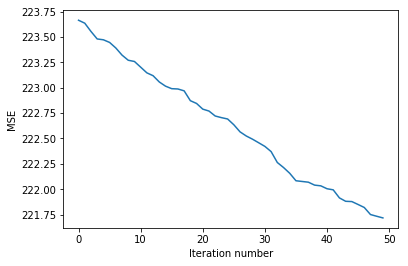

In [30]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

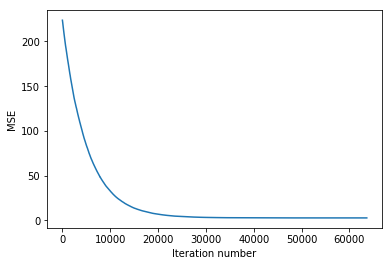

In [31]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [32]:
stoch_grad_desc_weights

array([3.89172998e+00, 2.79230916e+00, 6.17758541e-03, 1.39903864e+01])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [33]:
stoch_errors_by_iter[-1]

2.7871848006472946

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [36]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.7871848006472946


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**